In [15]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

In [1]:
import sys
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install pyyaml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install moment
!{sys.executable} -m pip install statsmodels
import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))

  Using cached https://files.pythonhosted.org/packages/11/88/dd1f8c4281a60791b043f55e338d0521049208f21e3de19ddc9c160dbbef/pymongo-3.7.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9e/59/f235ab21bbe7b7c6570c4abf17ffb893071f4fa3b9cf557b09b60359ad9a/matplotlib-2.2.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/69/a7/88719d132b18300b4369fbffa741841cfd36d1e637e1990f27929945b538/kiwisolver-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/4e/27c34b62430286c6d59177a0842ed90dc789ce5d1ed740887653b898779a/pytz-2018.5-py2.py3-none-any.whl
  Using cached http

In [2]:
# Get all sessions:
sessions = {}
for account in accounts:
    for user in account["android"]:
        for session in db[user + "_sessions"].find({"enabled": {"$exists": True}}):
            if user not in sessions:
                sessions[user] = {}
            domain = session["domain"]
            if domain not in sessions[user]:
                sessions[user][domain] = []
            sessions[user][domain].append(session)

In [3]:
# Now, check out if the sessions follow any distribution
session_durations = []
for user in sessions:
    for goal in sessions[user]:
        session_durations.extend([session["duration"] for session in sessions[user][goal] if session["duration"] < 3600])

In [4]:
import matplotlib.pyplot as pyplot
pyplot.figure(1)
pyplot.hist(session_durations, bins= 400)

(array([1.7612e+05, 3.2017e+04, 1.5335e+04, 1.1692e+04, 7.6370e+03,
        5.6000e+03, 5.3730e+03, 3.8430e+03, 3.0160e+03, 2.4870e+03,
        1.9680e+03, 1.7860e+03, 1.5850e+03, 2.1040e+03, 1.3160e+03,
        1.1240e+03, 9.8500e+02, 8.8900e+02, 8.0500e+02, 7.4200e+02,
        6.9400e+02, 5.7000e+02, 5.1400e+02, 4.9200e+02, 5.0700e+02,
        4.2400e+02, 4.0300e+02, 3.7800e+02, 4.1300e+02, 3.5100e+02,
        2.9000e+02, 3.3600e+02, 3.6200e+02, 3.2500e+02, 2.7800e+02,
        2.4300e+02, 2.3600e+02, 2.2500e+02, 2.2200e+02, 1.8500e+02,
        1.6900e+02, 1.8400e+02, 1.8500e+02, 1.7800e+02, 1.7200e+02,
        1.4600e+02, 1.4400e+02, 1.5100e+02, 1.3500e+02, 1.3800e+02,
        1.4300e+02, 1.2800e+02, 1.1000e+02, 1.0500e+02, 1.2300e+02,
        1.0800e+02, 1.0300e+02, 8.3000e+01, 1.1900e+02, 9.0000e+01,
        1.1200e+02, 9.0000e+01, 8.4000e+01, 7.7000e+01, 8.8000e+01,
        1.0000e+02, 9.5000e+01, 1.0400e+02, 7.7000e+01, 7.6000e+01,
        6.7000e+01, 6.8000e+01, 7.0000e+01, 6.80

In [5]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        print(distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
#print(str(best_fit_distribution(session_durations)))

In [7]:
# WALD PARAMS: (-1435368.1650060418, 4743374.936502483)
from scipy.stats import wald, kstest
params = wald.fit(session_durations)
kstest(session_durations, 'wald', params)

KstestResult(statistic=0.29513601457833977, pvalue=0.0)

In [8]:
from statistics import mean
import moment
# what about total time per app per user per day??
sessions_per_day = []
for user in sessions:
    for goal in sessions[user]:
        prev_day = ""
        app_time_day = 0
        for session in sessions[user][goal]:
            day = moment.unix(session["timestamp"]).format("YYYY-MM-DD")
            app_time_day += session["duration"]
            if day != prev_day:
                if prev_day != "":
                    sessions_per_day.append(app_time_day)
                    app_time_day = 0
                prev_day = day

In [9]:
print(sessions_per_day)
print(str(best_fit_distribution(sessions_per_day)))

[73, 1341, 284, 8285, 172, 80, 4226, 6189, 10005, 2548, 52, 24, 93, 5, 23, 1375, 1554, 1682, 62, 21, 65, 912, 27, 280, 72, 22, 457, 413, 1240, 612, 166, 151, 802, 712, 1, 19, 3401, 3615, 3090, 4416, 42, 12, 4360, 130, 652, 1, 577, 244, 216, 285, 359, 89, 170, 52, 83, 212, 285, 52, 256, 56, 46, 104, 183, 27, 74, 469, 394, 105, 339, 52, 21, 913, 12, 67, 2738, 410, 136, 58, 37, 81, 466, 51, 6, 3, 45, 2, 8, 19, 8, 2322, 47, 188, 155, 312, 171, 414, 1851, 490, 1004, 88, 642, 346, 2583, 129, 1259, 28647, 36414, 1, 57342, 48, 28, 214, 197, 304, 81, 4, 558, 390, 50, 190, 12, 17, 323, 546, 106, 16, 2544, 46, 0, 65, 16, 6, 275, 55, 548, 261, 906, 64, 29, 140, 117, 776, 425, 459, 320, 428, 77, 22, 30, 17, 28, 85, 80, 137, 3, 0, 21, 375, 72, 574, 56, 98, 9, 26, 20, 288, 46, 3, 135, 50, 43, 90, 253, 199, 7, 27, 41, 51, 52, 17, 90, 64, 17, 77, 182, 3, 242, 421, 12, 339, 245, 91, 260, 31, 203, 39, 149, 234, 143, 225, 219, 140, 151, 104, 1, 140, 40, 709, 63, 396, 1, 234, 81, 178, 78, 44, 18, 10, 300, 

('exponnorm', (2161.2450955242275, -1.0074322587556126, 0.46781297593730176))


In [10]:
kstest(sessions_per_day, 'exponnorm', (2139.5591586080654, -0.983121041949687, 0.4730654280867641))

KstestResult(statistic=0.38912382126746003, pvalue=0.0)

KstestResult(statistic=0.3136585222623587, pvalue=0.0)

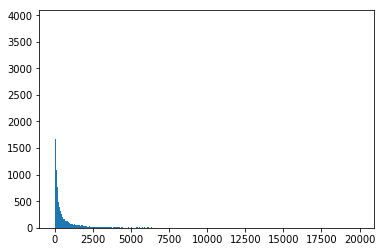

In [11]:
sessions_per_day = [s for s in sessions_per_day if s<20000 and s > 5]
from scipy.stats import exponnorm
params = exponnorm.fit(sessions_per_day)
pyplot.figure(2)
pyplot.hist(sessions_per_day, bins=400)
kstest(sessions_per_day, 'exponnorm', params)

In [12]:
print(sessions_per_day)

[73, 1341, 284, 8285, 172, 80, 4226, 6189, 10005, 2548, 52, 24, 93, 23, 1375, 1554, 1682, 62, 21, 65, 912, 27, 280, 72, 22, 457, 413, 1240, 612, 166, 151, 802, 712, 19, 3401, 3615, 3090, 4416, 42, 12, 4360, 130, 652, 577, 244, 216, 285, 359, 89, 170, 52, 83, 212, 285, 52, 256, 56, 46, 104, 183, 27, 74, 469, 394, 105, 339, 52, 21, 913, 12, 67, 2738, 410, 136, 58, 37, 81, 466, 51, 6, 45, 8, 19, 8, 2322, 47, 188, 155, 312, 171, 414, 1851, 490, 1004, 88, 642, 346, 2583, 129, 1259, 48, 28, 214, 197, 304, 81, 558, 390, 50, 190, 12, 17, 323, 546, 106, 16, 2544, 46, 65, 16, 6, 275, 55, 548, 261, 906, 64, 29, 140, 117, 776, 425, 459, 320, 428, 77, 22, 30, 17, 28, 85, 80, 137, 21, 375, 72, 574, 56, 98, 9, 26, 20, 288, 46, 135, 50, 43, 90, 253, 199, 7, 27, 41, 51, 52, 17, 90, 64, 17, 77, 182, 242, 421, 12, 339, 245, 91, 260, 31, 203, 39, 149, 234, 143, 225, 219, 140, 151, 104, 140, 40, 709, 63, 396, 234, 81, 178, 78, 44, 18, 10, 300, 174, 8, 147, 143, 226, 19, 841, 1529, 2451, 1438, 428, 988, 415

In [19]:
df = pd.DataFrame(np.hstack((sessions_per_day)))
print(df)
#ndata = df
ndata = sessions_per_day

           0
0         73
1       1341
2        284
3       8285
4        172
5         80
6       4226
7       6189
8      10005
9       2548
10        52
11        24
12        93
13        23
14      1375
15      1554
16      1682
17        62
18        21
19        65
20       912
21        27
22       280
23        72
24        22
25       457
26       413
27      1240
28       612
29       166
...      ...
13528     53
13529     55
13530    110
13531    287
13532    834
13533    133
13534   1250
13535    604
13536     28
13537     66
13538    444
13539    323
13540     10
13541     23
13542    425
13543    141
13544     40
13545    204
13546     28
13547   1254
13548   1440
13549     95
13550    135
13551   2457
13552     57
13553      9
13554    153
13555     43
13556    171
13557     91

[13558 rows x 1 columns]


In [56]:
from random import choice

sampled_array = []
for idx in range(100):
  chosen = choice(sessions_per_day)
  sampled_array.append(chosen)

In [58]:
print(json.dumps(sampled_array))

[410, 202, 118, 10, 279, 34, 43, 368, 18, 727, 31, 110, 2357, 226, 120, 10, 23, 66, 40, 80, 1870, 103, 69, 6, 185, 372, 2463, 758, 1111, 2749, 577, 137, 657, 32, 15, 377, 13, 235, 273, 173, 138, 600, 69, 366, 9, 152, 229, 8, 8938, 145, 25, 209, 9175, 75, 871, 71, 10, 335, 126, 23, 935, 841, 16, 88, 1680, 1779, 651, 1344, 366, 251, 756, 27, 57, 29, 1825, 553, 8957, 38, 12, 73, 5146, 176, 413, 507, 119, 110, 267, 47, 48, 140, 91, 44, 9, 799, 1128, 14, 112, 97, 748, 404]


In [39]:
from math import log

print(json.dumps([log(x) for x in sessions_per_day]))

[4.290459441148391, 7.201170883281678, 5.648974238161206, 9.022201929860664, 5.147494476813453, 4.382026634673881, 8.349011198176003, 8.73052880173936, 9.210840247017833, 7.843064016692054, 3.9512437185814275, 3.1780538303479458, 4.532599493153256, 3.1354942159291497, 7.226209010100671, 7.348587530927593, 7.427738840532894, 4.127134385045092, 3.044522437723423, 4.174387269895637, 6.815639990074331, 3.295836866004329, 5.634789603169249, 4.276666119016055, 3.091042453358316, 6.124683390894205, 6.023447592961033, 7.122866658599083, 6.416732282512326, 5.111987788356544, 5.017279836814924, 6.687108607866515, 6.568077911411976, 2.9444389791664403, 8.131824785007195, 8.192847134592865, 8.035926369891792, 8.392989587956931, 3.7376696182833684, 2.4849066497880004, 8.38022733634308, 4.867534450455582, 6.480044561926653, 6.3578422665081, 5.497168225293202, 5.375278407684165, 5.652489180268651, 5.883322388488279, 4.48863636973214, 5.135798437050262, 3.9512437185814275, 4.418840607796598, 5.3565862

In [60]:
%%R -i ndata -w 5 -h 5 --units in -r 200

library(jsonlite)

ndata <- fromJSON("[410, 202, 118, 10, 279, 34, 43, 368, 18, 727, 31, 110, 2357, 226, 120, 10, 23, 66, 40, 80, 1870, 103, 69, 6, 185, 372, 2463, 758, 1111, 2749, 577, 137, 657, 32, 15, 377, 13, 235, 273, 173, 138, 600, 69, 366, 9, 152, 229, 8, 8938, 145, 25, 209, 9175, 75, 871, 71, 10, 335, 126, 23, 935, 841, 16, 88, 1680, 1779, 651, 1344, 366, 251, 756, 27, 57, 29, 1825, 553, 8957, 38, 12, 73, 5146, 176, 413, 507, 119, 110, 267, 47, 48, 140, 91, 44, 9, 799, 1128, 14, 112, 97, 748, 404]")
#ndata <- fromJSON("[73, 1341, 284, 8285, 172, 80, 4226, 6189, 10005, 2548, 52, 24, 93, 23, 1375, 1554, 1682, 62, 21, 65, 912, 27, 280, 72, 22, 457, 413, 1240, 612, 166, 151, 802, 712, 19, 3401, 3615, 3090, 4416, 42, 12, 4360, 130, 652, 577, 244, 216, 285, 359, 89, 170, 52, 83, 212, 285, 52, 256, 56, 46, 104, 183, 27, 74, 469, 394, 105, 339, 52, 21, 913, 12, 67, 2738, 410, 136, 58, 37, 81, 466, 51, 6, 45, 8, 19, 8, 2322, 47, 188, 155, 312, 171, 414, 1851, 490, 1004, 88, 642, 346, 2583, 129, 1259, 48, 28, 214, 197, 304, 81, 558, 390, 50, 190, 12, 17, 323, 546, 106, 16, 2544, 46, 65, 16, 6, 275, 55, 548, 261, 906, 64, 29, 140, 117, 776, 425, 459, 320, 428, 77, 22, 30, 17, 28, 85, 80, 137, 21, 375, 72, 574, 56, 98, 9, 26, 20, 288, 46, 135, 50, 43, 90, 253, 199, 7, 27, 41, 51, 52, 17, 90, 64, 17, 77, 182, 242, 421, 12, 339, 245, 91, 260, 31, 203, 39, 149, 234, 143, 225, 219, 140, 151, 104, 140, 40, 709, 63, 396, 234, 81, 178, 78, 44, 18, 10, 300, 174, 8, 147, 143, 226, 19, 841, 1529, 2451, 1438, 428, 988, 415, 297, 995, 88, 24, 11, 768, 43, 171, 436, 23, 3118, 203, 190, 297, 1023, 1085, 915, 1286, 132, 49, 156, 15, 14, 1135, 169, 374, 83, 60, 134, 481, 422, 235, 48, 42, 120, 773, 73, 9, 69, 124, 34, 56, 501, 28, 1441, 911, 221, 178, 64, 113, 19, 160, 105, 124, 24, 49, 48, 20, 66, 321, 43, 1304, 35, 6, 1304, 115, 124, 1256, 93, 129, 132, 841, 193, 90, 765, 15, 48, 28, 91, 88, 110, 281, 117, 275, 422, 256, 39, 204, 47, 165, 44, 38, 131, 46, 6, 9, 41, 125, 604, 961, 913, 437, 700, 590, 7, 21, 6, 41, 2791, 102, 635, 926, 498, 637, 611, 284, 63, 8, 26, 458, 331, 584, 1358, 599, 697, 802, 400, 47, 495, 40, 53, 79, 32, 59, 92, 18, 15, 2876, 2357, 2213, 5042, 10262, 5504, 509, 14, 397, 6850, 345, 905, 2043, 2159, 529, 794, 1234, 17, 425, 71, 399, 1031, 274, 154, 245, 130, 58, 78, 979, 47, 27, 51, 89, 30, 21, 15, 61, 14, 83, 285, 57, 14, 30, 178, 9, 36, 83, 44, 142, 101, 16, 25, 63, 152, 186, 131, 96, 61, 387, 1064, 500, 1175, 296, 132, 40, 471, 224, 30, 25, 21, 16, 37, 64, 181, 103, 157, 148, 15, 34, 26, 177, 83, 93, 16, 239, 90, 11, 138, 82, 49, 36, 8, 79, 366, 8, 118, 22, 96, 13, 32, 23, 212, 52, 129, 113, 65, 221, 39, 2365, 3724, 123, 37, 47, 92, 81, 492, 406, 890, 730, 47, 17, 9, 126, 17, 2051, 4255, 1854, 1059, 1563, 116, 219, 29, 396, 984, 1070, 463, 1129, 28, 94, 19, 451, 30, 11, 1534, 1280, 582, 1581, 449, 455, 29, 16, 1154, 433, 214, 246, 81, 45, 35, 36, 666, 1595, 1111, 691, 112, 40, 46, 399, 22, 14, 47, 290, 61, 12, 20, 49, 20, 7, 15, 47, 11, 76, 260, 511, 11, 468, 339, 48, 345, 11, 80, 13, 14, 85, 58, 9, 305, 52, 21, 63, 330, 175, 442, 30, 24, 545, 97, 170, 596, 24, 110, 88, 132, 679, 314, 8, 21, 424, 230, 55, 47, 29, 1092, 407, 115, 36, 186, 77, 4426, 390, 202, 1136, 71, 190, 37, 461, 131, 88, 281, 181, 239, 623, 340, 3477, 211, 856, 304, 730, 1423, 440, 192, 326, 3552, 3610, 5851, 5289, 4666, 4600, 4809, 2763, 186, 38, 27, 318, 134, 428, 28, 671, 119, 724, 111, 1325, 413, 1586, 5872, 251, 936, 809, 289, 763, 669, 47, 2874, 3043, 188, 49, 62, 493, 108, 194, 540, 506, 36, 112, 363, 30, 81, 288, 818, 61, 12, 184, 130, 42, 22, 95, 22, 40, 320, 48, 749, 1147, 140, 187, 19, 199, 536, 1302, 320, 471, 111, 828, 19, 1653, 404, 16, 1068, 116, 65, 285, 17, 303, 21, 9, 112, 50, 182, 57, 935, 374, 7, 456, 485, 15, 1467, 518, 188, 466, 776, 1073, 363, 159, 43, 51, 26, 24, 59, 93, 158, 536, 273, 1325, 467, 923, 934, 964, 1788, 514, 1429, 224, 35, 567, 818, 7768, 230, 65, 154, 39, 2302, 823, 57, 7, 59, 9, 13, 13, 15, 55, 44, 8, 8, 32, 403, 117, 95, 234, 233, 1518, 3343, 369, 19, 7, 324, 51, 847, 27, 456, 53, 29, 27, 31, 15, 1708, 308, 10, 101, 29, 54, 10, 8, 277, 67, 515, 165, 148, 58, 130, 120, 367, 460, 1392, 1712, 272, 101, 15, 13, 7, 332, 423, 211, 715, 2509, 1526, 1700, 187, 355, 54, 8, 2035, 745, 7217, 15217, 13560, 12364, 7670, 998, 1127, 11629, 6716, 11, 9, 13, 10, 850, 170, 10055, 660, 839, 6855, 116, 2867, 233, 173, 52, 180, 108, 135, 61, 29, 850, 168, 8, 109, 37, 462, 117, 158, 62, 49, 80, 182, 977, 743, 323, 45, 345, 543, 52, 17, 577, 60, 273, 798, 597, 3604, 807, 115, 438, 558, 928, 760, 62, 203, 153, 1313, 92, 25, 12, 21, 11, 565, 1286, 484, 115, 38, 61, 895, 387, 29, 630, 934, 1209, 98, 521, 150, 94, 2686, 90, 626, 387, 266, 437, 414, 45, 36, 7, 27, 349, 76, 104, 203, 29, 29, 9, 9, 13, 36, 310, 273, 18, 35, 336, 69, 13, 7, 498, 258, 358, 69, 48, 6, 40, 188, 25, 27, 26, 25, 13, 214, 37, 681, 8, 185, 13, 23, 100, 43, 10, 24, 8, 99, 47, 57, 46, 97, 144, 678, 38, 1774, 43, 15, 7271, 123, 17634, 347, 108, 110, 824, 215, 304, 386, 180, 220, 13, 116, 712, 270, 298, 1270, 4761, 10785, 4177, 14666, 11940, 2660, 16192, 2424, 2897, 66, 510, 385, 698, 443, 341, 436, 1531, 216, 304, 1894, 317, 91, 112, 6, 177, 1295, 6, 116, 28, 8, 33, 153, 7, 51, 1470, 1180, 232, 484, 57, 39, 74, 44, 45, 83, 1268, 372, 458, 356, 583, 34, 69, 134, 31, 83, 38, 7, 26, 190, 188, 1453, 32, 186, 7, 18, 6, 1936, 611, 8101, 2067, 597, 463, 1301, 566, 509, 282, 215, 107, 145, 48, 137, 65, 285, 259, 341, 2749, 6333, 3966, 2824, 5271, 19292, 75, 49, 506, 3250, 1804, 578, 1114, 999, 1266, 904, 543, 28, 247, 234, 223, 42, 299, 346, 238, 44, 70, 99, 223, 72, 18, 43, 11, 11, 10, 13043, 6751, 1598, 1789, 3169, 11542, 6442, 8689, 12257, 6184, 3541, 4850, 2040, 30, 11975, 1554, 28, 8, 8, 7, 7, 6, 8, 283, 1256, 2213, 3778, 530, 686, 1600, 3032, 1617, 1227, 446, 226, 50, 1050, 248, 474, 1408, 2041, 361, 114, 2010, 468, 2293, 536, 10899, 130, 47, 80, 1865, 499, 1996, 333, 60, 3523, 2296, 6156, 3730, 380, 4114, 1966, 13987, 1128, 35, 754, 1111, 25, 7, 190, 85, 13, 181, 531, 27, 88, 104, 1065, 75, 20, 460, 22, 119, 166, 138, 244, 13, 41, 14, 36, 133, 17, 47, 101, 42, 43, 149, 129, 59, 12, 11, 118, 29, 41, 88, 56, 29, 215, 66, 8, 42, 77, 143, 12, 17, 39, 6, 23, 55, 39, 10, 65, 225, 102, 46, 33, 35, 35, 31, 113, 155, 13, 42, 6, 317, 83, 6, 31, 11, 23, 66, 14, 68, 204, 93, 10, 84, 24, 21, 67, 22, 104, 314, 23, 28, 55, 41, 17, 11, 75, 60, 6, 142, 48, 26, 16, 52, 43, 86, 9, 122, 14, 11, 41, 10, 192, 165, 44, 17, 19, 19, 26, 20, 31, 68, 45, 22, 133, 3976, 53, 117, 10, 57, 11, 7, 195, 624, 925, 983, 671, 111, 2836, 10205, 6334, 53, 257, 549, 268, 1239, 35, 564, 49, 26, 926, 11, 535, 912, 805, 600, 143, 2202, 15, 235, 707, 992, 164, 58, 910, 110, 153, 41, 237, 136, 280, 466, 1115, 2787, 2343, 1785, 3988, 152, 7, 6, 7, 224, 175, 31, 50, 531, 229, 55, 21, 48, 27, 15, 366, 57, 13, 23, 17, 11, 265, 140, 23, 301, 23, 30, 15, 15, 65, 136, 14, 18, 21, 13, 9, 46, 23, 410, 403, 231, 245, 153, 4293, 511, 48, 62, 12, 51, 10, 16, 324, 59, 216, 300, 408, 18, 10, 23, 85, 18, 180, 134, 480, 961, 106, 367, 161, 46, 237, 120, 26, 20, 27, 12, 243, 63, 985, 1806, 434, 291, 128, 226, 706, 1891, 226, 951, 8, 9, 111, 671, 87, 76, 32, 830, 350, 118, 1389, 927, 903, 716, 697, 140, 56, 154, 243, 511, 174, 141, 312, 228, 67, 496, 149, 1510, 1680, 104, 616, 433, 334, 51, 1323, 313, 297, 275, 20, 76, 727, 80, 187, 489, 397, 396, 148, 86, 49, 298, 421, 15, 435, 1167, 77, 1194, 70, 5626, 2758, 750, 234, 613, 40, 60, 10, 65, 42, 1996, 724, 88, 268, 6, 6, 53, 8, 65, 314, 372, 242, 18, 11, 21, 115, 12, 111, 19, 24, 54, 588, 100, 1138, 31, 248, 899, 1394, 54, 30, 54, 143, 8, 233, 442, 231, 3586, 9, 413, 251, 745, 1519, 310, 830, 403, 2065, 2306, 4854, 87, 38, 1993, 2448, 1948, 1555, 22, 19, 25, 23, 154, 164, 116, 7, 8, 78, 72, 51, 156, 49, 254, 73, 13, 2291, 5746, 148, 39, 122, 40, 143, 202, 1113, 346, 8, 170, 178, 242, 443, 1185, 1548, 516, 990, 883, 2831, 1259, 966, 462, 493, 463, 419, 282, 187, 107, 34, 61, 340, 6051, 153, 154, 80, 20, 85, 45, 123, 94, 126, 81, 80, 150, 172, 167, 51, 4430, 8744, 4694, 2635, 4894, 365, 306, 488, 52, 671, 2716, 1577, 2016, 2004, 12, 59, 184, 153, 50, 20, 7, 348, 1740, 1789, 2776, 56, 385, 969, 10, 19, 324, 12, 62, 106, 196, 138, 699, 486, 4639, 1489, 1424, 13, 765, 13, 2464, 1340, 687, 553, 959, 456, 16, 33, 1971, 21, 1956, 9841, 1348, 702, 43, 6, 21, 120, 137, 13, 6, 26, 21, 17, 161, 28, 173, 332, 92, 209, 63, 236, 11, 19, 104, 1431, 692, 7, 111, 474, 960, 22, 35, 84, 147, 521, 21, 26, 2534, 3260, 3138, 1353, 136, 3592, 290, 11193, 948, 318, 1438, 407, 112, 2085, 2758, 2001, 2776, 259, 444, 4153, 18, 33, 30, 10, 25, 292, 130, 130, 38, 23, 107, 88, 67, 25, 419, 96, 48, 14, 128, 13, 1776, 2255, 235, 3324, 624, 28, 20, 20, 14, 148, 496, 1427, 380, 388, 229, 58, 80, 195, 372, 49, 970, 920, 488, 121, 25, 76, 238, 52, 6, 31, 130, 405, 347, 31, 8, 25, 145, 416, 149, 56, 270, 658, 3524, 3024, 99, 79, 2963, 340, 903, 6352, 113, 2734, 1303, 1435, 890, 427, 191, 305, 822, 79, 31, 9, 491, 2058, 2472, 536, 482, 1033, 398, 162, 115, 101, 21, 44, 419, 145, 15, 908, 16, 92, 101, 231, 12, 352, 47, 45, 177, 644, 139, 182, 68, 42, 243, 300, 1225, 227, 19, 55, 2090, 70, 788, 241, 183, 600, 2829, 63, 182, 61, 39, 156, 13, 233, 722, 638, 62, 244, 224, 243, 93, 48, 495, 1800, 928, 24, 12, 24, 158, 84, 26, 101, 72, 8403, 650, 871, 972, 21, 2754, 398, 1743, 564, 6747, 356, 122, 68, 11, 234, 1916, 3610, 2911, 260, 81, 29, 641, 1049, 491, 219, 19, 799, 680, 3067, 33, 159, 44, 36, 182, 1051, 895, 480, 1591, 40, 39, 57, 70, 25, 307, 40, 24, 64, 79, 16, 62, 60, 7, 345, 54, 44, 686, 1494, 325, 88, 134, 200, 124, 150, 24, 83, 201, 14, 21, 142, 696, 647, 79, 49, 130, 104, 293, 780, 340, 171, 217, 124, 1400, 31, 2001, 597, 370, 161, 67, 43, 14199, 9976, 2636, 3617, 140, 15, 1048, 979, 258, 14422, 13578, 5994, 995, 816, 81, 165, 118, 38, 34, 1377, 22, 1096, 3573, 303, 8538, 9930, 2689, 455, 1038, 1677, 377, 1553, 315, 630, 247, 174, 221, 92, 395, 193, 10, 11, 4495, 2825, 138, 101, 4067, 3225, 9261, 4175, 5066, 7081, 8938, 3282, 423, 951, 6038, 4236, 1640, 10706, 4100, 671, 4263, 13959, 19792, 6796, 12838, 3578, 4630, 493, 2537, 24, 35, 105, 475, 55, 541, 7078, 2678, 942, 2168, 761, 174, 2048, 6516, 4365, 13040, 12917, 9552, 2603, 9881, 127, 2093, 1057, 9117, 2498, 7410, 8539, 7320, 182, 266, 363, 65, 68, 216, 610, 291, 305, 408, 4099, 1071, 990, 70, 50, 247, 86, 9, 21, 30, 14, 137, 110, 9, 23, 173, 35, 98, 300, 81, 37, 146, 133, 6, 627, 494, 44, 186, 80, 189, 67, 47, 11, 88, 2304, 80, 206, 426, 39, 157, 1714, 41, 150, 99, 127, 8, 26, 168, 635, 2217, 475, 30, 9, 115, 521, 333, 24, 35, 164, 9, 178, 55, 2145, 136, 42, 1337, 269, 20, 89, 1182, 492, 17, 331, 269, 120, 96, 152, 41, 129, 450, 19, 6, 172, 108, 1573, 1401, 16, 69, 25, 1196, 5282, 1836, 3435, 126, 518, 1719, 732, 99, 1609, 486, 6, 13, 15, 1013, 266, 249, 64, 1098, 3249, 74, 18, 68, 6, 83, 8, 134, 538, 282, 44, 7, 9565, 5351, 39, 1810, 29, 55, 127, 1637, 10199, 1158, 764, 10, 21, 11, 135, 1466, 449, 18, 63, 387, 79, 40, 1539, 1370, 260, 1350, 16, 122, 12, 10, 46, 22, 28, 208, 138, 506, 101, 1137, 8, 7, 1674, 122, 22, 18, 141, 169, 54, 11, 65, 250, 395, 91, 170, 38, 79, 17, 9, 6, 22, 21, 32, 946, 829, 734, 299, 388, 213, 687, 225, 835, 458, 1328, 4033, 3776, 369, 147, 253, 507, 511, 296, 408, 679, 2927, 154, 118, 116, 96, 40, 24, 63, 53, 273, 89, 103, 87, 49, 6, 1970, 1422, 2267, 684, 1255, 324, 1322, 868, 1842, 931, 1414, 141, 252, 105, 24, 139, 707, 308, 728, 2312, 125, 142, 93, 1433, 1714, 337, 40, 134, 256, 1302, 562, 889, 551, 1094, 1925, 147, 976, 4062, 2295, 764, 35, 329, 11796, 367, 330, 1108, 2308, 5231, 1913, 2045, 2428, 380, 1904, 706, 4419, 2938, 9535, 225, 90, 114, 44, 128, 165, 1040, 265, 468, 156, 26, 1520, 76, 34, 73, 110, 63, 64, 6, 15, 8, 187, 83, 50, 59, 53, 193, 282, 43, 45, 89, 147, 87, 25, 19, 126, 9, 38, 6, 6, 6, 8, 43, 8, 35, 65, 58, 128, 164, 70, 87, 703, 177, 331, 213, 336, 324, 243, 272, 282, 27, 33, 510, 6, 222, 101, 29, 28, 31, 133, 84, 195, 80, 1492, 52, 101, 29, 268, 153, 34, 399, 28, 552, 9, 92, 44, 28, 6, 7, 17, 41, 24, 190, 345, 53, 11, 6, 22, 75, 13, 81, 47, 323, 81, 77, 24, 36, 1002, 660, 17, 269, 60, 217, 24, 14, 43, 15065, 472, 300, 257, 176, 242, 175, 1356, 1209, 429, 682, 309, 38, 204, 339, 283, 774, 896, 30, 102, 149, 10, 73, 318, 70, 64, 119, 81, 346, 196, 81, 2273, 1566, 3177, 51, 2101, 2570, 1225, 17, 9, 17, 39, 58, 13, 29, 84, 78, 551, 16, 35, 85, 8, 85, 109, 112, 23, 39, 141, 111, 166, 24, 51, 139, 74, 68, 22, 29, 438, 498, 126, 37, 73, 238, 240, 178, 192, 79, 16, 90, 43, 9, 231, 144, 835, 391, 700, 291, 180, 54, 149, 42, 50, 20, 79, 62, 31, 178, 115, 16, 50, 280, 359, 133, 990, 110, 360, 1244, 255, 10, 567, 390, 684, 41, 51, 58, 186, 411, 89, 803, 487, 998, 248, 121, 176, 33, 18, 62, 25, 10, 4075, 17, 75, 10, 36, 8677, 1705, 1457, 1938, 337, 3532, 861, 1190, 3314, 160, 131, 435, 36, 240, 49, 685, 466, 700, 136, 3328, 3338, 2059, 1321, 14572, 838, 3345, 3968, 396, 329, 1848, 133, 1509, 110, 16, 79, 15, 90, 777, 144, 38, 100, 356, 616, 300, 21, 132, 296, 2763, 73, 20, 65, 61, 7, 112, 27, 875, 84, 1843, 1717, 1149, 528, 1042, 1243, 97, 78, 217, 63, 109, 119, 174, 97, 229, 316, 32, 20, 18, 458, 1103, 1128, 687, 2392, 6916, 1852, 663, 14, 102, 305, 89, 320, 31, 33, 180, 45, 58, 305, 82, 42, 41, 17, 68, 166, 670, 8, 907, 1765, 886, 779, 856, 176, 436, 34, 1722, 237, 363, 1447, 1820, 1671, 1165, 1249, 1921, 46, 10, 1582, 2520, 867, 272, 1703, 237, 280, 260, 189, 24, 176, 44, 863, 264, 3609, 8058, 4886, 2400, 4022, 8957, 6078, 2629, 1225, 253, 840, 14, 246, 375, 27, 43, 52, 335, 56, 38, 36, 217, 46, 1187, 180, 23, 27, 36, 8, 1184, 69, 310, 651, 469, 993, 1677, 1583, 585, 317, 33, 79, 67, 101, 35, 253, 259, 587, 1055, 25, 79, 166, 257, 2255, 1333, 1905, 1449, 3671, 744, 693, 2219, 185, 59, 82, 227, 11, 12, 39, 60, 14, 118, 7, 468, 1292, 30, 1020, 1462, 1394, 609, 11, 7, 130, 947, 230, 86, 263, 621, 447, 122, 211, 417, 796, 1721, 234, 153, 4711, 1565, 1300, 1526, 169, 41, 21, 30, 153, 24, 37, 24, 17, 56, 19, 44, 64, 13, 29, 1700, 177, 85, 29, 7, 14, 12, 302, 62, 29, 2012, 1964, 823, 433, 103, 104, 178, 12, 609, 1131, 389, 694, 411, 143, 312, 3476, 200, 28, 361, 149, 7, 25, 89, 133, 21, 44, 29, 29, 197, 280, 9, 128, 815, 21, 33, 98, 17, 8, 43, 2314, 13, 127, 21, 182, 165, 228, 22, 95, 294, 147, 232, 10, 272, 6, 118, 46, 40, 6, 8, 244, 247, 403, 364, 437, 398, 346, 442, 536, 83, 1521, 1344, 2447, 2067, 2260, 4414, 2214, 1976, 3325, 37, 37, 1329, 2584, 2870, 1192, 5886, 937, 2184, 2845, 2704, 125, 837, 502, 759, 2640, 1648, 1054, 694, 1055, 1808, 31, 49, 110, 33, 243, 191, 130, 29, 22, 350, 207, 64, 264, 323, 672, 543, 422, 66, 548, 50, 29, 48, 39, 52, 26, 722, 188, 276, 281, 168, 14, 282, 686, 813, 12, 372, 614, 605, 103, 3543, 890, 1301, 605, 1525, 104, 124, 6, 111, 51, 36, 109, 129, 217, 369, 321, 383, 311, 150, 303, 13, 16, 23, 167, 68, 105, 18, 27, 293, 653, 147, 30, 107, 223, 279, 42, 287, 789, 318, 359, 38, 526, 85, 612, 114, 20, 238, 683, 89, 554, 117, 290, 245, 207, 341, 127, 68, 56, 43, 14, 8, 7, 156, 90, 70, 188, 31, 8, 11, 10, 148, 20, 258, 238, 99, 11, 7, 45, 12, 9, 93, 348, 31, 16, 409, 115, 559, 32, 345, 132, 210, 30, 109, 116, 108, 74, 54, 48, 30, 8, 15, 9, 10597, 13386, 5470, 13281, 69, 80, 215, 16640, 11857, 10735, 18938, 15118, 446, 7967, 553, 172, 208, 129, 325, 181, 644, 126, 9, 47, 52, 7, 513, 2964, 2463, 434, 241, 425, 2655, 400, 966, 1089, 136, 284, 481, 116, 2437, 36, 519, 913, 112, 113, 47, 946, 69, 159, 184, 126, 8, 92, 12, 140, 106, 7, 584, 196, 98, 934, 277, 96, 290, 71, 671, 27, 219, 585, 320, 69, 18, 24, 580, 27, 78, 109, 330, 31, 15, 303, 737, 1175, 675, 714, 269, 1812, 212, 151, 7, 6, 185, 36, 379, 177, 336, 133, 275, 102, 143, 106, 215, 409, 319, 134, 150, 193, 925, 13, 68, 11, 102, 1239, 1291, 2708, 883, 56, 3086, 38, 96, 83, 22, 31, 19, 8, 680, 75, 24, 40, 67, 10, 52, 100, 9, 271, 44, 44, 147, 344, 119, 77, 231, 231, 23, 63, 12393, 249, 178, 37, 55, 54, 75, 56, 97, 4454, 13, 42, 1064, 7, 29, 41, 16, 15, 372, 7, 77, 15, 391, 5489, 72, 12, 33, 157, 88, 620, 281, 47, 540, 298, 171, 163, 128, 217, 311, 1648, 536, 1640, 383, 7853, 9171, 857, 8134, 806, 1149, 3972, 316, 7582, 5706, 12987, 14424, 8313, 11594, 6761, 5572, 12383, 23, 597, 369, 281, 212, 145, 106, 127, 36, 371, 1458, 14249, 556, 533, 1351, 4235, 4151, 48, 107, 175, 221, 499, 308, 46, 40, 297, 142, 20, 108, 26, 20, 100, 29, 40, 2000, 1173, 585, 2674, 2977, 1772, 1672, 1623, 1490, 632, 91, 14, 18, 175, 175, 320, 84, 13, 18, 68, 16, 43, 45, 299, 558, 102, 820, 103, 116, 151, 152, 197, 197, 300, 16, 47, 6034, 5642, 5436, 1115, 3523, 5189, 11129, 9266, 11757, 8350, 289, 67, 3103, 4996, 2570, 3397, 4283, 4629, 2061, 5475, 3142, 5773, 45, 1400, 1080, 1056, 138, 821, 608, 1154, 914, 1911, 2516, 216, 1830, 3500, 1282, 1771, 3789, 2473, 2920, 1131, 2232, 4310, 3620, 2028, 1827, 7661, 1579, 57, 92, 727, 48, 1277, 12, 294, 33, 197, 258, 2276, 955, 1614, 304, 4474, 1604, 1959, 886, 1169, 2310, 68, 1821, 2515, 2688, 3490, 3682, 4352, 8225, 2855, 1628, 14930, 124, 43, 59, 12, 18, 7, 13, 29, 109, 30, 24, 22, 18, 7, 101, 79, 74, 21, 205, 1070, 519, 59, 24, 203, 202, 45, 63, 85, 54, 18, 14, 17, 1172, 1541, 32, 86, 183, 260, 29, 1156, 497, 150, 6, 91, 28, 12, 99, 8, 47, 28, 12, 10, 66, 374, 61, 89, 58, 44, 251, 14, 21, 345, 25, 9, 21, 23, 52, 877, 236, 538, 74, 426, 75, 176, 477, 176, 58, 56, 23, 609, 943, 838, 1434, 1613, 2657, 1781, 1713, 617, 146, 2043, 2639, 2465, 2047, 2045, 1227, 1532, 558, 134, 158, 410, 264, 234, 1321, 907, 583, 168, 746, 242, 321, 555, 706, 257, 271, 106, 36, 18, 624, 8455, 16391, 3977, 2599, 2952, 834, 18171, 659, 27, 1272, 992, 782, 222, 1824, 957, 1204, 58, 175, 671, 127, 64, 257, 161, 229, 124, 18, 167, 59, 13, 1107, 1913, 705, 168, 470, 440, 1315, 51, 737, 338, 433, 375, 1023, 230, 332, 25, 206, 578, 519, 28, 481, 75, 1477, 77, 597, 907, 708, 168, 1008, 1102, 264, 213, 302, 7, 7, 423, 629, 73, 45, 239, 27, 1343, 25, 104, 5976, 41, 81, 5703, 603, 292, 1338, 615, 2053, 621, 817, 5443, 931, 900, 312, 52, 119, 659, 45, 2032, 78, 37, 99, 12, 16, 41, 318, 11, 11, 40, 32, 596, 3675, 32, 18, 27, 180, 334, 138, 86, 64, 6, 226, 9, 488, 1290, 267, 1041, 144, 1185, 698, 163, 6, 8, 62, 277, 35, 92, 116, 340, 122, 43, 15, 165, 19, 20, 257, 155, 139, 105, 365, 77, 55, 175, 84, 25, 67, 52, 61, 280, 97, 94, 2655, 447, 581, 576, 721, 859, 1597, 2037, 24, 235, 294, 93, 843, 747, 804, 1305, 1138, 151, 277, 240, 341, 560, 436, 125, 1342, 822, 150, 1980, 3438, 1657, 1674, 1670, 2562, 2532, 2329, 139, 183, 41, 82, 17, 253, 154, 1119, 751, 3901, 336, 458, 3192, 819, 1258, 1450, 121, 328, 57, 21, 955, 1143, 55, 1773, 552, 524, 494, 733, 166, 1456, 571, 142, 25, 46, 354, 48, 444, 25, 6, 29, 188, 50, 6, 8152, 2290, 647, 9476, 18242, 14336, 5582, 222, 207, 232, 66, 69, 197, 126, 517, 141, 53, 171, 43, 93, 24, 16, 10, 874, 1003, 2229, 628, 28, 568, 49, 1160, 210, 167, 123, 478, 217, 439, 199, 256, 257, 686, 79, 22, 9, 99, 143, 105, 6, 67, 104, 119, 553, 64, 89, 525, 27, 48, 36, 78, 29, 262, 377, 34, 82, 90, 78, 91, 57, 59, 217, 44, 279, 6, 58, 719, 723, 1266, 130, 839, 12, 6, 51, 113, 91, 277, 277, 100, 73, 223, 135, 766, 301, 320, 522, 36, 163, 695, 348, 552, 1117, 1046, 1643, 53, 38, 1022, 406, 90, 66, 109, 4542, 37, 10, 17, 22, 201, 136, 331, 120, 44, 389, 15, 364, 114, 1029, 2628, 3427, 2139, 120, 22, 8, 102, 331, 44, 122, 121, 24, 13, 5245, 830, 56, 42, 7, 632, 309, 39, 8, 57, 376, 142, 2485, 150, 71, 165, 11, 9, 24, 13, 6, 108, 211, 277, 290, 526, 828, 117, 164, 536, 45, 35, 186, 784, 22, 313, 81, 1265, 1573, 3915, 2310, 850, 150, 215, 5928, 1321, 267, 25, 247, 66, 93, 110, 136, 6, 51, 40, 24, 274, 30, 49, 140, 43, 91, 50, 126, 79, 35, 118, 817, 368, 2593, 30, 816, 51, 179, 244, 460, 118, 164, 61, 101, 30, 517, 28, 172, 43, 145, 79, 153, 327, 198, 88, 44, 929, 8, 133, 18, 17, 370, 204, 98, 14, 154, 38, 95, 97, 52, 382, 7, 65, 9, 148, 35, 21, 1599, 63, 34, 120, 10328, 836, 321, 17916, 16294, 19107, 610, 3883, 839, 15096, 10903, 12548, 3684, 30, 124, 1137, 3549, 497, 100, 122, 21, 8, 92, 7, 10, 66, 56, 15, 104, 23, 21, 46, 34, 43, 625, 50, 267, 91, 139, 108, 36, 19, 56, 51, 2015, 5012, 987, 4204, 3973, 3830, 4371, 9096, 6250, 1055, 39, 400, 133, 214, 176, 138, 101, 545, 389, 182, 6, 6, 1602, 1133, 46, 2536, 2756, 1483, 658, 747, 726, 1316, 59, 19, 18, 74, 19, 198, 7, 38, 13, 20, 32, 140, 6, 7, 8, 80, 25, 121, 7, 101, 118, 40, 707, 8, 12, 87, 73, 33, 401, 334, 642, 1483, 439, 466, 117, 17, 44, 34, 48, 86, 644, 484, 112, 410, 451, 222, 438, 494, 232, 26, 87, 75, 33, 56, 69, 87, 55, 248, 140, 76, 46, 4549, 34, 11, 8, 50, 40, 34, 103, 54, 123, 130, 10, 92, 44, 261, 113, 81, 109, 7, 47, 122, 29, 26, 58, 32, 55, 21, 24, 32, 24, 82, 65, 9, 9, 16, 24, 6, 19, 6, 16, 11, 12, 96, 17, 15, 82, 30, 16, 359, 18, 46, 17, 17, 14, 23, 196, 454, 385, 1348, 329, 286, 361, 270, 110, 48, 533, 26, 75, 191, 2866, 27, 2172, 2553, 1938, 785, 281, 1467, 760, 294, 39, 480, 262, 542, 95, 53, 426, 106, 20, 45, 60, 6, 7, 29, 27, 790, 103, 189, 1792, 45, 28, 117, 94, 35, 9, 58, 13, 92, 10, 16, 155, 11, 202, 87, 102, 23, 58, 11, 18, 7, 24, 83, 10, 9, 34, 19, 46, 27, 11, 35, 159, 246, 230, 605, 277, 179, 63, 60, 16, 69, 13, 150, 20, 429, 132, 22, 86, 78, 89, 55, 138, 8, 56, 114, 128, 18, 39, 6, 38, 69, 13, 29, 208, 665, 41, 15, 857, 56, 175, 17, 115, 93, 78, 6, 59, 30, 43, 41, 46, 182, 2102, 472, 814, 1724, 1808, 22, 94, 64, 95, 178, 1836, 220, 170, 464, 78, 202, 2308, 1158, 516, 25, 143, 35, 78, 149, 194, 278, 37, 6, 9, 57, 89, 20, 126, 211, 34, 54, 174, 100, 313, 13, 27, 844, 469, 323, 68, 737, 54, 9, 11, 137, 17, 61, 387, 67, 1239, 26, 37, 9, 24, 1867, 53, 21, 22, 17, 183, 781, 184, 42, 35, 240, 108, 119, 187, 123, 125, 12, 157, 94, 2276, 238, 82, 33, 128, 261, 1066, 712, 222, 925, 178, 601, 3479, 510, 3907, 1018, 123, 31, 210, 14, 335, 77, 63, 45, 37, 1581, 115, 140, 49, 101, 391, 15, 19, 7, 73, 1293, 84, 418, 756, 325, 1241, 36, 110, 86, 8, 144, 87, 194, 31, 21, 30, 156, 62, 519, 99, 38, 117, 55, 140, 99, 48, 28, 47, 66, 88, 15, 281, 138, 152, 241, 165, 404, 298, 241, 678, 69, 326, 68, 46, 55, 13, 236, 295, 389, 21, 28, 255, 131, 306, 3274, 37, 8, 44, 36, 16, 55, 22, 40, 95, 505, 63, 29, 418, 904, 756, 540, 484, 706, 282, 2595, 3913, 418, 2780, 3001, 54, 1383, 237, 3192, 4860, 181, 4643, 31, 15, 2218, 70, 306, 189, 22, 67, 356, 107, 700, 314, 137, 1073, 175, 24, 110, 250, 57, 58, 218, 641, 501, 80, 28, 102, 41, 16, 43, 502, 13, 62, 67, 16, 215, 505, 4892, 4595, 8832, 1554, 1828, 5210, 111, 126, 56, 22, 112, 75, 176, 76, 404, 20, 86, 101, 77, 10, 45, 45, 61, 57, 9, 92, 20, 33, 1021, 719, 185, 33, 27, 32, 391, 987, 134, 331, 40, 34, 27, 142, 90, 2527, 992, 2238, 48, 631, 5386, 2393, 6210, 14, 579, 102, 740, 250, 519, 153, 2840, 2304, 3887, 3047, 5571, 17, 375, 31, 407, 308, 150, 101, 275, 44, 40, 21, 22, 10, 45, 90, 130, 207, 152, 586, 231, 684, 316, 62, 9699, 3936, 3117, 8808, 117, 44, 17, 79, 510, 48, 577, 853, 42, 9, 14, 18, 99, 36, 3154, 1869, 1620, 3570, 1710, 146, 325, 10, 86, 26, 145, 230, 34, 122, 49, 125, 118, 77, 65, 48, 290, 30, 70, 29, 12, 7, 864, 630, 737, 545, 956, 1301, 1134, 860, 465, 577, 5731, 1796, 2877, 12075, 3051, 16561, 4442, 33, 7720, 7796, 6622, 4389, 6836, 6855, 6115, 5993, 6331, 6316, 5424, 6761, 3414, 9258, 13002, 8646, 4148, 4998, 3414, 8858, 244, 7, 41, 30, 20, 28, 16, 7, 67, 86, 1633, 330, 303, 438, 286, 1493, 1669, 759, 438, 1911, 124, 66, 13, 64, 388, 18, 164, 29, 175, 159, 132, 114, 144, 175, 218, 115, 42, 49, 10, 10, 29, 196, 11, 106, 13, 30, 339, 467, 1459, 105, 277, 286, 221, 1129, 292, 483, 554, 175, 23, 324, 195, 397, 41, 148, 68, 88, 383, 560, 81, 8, 20, 221, 21, 25, 87, 9, 10, 38, 24, 123, 63, 51, 63, 54, 33, 39, 29, 97, 42, 9, 33, 57, 30, 74, 21, 24, 77, 10, 31, 19, 815, 313, 84, 28, 22, 566, 239, 105, 236, 269, 51, 203, 23, 97, 231, 41, 31, 63, 7, 101, 30, 138, 56, 229, 26, 120, 49, 173, 98, 156, 164, 9, 130, 1173, 19358, 1245, 1211, 1198, 1546, 1644, 1044, 1068, 1578, 1167, 1338, 1612, 758, 860, 1096, 2389, 922, 1698, 282, 687, 143, 1215, 508, 1863, 1142, 468, 1446, 1749, 2085, 1220, 3037, 1221, 1285, 1163, 1255, 48, 72, 15, 13, 169, 111, 101, 149, 112, 1104, 673, 1060, 431, 3003, 2423, 1068, 1619, 1419, 26, 16, 20, 24, 22, 16, 95, 6, 19, 108, 10, 61, 10, 31, 56, 17, 55, 10, 45, 7, 44, 10, 33, 72, 131, 30, 17, 130, 58, 20, 40, 408, 318, 11, 210, 29, 48, 20, 55, 228, 6, 224, 566, 89, 40, 182, 2060, 2621, 107, 13, 253, 21, 99, 156, 12, 17, 16, 53, 40, 16, 40, 55, 33, 40, 193, 8, 48, 6, 23, 6, 27, 532, 26, 68, 15, 67, 40, 12, 19, 231, 98, 42, 232, 57, 152, 68, 25, 1478, 79, 49, 100, 453, 296, 678, 592, 9, 704, 11, 14, 427, 38, 88, 59, 29, 131, 586, 219, 11, 10, 124, 172, 7, 128, 74, 10, 2152, 86, 87, 239, 544, 419, 318, 954, 224, 1446, 296, 115, 543, 601, 32, 7, 54, 1994, 43, 80, 86, 7, 111, 709, 1462, 330, 398, 219, 137, 8, 38, 126, 24, 13, 85, 2081, 27, 38, 45, 8, 56, 11, 1341, 377, 2181, 3122, 1456, 2118, 278, 1749, 375, 3762, 4180, 3472, 1261, 2173, 2924, 3333, 791, 2430, 710, 794, 363, 509, 280, 366, 443, 590, 402, 886, 588, 418, 111, 18, 278, 172, 198, 24, 201, 42, 235, 1998, 2456, 250, 583, 783, 891, 512, 2357, 1829, 588, 350, 271, 218, 962, 24, 76, 86, 539, 468, 24, 84, 368, 57, 112, 88, 344, 17, 166, 65, 62, 176, 2475, 644, 233, 52, 50, 61, 213, 423, 59, 39, 244, 148, 24, 35, 112, 172, 207, 57, 22, 54, 77, 135, 40, 488, 972, 375, 1148, 311, 6, 586, 214, 254, 6, 81, 16, 11, 11, 36, 300, 128, 232, 39, 90, 355, 10, 98, 172, 710, 572, 79, 816, 19, 358, 538, 13, 76, 1802, 2973, 1534, 79, 44, 826, 6, 6, 490, 9, 14, 93, 331, 11, 21, 14, 408, 8, 39, 15, 17, 139, 17, 13, 1047, 699, 713, 55, 280, 14, 3103, 16, 8, 89, 17, 172, 9, 13, 34, 311, 14, 98, 13, 9, 18, 223, 440, 7, 11, 22, 355, 458, 3872, 165, 31, 164, 64, 96, 476, 48, 8, 119, 552, 173, 12, 176, 23, 72, 11472, 2950, 1325, 11, 6451, 1147, 182, 3328, 5942, 568, 41, 19, 4104, 556, 73, 9, 113, 7, 673, 860, 4439, 1073, 8, 399, 251, 271, 278, 58, 11, 357, 15, 309, 71, 123, 61, 278, 939, 1252, 1060, 2977, 1501, 2026, 6078, 26, 1141, 316, 594, 195, 984, 151, 77, 6, 26, 63, 42, 77, 321, 263, 139, 297, 196, 149, 66, 49, 31, 59, 106, 10, 78, 133, 13, 220, 1025, 605, 798, 867, 714, 853, 300, 161, 86, 63, 670, 114, 319, 28, 194, 1639, 296, 2216, 8273, 9089, 2436, 991, 996, 333, 685, 1845, 896, 413, 81, 7, 93, 95, 74, 44, 500, 26, 65, 903, 21, 340, 929, 737, 118, 1013, 791, 916, 1166, 83, 9, 128, 34, 23, 103, 67, 465, 7, 160, 120, 21, 7, 394, 7, 9, 106, 1123, 45, 889, 730, 32, 15, 38, 27, 227, 235, 187, 403, 643, 3091, 2526, 451, 704, 1462, 111, 917, 48, 144, 1708, 298, 75, 213, 10, 145, 18, 69, 34, 821, 388, 707, 470, 458, 579, 504, 241, 613, 913, 22, 25, 25, 13, 1925, 3172, 4167, 2838, 4568, 2888, 3108, 2746, 5895, 2435, 81, 145, 1975, 182, 136, 461, 705, 287, 610, 1321, 60, 66, 59, 483, 2235, 729, 80, 67, 457, 407, 39, 72, 216, 6, 20, 77, 31, 57, 427, 489, 108, 556, 6, 215, 517, 1058, 4381, 2008, 1362, 46, 696, 889, 1105, 111, 148, 94, 16, 7, 47, 6, 59, 388, 33, 58, 96, 79, 72, 89, 112, 120, 377, 175, 50, 159, 36, 546, 377, 399, 38, 157, 178, 178, 29, 67, 67, 7, 15, 500, 113, 79, 63, 170, 17, 138, 72, 6, 247, 24, 94, 49, 56, 353, 837, 107, 15, 126, 159, 11, 217, 684, 409, 288, 200, 683, 72, 263, 195, 616, 164, 178, 23, 642, 3365, 90, 21, 25, 17, 79, 90, 14, 173, 70, 160, 32, 239, 289, 68, 73, 26, 118, 45, 56, 21, 87, 136, 7, 12, 9, 9, 7, 15, 22, 6, 44, 272, 194, 755, 746, 162, 63, 141, 16, 33, 22, 15, 26, 18, 126, 17, 13, 10, 155, 27, 412, 317, 94, 378, 27, 247, 33, 21, 47, 351, 188, 22, 254, 19, 106, 65, 149, 1792, 679, 1460, 682, 482, 235, 827, 818, 1619, 5872, 5403, 3636, 9812, 1680, 4385, 6093, 14, 247, 24, 12, 51, 865, 95, 393, 227, 218, 278, 103, 182, 235, 361, 1056, 935, 1596, 1692, 475, 1308, 3851, 33, 32, 86, 271, 333, 69, 146, 2357, 793, 490, 893, 94, 371, 752, 2067, 7015, 5394, 5769, 4303, 4437, 2501, 2761, 113, 37, 144, 23, 246, 124, 703, 2801, 13, 6, 8, 46, 8, 326, 107, 847, 483, 540, 251, 216, 189, 1146, 1674, 883, 1283, 1094, 1077, 1140, 836, 18813, 11689, 2287, 270, 67, 29, 57, 85, 172, 152, 53, 127, 1444, 7, 33, 96, 81, 41, 5493, 2864, 6473, 5089, 4469, 2247, 3700, 3996, 72, 50, 11, 54, 61, 17, 75, 24, 198, 2473, 343, 87, 22, 175, 9, 1757, 3006, 2966, 2780, 3163, 1387, 4241, 1073, 822, 7349, 6077, 3435, 5303, 575, 1544, 497, 12, 6, 68, 612, 3369, 11, 54, 262, 368, 228, 14, 75, 62, 22, 46, 20, 18, 33, 58, 26, 313, 34, 98, 89, 103, 627, 125, 87, 172, 15, 3629, 25, 177, 1057, 17, 501, 49, 155, 18, 202, 1069, 712, 242, 755, 245, 141, 382, 3471, 68, 53, 717, 882, 135, 179, 281, 308, 52, 131, 113, 151, 475, 9, 24, 150, 2139, 125, 178, 162, 4696, 73, 657, 412, 251, 316, 171, 162, 998, 278, 12, 73, 184, 255, 677, 462, 921, 658, 296, 39, 400, 776, 104, 120, 18, 9, 94, 19, 92, 106, 44, 107, 24, 6, 6, 342, 626, 490, 531, 811, 423, 295, 395, 3432, 404, 68, 73, 121, 60, 515, 14, 23, 8, 24, 83, 81, 66, 33, 119, 31, 18, 6, 18, 16, 16, 6, 60, 6, 9, 96, 30, 15, 14, 47, 69, 54, 36, 216, 50, 234, 189, 1367, 261, 143, 127, 268, 64, 503, 62, 318, 27, 159, 187, 162, 11, 19, 28, 6, 11, 31, 1132, 17, 29, 9, 19, 22, 26, 21, 478, 411, 309, 205, 22, 497, 235, 245, 195, 166, 84, 48, 40, 106, 670, 29, 74, 86, 40, 26, 73, 7, 27, 22, 58, 83, 129, 200, 487, 1100, 1413, 190, 610, 351, 296, 275, 899, 1045, 37, 28, 29, 29, 32, 25, 52, 19, 50, 39, 455, 1080, 918, 21, 38, 13, 38, 40, 188, 77, 56, 180, 99, 242, 8, 648, 282, 41, 776, 130, 232, 269, 583, 367, 64, 20, 88, 91, 85, 69, 68, 119, 58, 10, 64, 87, 24, 42, 29, 46, 50, 24, 73, 30, 294, 664, 71, 106, 10, 287, 160, 460, 495, 31, 123, 920, 567, 11, 48, 41, 31, 803, 281, 145, 233, 12, 45, 110, 235, 293, 186, 2112, 60, 15, 30, 29, 15, 248, 491, 58, 293, 844, 335, 31, 118, 31, 37, 24, 17, 15, 11, 9, 11, 12, 9, 998, 1729, 6997, 1033, 19107, 7438, 1118, 622, 2456, 1266, 879, 696, 2075, 1533, 830, 2470, 269, 96, 381, 1389, 591, 249, 401, 201, 1219, 3239, 10, 71, 163, 63, 24, 56, 101, 129, 299, 412, 287, 71, 245, 38, 303, 11484, 12821, 9097, 8947, 311, 519, 743, 1292, 1246, 562, 1133, 1648, 1702, 869, 93, 191, 1005, 721, 1041, 612, 3322, 1334, 623, 726, 142, 19, 333, 445, 1673, 184, 696, 475, 2393, 1782, 1273, 2155, 4364, 5466, 2494, 1238, 2206, 5941, 5689, 6530, 196, 61, 30, 52, 280, 174, 400, 387, 18, 71, 797, 232, 385, 97, 461, 91, 212, 83, 1950, 15, 37, 532, 400, 6627, 237, 9, 517, 115, 29, 31, 119, 32, 25, 289, 34, 134, 25, 148, 163, 194, 271, 18, 69, 16, 16, 32, 50, 485, 151, 909, 833, 844, 443, 96, 278, 15, 17, 10, 29, 15, 14, 23, 69, 77, 6, 24, 24, 20, 113, 110, 18, 7, 350, 93, 273, 850, 407, 115, 56, 20, 49, 460, 145, 360, 130, 226, 65, 152, 15, 53, 69, 53, 32, 227, 615, 93, 20, 17, 69, 30, 46, 27, 249, 35, 84, 110, 6, 21, 77, 222, 101, 3736, 6, 7, 325, 134, 13, 7, 11, 60, 13, 119, 494, 170, 42, 174, 103, 7, 75, 169, 2807, 871, 89, 911, 23, 2094, 2441, 580, 3608, 8, 12, 389, 62, 1051, 1180, 888, 408, 1087, 119, 366, 739, 246, 22, 8, 11, 7, 726, 270, 532, 293, 480, 178, 125, 136, 119, 217, 8, 107, 610, 123, 157, 78, 40, 266, 198, 148, 76, 45, 12, 123, 14, 38, 10, 16, 19, 94, 1035, 159, 197, 17, 41, 16, 266, 162, 912, 759, 279, 242, 11, 249, 213, 400, 1037, 14, 86, 3376, 1836, 149, 88, 429, 229, 1394, 12, 218, 48, 268, 24, 193, 16, 164, 77, 92, 10, 11, 13, 159, 158, 88, 357, 68, 368, 29, 101, 70, 269, 39, 10, 44, 35, 13, 25, 11, 397, 219, 764, 214, 61, 31, 14, 175, 39, 24, 42, 898, 37, 19, 40, 9, 22, 164, 17, 17, 72, 10, 113, 24, 30, 12, 7, 14, 63, 146, 380, 691, 1714, 29, 40, 188, 145, 49, 37, 22, 22, 91, 24, 277, 352, 51, 53, 226, 160, 94, 140, 47, 62, 326, 437, 30, 58, 7, 55, 37, 129, 582, 121, 49, 280, 375, 602, 408, 188, 725, 486, 297, 97, 594, 2022, 2175, 18581, 9825, 280, 934, 830, 324, 333, 957, 589, 226, 151, 177, 21, 26, 388, 13, 153, 2921, 1047, 910, 1024, 1653, 937, 1061, 15, 2194, 8, 69, 16, 11, 144, 11, 40, 18, 25, 6, 17, 52, 10, 43, 160, 89, 25, 52, 122, 59, 39, 429, 29, 25, 7, 30, 18, 54, 201, 96, 53, 139, 891, 176, 258, 458, 20, 413, 378, 1146, 90, 185, 78, 135, 8, 175, 186, 175, 24, 116, 25, 161, 58, 18, 313, 440, 118, 28, 15, 213, 103, 497, 266, 244, 746, 337, 10, 64, 71, 109, 235, 222, 28, 127, 11, 423, 31, 73, 29, 7, 25, 264, 7, 432, 151, 48, 231, 71, 13, 54, 230, 13, 66, 145, 3547, 425, 159, 185, 5349, 12, 21, 16, 12, 77, 35, 10, 14, 9, 19, 7, 111, 24, 10, 72, 274, 51, 20, 33, 52, 18, 17, 13, 50, 36, 167, 338, 164, 115, 49, 58, 20, 20, 16, 10, 7, 125, 34, 21, 305, 37, 585, 394, 104, 53, 13, 34, 82, 18, 25, 14, 45, 266, 26, 20, 17, 1090, 2759, 278, 1692, 118, 41, 93, 22, 419, 259, 546, 286, 46, 135, 59, 34, 76, 29, 44, 9, 45, 24, 50, 295, 63, 22, 34, 216, 44, 337, 344, 70, 38, 104, 27, 244, 199, 321, 214, 325, 30, 20, 59, 254, 367, 728, 1441, 1000, 98, 37, 80, 1625, 474, 240, 150, 147, 46, 135, 104, 516, 223, 466, 1407, 262, 294, 259, 670, 43, 138, 156, 600, 69, 86, 567, 9, 222, 36, 125, 41, 21, 66, 20, 69, 66, 238, 159, 46, 674, 93, 40, 476, 15, 92, 123, 26, 378, 114, 29, 448, 142, 80, 164, 27, 194, 405, 44, 2365, 180, 524, 4661, 26, 636, 178, 1745, 1601, 471, 2600, 456, 17, 424, 158, 40, 606, 627, 125, 161, 182, 69, 6, 29, 19, 126, 75, 149, 76, 584, 25, 565, 111, 372, 739, 17, 286, 11, 58, 19, 106, 323, 18, 12, 6, 3242, 1838, 2691, 209, 5117, 90, 1258, 1451, 157, 336, 4024, 20, 404, 513, 150, 282, 322, 368, 772, 171, 20, 61, 189, 710, 293, 264, 1089, 184, 24, 10, 40, 7, 14, 314, 31, 29, 22, 25, 36, 283, 13, 71, 31, 201, 2521, 305, 27, 255, 1814, 57, 352, 120, 33, 230, 37, 363, 21, 15, 331, 60, 1478, 1256, 222, 12, 282, 283, 21, 23, 12, 793, 471, 118, 267, 14, 19, 315, 406, 9, 657, 7, 192, 529, 20, 66, 2191, 55, 976, 505, 232, 1011, 157, 125, 1227, 1845, 107, 28, 98, 13, 7, 525, 8, 142, 212, 184, 89, 84, 113, 372, 240, 12, 34, 137, 190, 96, 167, 158, 32, 301, 144, 110, 235, 323, 100, 99, 67, 419, 67, 82, 5828, 752, 160, 54, 598, 70, 32, 260, 2277, 1106, 1191, 101, 1532, 116, 9, 58, 6, 31, 40, 2005, 936, 3824, 459, 456, 6129, 213, 1068, 142, 317, 202, 3689, 163, 2047, 10, 91, 110, 1322, 2087, 452, 1041, 1082, 1056, 143, 347, 99, 244, 77, 192, 63, 138, 267, 189, 9, 82, 102, 206, 208, 197, 468, 535, 706, 106, 60, 256, 6, 8, 836, 18, 65, 35, 536, 21, 14, 34, 21, 87, 129, 87, 597, 50, 290, 120, 983, 732, 350, 37, 23, 376, 13, 58, 1400, 819, 213, 933, 159, 85, 77, 1857, 155, 196, 48, 550, 711, 531, 8, 14, 1285, 671, 1539, 5602, 665, 1340, 10, 809, 1360, 852, 153, 441, 2875, 1300, 3518, 1809, 28, 46, 16, 74, 99, 157, 14, 93, 113, 51, 105, 7, 31, 228, 400, 133, 19, 97, 140, 229, 46, 12, 53, 32, 289, 153, 414, 1334, 1257, 338, 200, 453, 10, 157, 176, 184, 83, 49, 125, 267, 856, 3060, 175, 12, 540, 89, 201, 1711, 606, 96, 49, 130, 468, 66, 1164, 1227, 1604, 318, 7, 106, 1013, 57, 3549, 1250, 30, 12, 206, 52, 15, 79, 74, 61, 7, 160, 7, 8, 523, 555, 553, 3458, 302, 490, 622, 942, 160, 21, 195, 45, 44, 6, 50, 31, 30, 13, 15, 13, 37, 89, 87, 591, 849, 328, 1762, 1300, 139, 55, 157, 30, 1584, 51, 17, 8, 1807, 2366, 190, 9, 75, 1131, 5146, 198, 247, 171, 77, 256, 2775, 1195, 5823, 1678, 1284, 3064, 1946, 2283, 2150, 179, 27, 166, 45, 86, 13, 28, 71, 291, 535, 343, 262, 143, 78, 86, 35, 37, 29, 19, 22, 83, 54, 635, 46, 27, 57, 11, 11, 39, 6, 59, 84, 33, 22, 20, 16, 192, 1614, 137, 15, 378, 142, 373, 16, 18, 15, 237, 49, 62, 342, 419, 505, 337, 443, 1774, 459, 529, 210, 1491, 433, 306, 1659, 8241, 1943, 759, 2318, 582, 338, 2726, 460, 1660, 1754, 693, 1187, 2011, 1906, 1245, 1477, 30, 96, 17, 8, 99, 430, 146, 10, 488, 10, 433, 4118, 418, 701, 701, 5655, 76, 855, 281, 505, 8, 75, 789, 3478, 177, 155, 495, 91, 125, 67, 74, 120, 143, 300, 55, 46, 43, 69, 15, 29, 135, 60, 42, 32, 35, 121, 1507, 288, 798, 21, 126, 10, 240, 21, 407, 621, 10, 9, 19, 11, 62, 52, 15, 122, 7, 343, 2584, 1474, 1026, 66, 144, 3638, 33, 44, 32, 5350, 38, 228, 4740, 6, 9, 44, 10, 114, 33, 34, 75, 370, 9417, 2775, 37, 3311, 2978, 5176, 3383, 195, 1098, 515, 22, 24, 15, 6, 267, 181, 446, 426, 189, 85, 13, 69, 50, 645, 12, 520, 17, 499, 1717, 684, 375, 108, 266, 21, 52, 34, 18, 37, 17, 27, 96, 76, 74, 61, 26, 18, 42, 106, 48, 28, 41, 18, 34, 190, 767, 359, 659, 146, 85, 2368, 2027, 228, 1150, 27, 33, 133, 53, 55, 235, 14, 126, 198, 100, 30, 145, 215, 91, 329, 35, 242, 469, 182, 116, 12951, 15699, 16935, 34, 622, 257, 8, 80, 39, 21, 651, 26, 165, 221, 413, 459, 306, 178, 74, 232, 62, 93, 168, 31, 1841, 354, 46, 392, 114, 24, 434, 359, 4401, 62, 148, 462, 1349, 3793, 143, 40, 273, 246, 342, 398, 329, 1081, 54, 569, 17, 187, 4992, 445, 2617, 275, 744, 122, 105, 300, 57, 805, 105, 83, 151, 48, 78, 455, 160, 2799, 4781, 2731, 1163, 2765, 3568, 1012, 1601, 4624, 683, 1195, 1651, 688, 628, 147, 281, 1066, 737, 260, 19, 36, 232, 179, 264, 658, 47, 332, 147, 6, 17, 53, 165, 29, 287, 135, 136, 138, 68, 258, 69, 115, 1133, 244, 305, 27, 477, 171, 76, 146, 19, 7, 26, 25, 19819, 1403, 345, 25, 774, 18, 89, 20, 44, 151, 323, 523, 791, 307, 37, 38, 63, 52, 43, 55, 12, 1986, 14, 160, 340, 964, 160, 302, 559, 108, 71, 7, 17, 45, 23, 49, 249, 417, 271, 316, 9, 15, 732, 1200, 38, 98, 13, 32, 217, 649, 701, 586, 7, 51, 26, 649, 916, 916, 1926, 22, 111, 113, 22, 69, 4918, 19, 12, 35, 131, 1101, 75, 683, 3089, 7, 13, 22, 125, 45, 16, 61, 17, 16, 73, 179, 509, 533, 1243, 355, 159, 263, 542, 478, 1565, 5294, 8223, 7127, 10890, 13665, 18528, 12931, 13689, 11243, 226, 1503, 922, 875, 646, 757, 832, 317, 3364, 1512, 241, 2140, 3077, 3445, 2570, 2180, 904, 829, 2679, 6316, 340, 1176, 1551, 355, 3135, 457, 546, 841, 1677, 687, 802, 107, 1515, 1050, 1594, 457, 693, 484, 159, 22, 517, 102, 1137, 162, 9, 354, 1415, 175, 63, 32, 58, 112, 34, 229, 1626, 137, 1706, 591, 42, 37, 47, 31, 915, 13, 182, 262, 74, 20, 242, 140, 64, 30, 101, 66, 45, 6, 336, 120, 200, 347, 36, 171, 17, 82, 17, 14, 52, 50, 79, 155, 66, 15, 32, 13, 23, 13, 80, 7, 51, 89, 96, 46, 65, 339, 414, 72, 716, 837, 905, 1010, 1061, 302, 702, 1032, 1067, 171, 5608, 4536, 1473, 2868, 2225, 13467, 1547, 5761, 3205, 498, 2400, 986, 1803, 2441, 82, 452, 448, 219, 135, 238, 59, 98, 244, 301, 343, 49, 202, 87, 625, 165, 578, 1018, 1238, 478, 413, 142, 303, 320, 7, 14, 136, 436, 688, 1230, 469, 462, 488, 920, 727, 1409, 1607, 28, 1453, 2070, 314, 845, 2968, 293, 167, 687, 1547, 153, 397, 1578, 158, 136, 251, 349, 3839, 690, 1082, 57, 669, 95, 618, 131, 2392, 16, 126, 207, 162, 213, 780, 1116, 394, 684, 402, 166, 396, 764, 2344, 2745, 942, 3514, 1631, 2749, 1126, 2958, 2177, 597, 1494, 129, 1347, 5913, 1085, 86, 84, 66, 24, 50, 54, 106, 102, 194, 211, 4060, 57, 244, 1090, 92, 204, 248, 265, 404, 414, 294, 8, 55, 10, 135, 13, 39, 129, 439, 174, 33, 32, 185, 318, 367, 444, 8, 6, 43, 42, 20, 361, 27, 150, 153, 50, 348, 310, 474, 101, 491, 184, 1062, 243, 196, 55, 9, 64, 120, 55, 73, 8, 189, 588, 1612, 157, 116, 67, 74, 106, 121, 40, 34, 793, 102, 232, 137, 170, 97, 185, 69, 66, 19, 28, 101, 319, 298, 8, 8, 22, 62, 24, 38, 115, 326, 522, 273, 505, 429, 642, 55, 135, 9, 307, 339, 48, 62, 53, 71, 25, 31, 182, 67, 14, 55, 73, 64, 809, 434, 157, 1262, 1263, 905, 504, 462, 191, 207, 51, 504, 58, 254, 316, 484, 388, 801, 492, 183, 1341, 68, 275, 64, 78, 990, 487, 18, 333, 166, 23, 333, 184, 797, 228, 1369, 849, 441, 176, 97, 8, 22, 60, 16, 39, 426, 6, 22, 10, 15, 37, 112, 206, 17, 105, 76, 268, 86, 37, 31, 66, 206, 777, 67, 354, 727, 7, 6025, 260, 1361, 54, 2834, 58, 956, 177, 119, 379, 12, 97, 4175, 521, 35, 6361, 27, 46, 71, 811, 1568, 45, 48, 75, 175, 435, 71, 260, 202, 24, 19, 220, 1683, 138, 1229, 1499, 735, 227, 799, 147, 11, 628, 10, 34, 352, 351, 34, 19, 750, 15, 66, 1042, 467, 140, 20, 381, 662, 1438, 14, 873, 42, 16, 319, 116, 45, 165, 3784, 53, 11, 400, 7, 173, 19, 7, 117, 5587, 2440, 7647, 3447, 1832, 2186, 2082, 4753, 121, 1031, 942, 691, 1065, 1032, 1337, 1218, 1193, 1338, 31, 7, 10, 6, 7, 27, 15, 193, 28, 354, 67, 164, 156, 147, 162, 47, 133, 72, 174, 38, 15, 37, 139, 207, 175, 55, 250, 38, 87, 56, 46, 99, 24, 63, 24, 1069, 385, 213, 355, 21, 733, 500, 222, 355, 80, 1979, 1212, 975, 1091, 1097, 794, 135, 366, 1202, 171, 59, 148, 41, 151, 433, 107, 84, 496, 96, 268, 142, 119, 2504, 1903, 1976, 1884, 827, 1598, 2555, 2793, 2224, 9, 167, 6, 7, 15, 80, 16, 462, 91, 141, 176, 127, 25, 27, 697, 719, 627, 217, 635, 533, 405, 677, 214, 3145, 3318, 2156, 2022, 2353, 2582, 1837, 3904, 3953, 578, 845, 30, 84, 569, 558, 275, 56, 272, 52, 51, 28, 128, 72, 23, 14, 71, 75, 55, 229, 30, 46, 33, 140, 10, 42, 46, 14, 80, 3160, 391, 1786, 11, 14, 10, 11, 57, 13, 11, 22, 46, 6, 71, 46, 21, 13, 143, 33, 355, 8, 184, 146, 73, 1040, 583, 166, 28, 10, 10, 63, 126, 29, 56, 23, 296, 272, 338, 45, 22, 41, 317, 7, 93, 176, 8, 240, 82, 153, 347, 275, 35, 29, 163, 376, 174, 16, 40, 14, 8, 34, 586, 17, 245, 35, 55, 56, 86, 92, 24, 6, 73, 11, 96, 50, 158, 7, 1749, 2370, 3917, 98, 7, 8, 283, 80, 38, 389, 75, 85, 16, 645, 58, 25, 128, 964, 449, 1913, 1436, 1536, 1373, 1145, 2298, 1581, 14, 91, 57, 143, 55, 6, 12, 425, 202, 399, 6, 393, 229, 820, 1174, 3343, 2247, 855, 5922, 1643, 3199, 2385, 26, 144, 3521, 3299, 139, 2249, 686, 1764, 1248, 230, 217, 770, 153, 128, 32, 195, 963, 770, 12, 82, 232, 100, 566, 115, 1659, 7, 58, 16, 26, 30, 93, 67, 73, 112, 139, 145, 5559, 1536, 524, 1597, 768, 104, 361, 62, 2590, 63, 79, 266, 123, 180, 293, 219, 213, 1215, 1373, 9, 328, 49, 15, 73, 29, 435, 233, 121, 11, 35, 26, 18, 10, 10, 173, 256, 77, 109, 44, 26, 23, 12, 6, 6, 28, 85, 301, 349, 195, 152, 332, 263, 56, 96, 48, 56, 77, 638, 464, 1402, 295, 1216, 725, 1360, 444, 787, 727, 31, 186, 148, 339, 403, 259, 3546, 3472, 1775, 1767, 178, 401, 137, 51, 295, 1545, 1661, 3207, 55, 45, 76, 35, 39, 644, 54, 50, 186, 113, 109, 581, 276, 27, 34, 55, 46, 21, 222, 33, 470, 287, 1807, 467, 1777, 4012, 3636, 64, 221, 8, 37, 70, 85, 72, 1018, 140, 21, 246, 131, 9, 965, 386, 289, 278, 834, 239, 164, 12, 51, 62, 1102, 431, 274, 81, 56, 35, 186, 432, 217, 11, 58, 2622, 382, 36, 112, 41, 495, 165, 186, 85, 23, 38, 94, 44, 267, 282, 205, 62, 73, 20, 354, 204, 14, 8, 31, 34, 74, 380, 9, 2655, 234, 493, 341, 119, 276, 333, 186, 9, 65, 34, 499, 93, 89, 92, 47, 33, 738, 47, 281, 10, 7, 314, 20, 21, 92, 608, 78, 145, 244, 30, 15, 148, 21, 344, 640, 261, 653, 455, 61, 101, 49, 139, 3291, 18, 507, 13, 50, 197, 247, 14, 80, 29, 18, 18, 110, 93, 8, 558, 392, 384, 92, 377, 1147, 2525, 2647, 204, 233, 1414, 1193, 994, 266, 220, 520, 1226, 269, 926, 267, 1803, 142, 152, 143, 251, 684, 7368, 924, 1606, 548, 652, 447, 547, 698, 78, 647, 21, 338, 9, 246, 250, 402, 1231, 584, 143, 1502, 1167, 73, 680, 382, 1194, 961, 76, 1145, 2840, 710, 219, 572, 1668, 6386, 3113, 3221, 8200, 5151, 151, 820, 106, 3201, 2616, 349, 1359, 1888, 268, 811, 39, 155, 224, 108, 675, 810, 466, 95, 343, 299, 471, 269, 424, 453, 571, 26, 101, 51, 33, 26, 46, 97, 51, 14, 160, 37, 66, 9, 60, 132, 495, 138, 3584, 1068, 170, 214, 686, 40, 40, 16, 1459, 4235, 942, 1592, 2766, 140, 283, 80, 19, 32, 14, 50, 18, 51, 114, 78, 236, 226, 1292, 988, 152, 50, 2446, 343, 68, 19, 69, 67, 220, 7, 23, 276, 91, 116, 80, 53, 66, 104, 10, 88, 147, 106, 22, 16, 426, 917, 126, 889, 2901, 582, 924, 3115, 8799, 7388, 19962, 19009, 6385, 1423, 34, 630, 106, 21, 22, 438, 60, 9, 285, 874, 857, 38, 72, 9023, 242, 3523, 1393, 352, 26, 24, 86, 11, 196, 1072, 796, 1854, 1472, 879, 600, 4922, 264, 153, 820, 307, 331, 339, 146, 441, 254, 387, 696, 2771, 1621, 3133, 1908, 3288, 54, 56, 166, 12, 14, 11, 6, 20, 22, 15, 195, 71, 24, 1486, 279, 2347, 3637, 3689, 37, 8497, 19, 75, 60, 10, 9, 39, 9, 70, 126, 469, 364, 644, 579, 81, 682, 723, 245, 14, 9, 7, 67, 15, 1367, 1137, 102, 217, 98, 36, 10, 24, 37, 694, 9, 7, 110, 41, 27, 15, 943, 1100, 65, 6, 41, 98, 45, 7, 8, 124, 13, 18, 20, 6, 6, 11, 31, 292, 172, 113, 84, 235, 38, 130, 16, 42, 22, 1265, 39, 254, 304, 1414, 464, 511, 395, 368, 865, 290, 296, 7, 16, 21, 86, 70, 49, 293, 101, 18, 76, 37, 55, 83, 512, 238, 64, 340, 537, 1386, 99, 2842, 290, 501, 185, 209, 944, 104, 191, 204, 308, 156, 1067, 23, 2761, 394, 425, 120, 242, 742, 441, 452, 17, 21, 87, 111, 642, 191, 97, 74, 2558, 1546, 308, 2711, 1853, 3546, 1211, 2073, 333, 121, 46, 113, 214, 78, 1343, 47, 290, 42, 32, 119, 856, 20, 36, 101, 42, 25, 232, 102, 67, 173, 131, 98, 25, 1644, 123, 1312, 2119, 1475, 435, 31, 3185, 249, 585, 112, 194, 83, 48, 79, 393, 81, 105, 138, 141, 347, 230, 632, 74, 188, 158, 185, 152, 62, 115, 37, 103, 254, 129, 42, 140, 220, 71, 34, 47, 10, 80, 94, 548, 578, 153, 587, 3066, 354, 158, 340, 107, 114, 193, 7159, 14254, 1280, 973, 163, 505, 111, 133, 824, 742, 36, 130, 147, 60, 1014, 43, 393, 70, 6090, 748, 1146, 144, 57, 103, 405, 5816, 594, 386, 152, 135, 100, 4535, 4356, 1251, 23, 828, 992, 14, 63, 2548, 154, 126, 380, 209, 1079, 132, 38, 4383, 29, 193, 142, 34, 12, 149, 35, 115, 551, 37, 207, 201, 513, 13, 27, 28, 29, 86, 17, 17, 57, 22, 380, 285, 138, 14, 277, 652, 93, 6, 270, 372, 418, 628, 171, 170, 57, 1206, 749, 483, 599, 384, 47, 18, 35, 978, 489, 43, 239, 40, 1825, 177, 74, 106, 47, 145, 131, 364, 3025, 349, 120, 39, 97, 11, 54, 7, 32, 380, 14, 1618, 1282, 685, 493, 848, 1085, 1214, 1921, 161, 59, 206, 88, 46, 44, 104, 54, 52, 36, 20, 18, 12, 510, 428, 75, 17, 204, 862, 665, 2302, 75, 733, 225, 9, 20, 118, 24, 48, 221, 56, 220, 25, 87, 10, 12, 413, 339, 1517, 109, 500, 912, 409, 248, 122, 15, 229, 197, 41, 75, 63, 43, 12, 324, 378, 156, 348, 2153, 6046, 850, 1830, 1076, 416, 195, 1359, 20, 673, 2614, 323, 1726, 3081, 1250, 3109, 2010, 926, 397, 1682, 791, 1455, 584, 1976, 807, 1583, 3781, 2894, 84, 20, 808, 8347, 102, 581, 882, 1242, 3383, 275, 395, 427, 1305, 289, 1760, 1560, 1097, 58, 174, 130, 177, 325, 472, 6239, 3764, 2485, 20, 290, 750, 259, 275, 836, 293, 22, 229, 175, 6, 211, 198, 482, 767, 554, 319, 41, 30, 66, 202, 34, 7, 83, 139, 892, 998, 1601, 4528, 772, 931, 964, 1194, 27, 47, 46, 372, 57, 108, 360, 108, 341, 371, 774, 47, 109, 85, 51, 24, 459, 209, 1820, 12, 11, 297, 821, 2182, 60, 21, 32, 78, 38, 824, 7, 6, 17, 14, 195, 32, 33, 30, 914, 583, 487, 1182, 496, 526, 672, 130, 392, 580, 72, 29, 146, 124, 61, 98, 1264, 15, 105, 22, 176, 21, 20, 71, 7694, 5403, 53, 1088, 1977, 284, 1987, 13, 17, 52, 141, 25, 197, 164, 19, 17, 66, 32, 121, 755, 621, 608, 278, 215, 2621, 3420, 2811, 3141, 5243, 1023, 6518, 487, 600, 349, 746, 558, 51, 1046, 132, 74, 12, 67, 368, 217, 32, 15, 307, 647, 84, 113, 28, 56, 50, 33, 9, 8, 47, 1742, 1599, 816, 1276, 280, 25, 14, 54, 10, 3770, 12625, 479, 82, 32, 62, 420, 10, 8, 34, 25, 6, 332, 796, 10, 17, 10, 21, 37, 46, 2485, 913, 1519, 6137, 2591, 5522, 2418, 8, 3028, 8, 22, 90, 16, 21, 126, 15, 34, 87, 9, 158, 16, 216, 506, 450, 258, 127, 372, 57, 1031, 506, 18, 247, 1024, 32, 328, 2268, 617, 22, 713, 65, 95, 20, 131, 287, 227, 1173, 63, 513, 31, 29, 61, 610, 612, 27, 16, 129, 134, 78, 344, 347, 58, 677, 318, 202, 4783, 93, 183, 1226, 723, 179, 148, 954, 153, 1492, 8, 9, 60, 890, 12, 11, 26, 59, 130, 404, 611, 880, 88, 178, 95, 18, 17, 75, 64, 334, 266, 913, 188, 346, 299, 310, 62, 182, 222, 49, 641, 173, 31, 163, 157, 41, 29, 24, 151, 47, 12, 98, 33, 71, 611, 126, 394, 188, 400, 233, 733, 164, 18, 16, 24, 113, 328, 1394, 1518, 401, 1462, 987, 635, 1319, 6120, 30, 1652, 4083, 977, 617, 1609, 23, 10, 6, 8, 13, 71, 329, 198, 47, 293, 271, 129, 42, 82, 13, 12, 12, 33, 49, 601, 51, 42, 111, 38, 955, 1220, 121, 699, 871, 427, 1311, 68, 62, 76, 90, 65, 1002, 273, 31, 148, 33, 19, 7, 17, 17, 70, 3594, 33, 42, 1188, 532, 659, 414, 168, 881, 563, 1477, 24, 20, 16, 6, 255, 663, 17, 11, 8, 54, 1078, 254, 582, 1447, 585, 85, 643, 1147, 1915, 40, 7, 46, 244, 12, 119, 6, 503, 234, 408, 133, 9, 35, 159, 115, 11, 1058, 435, 22, 28, 7, 87, 54, 414, 69, 31, 57, 33, 8, 40, 6, 138, 401, 8793, 666, 915, 561, 522, 1299, 4297, 3519, 1367, 8911, 2541, 1516, 4653, 7429, 4887, 4240, 68, 88, 406, 326, 64, 8, 556, 1516, 2148, 1641, 704, 150, 287, 24, 1491, 615, 1639, 2440, 5011, 4395, 1414, 2258, 2731, 4374, 4362, 1062, 207, 778, 94, 77, 10205, 296, 1363, 106, 496, 1209, 900, 60, 1482, 305, 1730, 2508, 378, 40, 31, 1324, 939, 498, 551, 15485, 19227, 13149, 10650, 12570, 8, 276, 19, 6, 22, 15, 7154, 46, 1363, 245, 560, 718, 258, 477, 1709, 709, 45, 2846, 36, 10, 28, 15, 12, 16, 122, 36, 18, 14, 19, 1620, 648, 54, 268, 789, 295, 1153, 1383, 899, 115, 196, 172, 2023, 479, 60, 7, 27, 268, 1455, 11, 97, 511, 2000, 6132, 3710, 663, 9, 5326, 6523, 80, 101, 319, 7, 382, 66, 181, 46, 49, 375, 847, 342, 144, 37, 337, 1071, 34, 19, 888, 301, 112, 349, 418, 880, 64, 57, 492, 49, 149, 8, 169, 61, 6, 7, 24, 27, 915, 43, 105, 488, 23, 712, 2251, 669, 2421, 192, 68, 56, 225, 235, 58, 53, 9, 159, 438, 513, 557, 336, 2277, 999, 28, 37, 107, 128, 486, 74, 220, 189, 389, 568, 326, 257, 51, 735, 112, 5482, 479, 2438, 2901, 1770, 3343, 8974, 8579, 206, 242, 19, 185, 15, 13, 741, 238, 262, 2661, 79, 451, 297, 190, 1999, 2050, 190, 730, 7, 759, 118, 204, 353, 37, 139, 19, 9, 126, 111, 72, 158, 108, 182, 214, 191, 618, 75, 12, 8, 70, 23, 87, 349, 98, 322, 692, 187, 151, 95, 474, 51, 36, 1566, 1022, 83, 3109, 3610, 1322, 52, 59, 333, 43, 852, 36, 806, 1137, 680, 1097, 157, 1849, 11, 8, 463, 21, 84, 159, 52, 471, 416, 492, 544, 286, 171, 343, 2549, 348, 194, 14, 11, 24, 9, 147, 552, 92, 12, 18, 136, 13, 43, 41, 625, 120, 27, 51, 1557, 7812, 7954, 1618, 6, 7426, 48, 189, 1153, 476, 438, 159, 644, 16, 8748, 716, 38, 63, 1384, 4436, 145, 763, 473, 522, 435, 764, 1510, 154, 59, 33, 59, 10, 227, 55, 101, 35, 238, 83, 176, 726, 157, 1089, 989, 353, 200, 934, 162, 335, 1478, 29, 170, 130, 48, 126, 188, 109, 641, 174, 200, 9, 26, 31, 28, 205, 40, 108, 181, 59, 330, 130, 169, 73, 219, 474, 353, 120, 38, 73, 27, 94, 48, 13, 44, 64, 141, 266, 3606, 271, 1692, 1593, 210, 228, 107, 94, 66, 38, 120, 14, 1103, 18, 133, 397, 548, 1057, 29, 16, 44, 21, 250, 70, 532, 101, 2302, 14, 48, 1921, 30, 69, 313, 32, 18, 38, 26, 70, 649, 17, 19, 71, 1304, 65, 6, 55, 23, 38, 4003, 804, 501, 989, 991, 839, 617, 715, 1100, 349, 451, 814, 1745, 1079, 985, 1627, 1110, 1069, 384, 77, 684, 5031, 6642, 6612, 3300, 6383, 1721, 1397, 2056, 254, 135, 314, 48, 6, 1881, 404, 998, 8, 277, 375, 1304, 921, 530, 144, 64, 24, 25, 9, 24, 114, 244, 141, 38, 362, 89, 151, 139, 42, 10, 293, 1446, 313, 12, 311, 10, 25, 76, 2082, 8559, 8076, 7022, 9455, 10326, 7769, 2849, 8162, 348, 956, 296, 301, 785, 61, 1196, 2292, 53, 6, 10, 460, 275, 651, 193, 169, 298, 78, 9, 6, 15, 9, 35, 130, 166, 525, 250, 236, 133, 62, 93, 68, 8, 11, 1075, 245, 104, 3121, 68, 152, 434, 88, 21, 119, 7, 611, 2654, 2545, 1207, 146, 188, 1090, 124, 23, 1395, 1900, 1703, 1802, 298, 842, 818, 84, 237, 186, 187, 35, 199, 418, 1198, 2986, 431, 176, 486, 1089, 1995, 2970, 1296, 240, 55, 915, 166, 74, 7, 263, 1371, 941, 248, 1318, 173, 855, 87, 27, 683, 89, 47, 53, 65, 106, 25, 77, 70, 755, 1349, 2356, 1293, 52, 16, 16, 223, 94, 154, 159, 100, 68, 23, 96, 13, 23, 461, 83, 60, 91, 20, 77, 73, 222, 51, 145, 1206, 40, 49, 101, 191, 604, 12, 151, 154, 123, 8, 6, 24, 25, 11, 218, 42, 91, 38, 171, 134, 76, 372, 199, 195, 77, 263, 582, 170, 255, 236, 30, 1086, 46, 16, 194, 9, 13, 64, 42, 155, 37, 24, 86, 19, 134, 419, 21, 95, 1568, 58, 30, 376, 58, 99, 11, 141, 616, 49, 545, 140, 353, 49, 89, 167, 59, 21, 18, 131, 68, 983, 1063, 8527, 1025, 4981, 1669, 4595, 16127, 30, 45, 351, 892, 191, 558, 393, 2608, 3620, 58, 88, 6, 1070, 193, 45, 21, 287, 513, 367, 178, 75, 868, 1758, 1675, 1283, 45, 95, 911, 80, 801, 598, 18, 54, 761, 507, 8300, 3870, 48, 11, 71, 740, 9, 151, 231, 15, 222, 151, 228, 22, 716, 19, 10, 22, 18, 73, 7, 51, 300, 57, 210, 23, 10, 1120, 36, 241, 245, 309, 2626, 76, 2958, 41, 9, 218, 520, 291, 152, 11, 64, 9, 35, 74, 265, 636, 10, 447, 561, 15121, 11, 6, 103, 6, 55, 134, 26, 145, 1469, 139, 45, 194, 81, 231, 368, 385, 16, 24, 79, 213, 527, 1390, 2160, 125, 1781, 394, 1269, 253, 146, 1020, 1843, 565, 3894, 1418, 4823, 1710, 1467, 478, 793, 718, 3053, 707, 1098, 29, 3603, 393, 418, 302, 412, 46, 1356, 79, 56, 22, 174, 141, 162, 436, 217, 25, 50, 52, 558, 478, 673, 280, 694, 16, 538, 753, 264, 61, 90, 531, 24, 16, 48, 14, 2820, 133, 626, 92, 553, 91, 52, 29, 1596, 417, 196, 2264, 19, 66, 773, 20, 37, 3149, 722, 18, 351, 29, 73, 45, 58, 19, 56, 50, 75, 202, 1476, 38, 217, 166, 359, 1420, 3756, 1363, 1084, 864, 57, 7, 1092, 998, 40, 249, 296, 13, 1775, 36, 78, 89, 153, 148, 61, 8, 6381, 1406, 134, 40, 876, 108, 11, 4225, 927, 7920, 4869, 71, 1487, 3108, 5048, 6803, 42, 47, 82, 28, 383, 171, 421, 1339, 2472, 230, 17, 57, 9, 9, 72, 1019, 1105, 896, 74, 2389, 1841, 25, 57, 145, 37, 81, 86, 207, 333, 87, 1575, 138, 91, 7, 10, 90, 1545, 216, 416, 5522, 1126, 1469, 286, 1819, 1540, 4817, 2044, 3681, 5313, 2182, 885, 362, 2851, 66, 53, 3488, 4039, 312, 116, 36, 53, 37, 6, 17, 20, 372, 153, 22, 268, 16, 1505, 684, 219, 589, 123, 49, 1558, 5757, 317, 175, 20, 9, 15, 34, 1743, 172, 93, 26, 294, 267, 1002, 802, 1098, 102, 995, 668, 4296, 2227, 2208, 861, 3474, 107, 284, 194, 96, 14, 90, 447, 239, 494, 210, 13, 407, 102, 650, 475, 1161, 63, 2389, 53, 21, 712, 186, 23, 1797, 199, 1087, 658, 661, 232, 72, 684, 345, 1886, 1834, 2795, 61, 460, 216, 821, 227, 320, 109, 859, 470, 131, 99, 255, 18, 16, 26, 86, 13, 13, 99, 23, 442, 820, 531, 20, 1375, 692, 1169, 192, 485, 83, 2802, 1296, 424, 132, 44, 85, 50, 103, 31, 1045, 237, 178, 431, 808, 289, 110, 821, 316, 94, 310, 161, 14, 38, 210, 596, 79, 176, 1388, 639, 310, 32, 211, 171, 29, 89, 29, 69, 202, 276, 111, 933, 26, 7, 1730, 67, 37, 85, 2249, 640, 13, 6, 1200, 30, 19, 97, 122, 14, 113, 7, 36, 1537, 640, 75, 406, 2611, 2565, 1140, 1658, 96, 3200, 10834, 17175, 6981, 1278, 2050, 6279, 4206, 4302, 1195, 1167, 1257, 863, 3061, 3171, 1815, 94, 125, 205, 45, 685, 449, 1760, 955, 66, 293, 267, 422, 94, 1873, 328, 294, 172, 304, 90, 27, 14, 26, 20, 166, 3045, 1443, 13, 15, 252, 190, 204, 1112, 207, 124, 64, 68, 117, 20, 8, 41, 138, 17, 14, 22, 99, 19, 23, 232, 1116, 320, 24, 230, 70, 394, 4139, 3277, 8067, 3771, 5745, 495, 24, 1409, 959, 2647, 46, 323, 19536, 10718, 7511, 19627, 1910, 627, 3623, 1351, 5811, 563, 80, 788, 75, 561, 69, 17, 41, 8, 1025, 103, 31, 193, 350, 42, 415, 174, 585, 178, 970, 223, 258, 30, 2613, 1217, 168, 89, 110, 1587, 29, 25, 74, 36, 182, 1409, 235, 187, 7, 8, 45, 81, 26, 77, 7, 16, 8, 84, 417, 169, 68, 37, 17, 3936, 468, 679, 71, 69, 13, 90, 21, 121, 355, 210, 460, 262, 202, 245, 319, 201, 366, 165, 153, 3761, 4967, 5364, 4072, 1825, 1296, 2191, 1271, 113, 17, 89, 191, 143, 120, 276, 16, 38, 120, 53, 52, 79, 15, 21, 29, 14, 672, 68, 487, 1306, 11, 26, 57, 30, 9, 830, 858, 495, 98, 100, 18, 76, 9651, 7290, 180, 903, 2830, 424, 517, 207, 458, 2498, 760, 600, 8, 181, 2414, 49, 31, 33, 107, 45, 94, 41, 627, 49, 8, 211, 466, 320, 2647, 77, 6, 38, 12, 90, 13, 17, 39, 102, 18, 115, 34, 20, 11, 121, 705, 467, 358, 87, 113, 264, 9, 53, 14, 295, 116, 33, 222, 15, 244, 24, 65, 24, 10, 7, 9, 1346, 70, 54, 201, 1289, 25, 505, 20, 8, 47, 84, 32, 130, 7, 102, 21, 3274, 92, 2587, 77, 128, 45, 49, 118, 93, 630, 98, 181, 215, 77, 124, 152, 212, 433, 58, 279, 42, 80, 10, 47, 26, 6, 7, 925, 1987, 111, 536, 1187, 3058, 4817, 6671, 7794, 7244, 6146, 15273, 3046, 8522, 664, 805, 261, 1073, 96, 2125, 1291, 37, 32, 25, 79, 11, 171, 80, 17, 171, 99, 173, 691, 2169, 307, 156, 15, 26, 614, 253, 28, 130, 366, 248, 113, 273, 55, 24, 128, 14, 49, 116, 256, 92, 6, 1276, 611, 365, 142, 998, 131, 348, 113, 199, 220, 172, 140, 4924, 1141, 6409, 9428, 9539, 9512, 434, 207, 183, 434, 290, 137, 90, 134, 1023, 15, 22, 28, 6, 32, 63, 57, 260, 203, 590, 178, 16, 10, 710, 334, 457, 100, 787, 36, 184, 70, 30, 8, 5396, 2849, 1902, 4359, 1649, 4236, 202, 1035, 3205, 362, 17, 19, 6, 85, 87, 77, 23, 525, 26, 210, 24, 213, 23, 443, 176, 2979, 280, 686, 15, 459, 184, 12, 49, 305, 270, 352, 209, 2259, 699, 67, 482, 25, 26, 7523, 1698, 1794, 119, 330, 47, 15, 1003, 1866, 36, 93, 14, 517, 614, 839, 816, 539, 644, 102, 332, 493, 122, 340, 9, 22, 22, 10, 18, 26, 77, 71, 1001, 1191, 1875, 3216, 1954, 2041, 2132, 3019, 1317, 41, 63, 627, 253, 237, 70, 173, 140, 61, 307, 103, 491, 2732, 1471, 1346, 942, 1343, 1365, 687, 603, 3104, 451, 537, 1763, 1748, 2293, 1676, 17, 577, 344, 297, 266, 127, 96, 59, 88, 68, 27, 577, 2002, 344, 121, 1773, 383, 823, 29, 317, 17, 42, 79, 12, 21, 121, 321, 155, 47, 46, 722, 120, 1062, 133, 13, 28, 72, 812, 1310, 837, 470, 770, 369, 323, 59, 129, 130, 126, 139, 400, 19, 118, 133, 10, 22, 10, 44, 40, 82, 18, 302, 57, 167, 15, 29, 1870, 68, 22, 18, 27, 7769, 3333, 3079, 228, 244, 38, 106, 191, 1838, 18, 15, 686, 32, 36, 39, 115, 52, 390, 226, 16, 102, 332, 379, 698, 12, 15, 406, 941, 34, 114, 623, 277, 22, 44, 17, 10, 638, 2505, 2739, 3048, 3084, 30, 227, 103, 65, 100, 224, 52, 13, 27, 37, 248, 299, 1107, 1208, 786, 270, 458, 1045, 1957, 417, 48, 126, 22, 17, 10, 37, 85, 18, 45, 27, 29, 67, 53, 192, 1305, 2342, 2262, 390, 1317, 1573, 3002, 103, 2605, 44, 236, 1467, 6092, 620, 559, 88, 148, 604, 125, 41, 124, 13, 23, 38, 289, 31, 25, 10, 29, 156, 101, 334, 114, 232, 332, 409, 67, 59, 862, 283, 110, 260, 138, 542, 666, 40, 34, 755, 1616, 1007, 2941, 3303, 1254, 152, 808, 2218, 22, 199, 81, 22, 141, 34, 46, 75, 6, 699, 191, 22, 126, 38, 81, 246, 11, 61, 47, 92, 51, 24, 42, 8, 7, 1601, 199, 68, 589, 284, 400, 143, 149, 53, 59, 14, 1713, 1298, 684, 34, 697, 404, 1850, 1139, 648, 227, 31, 93, 31, 94, 12, 366, 397, 217, 172, 55, 361, 23, 2185, 204, 6, 19, 70, 22, 6, 31, 112, 28, 57, 16, 1442, 52, 6, 445, 69, 42, 189, 1260, 2593, 188, 144, 12, 17, 15, 277, 222, 398, 1501, 970, 809, 1155, 1774, 9469, 4102, 1542, 2997, 203, 3396, 4418, 1360, 8357, 5660, 772, 681, 241, 1181, 359, 449, 1129, 178, 57, 240, 83, 1396, 2104, 674, 75, 1050, 6, 30, 7, 17, 62, 26, 560, 277, 20, 42, 34, 130, 258, 18, 14, 752, 36, 7, 700, 471, 31, 366, 453, 22, 816, 21, 39, 10, 12, 59, 66, 26, 157, 155, 713, 360, 26, 24, 82, 790, 3660, 993, 697, 3806, 9965, 2429, 6164, 2014, 1018, 9005, 6913, 66, 72, 222, 250, 295, 1333, 63, 4175, 11507, 5865, 1377, 79, 39, 130, 56, 149, 709, 352, 522, 164, 257, 438, 8, 372, 18, 103, 172, 14, 15, 27, 22, 640, 912, 3935, 80, 158, 199, 1878, 362, 7, 1656, 18519, 27, 994, 25, 547, 72, 13, 789, 386, 39, 245, 17, 781, 104, 13, 343, 30, 52, 159, 86, 15, 676, 2683, 307, 68, 40, 18, 44, 10, 20, 83, 223, 295, 424, 334, 590, 1244, 170, 109, 8, 19, 26, 37, 42, 33, 105, 19, 15, 47, 38, 136, 33, 942, 11392, 484, 2784, 8073, 3280, 531, 1083, 1402, 1380, 380, 171, 526, 530, 3381, 357, 132, 110, 4894, 353, 12, 13, 65, 393, 858, 1423, 289, 1616, 1036, 3034, 2069, 6178, 36, 99, 132, 31, 38, 9, 1264, 260, 1800, 122, 226, 998, 1498, 151, 11, 57, 106, 15, 731, 7, 12, 37, 35, 34, 83, 209, 529, 5451, 383, 458, 8, 150, 96, 58, 38, 120, 247, 299, 177, 2296, 38, 23, 61, 639, 42, 12, 94, 41, 8, 149, 282, 12, 71, 6, 33, 193, 12, 615, 16, 50, 157, 319, 33, 46, 33, 9, 323, 551, 522, 607, 85, 30, 93, 9, 386, 5118, 1620, 1129, 78, 653, 1153, 735, 565, 371, 58, 518, 154, 112, 119, 18, 243, 272, 205, 49, 350, 3237, 2317, 1341, 88, 39, 97, 178, 21, 34, 24, 77, 15, 18, 69, 513, 7, 63, 1303, 28, 594, 55, 1103, 16, 241, 942, 1489, 176, 445, 782, 87, 597, 2089, 1332, 55, 11, 24, 781, 2006, 136, 49, 25, 46, 10, 21, 120, 140, 175, 27, 54, 19, 86, 61, 27, 11, 29, 58, 214, 12, 53, 40, 62, 15, 65, 225, 440, 283, 897, 482, 190, 5984, 227, 520, 1313, 1557, 31, 18, 19, 90, 91, 329, 1480, 109, 154, 331, 66, 669, 116, 665, 338, 1622, 2902, 176, 759, 187, 524, 73, 40, 943, 21, 23, 50, 26, 76, 27, 12, 35, 972, 934, 195, 700, 573, 651, 244, 240, 190, 32, 32, 164, 267, 4078, 4057, 146, 773, 357, 818, 2412, 9175, 2390, 6720, 9135, 2834, 2364, 10902, 12721, 4070, 9560, 10230, 8721, 145, 1005, 2799, 1838, 5501, 536, 8875, 2798, 716, 2981, 622, 859, 143, 239, 19, 22, 14, 105, 18, 586, 282, 11, 1164, 192, 23, 16, 23, 495, 366, 375, 97, 1329, 101, 278, 797, 31, 1928, 1462, 89, 42, 10, 25, 613, 879, 177, 69, 11, 192, 350, 16, 225, 810, 380, 2595, 143, 1398, 253, 249, 14, 48, 125, 34, 79, 8, 19, 42, 1159, 18, 16, 379, 31, 85, 37, 340, 373, 493, 1779, 1043, 9703, 1353, 75, 22, 30, 19, 66, 78, 30, 15, 131, 76, 71, 102, 1666, 91, 1123, 3115, 11, 9927, 117, 65, 29, 14, 36, 11, 24, 600, 853, 890, 57, 27, 24, 630, 120, 867, 11, 634, 255, 730, 1371, 1448, 4957, 37, 55, 20, 1800, 113, 97, 31, 21, 187, 291, 60, 34, 42, 85, 7, 184, 239, 129, 1394, 146, 72, 20, 132, 25, 41, 141, 34, 98, 11, 95, 115, 169, 292, 21, 41, 166, 356, 5933, 1200, 78, 74, 2741, 219, 523, 2716, 209, 4297, 128, 45, 24, 84, 359, 204, 76, 24, 1059, 539, 469, 217, 515, 663, 335, 588, 1214, 315, 163, 833, 72, 55, 66, 19, 9, 1369, 1997, 110, 200, 333, 1077, 783, 1983, 701, 628, 1467, 1101, 177, 43, 95, 796, 796, 1351, 56, 1110, 34, 144, 150, 25, 37, 185, 290, 22, 131, 44, 37, 26, 115, 160, 237, 81, 294, 1977, 933, 546, 14, 22, 18, 79, 347, 1021, 9, 7, 7, 30, 177, 134, 91, 216, 61, 28, 157, 65, 27, 28, 15, 25, 170, 30, 84, 3882, 364, 709, 1819, 210, 17, 1735, 2679, 3706, 121, 1013, 6, 38, 97, 81, 27, 63, 117, 105, 6, 6, 429, 171, 152, 159, 50, 42, 165, 557, 13414, 62, 59, 168, 19, 59, 353, 68, 383, 32, 1801, 34, 15, 33, 201, 3390, 11787, 6, 16, 16, 55, 967, 81, 474, 305, 146, 31, 549, 6, 19, 1373, 3036, 4862, 41, 69, 273, 74, 536, 1181, 3794, 4194, 15890, 12076, 12175, 268, 81, 39, 747, 11600, 12511, 6800, 695, 30, 150, 1291, 2057, 1807, 147, 32, 191, 331, 23, 9, 62, 28, 129, 4378, 9040, 4848, 1500, 10025, 4383, 3102, 2142, 121, 1281, 187, 626, 70, 28, 13, 11, 7, 62, 115, 176, 12, 9, 146, 83, 52, 2158, 13, 30, 200, 80, 375, 13, 873, 924, 1353, 840, 2942, 312, 160, 1594, 255, 43, 159, 347, 99, 235, 828, 2761, 54, 255, 168, 53, 519, 110, 30, 231, 13, 24, 234, 152, 183, 73, 1260, 522, 14, 9, 259, 434, 805, 442, 722, 266, 208, 137, 1262, 4291, 5459, 3058, 4465, 19, 36, 24, 20, 7, 24, 23, 9, 314, 610, 257, 372, 383, 251, 156, 1558, 4076, 1418, 46, 1242, 764, 1355, 1667, 2581, 1839, 1376, 50, 687, 53, 176, 263, 387, 595, 7, 533, 760, 326, 370, 34, 223, 187, 52, 219, 207, 255, 92, 85, 37, 90, 245, 281, 666, 2707, 142, 1615, 142, 283, 48, 18, 45, 111, 64, 30, 42, 11, 383, 72, 93, 27, 181, 8, 95, 174, 306, 71, 528, 502, 216, 255, 82, 285, 257, 12, 70, 501, 25, 40, 354, 3422, 1199, 1768, 830, 1106, 1135, 1873, 2357, 3646, 5412, 2094, 2667, 917, 189, 184, 247, 127, 1430, 1127, 2127, 1199, 880, 2399, 3455, 2789, 165, 12, 11, 15, 154, 100, 1060, 2505, 1353, 6485, 746, 1138, 1865, 618, 43, 17, 137, 35, 103, 14, 347, 554, 595, 344, 34, 34, 150, 234, 124, 62, 205, 219, 267, 129, 271, 360, 90, 3606, 645, 461, 64, 1081, 1037, 617, 2113, 15114, 3740, 5536, 413, 21, 8, 38, 17, 13, 55, 30, 16332, 38, 137, 1743, 1448, 1471, 204, 84, 17, 109, 914, 343, 21, 35, 111, 12, 525, 14, 846, 164, 8, 8206, 9, 24, 237, 349, 251, 881, 315, 17, 21, 458, 133, 82, 121, 256, 333, 172, 59, 5576, 521, 1355, 61, 21, 13, 17, 371, 300, 1928, 37, 625, 1400, 40, 406, 1277, 209, 924, 78, 143, 46, 73, 65, 25, 1253, 172, 147, 428, 909, 264, 1059, 1474, 141, 92, 234, 485, 933, 1339, 2054, 3092, 858, 21, 953, 366, 259, 265, 4848, 2209, 11111, 395, 10589, 443, 288, 3921, 54, 182, 95, 207, 31, 18, 45, 164, 10, 24, 19, 50, 1796, 115, 591, 122, 85, 73, 1547, 40, 558, 207, 39, 462, 8, 147, 51, 123, 15, 12894, 48, 58, 1094, 112, 1733, 679, 472, 487, 229, 723, 15, 200, 66, 154, 21, 446, 405, 560, 76, 2636, 3517, 5125, 417, 692, 405, 3161, 2071, 3012, 552, 625, 348, 1040, 211, 76, 113, 24, 119, 120, 64, 1323, 272, 392, 153, 97, 218, 150, 20, 140, 53, 118, 179, 171, 150, 167, 223, 30, 260, 870, 80, 83, 376, 1852, 853, 2509, 212, 10758, 3327, 1084, 222, 229, 4468, 3170, 1431, 8, 32, 129, 21, 65, 10, 40, 500, 2524, 3233, 3135, 360, 1447, 346, 2545, 14, 368, 58, 154, 1221, 60, 70, 459, 42, 64, 1171, 872, 14, 987, 43, 208, 34, 142, 1009, 10986, 47, 12, 167, 343, 863, 200, 284, 649, 1545, 126, 90, 37, 78, 155, 229, 44, 684, 1705, 334, 250, 58, 622, 1088, 361, 225, 248, 932, 801, 8200, 852, 308, 73, 174, 165, 13, 117, 211, 219, 49, 768, 2608, 1190, 1476, 42, 6621, 787, 88, 41, 170, 244, 122, 498, 173, 227, 217, 145, 545, 434, 270, 412, 369, 235, 646, 1001, 484, 285, 395, 623, 11, 7, 14, 45, 61, 112, 10, 22, 78, 14, 134, 16, 358, 1221, 287, 421, 2777, 5349, 391, 186, 22, 524, 70, 96, 151, 109, 453, 88, 37, 238, 108, 178, 9, 96, 193, 162, 232, 67, 34, 77, 645, 6255, 95, 29, 73, 25, 30, 196, 804, 203, 55, 34, 229, 127, 1086, 1693, 2032, 127, 1085, 835, 1298, 24, 19, 139, 3925, 442, 1362, 480, 79, 28, 76, 13, 16, 404, 141, 659, 74, 372, 589, 790, 765, 442, 666, 90, 54, 1507, 4253, 391, 8308, 226, 305, 14, 324, 132, 8, 29, 2618, 487, 203, 153, 446, 844, 16, 106, 2191, 277, 198, 13, 5589, 87, 196, 123, 120, 100, 427, 72, 10, 215, 162, 2410, 2719, 1390, 960, 369, 112, 905, 969, 158, 14, 34, 767, 7, 37, 199, 836, 19, 63, 1264, 1248, 383, 414, 111, 5092, 157, 419, 228, 199, 604, 455, 110, 794, 28, 54, 600, 78, 1134, 206, 286, 37, 83, 893, 742, 619, 672, 278, 41, 11, 794, 251, 81, 118, 455, 70, 192, 43, 40, 22, 26, 1064, 65, 8, 73, 39, 12066, 916, 179, 602, 95, 155, 676, 392, 15, 13137, 2285, 3313, 228, 216, 9, 261, 546, 1905, 697, 514, 1056, 351, 461, 262, 15, 197, 14, 10, 46, 684, 330, 19, 111, 1447, 1009, 1668, 733, 177, 1891, 620, 316, 4754, 446, 241, 1857, 25, 140, 6189, 67, 295, 317, 136, 49, 28, 823, 2090, 194, 17, 1743, 2969, 66, 157, 2516, 202, 122, 30, 58, 742, 862, 3880, 402, 51, 27, 139, 26, 808, 484, 396, 243, 124, 14, 93, 1754, 396, 8, 554, 329, 635, 485, 1899, 107, 149, 1497, 11, 1322, 8, 379, 244, 1799, 6844, 6049, 353, 6833, 1022, 1007, 354, 53, 55, 110, 287, 834, 133, 1250, 604, 28, 66, 444, 323, 10, 23, 425, 141, 40, 204, 28, 1254, 1440, 95, 135, 2457, 57, 9, 153, 43, 171, 91]")
#ndata <- fromJSON("[4.290459441148391, 7.201170883281678, 5.648974238161206, 9.022201929860664, 5.147494476813453, 4.382026634673881, 8.349011198176003, 8.73052880173936, 9.210840247017833, 7.843064016692054, 3.9512437185814275, 3.1780538303479458, 4.532599493153256, 3.1354942159291497, 7.226209010100671, 7.348587530927593, 7.427738840532894, 4.127134385045092, 3.044522437723423, 4.174387269895637, 6.815639990074331, 3.295836866004329, 5.634789603169249, 4.276666119016055, 3.091042453358316, 6.124683390894205, 6.023447592961033, 7.122866658599083, 6.416732282512326, 5.111987788356544, 5.017279836814924, 6.687108607866515, 6.568077911411976, 2.9444389791664403, 8.131824785007195, 8.192847134592865, 8.035926369891792, 8.392989587956931, 3.7376696182833684, 2.4849066497880004, 8.38022733634308, 4.867534450455582, 6.480044561926653, 6.3578422665081, 5.497168225293202, 5.375278407684165, 5.652489180268651, 5.883322388488279, 4.48863636973214, 5.135798437050262, 3.9512437185814275, 4.418840607796598, 5.356586274672012, 5.652489180268651, 3.9512437185814275, 5.545177444479562, 4.02535169073515, 3.828641396489095, 4.6443908991413725, 5.209486152841421, 3.295836866004329, 4.30406509320417, 6.150602768446279, 5.976350909297934, 4.653960350157523, 5.82600010738045, 3.9512437185814275, 3.044522437723423, 6.816735880594968, 2.4849066497880004, 4.204692619390966, 7.914983005848394, 6.016157159698354, 4.912654885736052, 4.060443010546419, 3.6109179126442243, 4.394449154672439, 6.144185634125646, 3.9318256327243257, 1.791759469228055, 3.8066624897703196, 2.0794415416798357, 2.9444389791664403, 2.0794415416798357, 7.7501841622578365, 3.8501476017100584, 5.236441962829949, 5.043425116919247, 5.7430031878094825, 5.14166355650266, 6.025865973825314, 7.523481312573497, 6.194405391104672, 6.911747300251674, 4.477336814478207, 6.464588303689961, 5.846438775057725, 7.8567067930958405, 4.859812404361672, 7.138073034044347, 3.871201010907891, 3.332204510175204, 5.365976015021851, 5.2832037287379885, 5.717027701406222, 4.394449154672439, 6.324358962381311, 5.966146739123692, 3.912023005428146, 5.247024072160486, 2.4849066497880004, 2.833213344056216, 5.777652323222656, 6.302618975744905, 4.663439094112067, 2.772588722239781, 7.841492924460013, 3.828641396489095, 4.174387269895637, 2.772588722239781, 1.791759469228055, 5.616771097666572, 4.007333185232471, 6.306275286948016, 5.564520407322694, 6.80903930604298, 4.1588830833596715, 3.367295829986474, 4.941642422609304, 4.762173934797756, 6.654152520183219, 6.052089168924417, 6.129050210060545, 5.768320995793772, 6.059123195581797, 4.343805421853684, 3.091042453358316, 3.4011973816621555, 2.833213344056216, 3.332204510175204, 4.442651256490317, 4.382026634673881, 4.919980925828125, 3.044522437723423, 5.926926025970411, 4.276666119016055, 6.352629396319567, 4.02535169073515, 4.584967478670572, 2.1972245773362196, 3.258096538021482, 2.995732273553991, 5.662960480135946, 3.828641396489095, 4.90527477843843, 3.912023005428146, 3.7612001156935624, 4.499809670330265, 5.53338948872752, 5.293304824724492, 1.9459101490553132, 3.295836866004329, 3.713572066704308, 3.9318256327243257, 3.9512437185814275, 2.833213344056216, 4.499809670330265, 4.1588830833596715, 2.833213344056216, 4.343805421853684, 5.204006687076795, 5.488937726156687, 6.042632833682381, 2.4849066497880004, 5.82600010738045, 5.501258210544727, 4.51085950651685, 5.560681631015528, 3.4339872044851463, 5.313205979041787, 3.6635616461296463, 5.003946305945459, 5.455321115357702, 4.962844630259907, 5.41610040220442, 5.389071729816501, 4.941642422609304, 5.017279836814924, 4.6443908991413725, 4.941642422609304, 3.6888794541139363, 6.5638555265321274, 4.143134726391533, 5.981414211254481, 5.455321115357702, 4.394449154672439, 5.181783550292085, 4.356708826689592, 3.784189633918261, 2.8903717578961645, 2.302585092994046, 5.703782474656201, 5.159055299214529, 2.0794415416798357, 4.990432586778736, 4.962844630259907, 5.420534999272286, 2.9444389791664403, 6.734591659972948, 7.332369205929062, 7.804251383528112, 7.271008538280992, 6.059123195581797, 6.895682697747868, 6.028278520230698, 5.6937321388027, 6.902742737158593, 4.477336814478207, 3.1780538303479458, 2.3978952727983707, 6.643789733147672, 3.7612001156935624, 5.14166355650266, 6.077642243349034, 3.1354942159291497, 8.044947049617722, 5.313205979041787, 5.247024072160486, 5.6937321388027, 6.930494765951626, 6.98933526597456, 6.818924065275521, 7.1592919047975645, 4.882801922586371, 3.8918202981106265, 5.049856007249537, 2.70805020110221, 2.6390573296152584, 7.034387929915503, 5.1298987149230735, 5.924255797414532, 4.418840607796598, 4.0943445622221, 4.897839799950911, 6.175867270105761, 6.045005314036012, 5.459585514144159, 3.871201010907891, 3.7376696182833684, 4.787491742782046, 6.650279048587422, 4.290459441148391, 2.1972245773362196, 4.23410650459726, 4.820281565605037, 3.5263605246161616, 4.02535169073515, 6.2166061010848646, 3.332204510175204, 7.273092595999522, 6.814542897259958, 5.3981627015177525, 5.181783550292085, 4.1588830833596715, 4.727387818712341, 2.9444389791664403, 5.075173815233827, 4.653960350157523, 4.820281565605037, 3.1780538303479458, 3.8918202981106265, 3.871201010907891, 2.995732273553991, 4.189654742026425, 5.771441123130016, 3.7612001156935624, 7.1731917424865985, 3.5553480614894135, 1.791759469228055, 7.1731917424865985, 4.74493212836325, 4.820281565605037, 7.135687347028144, 4.532599493153256, 4.859812404361672, 4.882801922586371, 6.734591659972948, 5.262690188904886, 4.499809670330265, 6.639875833826536, 2.70805020110221, 3.871201010907891, 3.332204510175204, 4.51085950651685, 4.477336814478207, 4.700480365792417, 5.638354669333745, 4.762173934797756, 5.616771097666572, 6.045005314036012, 5.545177444479562, 3.6635616461296463, 5.318119993844216, 3.8501476017100584, 5.10594547390058, 3.784189633918261, 3.6375861597263857, 4.875197323201151, 3.828641396489095, 1.791759469228055, 2.1972245773362196, 3.713572066704308, 4.8283137373023015, 6.403574197934815, 6.8679744089702925, 6.816735880594968, 6.07993319509559, 6.551080335043404, 6.380122536899765, 1.9459101490553132, 3.044522437723423, 1.791759469228055, 3.713572066704308, 7.934155233536322, 4.624972813284271, 6.453624998892692, 6.8308742346461795, 6.210600077024653, 6.456769655572163, 6.415096959171596, 5.648974238161206, 4.143134726391533, 2.0794415416798357, 3.258096538021482, 6.126869184114185, 5.802118375377063, 6.369900982828227, 7.213768308118642, 6.395261598115449, 6.546785410760524, 6.687108607866515, 5.991464547107982, 3.8501476017100584, 6.20455776256869, 3.6888794541139363, 3.970291913552122, 4.3694478524670215, 3.4657359027997265, 4.07753744390572, 4.5217885770490405, 2.8903717578961645, 2.70805020110221, 7.964155718840937, 7.7651449029361315, 7.70210434005105, 8.525558107747866, 9.23620303150191, 8.61323037961318, 6.2324480165505225, 2.6390573296152584, 5.983936280687191, 8.83200393125627, 5.84354441703136, 6.807934943699926, 7.622174594817622, 7.677400430514807, 6.270988431858299, 6.677083461247136, 7.1180162044653335, 2.833213344056216, 6.052089168924417, 4.2626798770413155, 5.988961416889864, 6.93828448401696, 5.6131281063880705, 5.0369526024136295, 5.501258210544727, 4.867534450455582, 4.060443010546419, 4.356708826689592, 6.88653164253051, 3.8501476017100584, 3.295836866004329, 3.9318256327243257, 4.48863636973214, 3.4011973816621555, 3.044522437723423, 2.70805020110221, 4.110873864173311, 2.6390573296152584, 4.418840607796598, 5.652489180268651, 4.04305126783455, 2.6390573296152584, 3.4011973816621555, 5.181783550292085, 2.1972245773362196, 3.58351893845611, 4.418840607796598, 3.784189633918261, 4.955827057601261, 4.61512051684126, 2.772588722239781, 3.2188758248682006, 4.143134726391533, 5.0238805208462765, 5.225746673713202, 4.875197323201151, 4.564348191467836, 4.110873864173311, 5.958424693029782, 6.96979066990159, 6.214608098422191, 7.069023426578259, 5.69035945432406, 4.882801922586371, 3.6888794541139363, 6.154858094016418, 5.4116460518550396, 3.4011973816621555, 3.2188758248682006, 3.044522437723423, 2.772588722239781, 3.6109179126442243, 4.1588830833596715, 5.198497031265826, 4.634728988229636, 5.056245805348308, 4.997212273764115, 2.70805020110221, 3.5263605246161616, 3.258096538021482, 5.176149732573829, 4.418840607796598, 4.532599493153256, 2.772588722239781, 5.476463551931511, 4.499809670330265, 2.3978952727983707, 4.927253685157205, 4.406719247264253, 3.8918202981106265, 3.58351893845611, 2.0794415416798357, 4.3694478524670215, 5.902633333401366, 2.0794415416798357, 4.770684624465665, 3.091042453358316, 4.564348191467836, 2.5649493574615367, 3.4657359027997265, 3.1354942159291497, 5.356586274672012, 3.9512437185814275, 4.859812404361672, 4.727387818712341, 4.174387269895637, 5.3981627015177525, 3.6635616461296463, 7.768533300926033, 8.222553638396958, 4.812184355372417, 3.6109179126442243, 3.8501476017100584, 4.5217885770490405, 4.394449154672439, 6.198478716492308, 6.0063531596017325, 6.7912214627261855, 6.593044534142437, 3.8501476017100584, 2.833213344056216, 2.1972245773362196, 4.836281906951478, 2.833213344056216, 7.62608275807238, 8.355850041007475, 7.5251007461258, 6.9650803456014065, 7.354362330421477, 4.7535901911063645, 5.389071729816501, 3.367295829986474, 5.981414211254481, 6.891625897052253, 6.975413927455952, 6.137727054086234, 7.029087564149662, 3.332204510175204, 4.543294782270004, 2.9444389791664403, 6.111467339502679, 3.4011973816621555, 2.3978952727983707, 7.335633981927201, 7.154615356913663, 6.366470447731438, 7.365812837209472, 6.1070228877422545, 6.12029741895095, 3.367295829986474, 2.772588722239781, 7.050989447068045, 6.07073772800249, 5.365976015021851, 5.5053315359323625, 4.394449154672439, 3.8066624897703196, 3.5553480614894135, 3.58351893845611, 6.501289670540389, 7.374629015218945, 7.01301578963963, 6.53813982376767, 4.718498871295094, 3.6888794541139363, 3.828641396489095, 5.988961416889864, 3.091042453358316, 2.6390573296152584, 3.8501476017100584, 5.66988092298052, 4.110873864173311, 2.4849066497880004, 2.995732273553991, 3.8918202981106265, 2.995732273553991, 1.9459101490553132, 2.70805020110221, 3.8501476017100584, 2.3978952727983707, 4.330733340286331, 5.560681631015528, 6.236369590203704, 2.3978952727983707, 6.148468295917647, 5.82600010738045, 3.871201010907891, 5.84354441703136, 2.3978952727983707, 4.382026634673881, 2.5649493574615367, 2.6390573296152584, 4.442651256490317, 4.060443010546419, 2.1972245773362196, 5.720311776607412, 3.9512437185814275, 3.044522437723423, 4.143134726391533, 5.799092654460526, 5.1647859739235145, 6.091309882077698, 3.4011973816621555, 3.1780538303479458, 6.300785794663244, 4.574710978503383, 5.135798437050262, 6.39024066706535, 3.1780538303479458, 4.700480365792417, 4.477336814478207, 4.882801922586371, 6.520621127558696, 5.749392985908253, 2.0794415416798357, 3.044522437723423, 6.049733455231958, 5.438079308923196, 4.007333185232471, 3.8501476017100584, 3.367295829986474, 6.9957661563048505, 6.008813185442595, 4.74493212836325, 3.58351893845611, 5.225746673713202, 4.343805421853684, 8.395251520610994, 5.966146739123692, 5.308267697401205, 7.035268599281097, 4.2626798770413155, 5.247024072160486, 3.6109179126442243, 6.133398042996649, 4.875197323201151, 4.477336814478207, 5.638354669333745, 5.198497031265826, 5.476463551931511, 6.434546518787453, 5.8289456176102075, 8.153925132007862, 5.351858133476067, 6.752270376141742, 5.717027701406222, 6.593044534142437, 7.260522598089852, 6.0867747269123065, 5.2574953720277815, 5.786897381366708, 8.17526610411206, 8.191463051326927, 8.674367865788236, 8.57338447106598, 8.448057452581375, 8.433811582477187, 8.478244441277663, 7.924072324923417, 5.225746673713202, 3.6375861597263857, 3.295836866004329, 5.762051382780177, 4.897839799950911, 6.059123195581797, 3.332204510175204, 6.508769136971682, 4.77912349311153, 6.584791392385716, 4.709530201312334, 7.1891677384203225, 6.023447592961033, 7.368970402194793, 8.677950570294351, 5.5254529391317835, 6.841615476477592, 6.695798917058491, 5.666426688112432, 6.637258031284457, 6.505784060128229, 3.8501476017100584, 7.96346006663897, 8.02059914989697, 5.236441962829949, 3.8918202981106265, 4.127134385045092, 6.20050917404269, 4.68213122712422, 5.267858159063328, 6.29156913955832, 6.226536669287466, 3.58351893845611, 4.718498871295094, 5.8944028342648505, 3.4011973816621555, 4.394449154672439, 5.662960480135946, 6.706862336602747, 4.110873864173311, 2.4849066497880004, 5.214935757608986, 4.867534450455582, 3.7376696182833684, 3.091042453358316, 4.553876891600541, 3.091042453358316, 3.6888794541139363, 5.768320995793772, 3.871201010907891, 6.618738983517219, 7.044905117129371, 4.941642422609304, 5.231108616854587, 2.9444389791664403, 5.293304824724492, 6.284134161070802, 7.171656822768514, 5.768320995793772, 6.154858094016418, 4.709530201312334, 6.71901315438526, 2.9444389791664403, 7.410347097821024, 6.0014148779611505, 2.772588722239781, 6.97354301952014, 4.7535901911063645, 4.174387269895637, 5.652489180268651, 2.833213344056216, 5.713732805509369, 3.044522437723423, 2.1972245773362196, 4.718498871295094, 3.912023005428146, 5.204006687076795, 4.04305126783455, 6.840546529288687, 5.924255797414532, 1.9459101490553132, 6.1224928095143865, 6.184148890937483, 2.70805020110221, 7.2909747781429814, 6.249975242259483, 5.236441962829949, 6.144185634125646, 6.654152520183219, 6.9782137426306985, 5.8944028342648505, 5.0689042022202315, 3.7612001156935624, 3.9318256327243257, 3.258096538021482, 3.1780538303479458, 4.07753744390572, 4.532599493153256, 5.062595033026967, 6.284134161070802, 5.60947179518496, 7.1891677384203225, 6.1463292576688975, 6.827629234502852, 6.839476438228843, 6.871091294610546, 7.488852955733459, 6.2422232654551655, 7.264730177929867, 5.4116460518550396, 3.5553480614894135, 6.340359303727752, 6.706862336602747, 8.957768009971161, 5.438079308923196, 4.174387269895637, 5.0369526024136295, 3.6635616461296463, 7.741533589281828, 6.71295620067707, 4.04305126783455, 1.9459101490553132, 4.07753744390572, 2.1972245773362196, 2.5649493574615367, 2.5649493574615367, 2.70805020110221, 4.007333185232471, 3.784189633918261, 2.0794415416798357, 2.0794415416798357, 3.4657359027997265, 5.998936561946683, 4.762173934797756, 4.553876891600541, 5.455321115357702, 5.4510384535657, 7.325148957955575, 8.114623886420098, 5.910796644040527, 2.9444389791664403, 1.9459101490553132, 5.780743515792329, 3.9318256327243257, 6.741700694652055, 3.295836866004329, 6.1224928095143865, 3.970291913552122, 3.367295829986474, 3.295836866004329, 3.4339872044851463, 2.70805020110221, 7.443078374348516, 5.730099782973574, 2.302585092994046, 4.61512051684126, 3.367295829986474, 3.9889840465642745, 2.302585092994046, 2.0794415416798357, 5.6240175061873385, 4.204692619390966, 6.244166900663736, 5.10594547390058, 4.997212273764115, 4.060443010546419, 4.867534450455582, 4.787491742782046, 5.905361848054571, 6.131226489483141, 7.238496840894365, 7.445417556701687, 5.605802066295998, 4.61512051684126, 2.70805020110221, 2.5649493574615367, 1.9459101490553132, 5.805134968916488, 6.0473721790462776, 5.351858133476067, 6.5722825426940075, 7.827639546366422, 7.330405211844402, 7.438383530044307, 5.231108616854587, 5.872117789475416, 3.9889840465642745, 2.0794415416798357, 7.618251097876695, 6.61338421837956, 8.884194633072273, 9.630168502920114, 9.514879561494386, 9.422544303252007, 8.945071894361302, 6.905753276311464, 7.027314514039777, 9.361257257293044, 8.812248018197431, 2.3978952727983707, 2.1972245773362196, 2.5649493574615367, 2.302585092994046, 6.745236349484363, 5.135798437050262, 9.215825302206753, 6.492239835020471, 6.732210706467206, 8.832733591996416, 4.7535901911063645, 7.96102146588337, 5.4510384535657, 5.153291594497779, 3.9512437185814275, 5.19295685089021, 4.68213122712422, 4.90527477843843, 4.110873864173311, 3.367295829986474, 6.745236349484363, 5.123963979403259, 2.0794415416798357, 4.6913478822291435, 3.6109179126442243, 6.135564891081739, 4.762173934797756, 5.062595033026967, 4.127134385045092, 3.8918202981106265, 4.382026634673881, 5.204006687076795, 6.884486652042782, 6.610696044717759, 5.777652323222656, 3.8066624897703196, 5.84354441703136, 6.297109319933935, 3.9512437185814275, 2.833213344056216, 6.3578422665081, 4.0943445622221, 5.60947179518496, 6.682108597449809, 6.391917113392602, 8.189799618728228, 6.693323668269949, 4.74493212836325, 6.082218910376446, 6.324358962381311, 6.833031732786201, 6.633318433280377, 4.127134385045092, 5.313205979041787, 5.030437921392435, 7.180069874302796, 4.5217885770490405, 3.2188758248682006, 2.4849066497880004, 3.044522437723423, 2.3978952727983707, 6.336825731146441, 7.1592919047975645, 6.182084906716632, 4.74493212836325, 3.6375861597263857, 4.110873864173311, 6.796823718274855, 5.958424693029782, 3.367295829986474, 6.4457198193855785, 6.839476438228843, 7.097548850614793, 4.584967478670572, 6.255750041753367, 5.0106352940962555, 4.543294782270004, 7.895808377083183, 4.499809670330265, 6.439350371100098, 5.958424693029782, 5.583496308781699, 6.07993319509559, 6.025865973825314, 3.8066624897703196, 3.58351893845611, 1.9459101490553132, 3.295836866004329, 5.855071922202427, 4.330733340286331, 4.6443908991413725, 5.313205979041787, 3.367295829986474, 3.367295829986474, 2.1972245773362196, 2.1972245773362196, 2.5649493574615367, 3.58351893845611, 5.736572297479192, 5.60947179518496, 2.8903717578961645, 3.5553480614894135, 5.817111159963204, 4.23410650459726, 2.5649493574615367, 1.9459101490553132, 6.210600077024653, 5.552959584921617, 5.8805329864007, 4.23410650459726, 3.871201010907891, 1.791759469228055, 3.6888794541139363, 5.236441962829949, 3.2188758248682006, 3.295836866004329, 3.258096538021482, 3.2188758248682006, 2.5649493574615367, 5.365976015021851, 3.6109179126442243, 6.523562306149512, 2.0794415416798357, 5.220355825078324, 2.5649493574615367, 3.1354942159291497, 4.605170185988092, 3.7612001156935624, 2.302585092994046, 3.1780538303479458, 2.0794415416798357, 4.59511985013459, 3.8501476017100584, 4.04305126783455, 3.828641396489095, 4.574710978503383, 4.969813299576001, 6.519147287940395, 3.6375861597263857, 7.480992162869525, 3.7612001156935624, 2.70805020110221, 8.891649112650057, 4.812184355372417, 9.777584135646972, 5.849324779946859, 4.68213122712422, 4.700480365792417, 6.714170529909472, 5.3706380281276624, 5.717027701406222, 5.955837369464831, 5.19295685089021, 5.393627546352362, 2.5649493574615367, 4.7535901911063645, 6.568077911411976, 5.598421958998375, 5.697093486505405, 7.146772179452637, 8.46821300919452, 9.285911558823257, 8.337348564497175, 9.593287168653745, 9.387649386946594, 7.886081401775745, 9.692272572087193, 7.793174347189205, 7.9714309977693505, 4.189654742026425, 6.234410725718371, 5.953243334287785, 6.548219102762372, 6.093569770045136, 5.831882477283517, 6.077642243349034, 7.333676395657684, 5.375278407684165, 5.717027701406222, 7.546446273746024, 5.75890177387728, 4.51085950651685, 4.718498871295094, 1.791759469228055, 5.176149732573829, 7.166265974133638, 1.791759469228055, 4.7535901911063645, 3.332204510175204, 2.0794415416798357, 3.4965075614664802, 5.030437921392435, 1.9459101490553132, 3.9318256327243257, 7.293017679772782, 7.07326971745971, 5.44673737166631, 6.182084906716632, 4.04305126783455, 3.6635616461296463, 4.30406509320417, 3.784189633918261, 3.8066624897703196, 4.418840607796598, 7.145196134997171, 5.918893854273146, 6.126869184114185, 5.87493073085203, 6.368187186350492, 3.5263605246161616, 4.23410650459726, 4.897839799950911, 3.4339872044851463, 4.418840607796598, 3.6375861597263857, 1.9459101490553132, 3.258096538021482, 5.247024072160486, 5.236441962829949, 7.2813856635702825, 3.4657359027997265, 5.225746673713202, 1.9459101490553132, 2.8903717578961645, 1.791759469228055, 7.568379267836522, 6.415096959171596, 8.999742789830492, 7.633853559681768, 6.391917113392602, 6.137727054086234, 7.170888478512505, 6.338594078203183, 6.2324480165505225, 5.641907070938114, 5.3706380281276624, 4.672828834461906, 4.976733742420574, 3.871201010907891, 4.919980925828125, 4.174387269895637, 5.652489180268651, 5.556828061699537, 5.831882477283517, 7.918992488165245, 8.753529336516431, 8.285513309079741, 7.945909598613133, 8.569975376855206, 9.867445781188863, 4.31748811353631, 3.8918202981106265, 6.226536669287466, 8.086410275323782, 7.4977617006225685, 6.359573868672378, 7.01571242048723, 6.906754778648554, 7.143617602704121, 6.806829360392176, 6.297109319933935, 3.332204510175204, 5.5093883366279774, 5.455321115357702, 5.407171771460119, 3.7376696182833684, 5.700443573390687, 5.846438775057725, 5.472270673671475, 3.784189633918261, 4.248495242049359, 4.59511985013459, 5.407171771460119, 4.276666119016055, 2.8903717578961645, 3.7612001156935624, 2.3978952727983707, 2.3978952727983707, 2.302585092994046, 9.476006870370282, 8.81744592104187, 7.37650812632622, 7.489412083508719, 8.06117135969092, 9.353747835270912, 8.770594329891145, 9.069813136839207, 9.413852481341165, 8.729720590267258, 8.172164452111904, 8.48673398393153, 7.620705086838262, 3.4011973816621555, 9.390576422279116, 7.348587530927593, 3.332204510175204, 2.0794415416798357, 2.0794415416798357, 1.9459101490553132, 1.9459101490553132, 1.791759469228055, 2.0794415416798357, 5.645446897643238, 7.135687347028144, 7.70210434005105, 8.236950048061455, 6.272877006546167, 6.530877627725885, 7.3777589082278725, 8.016977746762262, 7.388327859577107, 7.112327444710911, 6.100318952020064, 5.420534999272286, 3.912023005428146, 6.956545443151569, 5.5134287461649825, 6.161207321695077, 7.249925536717988, 7.621195162809845, 5.8888779583328805, 4.736198448394496, 7.605890001053122, 6.148468295917647, 7.737616282857904, 6.284134161070802, 9.296426320889312, 4.867534450455582, 3.8501476017100584, 4.382026634673881, 7.5310163320779155, 6.212606095751519, 7.59890045687141, 5.808142489980444, 4.0943445622221, 8.167068178341237, 7.738923757439457, 8.72518249495877, 8.224163512637862, 5.940171252720432, 8.322151070212902, 7.583756300707112, 9.545883605779304, 7.028201432058005, 3.5553480614894135, 6.625392368007956, 7.01301578963963, 3.2188758248682006, 1.9459101490553132, 5.247024072160486, 4.442651256490317, 2.5649493574615367, 5.198497031265826, 6.274762021241939, 3.295836866004329, 4.477336814478207, 4.6443908991413725, 6.970730078143525, 4.31748811353631, 2.995732273553991, 6.131226489483141, 3.091042453358316, 4.77912349311153, 5.111987788356544, 4.927253685157205, 5.497168225293202, 2.5649493574615367, 3.713572066704308, 2.6390573296152584, 3.58351893845611, 4.890349128221754, 2.833213344056216, 3.8501476017100584, 4.61512051684126, 3.7376696182833684, 3.7612001156935624, 5.003946305945459, 4.859812404361672, 4.07753744390572, 2.4849066497880004, 2.3978952727983707, 4.770684624465665, 3.367295829986474, 3.713572066704308, 4.477336814478207, 4.02535169073515, 3.367295829986474, 5.3706380281276624, 4.189654742026425, 2.0794415416798357, 3.7376696182833684, 4.343805421853684, 4.962844630259907, 2.4849066497880004, 2.833213344056216, 3.6635616461296463, 1.791759469228055, 3.1354942159291497, 4.007333185232471, 3.6635616461296463, 2.302585092994046, 4.174387269895637, 5.41610040220442, 4.624972813284271, 3.828641396489095, 3.4965075614664802, 3.5553480614894135, 3.5553480614894135, 3.4339872044851463, 4.727387818712341, 5.043425116919247, 2.5649493574615367, 3.7376696182833684, 1.791759469228055, 5.75890177387728, 4.418840607796598, 1.791759469228055, 3.4339872044851463, 2.3978952727983707, 3.1354942159291497, 4.189654742026425, 2.6390573296152584, 4.219507705176107, 5.318119993844216, 4.532599493153256, 2.302585092994046, 4.430816798843313, 3.1780538303479458, 3.044522437723423, 4.204692619390966, 3.091042453358316, 4.6443908991413725, 5.749392985908253, 3.1354942159291497, 3.332204510175204, 4.007333185232471, 3.713572066704308, 2.833213344056216, 2.3978952727983707, 4.31748811353631, 4.0943445622221, 1.791759469228055, 4.955827057601261, 3.871201010907891, 3.258096538021482, 2.772588722239781, 3.9512437185814275, 3.7612001156935624, 4.454347296253507, 2.1972245773362196, 4.804021044733257, 2.6390573296152584, 2.3978952727983707, 3.713572066704308, 2.302585092994046, 5.2574953720277815, 5.10594547390058, 3.784189633918261, 2.833213344056216, 2.9444389791664403, 2.9444389791664403, 3.258096538021482, 2.995732273553991, 3.4339872044851463, 4.219507705176107, 3.8066624897703196, 3.091042453358316, 4.890349128221754, 8.288031567776464, 3.970291913552122, 4.762173934797756, 2.302585092994046, 4.04305126783455, 2.3978952727983707, 1.9459101490553132, 5.272999558563747, 6.436150368369428, 6.829793737512425, 6.890609120147166, 6.508769136971682, 4.709530201312334, 7.950149887652018, 9.230633075243945, 8.753687227098585, 3.970291913552122, 5.54907608489522, 6.3080984415095305, 5.5909869805108565, 7.122059881629142, 3.5553480614894135, 6.335054251498059, 3.8918202981106265, 3.258096538021482, 6.8308742346461795, 2.3978952727983707, 6.282266746896006, 6.815639990074331, 6.690842277418564, 6.396929655216146, 4.962844630259907, 7.697121317282625, 2.70805020110221, 5.459585514144159, 6.561030665896573, 6.899723107284872, 5.099866427824199, 4.060443010546419, 6.813444599510896, 4.700480365792417, 5.030437921392435, 3.713572066704308, 5.4680601411351315, 4.912654885736052, 5.634789603169249, 6.144185634125646, 7.016609683894219, 7.932721027481948, 7.759187438507795, 7.487173694213739, 8.291045131081729, 5.0238805208462765, 1.9459101490553132, 1.791759469228055, 1.9459101490553132, 5.4116460518550396, 5.1647859739235145, 3.4339872044851463, 3.912023005428146, 6.274762021241939, 5.43372200355424, 4.007333185232471, 3.044522437723423, 3.871201010907891, 3.295836866004329, 2.70805020110221, 5.902633333401366, 4.04305126783455, 2.5649493574615367, 3.1354942159291497, 2.833213344056216, 2.3978952727983707, 5.579729825986222, 4.941642422609304, 3.1354942159291497, 5.707110264748875, 3.1354942159291497, 3.4011973816621555, 2.70805020110221, 2.70805020110221, 4.174387269895637, 4.912654885736052, 2.6390573296152584, 2.8903717578961645, 3.044522437723423, 2.5649493574615367, 2.1972245773362196, 3.828641396489095, 3.1354942159291497, 6.016157159698354, 5.998936561946683, 5.442417710521793, 5.501258210544727, 5.030437921392435, 8.36474106822456, 6.236369590203704, 3.871201010907891, 4.127134385045092, 2.4849066497880004, 3.9318256327243257, 2.302585092994046, 2.772588722239781, 5.780743515792329, 4.07753744390572, 5.375278407684165, 5.703782474656201, 6.0112671744041615, 2.8903717578961645, 2.302585092994046, 3.1354942159291497, 4.442651256490317, 2.8903717578961645, 5.19295685089021, 4.897839799950911, 6.173786103901937, 6.8679744089702925, 4.663439094112067, 5.905361848054571, 5.081404364984463, 3.828641396489095, 5.4680601411351315, 4.787491742782046, 3.258096538021482, 2.995732273553991, 3.295836866004329, 2.4849066497880004, 5.493061443340548, 4.143134726391533, 6.892641641172089, 7.498869733976931, 6.073044534100405, 5.673323267171493, 4.852030263919617, 5.420534999272286, 6.559615237493242, 7.544861068658458, 5.420534999272286, 6.85751406254539, 2.0794415416798357, 2.1972245773362196, 4.709530201312334, 6.508769136971682, 4.465908118654584, 4.330733340286331, 3.4657359027997265, 6.721425700790643, 5.857933154483459, 4.770684624465665, 7.236339342754344, 6.831953565565855, 6.805722553416985, 6.573680166960646, 6.546785410760524, 4.941642422609304, 4.02535169073515, 5.0369526024136295, 5.493061443340548, 6.236369590203704, 5.159055299214529, 4.948759890378168, 5.7430031878094825, 5.429345628954441, 4.204692619390966, 6.206575926724928, 5.003946305945459, 7.31986492980897, 7.426549072397305, 4.6443908991413725, 6.423246963533519, 6.07073772800249, 5.811140992976701, 3.9318256327243257, 7.187657164114956, 5.746203190540153, 5.6937321388027, 5.616771097666572, 2.995732273553991, 4.330733340286331, 6.588926477533519, 4.382026634673881, 5.231108616854587, 6.192362489474872, 5.983936280687191, 5.981414211254481, 4.997212273764115, 4.454347296253507, 3.8918202981106265, 5.697093486505405, 6.042632833682381, 2.70805020110221, 6.075346031088684, 7.062191632286556, 4.343805421853684, 7.085064293952548, 4.248495242049359, 8.635153989049803, 7.922261058353247, 6.620073206530356, 5.455321115357702, 6.418364935936212, 3.6888794541139363, 4.0943445622221, 2.302585092994046, 4.174387269895637, 3.7376696182833684, 7.59890045687141, 6.584791392385716, 4.477336814478207, 5.5909869805108565, 1.791759469228055, 1.791759469228055, 3.970291913552122, 2.0794415416798357, 4.174387269895637, 5.749392985908253, 5.918893854273146, 5.488937726156687, 2.8903717578961645, 2.3978952727983707, 3.044522437723423, 4.74493212836325, 2.4849066497880004, 4.709530201312334, 2.9444389791664403, 3.1780538303479458, 3.9889840465642745, 6.376726947898627, 4.605170185988092, 7.037027614686276, 3.4339872044851463, 5.5134287461649825, 6.80128303447162, 7.2399325913204695, 3.9889840465642745, 3.4011973816621555, 3.9889840465642745, 4.962844630259907, 2.0794415416798357, 5.4510384535657, 6.091309882077698, 5.442417710521793, 8.184792654165078, 2.1972245773362196, 6.023447592961033, 5.5254529391317835, 6.61338421837956, 7.325807502595773, 5.736572297479192, 6.721425700790643, 5.998936561946683, 7.632885505395133, 7.743269700829004, 8.487558386286548, 4.465908118654584, 3.6375861597263857, 7.597396320212795, 7.803026643632217, 7.5745584842024805, 7.349230824613334, 3.091042453358316, 2.9444389791664403, 3.2188758248682006, 3.1354942159291497, 5.0369526024136295, 5.099866427824199, 4.7535901911063645, 1.9459101490553132, 2.0794415416798357, 4.356708826689592, 4.276666119016055, 3.9318256327243257, 5.049856007249537, 3.8918202981106265, 5.537334267018537, 4.290459441148391, 2.5649493574615367, 7.736743682453495, 8.656259239539235, 4.997212273764115, 3.6635616461296463, 4.804021044733257, 3.6888794541139363, 4.962844630259907, 5.308267697401205, 7.014814351275545, 5.846438775057725, 2.0794415416798357, 5.135798437050262, 5.181783550292085, 5.488937726156687, 6.093569770045136, 7.077498053569231, 7.344719054149673, 6.246106765481563, 6.897704943128636, 6.78332520060396, 7.9483852851118995, 7.138073034044347, 6.873163834212518, 6.135564891081739, 6.20050917404269, 6.137727054086234, 6.037870919922137, 5.641907070938114, 5.231108616854587, 4.672828834461906, 3.5263605246161616, 4.110873864173311, 5.8289456176102075, 8.707978826622321, 5.030437921392435, 5.0369526024136295, 4.382026634673881, 2.995732273553991, 4.442651256490317, 3.8066624897703196, 4.812184355372417, 4.543294782270004, 4.836281906951478, 4.394449154672439, 4.382026634673881, 5.0106352940962555, 5.147494476813453, 5.117993812416755, 3.9318256327243257, 8.39615486303918, 9.076123029856374, 8.454040376410969, 7.876638460975463, 8.495765244002618, 5.8998973535824915, 5.723585101952381, 6.1903154058531475, 3.9512437185814275, 6.508769136971682, 7.906915488678587, 7.3632795869630385, 7.60887062919126, 7.602900462204755, 2.4849066497880004, 4.07753744390572, 5.214935757608986, 5.030437921392435, 3.912023005428146, 2.995732273553991, 1.9459101490553132, 5.8522024797744745, 7.461640392208575, 7.489412083508719, 7.9287663216266955, 4.02535169073515, 5.953243334287785, 6.876264611890766, 2.302585092994046, 2.9444389791664403, 5.780743515792329, 2.4849066497880004, 4.127134385045092, 4.663439094112067, 5.278114659230517, 4.927253685157205, 6.54965074223381, 6.186208623900494, 8.442254104751743, 7.305860032684009, 7.261225091971921, 2.5649493574615367, 6.639875833826536, 2.5649493574615367, 7.80954132465341, 7.200424892944957, 6.532334292222349, 6.315358001522335, 6.8658910748834385, 6.1224928095143865, 2.772588722239781, 3.4965075614664802, 7.58629630715272, 3.044522437723423, 7.578656850594762, 9.194312610898985, 7.206377291472252, 6.553933404025811, 3.7612001156935624, 1.791759469228055, 3.044522437723423, 4.787491742782046, 4.919980925828125, 2.5649493574615367, 1.791759469228055, 3.258096538021482, 3.044522437723423, 2.833213344056216, 5.081404364984463, 3.332204510175204, 5.153291594497779, 5.805134968916488, 4.5217885770490405, 5.342334251964811, 4.143134726391533, 5.4638318050256105, 2.3978952727983707, 2.9444389791664403, 4.6443908991413725, 7.266128779556451, 6.539585955617669, 1.9459101490553132, 4.709530201312334, 6.161207321695077, 6.866933284461882, 3.091042453358316, 3.5553480614894135, 4.430816798843313, 4.990432586778736, 6.255750041753367, 3.044522437723423, 3.258096538021482, 7.837554360881084, 8.089482474360754, 8.051340933292979, 7.210079628170788, 4.912654885736052, 8.18646442942209, 5.66988092298052, 9.323043861889268, 6.854354502255021, 5.762051382780177, 7.271008538280992, 6.008813185442595, 4.718498871295094, 7.642524134232902, 7.922261058353247, 7.601402334583733, 7.9287663216266955, 5.556828061699537, 6.095824562432225, 8.331586243630754, 2.8903717578961645, 3.4965075614664802, 3.4011973816621555, 2.302585092994046, 3.2188758248682006, 5.676753802268282, 4.867534450455582, 4.867534450455582, 3.6375861597263857, 3.1354942159291497, 4.672828834461906, 4.477336814478207, 4.204692619390966, 3.2188758248682006, 6.037870919922137, 4.564348191467836, 3.871201010907891, 2.6390573296152584, 4.852030263919617, 2.5649493574615367, 7.4821189235521155, 7.720905251936779, 5.459585514144159, 8.10892415597534, 6.436150368369428, 3.332204510175204, 2.995732273553991, 2.995732273553991, 2.6390573296152584, 4.997212273764115, 6.206575926724928, 7.2633296174768365, 5.940171252720432, 5.961005339623274, 5.43372200355424, 4.060443010546419, 4.382026634673881, 5.272999558563747, 5.918893854273146, 3.8918202981106265, 6.877296071497429, 6.824373670043086, 6.1903154058531475, 4.795790545596741, 3.2188758248682006, 4.330733340286331, 5.472270673671475, 3.9512437185814275, 1.791759469228055, 3.4339872044851463, 4.867534450455582, 6.003887067106539, 5.849324779946859, 3.4339872044851463, 2.0794415416798357, 3.2188758248682006, 4.976733742420574, 6.030685260261263, 5.003946305945459, 4.02535169073515, 5.598421958998375, 6.489204931325317, 8.16735198705607, 8.014335737299424, 4.59511985013459, 4.3694478524670215, 7.993957547573565, 5.8289456176102075, 6.805722553416985, 8.756525002926972, 4.727387818712341, 7.913521017283895, 7.172424577124845, 7.268920128193722, 6.7912214627261855, 6.056784013228625, 5.25227342804663, 5.720311776607412, 6.71174039505618, 4.3694478524670215, 3.4339872044851463, 2.1972245773362196, 6.19644412779452, 7.629489916393995, 7.812782818577581, 6.284134161070802, 6.1779441140506, 6.940222469119639, 5.986452005284438, 5.087596335232384, 4.74493212836325, 4.61512051684126, 3.044522437723423, 3.784189633918261, 6.037870919922137, 4.976733742420574, 2.70805020110221, 6.811244378601294, 2.772588722239781, 4.5217885770490405, 4.61512051684126, 5.442417710521793, 2.4849066497880004, 5.863631175598097, 3.8501476017100584, 3.8066624897703196, 5.176149732573829, 6.467698726104354, 4.9344739331306915, 5.204006687076795, 4.219507705176107, 3.7376696182833684, 5.493061443340548, 5.703782474656201, 7.110696122978827, 5.424950017481403, 2.9444389791664403, 4.007333185232471, 7.644919344958857, 4.248495242049359, 6.669498089857879, 5.484796933490655, 5.209486152841421, 6.396929655216146, 7.947678571301568, 4.143134726391533, 5.204006687076795, 4.110873864173311, 3.6635616461296463, 5.049856007249537, 2.5649493574615367, 5.4510384535657, 6.582025138892826, 6.45833828334479, 4.127134385045092, 5.497168225293202, 5.4116460518550396, 5.493061443340548, 4.532599493153256, 3.871201010907891, 6.20455776256869, 7.495541943884256, 6.833031732786201, 3.1780538303479458, 2.4849066497880004, 3.1780538303479458, 5.062595033026967, 4.430816798843313, 3.258096538021482, 4.61512051684126, 4.276666119016055, 9.036344063928219, 6.476972362889683, 6.769641976852503, 6.879355804460439, 3.044522437723423, 7.9208096792886, 5.986452005284438, 7.463363045520021, 6.335054251498059, 8.816853240627426, 5.87493073085203, 4.804021044733257, 4.219507705176107, 2.3978952727983707, 5.455321115357702, 7.557994958530806, 8.191463051326927, 7.976251943745623, 5.560681631015528, 4.394449154672439, 3.367295829986474, 6.46302945692067, 6.955592608396297, 6.19644412779452, 5.389071729816501, 2.9444389791664403, 6.683360945766275, 6.522092798170152, 8.028455164114252, 3.4965075614664802, 5.0689042022202315, 3.784189633918261, 3.58351893845611, 5.204006687076795, 6.957497370876951, 6.796823718274855, 6.173786103901937, 7.372118028337787, 3.6888794541139363, 3.6635616461296463, 4.04305126783455, 4.248495242049359, 3.2188758248682006, 5.726847747587197, 3.6888794541139363, 3.1780538303479458, 4.1588830833596715, 4.3694478524670215, 2.772588722239781, 4.127134385045092, 4.0943445622221, 1.9459101490553132, 5.84354441703136, 3.9889840465642745, 3.784189633918261, 6.530877627725885, 7.309212365692763, 5.783825182329737, 4.477336814478207, 4.897839799950911, 5.298317366548036, 4.820281565605037, 5.0106352940962555, 3.1780538303479458, 4.418840607796598, 5.303304908059076, 2.6390573296152584, 3.044522437723423, 4.955827057601261, 6.54534966033442, 6.472346294500901, 4.3694478524670215, 3.8918202981106265, 4.867534450455582, 4.6443908991413725, 5.680172609017068, 6.659293919683638, 5.8289456176102075, 5.14166355650266, 5.37989735354046, 4.820281565605037, 7.24422751560335, 3.4339872044851463, 7.601402334583733, 6.391917113392602, 5.91350300563827, 5.081404364984463, 4.204692619390966, 3.7612001156935624, 9.560926818574357, 9.207937487359873, 7.877017895622398, 8.193400231952097, 4.941642422609304, 2.70805020110221, 6.954638864880987, 6.88653164253051, 5.552959584921617, 9.576510097476705, 9.516206114861593, 8.69851424787661, 6.902742737158593, 6.704414354964107, 4.394449154672439, 5.10594547390058, 4.770684624465665, 3.6375861597263857, 3.5263605246161616, 7.227662498728654, 3.091042453358316, 6.999422467507961, 8.181160858023409, 5.713732805509369, 9.052282067317908, 9.203315757039219, 7.896924656268864, 6.12029741895095, 6.945051063725834, 7.424761761823209, 5.932245187448011, 7.347943823148687, 5.752572638825633, 6.4457198193855785, 5.5093883366279774, 5.159055299214529, 5.3981627015177525, 4.5217885770490405, 5.978885764901122, 5.262690188904886, 2.302585092994046, 2.3978952727983707, 8.410720946905721, 7.946263643580541, 4.927253685157205, 4.61512051684126, 8.310660905907225, 8.078688229229872, 9.13356731317027, 8.336869637284956, 8.53030683056162, 8.865170419651774, 9.098067129493398, 8.096208271650037, 6.0473721790462776, 6.85751406254539, 8.705828110266784, 8.351374706721296, 7.402451520818244, 9.278559610953327, 8.318742252692399, 6.508769136971682, 8.35772841676521, 9.543879740512757, 9.893033094632269, 8.824089482791823, 9.460164801871723, 8.182559264068665, 8.440312147080279, 6.20050917404269, 7.838737559599282, 3.1780538303479458, 3.5553480614894135, 4.653960350157523, 6.163314804034641, 4.007333185232471, 6.293419278846481, 8.864746660905409, 7.8928255262511176, 6.848005274576363, 7.681560362559537, 6.634633357861686, 5.159055299214529, 7.6246189861593985, 8.782015969721936, 8.381373468273702, 9.475776835480644, 9.466299552232016, 9.164505835632383, 7.864419904994565, 9.198369000194964, 4.844187086458591, 7.646353722445999, 6.963189985870238, 9.117896081584902, 7.823245690685523, 8.910585718290132, 9.052399183907607, 8.898365606955357, 5.204006687076795, 5.583496308781699, 5.8944028342648505, 4.174387269895637, 4.219507705176107, 5.375278407684165, 6.413458957167357, 5.673323267171493, 5.720311776607412, 6.0112671744041615, 8.318498320504338, 6.976348070447749, 6.897704943128636, 4.248495242049359, 3.912023005428146, 5.5093883366279774, 4.454347296253507, 2.1972245773362196, 3.044522437723423, 3.4011973816621555, 2.6390573296152584, 4.919980925828125, 4.700480365792417, 2.1972245773362196, 3.1354942159291497, 5.153291594497779, 3.5553480614894135, 4.584967478670572, 5.703782474656201, 4.394449154672439, 3.6109179126442243, 4.983606621708336, 4.890349128221754, 1.791759469228055, 6.440946540632921, 6.202535517187923, 3.784189633918261, 5.225746673713202, 4.382026634673881, 5.241747015059643, 4.204692619390966, 3.8501476017100584, 2.3978952727983707, 4.477336814478207, 7.742402021815782, 4.382026634673881, 5.327876168789581, 6.054439346269371, 3.6635616461296463, 5.056245805348308, 7.446585099157725, 3.713572066704308, 5.0106352940962555, 4.59511985013459, 4.844187086458591, 2.0794415416798357, 3.258096538021482, 5.123963979403259, 6.453624998892692, 7.7039102096163115, 6.163314804034641, 3.4011973816621555, 2.1972245773362196, 4.74493212836325, 6.255750041753367, 5.808142489980444, 3.1780538303479458, 3.5553480614894135, 5.099866427824199, 2.1972245773362196, 5.181783550292085, 4.007333185232471, 7.6708948313621175, 4.912654885736052, 3.7376696182833684, 7.198183577101943, 5.594711379601839, 2.995732273553991, 4.48863636973214, 7.074963197966044, 6.198478716492308, 2.833213344056216, 5.802118375377063, 5.594711379601839, 4.787491742782046, 4.564348191467836, 5.0238805208462765, 3.713572066704308, 4.859812404361672, 6.1092475827643655, 2.9444389791664403, 1.791759469228055, 5.147494476813453, 4.68213122712422, 7.360739903058278, 7.244941546337007, 2.772588722239781, 4.23410650459726, 3.2188758248682006, 7.086737934510577, 8.572060092857077, 7.515344571180436, 8.14177220465645, 4.836281906951478, 6.249975242259483, 7.449498005382849, 6.595780513961311, 4.59511985013459, 7.3833681469923835, 6.186208623900494, 1.791759469228055, 2.5649493574615367, 2.70805020110221, 6.920671504248683, 5.583496308781699, 5.517452896464707, 4.1588830833596715, 7.001245622069476, 8.0861025356691, 4.30406509320417, 2.8903717578961645, 4.219507705176107, 1.791759469228055, 4.418840607796598, 2.0794415416798357, 4.897839799950911, 6.2878585601617845, 5.641907070938114, 3.784189633918261, 1.9459101490553132, 9.165865881874353, 8.585038738311304, 3.6635616461296463, 7.501082124259871, 3.367295829986474, 4.007333185232471, 4.844187086458591, 7.400620577371135, 9.230044955250518, 7.05444965813294, 6.638567789166521, 2.302585092994046, 3.044522437723423, 2.3978952727983707, 4.90527477843843, 7.290292882446597, 6.1070228877422545, 2.8903717578961645, 4.143134726391533, 5.958424693029782, 4.3694478524670215, 3.6888794541139363, 7.338888133838879, 7.222566018822171, 5.560681631015528, 7.2078598714324755, 2.772588722239781, 4.804021044733257, 2.4849066497880004, 2.302585092994046, 3.828641396489095, 3.091042453358316, 3.332204510175204, 5.337538079701318, 4.927253685157205, 6.226536669287466, 4.61512051684126, 7.036148493750536, 2.0794415416798357, 1.9459101490553132, 7.422971251049421, 4.804021044733257, 3.091042453358316, 2.8903717578961645, 4.948759890378168, 5.1298987149230735, 3.9889840465642745, 2.3978952727983707, 4.174387269895637, 5.521460917862246, 5.978885764901122, 4.51085950651685, 5.135798437050262, 3.6375861597263857, 4.3694478524670215, 2.833213344056216, 2.1972245773362196, 1.791759469228055, 3.091042453358316, 3.044522437723423, 3.4657359027997265, 6.852242569051878, 6.720220155135295, 6.598509028614515, 5.700443573390687, 5.961005339623274, 5.3612921657094255, 6.532334292222349, 5.41610040220442, 6.727431724850855, 6.126869184114185, 7.191429330036379, 8.302265794873367, 8.236420527265391, 5.910796644040527, 4.990432586778736, 5.53338948872752, 6.2285110035911835, 6.236369590203704, 5.69035945432406, 6.0112671744041615, 6.520621127558696, 7.9817332866918855, 5.0369526024136295, 4.770684624465665, 4.7535901911063645, 4.564348191467836, 3.6888794541139363, 3.1780538303479458, 4.143134726391533, 3.970291913552122, 5.60947179518496, 4.48863636973214, 4.634728988229636, 4.465908118654584, 3.8918202981106265, 1.791759469228055, 7.585788821732034, 7.259819610363186, 7.726212650507529, 6.52795791762255, 7.134890851565884, 5.780743515792329, 7.186901020411631, 6.7661917146603505, 7.518607216815252, 6.836259277277067, 7.254177846456518, 4.948759890378168, 5.529429087511423, 4.653960350157523, 3.1780538303479458, 4.9344739331306915, 6.561030665896573, 5.730099782973574, 6.590301048196686, 7.7458682297922685, 4.8283137373023015, 4.955827057601261, 4.532599493153256, 7.267525427828172, 7.446585099157725, 5.820082930352362, 3.6888794541139363, 4.897839799950911, 5.545177444479562, 7.171656822768514, 6.331501849893691, 6.790097235513905, 6.311734809152915, 6.9975959829819265, 7.562681246721884, 4.990432586778736, 6.883462586413092, 8.30943074214033, 7.738488122494646, 6.638567789166521, 3.5553480614894135, 5.796057750765372, 9.375515769935166, 5.905361848054571, 5.799092654460526, 7.010311867307229, 7.744136627627991, 8.562357743370612, 7.556427969440253, 7.623153068476902, 7.794823152179389, 5.940171252720432, 7.55171221535131, 6.559615237493242, 8.39366870513074, 7.9854843567338225, 9.16272451803452, 5.41610040220442, 4.499809670330265, 4.736198448394496, 3.784189633918261, 4.852030263919617, 5.10594547390058, 6.946975992135418, 5.579729825986222, 6.148468295917647, 5.049856007249537, 3.258096538021482, 7.326465613840322, 4.330733340286331, 3.5263605246161616, 4.290459441148391, 4.700480365792417, 4.143134726391533, 4.1588830833596715, 1.791759469228055, 2.70805020110221, 2.0794415416798357, 5.231108616854587, 4.418840607796598, 3.912023005428146, 4.07753744390572, 3.970291913552122, 5.262690188904886, 5.641907070938114, 3.7612001156935624, 3.8066624897703196, 4.48863636973214, 4.990432586778736, 4.465908118654584, 3.2188758248682006, 2.9444389791664403, 4.836281906951478, 2.1972245773362196, 3.6375861597263857, 1.791759469228055, 1.791759469228055, 1.791759469228055, 2.0794415416798357, 3.7612001156935624, 2.0794415416798357, 3.5553480614894135, 4.174387269895637, 4.060443010546419, 4.852030263919617, 5.099866427824199, 4.248495242049359, 4.465908118654584, 6.555356891810665, 5.176149732573829, 5.802118375377063, 5.3612921657094255, 5.817111159963204, 5.780743515792329, 5.493061443340548, 5.605802066295998, 5.641907070938114, 3.295836866004329, 3.4965075614664802, 6.234410725718371, 1.791759469228055, 5.402677381872279, 4.61512051684126, 3.367295829986474, 3.332204510175204, 3.4339872044851463, 4.890349128221754, 4.430816798843313, 5.272999558563747, 4.382026634673881, 7.307872780763706, 3.9512437185814275, 4.61512051684126, 3.367295829986474, 5.5909869805108565, 5.030437921392435, 3.5263605246161616, 5.988961416889864, 3.332204510175204, 6.313548046277095, 2.1972245773362196, 4.5217885770490405, 3.784189633918261, 3.332204510175204, 1.791759469228055, 1.9459101490553132, 2.833213344056216, 3.713572066704308, 3.1780538303479458, 5.247024072160486, 5.84354441703136, 3.970291913552122, 2.3978952727983707, 1.791759469228055, 3.091042453358316, 4.31748811353631, 2.5649493574615367, 4.394449154672439, 3.8501476017100584, 5.777652323222656, 4.394449154672439, 4.343805421853684, 3.1780538303479458, 3.58351893845611, 6.90975328164481, 6.492239835020471, 2.833213344056216, 5.594711379601839, 4.0943445622221, 5.37989735354046, 3.1780538303479458, 2.6390573296152584, 3.7612001156935624, 9.620129451564402, 6.156978985585555, 5.703782474656201, 5.54907608489522, 5.170483995038151, 5.488937726156687, 5.1647859739235145, 7.212294468500341, 7.097548850614793, 6.061456918928017, 6.525029657843462, 5.733341276897746, 3.6375861597263857, 5.318119993844216, 5.82600010738045, 5.645446897643238, 6.651571873589727, 6.79794041297493, 3.4011973816621555, 4.624972813284271, 5.003946305945459, 2.302585092994046, 4.290459441148391, 5.762051382780177, 4.248495242049359, 4.1588830833596715, 4.77912349311153, 4.394449154672439, 5.846438775057725, 5.278114659230517, 4.394449154672439, 7.728855823852543, 7.356279876550748, 8.063692634269517, 3.9318256327243257, 7.650168700845001, 7.851661177889265, 7.110696122978827, 2.833213344056216, 2.1972245773362196, 2.833213344056216, 3.6635616461296463, 4.060443010546419, 2.5649493574615367, 3.367295829986474, 4.430816798843313, 4.356708826689592, 6.311734809152915, 2.772588722239781, 3.5553480614894135, 4.442651256490317, 2.0794415416798357, 4.442651256490317, 4.6913478822291435, 4.718498871295094, 3.1354942159291497, 3.6635616461296463, 4.948759890378168, 4.709530201312334, 5.111987788356544, 3.1780538303479458, 3.9318256327243257, 4.9344739331306915, 4.30406509320417, 4.219507705176107, 3.091042453358316, 3.367295829986474, 6.082218910376446, 6.210600077024653, 4.836281906951478, 3.6109179126442243, 4.290459441148391, 5.472270673671475, 5.480638923341991, 5.181783550292085, 5.2574953720277815, 4.3694478524670215, 2.772588722239781, 4.499809670330265, 3.7612001156935624, 2.1972245773362196, 5.442417710521793, 4.969813299576001, 6.727431724850855, 5.968707559985366, 6.551080335043404, 5.673323267171493, 5.19295685089021, 3.9889840465642745, 5.003946305945459, 3.7376696182833684, 3.912023005428146, 2.995732273553991, 4.3694478524670215, 4.127134385045092, 3.4339872044851463, 5.181783550292085, 4.74493212836325, 2.772588722239781, 3.912023005428146, 5.634789603169249, 5.883322388488279, 4.890349128221754, 6.897704943128636, 4.700480365792417, 5.886104031450156, 7.126087273299125, 5.541263545158426, 2.302585092994046, 6.340359303727752, 5.966146739123692, 6.52795791762255, 3.713572066704308, 3.9318256327243257, 4.060443010546419, 5.225746673713202, 6.018593214496234, 4.48863636973214, 6.688354713946762, 6.18826412308259, 6.905753276311464, 5.5134287461649825, 4.795790545596741, 5.170483995038151, 3.4965075614664802, 2.8903717578961645, 4.127134385045092, 3.2188758248682006, 2.302585092994046, 8.312626025674962, 2.833213344056216, 4.31748811353631, 2.302585092994046, 3.58351893845611, 9.06843112579349, 7.4413203897176174, 7.284134806195205, 7.569411792450712, 5.820082930352362, 8.16961956172385, 6.7580945044277305, 7.081708586105575, 8.105911197986508, 5.075173815233827, 4.875197323201151, 6.075346031088684, 3.58351893845611, 5.480638923341991, 3.8918202981106265, 6.529418838262226, 6.144185634125646, 6.551080335043404, 4.912654885736052, 8.1101268019411, 8.11312710422178, 7.629975707027789, 7.186144304522325, 9.586857158128455, 6.731018100482083, 8.11522197256233, 8.286017468404763, 5.981414211254481, 5.796057750765372, 7.521859252201629, 4.890349128221754, 7.319202458767849, 4.700480365792417, 2.772588722239781, 4.3694478524670215, 2.70805020110221, 4.499809670330265, 6.655440350367647, 4.969813299576001, 3.6375861597263857, 4.605170185988092, 5.87493073085203, 6.423246963533519, 5.703782474656201, 3.044522437723423, 4.882801922586371, 5.69035945432406, 7.924072324923417, 4.290459441148391, 2.995732273553991, 4.174387269895637, 4.110873864173311, 1.9459101490553132, 4.718498871295094, 3.295836866004329, 6.774223886357614, 4.430816798843313, 7.519149957669823, 7.448333860897476, 7.046647277848756, 6.269096283706261, 6.948897222313312, 7.1252830915107115, 4.574710978503383, 4.356708826689592, 5.37989735354046, 4.143134726391533, 4.6913478822291435, 4.77912349311153, 5.159055299214529, 4.574710978503383, 5.43372200355424, 5.755742213586912, 3.4657359027997265, 2.995732273553991, 2.8903717578961645, 6.126869184114185, 7.005789019253503, 7.028201432058005, 6.532334292222349, 7.779885115070522, 8.84159284680318, 7.524021415206125, 6.4967749901858625, 2.6390573296152584, 4.624972813284271, 5.720311776607412, 4.48863636973214, 5.768320995793772, 3.4339872044851463, 3.4965075614664802, 5.19295685089021, 3.8066624897703196, 4.060443010546419, 5.720311776607412, 4.406719247264253, 3.7376696182833684, 3.713572066704308, 2.833213344056216, 4.219507705176107, 5.111987788356544, 6.507277712385012, 2.0794415416798357, 6.810142450115136, 7.475905969367397, 6.786716950605081, 6.658011045870748, 6.752270376141742, 5.170483995038151, 6.077642243349034, 3.5263605246161616, 7.451241684987676, 5.4680601411351315, 5.8944028342648505, 7.277247726631484, 7.506591780070841, 7.421177528595393, 7.060476365999801, 7.130098510125578, 7.560601162768557, 3.828641396489095, 2.302585092994046, 7.366445148327599, 7.832014180505469, 6.7650389767805414, 5.605802066295998, 7.440146680662688, 5.4680601411351315, 5.634789603169249, 5.560681631015528, 5.241747015059643, 3.1780538303479458, 5.170483995038151, 3.784189633918261, 6.760414691083428, 5.575949103146316, 8.19118600464279, 8.994420665751292, 8.494129251817686, 7.783224016336037, 8.299534570332597, 9.100190628475195, 8.712430973476739, 7.874358824729881, 7.110696122978827, 5.53338948872752, 6.733401891837359, 2.6390573296152584, 5.5053315359323625, 5.926926025970411, 3.295836866004329, 3.7612001156935624, 3.9512437185814275, 5.814130531825066, 4.02535169073515, 3.6375861597263857, 3.58351893845611, 5.37989735354046, 3.828641396489095, 7.079184394609668, 5.19295685089021, 3.1354942159291497, 3.295836866004329, 3.58351893845611, 2.0794415416798357, 7.076653815443951, 4.23410650459726, 5.736572297479192, 6.478509642208569, 6.150602768446279, 6.900730664045173, 7.424761761823209, 7.367077059881012, 6.371611847231857, 5.75890177387728, 3.4965075614664802, 4.3694478524670215, 4.204692619390966, 4.61512051684126, 3.5553480614894135, 5.53338948872752, 5.556828061699537, 6.375024819828097, 6.961296045910167, 3.2188758248682006, 4.3694478524670215, 5.111987788356544, 5.54907608489522, 7.720905251936779, 7.195187320178709, 7.552237287560802, 7.278628942320682, 8.208219383496834, 6.612041034833092, 6.541029999189903, 7.704811922932594, 5.220355825078324, 4.07753744390572, 4.406719247264253, 5.424950017481403, 2.3978952727983707, 2.4849066497880004, 3.6635616461296463, 4.0943445622221, 2.6390573296152584, 4.770684624465665, 1.9459101490553132, 6.148468295917647, 7.163946684342547, 3.4011973816621555, 6.927557906278317, 7.2875606403097235, 7.2399325913204695, 6.411818267709897, 2.3978952727983707, 1.9459101490553132, 4.867534450455582, 6.853299093186078, 5.438079308923196, 4.454347296253507, 5.572154032177765, 6.431331081933479, 6.102558594613569, 4.804021044733257, 5.351858133476067, 6.0330862217988015, 6.679599185844383, 7.450660796211539, 5.455321115357702, 5.030437921392435, 8.45765547870004, 7.355641102974253, 7.170119543449628, 7.330405211844402, 5.1298987149230735, 3.713572066704308, 3.044522437723423, 3.4011973816621555, 5.030437921392435, 3.1780538303479458, 3.6109179126442243, 3.1780538303479458, 2.833213344056216, 4.02535169073515, 2.9444389791664403, 3.784189633918261, 4.1588830833596715, 2.5649493574615367, 3.367295829986474, 7.438383530044307, 5.176149732573829, 4.442651256490317, 3.367295829986474, 1.9459101490553132, 2.6390573296152584, 2.4849066497880004, 5.71042701737487, 4.127134385045092, 3.367295829986474, 7.60688453121963, 7.582738488914411, 6.71295620067707, 6.07073772800249, 4.634728988229636, 4.6443908991413725, 5.181783550292085, 2.4849066497880004, 6.411818267709897, 7.030857476116121, 5.963579343618446, 6.542471960506805, 6.018593214496234, 4.962844630259907, 5.7430031878094825, 8.153637486385282, 5.298317366548036, 3.332204510175204, 5.8888779583328805, 5.003946305945459, 1.9459101490553132, 3.2188758248682006, 4.48863636973214, 4.890349128221754, 3.044522437723423, 3.784189633918261, 3.367295829986474, 3.367295829986474, 5.2832037287379885, 5.634789603169249, 2.1972245773362196, 4.852030263919617, 6.703188113240863, 3.044522437723423, 3.4965075614664802, 4.584967478670572, 2.833213344056216, 2.0794415416798357, 3.7612001156935624, 7.746732907753622, 2.5649493574615367, 4.844187086458591, 3.044522437723423, 5.204006687076795, 5.10594547390058, 5.429345628954441, 3.091042453358316, 4.553876891600541, 5.683579767338681, 4.990432586778736, 5.44673737166631, 2.302585092994046, 5.605802066295998, 1.791759469228055, 4.770684624465665, 3.828641396489095, 3.6888794541139363, 1.791759469228055, 2.0794415416798357, 5.497168225293202, 5.5093883366279774, 5.998936561946683, 5.8971538676367405, 6.07993319509559, 5.986452005284438, 5.846438775057725, 6.091309882077698, 6.284134161070802, 4.418840607796598, 7.327123292259293, 7.203405521083095, 7.802618063442671, 7.633853559681768, 7.723120092266331, 8.392536586816682, 7.7025561132685825, 7.588829878307813, 8.109224953089955, 3.6109179126442243, 3.6109179126442243, 7.192182058713246, 7.857093864902493, 7.962067308753666, 7.083387847625295, 8.680331928793418, 6.842683282238422, 7.688913336864796, 7.953318346560431, 7.902487437162855, 4.8283137373023015, 6.729824070489475, 6.218600119691729, 6.63200177739563, 7.878534196140362, 7.4073177104694174, 6.960347729101308, 6.542471960506805, 6.961296045910167, 7.4999765409521215, 3.4339872044851463, 3.8918202981106265, 4.700480365792417, 3.4965075614664802, 5.493061443340548, 5.25227342804663, 4.867534450455582, 3.367295829986474, 3.091042453358316, 5.857933154483459, 5.332718793265369, 4.1588830833596715, 5.575949103146316, 5.777652323222656, 6.51025834052315, 6.297109319933935, 6.045005314036012, 4.189654742026425, 6.306275286948016, 3.912023005428146, 3.367295829986474, 3.871201010907891, 3.6635616461296463, 3.9512437185814275, 3.258096538021482, 6.582025138892826, 5.236441962829949, 5.62040086571715, 5.638354669333745, 5.123963979403259, 2.6390573296152584, 5.641907070938114, 6.530877627725885, 6.70073110954781, 2.4849066497880004, 5.918893854273146, 6.419994928147142, 6.405228458030842, 4.634728988229636, 8.172729104865471, 6.7912214627261855, 7.170888478512505, 6.405228458030842, 7.329749689041512, 4.6443908991413725, 4.820281565605037, 1.791759469228055, 4.709530201312334, 3.9318256327243257, 3.58351893845611, 4.6913478822291435, 4.859812404361672, 5.37989735354046, 5.910796644040527, 5.771441123130016, 5.948034989180646, 5.739792912179234, 5.0106352940962555, 5.713732805509369, 2.5649493574615367, 2.772588722239781, 3.1354942159291497, 5.117993812416755, 4.219507705176107, 4.653960350157523, 2.8903717578961645, 3.295836866004329, 5.680172609017068, 6.481577129276431, 4.990432586778736, 3.4011973816621555, 4.672828834461906, 5.407171771460119, 5.631211781821365, 3.7376696182833684, 5.659482215759621, 6.670766320845874, 5.762051382780177, 5.883322388488279, 3.6375861597263857, 6.26530121273771, 4.442651256490317, 6.416732282512326, 4.736198448394496, 2.995732273553991, 5.472270673671475, 6.52649485957079, 4.48863636973214, 6.317164686747284, 4.762173934797756, 5.66988092298052, 5.501258210544727, 5.332718793265369, 5.831882477283517, 4.844187086458591, 4.219507705176107, 4.02535169073515, 3.7612001156935624, 2.6390573296152584, 2.0794415416798357, 1.9459101490553132, 5.049856007249537, 4.499809670330265, 4.248495242049359, 5.236441962829949, 3.4339872044851463, 2.0794415416798357, 2.3978952727983707, 2.302585092994046, 4.997212273764115, 2.995732273553991, 5.552959584921617, 5.472270673671475, 4.59511985013459, 2.3978952727983707, 1.9459101490553132, 3.8066624897703196, 2.4849066497880004, 2.1972245773362196, 4.532599493153256, 5.8522024797744745, 3.4339872044851463, 2.772588722239781, 6.013715156042802, 4.74493212836325, 6.326149473155099, 3.4657359027997265, 5.84354441703136, 4.882801922586371, 5.3471075307174685, 3.4011973816621555, 4.6913478822291435, 4.7535901911063645, 4.68213122712422, 4.30406509320417, 3.9889840465642745, 3.871201010907891, 3.4011973816621555, 2.0794415416798357, 2.70805020110221, 2.1972245773362196, 9.268326221174837, 9.501964663660587, 8.607033895416027, 9.49408972140025, 4.23410650459726, 4.382026634673881, 5.3706380281276624, 9.719564714375199, 9.380673689458071, 9.28126471031288, 9.848925764543445, 9.623641365852121, 6.100318952020064, 8.983063289380366, 6.315358001522335, 5.147494476813453, 5.337538079701318, 4.859812404361672, 5.783825182329737, 5.198497031265826, 6.467698726104354, 4.836281906951478, 2.1972245773362196, 3.8501476017100584, 3.9512437185814275, 1.9459101490553132, 6.240275845170769, 7.994294986415977, 7.809135398120538, 6.073044534100405, 5.484796933490655, 6.052089168924417, 7.884199933676039, 5.991464547107982, 6.873163834212518, 6.9930151229329605, 4.912654885736052, 5.648974238161206, 6.175867270105761, 4.7535901911063645, 7.798523053625206, 3.58351893845611, 6.251903883165888, 6.816735880594968, 4.718498871295094, 4.727387818712341, 3.8501476017100584, 6.852242569051878, 4.23410650459726, 5.0689042022202315, 5.214935757608986, 4.836281906951478, 2.0794415416798357, 4.5217885770490405, 2.4849066497880004, 4.941642422609304, 4.663439094112067, 1.9459101490553132, 6.369900982828227, 5.278114659230517, 4.584967478670572, 6.839476438228843, 5.6240175061873385, 4.564348191467836, 5.66988092298052, 4.2626798770413155, 6.508769136971682, 3.295836866004329, 5.389071729816501, 6.371611847231857, 5.768320995793772, 4.23410650459726, 2.8903717578961645, 3.1780538303479458, 6.363028103540465, 3.295836866004329, 4.356708826689592, 4.6913478822291435, 5.799092654460526, 3.4339872044851463, 2.70805020110221, 5.713732805509369, 6.602587892189336, 7.069023426578259, 6.51471269087253, 6.570882962339584, 5.594711379601839, 7.502186486602924, 5.356586274672012, 5.017279836814924, 1.9459101490553132, 1.791759469228055, 5.220355825078324, 3.58351893845611, 5.937536205082426, 5.176149732573829, 5.817111159963204, 4.890349128221754, 5.616771097666572, 4.624972813284271, 4.962844630259907, 4.663439094112067, 5.3706380281276624, 6.013715156042802, 5.765191102784844, 4.897839799950911, 5.0106352940962555, 5.262690188904886, 6.829793737512425, 2.5649493574615367, 4.219507705176107, 2.3978952727983707, 4.624972813284271, 7.122059881629142, 7.1631723908466425, 7.903965634032166, 6.78332520060396, 4.02535169073515, 8.034631032923107, 3.6375861597263857, 4.564348191467836, 4.418840607796598, 3.091042453358316, 3.4339872044851463, 2.9444389791664403, 2.0794415416798357, 6.522092798170152, 4.31748811353631, 3.1780538303479458, 3.6888794541139363, 4.204692619390966, 2.302585092994046, 3.9512437185814275, 4.605170185988092, 2.1972245773362196, 5.602118820879701, 3.784189633918261, 3.784189633918261, 4.990432586778736, 5.840641657373398, 4.77912349311153, 4.343805421853684, 5.442417710521793, 5.442417710521793, 3.1354942159291497, 4.143134726391533, 9.424887076064874, 5.517452896464707, 5.181783550292085, 3.6109179126442243, 4.007333185232471, 3.9889840465642745, 4.31748811353631, 4.02535169073515, 4.574710978503383, 8.401557847817314, 2.5649493574615367, 3.7376696182833684, 6.96979066990159, 1.9459101490553132, 3.367295829986474, 3.713572066704308, 2.772588722239781, 2.70805020110221, 5.918893854273146, 1.9459101490553132, 4.343805421853684, 2.70805020110221, 5.968707559985366, 8.610501368549889, 4.276666119016055, 2.4849066497880004, 3.4965075614664802, 5.056245805348308, 4.477336814478207, 6.429719478039138, 5.638354669333745, 3.8501476017100584, 6.29156913955832, 5.697093486505405, 5.14166355650266, 5.093750200806762, 4.852030263919617, 5.37989735354046, 5.739792912179234, 7.4073177104694174, 6.284134161070802, 7.402451520818244, 5.948034989180646, 8.968650903374874, 9.123801610558944, 6.75343791859778, 9.00380808646717, 6.692083742506628, 7.046647277848756, 8.287025025165063, 5.755742213586912, 8.93353229607628, 8.649273531773446, 9.471704136110091, 9.576648764883153, 9.025575833531088, 9.358243001899679, 8.818926087090677, 8.625509334899697, 9.424079843215099, 3.1354942159291497, 6.391917113392602, 5.910796644040527, 5.638354669333745, 5.356586274672012, 4.976733742420574, 4.663439094112067, 4.844187086458591, 3.58351893845611, 5.916202062607435, 7.284820912568604, 9.564442007795789, 6.320768294250582, 6.278521424165844, 7.208600337960199, 8.351138607086154, 8.33110454805304, 3.871201010907891, 4.672828834461906, 5.1647859739235145, 5.3981627015177525, 6.212606095751519, 5.730099782973574, 3.828641396489095, 3.6888794541139363, 5.6937321388027, 4.955827057601261, 2.995732273553991, 4.68213122712422, 3.258096538021482, 2.995732273553991, 4.605170185988092, 3.367295829986474, 3.6888794541139363, 7.600902459542082, 7.067319848653476, 6.371611847231857, 7.891330757661889, 7.998671361015776, 7.4798641311650265, 7.421775793644647, 7.392031567514591, 7.306531398939505, 6.448889394146858, 4.51085950651685, 2.6390573296152584, 2.8903717578961645, 5.1647859739235145, 5.1647859739235145, 5.768320995793772, 4.430816798843313, 2.5649493574615367, 2.8903717578961645, 4.219507705176107, 2.772588722239781, 3.7612001156935624, 3.8066624897703196, 5.700443573390687, 6.324358962381311, 4.624972813284271, 6.709304340258298, 4.634728988229636, 4.7535901911063645, 5.017279836814924, 5.0238805208462765, 5.2832037287379885, 5.2832037287379885, 5.703782474656201, 2.772588722239781, 3.8501476017100584, 8.705165419719007, 8.637993891561942, 8.600798775271034, 7.016609683894219, 8.167068178341237, 8.55429627936774, 9.317309592973425, 9.134107065976593, 9.372204086867741, 9.030016817844901, 5.666426688112432, 4.204692619390966, 8.04012466444838, 8.516392871245468, 7.851661177889265, 8.130647968160584, 8.36240897761537, 8.44009614103127, 7.630946580890459, 8.607947554684701, 8.052614818815567, 8.660947155060933, 3.8066624897703196, 7.24422751560335, 6.984716320118266, 6.962243464266207, 4.927253685157205, 6.710523109452428, 6.410174881966167, 7.050989447068045, 6.81783057145415, 7.555381944240273, 7.830425617820331, 5.375278407684165, 7.512071245835466, 8.160518247477505, 7.156176637480615, 7.479299637782834, 8.239857411018601, 7.813187267521416, 7.979338895262328, 7.030857476116121, 7.710653323501202, 8.368693183097793, 8.194229304819817, 7.614805364711073, 7.510430556378006, 8.94389780251682, 7.364547014255642, 4.04305126783455, 4.5217885770490405, 6.588926477533519, 3.871201010907891, 7.152268856032539, 2.4849066497880004, 5.683579767338681, 3.4965075614664802, 5.2832037287379885, 5.552959584921617, 7.730174795246222, 6.86171134048073, 7.3864708488298945, 5.717027701406222, 8.406038142050075, 7.38025578842646, 7.580189417944541, 6.786716950605081, 7.063903961472068, 7.745002803515839, 4.219507705176107, 7.507141079727608, 7.83002808253384, 7.89655270164304, 8.157657015196472, 8.211211361793023, 8.378390788535778, 9.014933575633572, 7.956827122090111, 7.395107546562485, 9.611127890533236, 4.820281565605037, 3.7612001156935624, 4.07753744390572, 2.4849066497880004, 2.8903717578961645, 1.9459101490553132, 2.5649493574615367, 3.367295829986474, 4.6913478822291435, 3.4011973816621555, 3.1780538303479458, 3.091042453358316, 2.8903717578961645, 1.9459101490553132, 4.61512051684126, 4.3694478524670215, 4.30406509320417, 3.044522437723423, 5.3230099791384085, 6.975413927455952, 6.251903883165888, 4.07753744390572, 3.1780538303479458, 5.313205979041787, 5.308267697401205, 3.8066624897703196, 4.143134726391533, 4.442651256490317, 3.9889840465642745, 2.8903717578961645, 2.6390573296152584, 2.833213344056216, 7.066466970136958, 7.340186835320115, 3.4657359027997265, 4.454347296253507, 5.209486152841421, 5.560681631015528, 3.367295829986474, 7.052721049232323, 6.208590026096629, 5.0106352940962555, 1.791759469228055, 4.51085950651685, 3.332204510175204, 2.4849066497880004, 4.59511985013459, 2.0794415416798357, 3.8501476017100584, 3.332204510175204, 2.4849066497880004, 2.302585092994046, 4.189654742026425, 5.924255797414532, 4.110873864173311, 4.48863636973214, 4.060443010546419, 3.784189633918261, 5.5254529391317835, 2.6390573296152584, 3.044522437723423, 5.84354441703136, 3.2188758248682006, 2.1972245773362196, 3.044522437723423, 3.1354942159291497, 3.9512437185814275, 6.776506992372183, 5.4638318050256105, 6.2878585601617845, 4.30406509320417, 6.054439346269371, 4.31748811353631, 5.170483995038151, 6.1675164908883415, 5.170483995038151, 4.060443010546419, 4.02535169073515, 3.1354942159291497, 6.411818267709897, 6.849066282633458, 6.731018100482083, 7.2682230211595655, 7.385851078125209, 7.884952945759814, 7.484930283289661, 7.44600149832412, 6.424869023905388, 4.983606621708336, 7.622174594817622, 7.878155336503324, 7.80994708647679, 7.624130585661289, 7.623153068476902, 7.112327444710911, 7.3343293503005365, 6.324358962381311, 4.897839799950911, 5.062595033026967, 6.016157159698354, 5.575949103146316, 5.455321115357702, 7.186144304522325, 6.810142450115136, 6.368187186350492, 5.123963979403259, 6.61472560020376, 5.488937726156687, 5.771441123130016, 6.318968113746434, 6.559615237493242, 5.54907608489522, 5.602118820879701, 4.663439094112067, 3.58351893845611, 2.8903717578961645, 6.436150368369428, 9.042513261332681, 9.70448768268936, 8.28828304520769, 7.8628820346414905, 7.990238185720363, 6.726233402358747, 9.807582195649056, 6.490723534502507, 3.295836866004329, 7.148345743900068, 6.899723107284872, 6.661854740545311, 5.402677381872279, 7.508787170634276, 6.863803391452954, 7.093404625868766, 4.060443010546419, 5.1647859739235145, 6.508769136971682, 4.844187086458591, 4.1588830833596715, 5.54907608489522, 5.081404364984463, 5.43372200355424, 4.820281565605037, 2.8903717578961645, 5.117993812416755, 4.07753744390572, 2.5649493574615367, 7.009408932708637, 7.556427969440253, 6.558197802812269, 5.123963979403259, 6.152732694704104, 6.0867747269123065, 7.181591944611865, 3.9318256327243257, 6.602587892189336, 5.823045895483019, 6.07073772800249, 5.926926025970411, 6.930494765951626, 5.438079308923196, 5.805134968916488, 3.2188758248682006, 5.327876168789581, 6.359573868672378, 6.251903883165888, 3.332204510175204, 6.175867270105761, 4.31748811353631, 7.29776828253138, 4.343805421853684, 6.391917113392602, 6.810142450115136, 6.56244409369372, 5.123963979403259, 6.915723448631314, 7.004881989712859, 5.575949103146316, 5.3612921657094255, 5.71042701737487, 1.9459101490553132, 1.9459101490553132, 6.0473721790462776, 6.444131256700441, 4.290459441148391, 3.8066624897703196, 5.476463551931511, 3.295836866004329, 7.202661196523238, 3.2188758248682006, 4.6443908991413725, 8.695506726812653, 3.713572066704308, 4.394449154672439, 8.648747631156539, 6.401917196727186, 5.676753802268282, 7.198931240688173, 6.421622267806518, 7.627057417018934, 6.431331081933479, 6.705639094860003, 8.6020856584342, 6.836259277277067, 6.802394763324311, 5.7430031878094825, 3.9512437185814275, 4.77912349311153, 6.490723534502507, 3.8066624897703196, 7.616775808698373, 4.356708826689592, 3.6109179126442243, 4.59511985013459, 2.4849066497880004, 2.772588722239781, 3.713572066704308, 5.762051382780177, 2.3978952727983707, 2.3978952727983707, 3.6888794541139363, 3.4657359027997265, 6.39024066706535, 8.209308411646937, 3.4657359027997265, 2.8903717578961645, 3.295836866004329, 5.19295685089021, 5.811140992976701, 4.927253685157205, 4.454347296253507, 4.1588830833596715, 1.791759469228055, 5.420534999272286, 2.1972245773362196, 6.1903154058531475, 7.162397497355718, 5.58724865840025, 6.947937068614969, 4.969813299576001, 7.077498053569231, 6.548219102762372, 5.093750200806762, 1.791759469228055, 2.0794415416798357, 4.127134385045092, 5.6240175061873385, 3.5553480614894135, 4.5217885770490405, 4.7535901911063645, 5.8289456176102075, 4.804021044733257, 3.7612001156935624, 2.70805020110221, 5.10594547390058, 2.9444389791664403, 2.995732273553991, 5.54907608489522, 5.043425116919247, 4.9344739331306915, 4.653960350157523, 5.8998973535824915, 4.343805421853684, 4.007333185232471, 5.1647859739235145, 4.430816798843313, 3.2188758248682006, 4.204692619390966, 3.9512437185814275, 4.110873864173311, 5.634789603169249, 4.574710978503383, 4.543294782270004, 7.884199933676039, 6.102558594613569, 6.364750756851911, 6.3561076606958915, 6.580639137284949, 6.755768921984255, 7.3758821482150125, 7.619233416226805, 3.1780538303479458, 5.459585514144159, 5.683579767338681, 4.532599493153256, 6.736966958001855, 6.616065185132817, 6.6895992691789665, 7.173958319756794, 7.037027614686276, 5.017279836814924, 5.6240175061873385, 5.480638923341991, 5.831882477283517, 6.327936783729195, 6.077642243349034, 4.8283137373023015, 7.201916317531627, 6.71174039505618, 5.0106352940962555, 7.590852123688581, 8.142645185942795, 7.4127640174265625, 7.422971251049421, 7.4205789054108005, 7.848543482456679, 7.836764783264067, 7.753194269884341, 4.9344739331306915, 5.209486152841421, 3.713572066704308, 4.406719247264253, 2.833213344056216, 5.53338948872752, 5.0369526024136295, 7.020190708311925, 6.621405651764134, 8.268988209506656, 5.817111159963204, 6.126869184114185, 8.068402958569699, 6.70808408385307, 7.1372784372603855, 7.27931883541462, 4.795790545596741, 5.793013608384144, 4.04305126783455, 3.044522437723423, 6.86171134048073, 7.04141166379481, 4.007333185232471, 7.480428306074208, 6.313548046277095, 6.261491684321042, 6.202535517187923, 6.597145701886651, 5.111987788356544, 7.283448228756631, 6.3473892096560105, 4.955827057601261, 3.2188758248682006, 3.828641396489095, 5.869296913133774, 3.871201010907891, 6.095824562432225, 3.2188758248682006, 1.791759469228055, 3.367295829986474, 5.236441962829949, 3.912023005428146, 1.791759469228055, 9.00601857490256, 7.736307096548285, 6.472346294500901, 9.156517565278676, 9.811481906740104, 9.570529135214711, 8.627302414096267, 5.402677381872279, 5.332718793265369, 5.44673737166631, 4.189654742026425, 4.23410650459726, 5.2832037287379885, 4.836281906951478, 6.248042874508429, 4.948759890378168, 3.970291913552122, 5.14166355650266, 3.7612001156935624, 4.532599493153256, 3.1780538303479458, 2.772588722239781, 2.302585092994046, 6.773080375655535, 6.910750787961936, 7.709308333385869, 6.4425401664681985, 3.332204510175204, 6.342121418721152, 3.8918202981106265, 7.05617528410041, 5.3471075307174685, 5.117993812416755, 4.812184355372417, 6.169610732491456, 5.37989735354046, 6.0844994130751715, 5.293304824724492, 5.545177444479562, 5.54907608489522, 6.530877627725885, 4.3694478524670215, 3.091042453358316, 2.1972245773362196, 4.59511985013459, 4.962844630259907, 4.653960350157523, 1.791759469228055, 4.204692619390966, 4.6443908991413725, 4.77912349311153, 6.315358001522335, 4.1588830833596715, 4.48863636973214, 6.263398262591624, 3.295836866004329, 3.871201010907891, 3.58351893845611, 4.356708826689592, 3.367295829986474, 5.568344503761097, 5.932245187448011, 3.5263605246161616, 4.406719247264253, 4.499809670330265, 4.356708826689592, 4.51085950651685, 4.04305126783455, 4.07753744390572, 5.37989735354046, 3.784189633918261, 5.631211781821365, 1.791759469228055, 4.060443010546419, 6.577861357721047, 6.583409222158765, 7.143617602704121, 4.867534450455582, 6.732210706467206, 2.4849066497880004, 1.791759469228055, 3.9318256327243257, 4.727387818712341, 4.51085950651685, 5.6240175061873385, 5.6240175061873385, 4.605170185988092, 4.290459441148391, 5.407171771460119, 4.90527477843843, 6.641182169740591, 5.707110264748875, 5.768320995793772, 6.257667587882639, 3.58351893845611, 5.093750200806762, 6.543911845564792, 5.8522024797744745, 6.313548046277095, 7.018401799069201, 6.952728644624869, 7.404279118037268, 3.970291913552122, 3.6375861597263857, 6.92951677076365, 6.0063531596017325, 4.499809670330265, 4.189654742026425, 4.6913478822291435, 8.421122722665503, 3.6109179126442243, 2.302585092994046, 2.833213344056216, 3.091042453358316, 5.303304908059076, 4.912654885736052, 5.802118375377063, 4.787491742782046, 3.784189633918261, 5.963579343618446, 2.70805020110221, 5.8971538676367405, 4.736198448394496, 6.9363427358340495, 7.873978379604501, 8.139440521874608, 7.668093709082406, 4.787491742782046, 3.091042453358316, 2.0794415416798357, 4.624972813284271, 5.802118375377063, 3.784189633918261, 4.804021044733257, 4.795790545596741, 3.1780538303479458, 2.5649493574615367, 8.565030520830398, 6.721425700790643, 4.02535169073515, 3.7376696182833684, 1.9459101490553132, 6.448889394146858, 5.733341276897746, 3.6635616461296463, 2.0794415416798357, 4.04305126783455, 5.929589143389895, 4.955827057601261, 7.818027938530729, 5.0106352940962555, 4.2626798770413155, 5.10594547390058, 2.3978952727983707, 2.1972245773362196, 3.1780538303479458, 2.5649493574615367, 1.791759469228055, 4.68213122712422, 5.351858133476067, 5.6240175061873385, 5.66988092298052, 6.26530121273771, 6.71901315438526, 4.762173934797756, 5.099866427824199, 6.284134161070802, 3.8066624897703196, 3.5553480614894135, 5.225746673713202, 6.664409020350408, 3.091042453358316, 5.746203190540153, 4.394449154672439, 7.142827401161621, 7.360739903058278, 8.272570608424903, 7.745002803515839, 6.745236349484363, 5.0106352940962555, 5.3706380281276624, 8.687442166975924, 7.186144304522325, 5.58724865840025, 3.2188758248682006, 5.5093883366279774, 4.189654742026425, 4.532599493153256, 4.700480365792417, 4.912654885736052, 1.791759469228055, 3.9318256327243257, 3.6888794541139363, 3.1780538303479458, 5.6131281063880705, 3.4011973816621555, 3.8918202981106265, 4.941642422609304, 3.7612001156935624, 4.51085950651685, 3.912023005428146, 4.836281906951478, 4.3694478524670215, 3.5553480614894135, 4.770684624465665, 6.705639094860003, 5.908082938168931, 7.860570785538664, 3.4011973816621555, 6.704414354964107, 3.9318256327243257, 5.187385805840755, 5.497168225293202, 6.131226489483141, 4.770684624465665, 5.099866427824199, 4.110873864173311, 4.61512051684126, 3.4011973816621555, 6.248042874508429, 3.332204510175204, 5.147494476813453, 3.7612001156935624, 4.976733742420574, 4.3694478524670215, 5.030437921392435, 5.7899601708972535, 5.288267030694535, 4.477336814478207, 3.784189633918261, 6.834108738813838, 2.0794415416798357, 4.890349128221754, 2.8903717578961645, 2.833213344056216, 5.91350300563827, 5.318119993844216, 4.584967478670572, 2.6390573296152584, 5.0369526024136295, 3.6375861597263857, 4.553876891600541, 4.574710978503383, 3.9512437185814275, 5.945420608606575, 1.9459101490553132, 4.174387269895637, 2.1972245773362196, 4.997212273764115, 3.5553480614894135, 3.044522437723423, 7.377133712833954, 4.143134726391533, 3.5263605246161616, 4.787491742782046, 9.242613932526478, 6.728628613084702, 5.771441123130016, 9.793449447327191, 9.698552220870587, 9.857810039039476, 6.413458957167357, 8.264363329731667, 6.732210706467206, 9.622185087048386, 9.296793259706382, 9.43731656931057, 8.211754397375197, 3.4011973816621555, 4.820281565605037, 7.036148493750536, 8.174421152646497, 6.208590026096629, 4.605170185988092, 4.804021044733257, 3.044522437723423, 2.0794415416798357, 4.5217885770490405, 1.9459101490553132, 2.302585092994046, 4.189654742026425, 4.02535169073515, 2.70805020110221, 4.6443908991413725, 3.1354942159291497, 3.044522437723423, 3.828641396489095, 3.5263605246161616, 3.7612001156935624, 6.437751649736401, 3.912023005428146, 5.58724865840025, 4.51085950651685, 4.9344739331306915, 4.68213122712422, 3.58351893845611, 2.9444389791664403, 4.02535169073515, 3.9318256327243257, 7.608374474380783, 8.51959031601596, 6.894670039433482, 8.343791731996841, 8.287276755814599, 8.250620082174692, 8.382747094863314, 9.115590035430372, 8.740336742730447, 6.961296045910167, 3.6635616461296463, 5.991464547107982, 4.890349128221754, 5.365976015021851, 5.170483995038151, 4.927253685157205, 4.61512051684126, 6.300785794663244, 5.963579343618446, 5.204006687076795, 1.791759469228055, 1.791759469228055, 7.379008127628304, 7.0326242610280065, 3.828641396489095, 7.8383433155571165, 7.9215356321335495, 7.301822342137932, 6.489204931325317, 6.616065185132817, 6.587550014824796, 7.182352111885263, 4.07753744390572, 2.9444389791664403, 2.8903717578961645, 4.30406509320417, 2.9444389791664403, 5.288267030694535, 1.9459101490553132, 3.6375861597263857, 2.5649493574615367, 2.995732273553991, 3.4657359027997265, 4.941642422609304, 1.791759469228055, 1.9459101490553132, 2.0794415416798357, 4.382026634673881, 3.2188758248682006, 4.795790545596741, 1.9459101490553132, 4.61512051684126, 4.770684624465665, 3.6888794541139363, 6.561030665896573, 2.0794415416798357, 2.4849066497880004, 4.465908118654584, 4.290459441148391, 3.4965075614664802, 5.993961427306569, 5.811140992976701, 6.464588303689961, 7.301822342137932, 6.0844994130751715, 6.144185634125646, 4.762173934797756, 2.833213344056216, 3.784189633918261, 3.5263605246161616, 3.871201010907891, 4.454347296253507, 6.467698726104354, 6.182084906716632, 4.718498871295094, 6.016157159698354, 6.111467339502679, 5.402677381872279, 6.082218910376446, 6.202535517187923, 5.44673737166631, 3.258096538021482, 4.465908118654584, 4.31748811353631, 3.4965075614664802, 4.02535169073515, 4.23410650459726, 4.465908118654584, 4.007333185232471, 5.5134287461649825, 4.941642422609304, 4.330733340286331, 3.828641396489095, 8.422662707570003, 3.5263605246161616, 2.3978952727983707, 2.0794415416798357, 3.912023005428146, 3.6888794541139363, 3.5263605246161616, 4.634728988229636, 3.9889840465642745, 4.812184355372417, 4.867534450455582, 2.302585092994046, 4.5217885770490405, 3.784189633918261, 5.564520407322694, 4.727387818712341, 4.394449154672439, 4.6913478822291435, 1.9459101490553132, 3.8501476017100584, 4.804021044733257, 3.367295829986474, 3.258096538021482, 4.060443010546419, 3.4657359027997265, 4.007333185232471, 3.044522437723423, 3.1780538303479458, 3.4657359027997265, 3.1780538303479458, 4.406719247264253, 4.174387269895637, 2.1972245773362196, 2.1972245773362196, 2.772588722239781, 3.1780538303479458, 1.791759469228055, 2.9444389791664403, 1.791759469228055, 2.772588722239781, 2.3978952727983707, 2.4849066497880004, 4.564348191467836, 2.833213344056216, 2.70805020110221, 4.406719247264253, 3.4011973816621555, 2.772588722239781, 5.883322388488279, 2.8903717578961645, 3.828641396489095, 2.833213344056216, 2.833213344056216, 2.6390573296152584, 3.1354942159291497, 5.278114659230517, 6.118097198041348, 5.953243334287785, 7.206377291472252, 5.796057750765372, 5.655991810819852, 5.8888779583328805, 5.598421958998375, 4.700480365792417, 3.871201010907891, 6.278521424165844, 3.258096538021482, 4.31748811353631, 5.25227342804663, 7.960672608388117, 3.295836866004329, 7.683403681053826, 7.845024417241484, 7.569411792450712, 6.665683717782408, 5.638354669333745, 7.2909747781429814, 6.633318433280377, 5.683579767338681, 3.6635616461296463, 6.173786103901937, 5.568344503761097, 6.295266001439646, 4.553876891600541, 3.970291913552122, 6.054439346269371, 4.663439094112067, 2.995732273553991, 3.8066624897703196, 4.0943445622221, 1.791759469228055, 1.9459101490553132, 3.367295829986474, 3.295836866004329, 6.672032945461067, 4.634728988229636, 5.241747015059643, 7.491087593534876, 3.8066624897703196, 3.332204510175204, 4.762173934797756, 4.543294782270004, 3.5553480614894135, 2.1972245773362196, 4.060443010546419, 2.5649493574615367, 4.5217885770490405, 2.302585092994046, 2.772588722239781, 5.043425116919247, 2.3978952727983707, 5.308267697401205, 4.465908118654584, 4.624972813284271, 3.1354942159291497, 4.060443010546419, 2.3978952727983707, 2.8903717578961645, 1.9459101490553132, 3.1780538303479458, 4.418840607796598, 2.302585092994046, 2.1972245773362196, 3.5263605246161616, 2.9444389791664403, 3.828641396489095, 3.295836866004329, 2.3978952727983707, 3.5553480614894135, 5.0689042022202315, 5.5053315359323625, 5.438079308923196, 6.405228458030842, 5.6240175061873385, 5.187385805840755, 4.143134726391533, 4.0943445622221, 2.772588722239781, 4.23410650459726, 2.5649493574615367, 5.0106352940962555, 2.995732273553991, 6.061456918928017, 4.882801922586371, 3.091042453358316, 4.454347296253507, 4.356708826689592, 4.48863636973214, 4.007333185232471, 4.927253685157205, 2.0794415416798357, 4.02535169073515, 4.736198448394496, 4.852030263919617, 2.8903717578961645, 3.6635616461296463, 1.791759469228055, 3.6375861597263857, 4.23410650459726, 2.5649493574615367, 3.367295829986474, 5.337538079701318, 6.499787040655854, 3.713572066704308, 2.70805020110221, 6.75343791859778, 4.02535169073515, 5.1647859739235145, 2.833213344056216, 4.74493212836325, 4.532599493153256, 4.356708826689592, 1.791759469228055, 4.07753744390572, 3.4011973816621555, 3.7612001156935624, 3.713572066704308, 3.828641396489095, 5.204006687076795, 7.650644551436897, 6.156978985585555, 6.70196036600254, 7.452402451223638, 7.4999765409521215, 3.091042453358316, 4.543294782270004, 4.1588830833596715, 4.553876891600541, 5.181783550292085, 7.515344571180436, 5.393627546352362, 5.135798437050262, 6.139884552226255, 4.356708826689592, 5.308267697401205, 7.744136627627991, 7.05444965813294, 6.246106765481563, 3.2188758248682006, 4.962844630259907, 3.5553480614894135, 4.356708826689592, 5.003946305945459, 5.267858159063328, 5.627621113690637, 3.6109179126442243, 1.791759469228055, 2.1972245773362196, 4.04305126783455, 4.48863636973214, 2.995732273553991, 4.836281906951478, 5.351858133476067, 3.5263605246161616, 3.9889840465642745, 5.159055299214529, 4.605170185988092, 5.746203190540153, 2.5649493574615367, 3.295836866004329, 6.738152494595957, 6.150602768446279, 5.777652323222656, 4.219507705176107, 6.602587892189336, 3.9889840465642745, 2.1972245773362196, 2.3978952727983707, 4.919980925828125, 2.833213344056216, 4.110873864173311, 5.958424693029782, 4.204692619390966, 7.122059881629142, 3.258096538021482, 3.6109179126442243, 2.1972245773362196, 3.1780538303479458, 7.532088143541722, 3.970291913552122, 3.044522437723423, 3.091042453358316, 2.833213344056216, 5.209486152841421, 6.660575149839686, 5.214935757608986, 3.7376696182833684, 3.5553480614894135, 5.480638923341991, 4.68213122712422, 4.77912349311153, 5.231108616854587, 4.812184355372417, 4.8283137373023015, 2.4849066497880004, 5.056245805348308, 4.543294782270004, 7.730174795246222, 5.472270673671475, 4.406719247264253, 3.4965075614664802, 4.852030263919617, 5.564520407322694, 6.97166860472579, 6.568077911411976, 5.402677381872279, 6.829793737512425, 5.181783550292085, 6.398594934535208, 8.154500175151941, 6.234410725718371, 8.27052509505507, 6.925595197110468, 4.812184355372417, 3.4339872044851463, 5.3471075307174685, 2.6390573296152584, 5.814130531825066, 4.343805421853684, 4.143134726391533, 3.8066624897703196, 3.6109179126442243, 7.365812837209472, 4.74493212836325, 4.941642422609304, 3.8918202981106265, 4.61512051684126, 5.968707559985366, 2.70805020110221, 2.9444389791664403, 1.9459101490553132, 4.290459441148391, 7.164720378771857, 4.430816798843313, 6.035481432524756, 6.628041376179533, 5.783825182329737, 7.123672785204607, 3.58351893845611, 4.700480365792417, 4.454347296253507, 2.0794415416798357, 4.969813299576001, 4.465908118654584, 5.267858159063328, 3.4339872044851463, 3.044522437723423, 3.4011973816621555, 5.049856007249537, 4.127134385045092, 6.251903883165888, 4.59511985013459, 3.6375861597263857, 4.762173934797756, 4.007333185232471, 4.941642422609304, 4.59511985013459, 3.871201010907891, 3.332204510175204, 3.8501476017100584, 4.189654742026425, 4.477336814478207, 2.70805020110221, 5.638354669333745, 4.927253685157205, 5.0238805208462765, 5.484796933490655, 5.10594547390058, 6.0014148779611505, 5.697093486505405, 5.484796933490655, 6.519147287940395, 4.23410650459726, 5.786897381366708, 4.219507705176107, 3.828641396489095, 4.007333185232471, 2.5649493574615367, 5.4638318050256105, 5.68697535633982, 5.963579343618446, 3.044522437723423, 3.332204510175204, 5.541263545158426, 4.875197323201151, 5.723585101952381, 8.09376775793108, 3.6109179126442243, 2.0794415416798357, 3.784189633918261, 3.58351893845611, 2.772588722239781, 4.007333185232471, 3.091042453358316, 3.6888794541139363, 4.553876891600541, 6.22455842927536, 4.143134726391533, 3.367295829986474, 6.035481432524756, 6.806829360392176, 6.628041376179533, 6.29156913955832, 6.182084906716632, 6.559615237493242, 5.641907070938114, 7.861341795599989, 8.272059622210412, 6.035481432524756, 7.930206206684683, 8.006700845440367, 3.9889840465642745, 7.232010331664759, 5.4680601411351315, 8.068402958569699, 8.48879371689454, 5.198497031265826, 8.443115988019922, 3.4339872044851463, 2.70805020110221, 7.704361167910313, 4.248495242049359, 5.723585101952381, 5.241747015059643, 3.091042453358316, 4.204692619390966, 5.87493073085203, 4.672828834461906, 6.551080335043404, 5.749392985908253, 4.919980925828125, 6.9782137426306985, 5.1647859739235145, 3.1780538303479458, 4.700480365792417, 5.521460917862246, 4.04305126783455, 4.060443010546419, 5.384495062789089, 6.46302945692067, 6.2166061010848646, 4.382026634673881, 3.332204510175204, 4.624972813284271, 3.713572066704308, 2.772588722239781, 3.7612001156935624, 6.218600119691729, 2.5649493574615367, 4.127134385045092, 4.204692619390966, 2.772588722239781, 5.3706380281276624, 6.22455842927536, 8.495356496807062, 8.432724034789787, 9.086136768516877, 7.348587530927593, 7.510977752014095, 8.558335134747413, 4.709530201312334, 4.836281906951478, 4.02535169073515, 3.091042453358316, 4.718498871295094, 4.31748811353631, 5.170483995038151, 4.330733340286331, 6.0014148779611505, 2.995732273553991, 4.454347296253507, 4.61512051684126, 4.343805421853684, 2.302585092994046, 3.8066624897703196, 3.8066624897703196, 4.110873864173311, 4.04305126783455, 2.1972245773362196, 4.5217885770490405, 2.995732273553991, 3.4965075614664802, 6.928537818164665, 6.577861357721047, 5.220355825078324, 3.4965075614664802, 3.295836866004329, 3.4657359027997265, 5.968707559985366, 6.894670039433482, 4.897839799950911, 5.802118375377063, 3.6888794541139363, 3.5263605246161616, 3.295836866004329, 4.955827057601261, 4.499809670330265, 7.834788107388194, 6.899723107284872, 7.71333788887187, 3.871201010907891, 6.447305862541213, 8.591558273371545, 7.780303087908373, 8.733916174927524, 2.6390573296152584, 6.361302477572996, 4.624972813284271, 6.606650186198215, 5.521460917862246, 6.251903883165888, 5.030437921392435, 7.951559331155252, 7.742402021815782, 8.265392930852224, 8.021912778985708, 8.625329850020815, 2.833213344056216, 5.926926025970411, 3.4339872044851463, 6.008813185442595, 5.730099782973574, 5.0106352940962555, 4.61512051684126, 5.616771097666572, 3.784189633918261, 3.6888794541139363, 3.044522437723423, 3.091042453358316, 2.302585092994046, 3.8066624897703196, 4.499809670330265, 4.867534450455582, 5.332718793265369, 5.0238805208462765, 6.373319789577012, 5.442417710521793, 6.52795791762255, 5.755742213586912, 4.127134385045092, 9.179778066393542, 8.277920258172143, 8.044626279767337, 9.083415678402515, 4.762173934797756, 3.784189633918261, 2.833213344056216, 4.3694478524670215, 6.234410725718371, 3.871201010907891, 6.3578422665081, 6.748759547491679, 3.7376696182833684, 2.1972245773362196, 2.6390573296152584, 2.8903717578961645, 4.59511985013459, 3.58351893845611, 8.056426767522984, 7.533158807455563, 7.3901814282264295, 8.180320874773685, 7.444248649496705, 4.983606621708336, 5.783825182329737, 2.302585092994046, 4.454347296253507, 3.258096538021482, 4.976733742420574, 5.438079308923196, 3.5263605246161616, 4.804021044733257, 3.8918202981106265, 4.8283137373023015, 4.770684624465665, 4.343805421853684, 4.174387269895637, 3.871201010907891, 5.66988092298052, 3.4011973816621555, 4.248495242049359, 3.367295829986474, 2.4849066497880004, 1.9459101490553132, 6.761572768804055, 6.4457198193855785, 6.602587892189336, 6.300785794663244, 6.862757913051401, 7.170888478512505, 7.033506484287697, 6.756932389247553, 6.142037405587356, 6.3578422665081, 8.653645314551737, 7.493317248862145, 7.964503363551548, 9.398892478520773, 8.02322468471667, 9.714805812589491, 8.398860004454372, 3.4965075614664802, 8.951569643018821, 8.961366060627451, 8.798152718107191, 8.386856689688234, 8.829958044235482, 8.832733591996416, 8.718500048121273, 8.698347400458186, 8.753213480544126, 8.750841375375533, 8.598588829620232, 8.818926087090677, 8.135639903354386, 9.133243321591216, 9.472858470764415, 9.064852065227576, 8.330381569349418, 8.516793111394898, 8.135639903354386, 9.089076284483143, 5.497168225293202, 1.9459101490553132, 3.713572066704308, 3.4011973816621555, 2.995732273553991, 3.332204510175204, 2.772588722239781, 1.9459101490553132, 4.204692619390966, 4.454347296253507, 7.398174092970465, 5.799092654460526, 5.713732805509369, 6.082218910376446, 5.655991810819852, 7.30854279753919, 7.419979923661835, 6.63200177739563, 6.082218910376446, 7.555381944240273, 4.820281565605037, 4.189654742026425, 2.5649493574615367, 4.1588830833596715, 5.961005339623274, 2.8903717578961645, 5.099866427824199, 3.367295829986474, 5.1647859739235145, 5.0689042022202315, 4.882801922586371, 4.736198448394496, 4.969813299576001, 5.1647859739235145, 5.384495062789089, 4.74493212836325, 3.7376696182833684, 3.8918202981106265, 2.302585092994046, 2.302585092994046, 3.367295829986474, 5.278114659230517, 2.3978952727983707, 4.663439094112067, 2.5649493574615367, 3.4011973816621555, 5.82600010738045, 6.1463292576688975, 7.285506548522785, 4.653960350157523, 5.6240175061873385, 5.655991810819852, 5.3981627015177525, 7.029087564149662, 5.676753802268282, 6.180016653652572, 6.317164686747284, 5.1647859739235145, 3.1354942159291497, 5.780743515792329, 5.272999558563747, 5.983936280687191, 3.713572066704308, 4.997212273764115, 4.219507705176107, 4.477336814478207, 5.948034989180646, 6.327936783729195, 4.394449154672439, 2.0794415416798357, 2.995732273553991, 5.3981627015177525, 3.044522437723423, 3.2188758248682006, 4.465908118654584, 2.1972245773362196, 2.302585092994046, 3.6375861597263857, 3.1780538303479458, 4.812184355372417, 4.143134726391533, 3.9318256327243257, 4.143134726391533, 3.9889840465642745, 3.4965075614664802, 3.6635616461296463, 3.367295829986474, 4.574710978503383, 3.7376696182833684, 2.1972245773362196, 3.4965075614664802, 4.04305126783455, 3.4011973816621555, 4.30406509320417, 3.044522437723423, 3.1780538303479458, 4.343805421853684, 2.302585092994046, 3.4339872044851463, 2.9444389791664403, 6.703188113240863, 5.746203190540153, 4.430816798843313, 3.332204510175204, 3.091042453358316, 6.338594078203183, 5.476463551931511, 4.653960350157523, 5.4638318050256105, 5.594711379601839, 3.9318256327243257, 5.313205979041787, 3.1354942159291497, 4.574710978503383, 5.442417710521793, 3.713572066704308, 3.4339872044851463, 4.143134726391533, 1.9459101490553132, 4.61512051684126, 3.4011973816621555, 4.927253685157205, 4.02535169073515, 5.43372200355424, 3.258096538021482, 4.787491742782046, 3.8918202981106265, 5.153291594497779, 4.584967478670572, 5.049856007249537, 5.099866427824199, 2.1972245773362196, 4.867534450455582, 7.067319848653476, 9.870861049709035, 7.126890808898808, 7.099201743553092, 7.088408778675395, 7.343426229147367, 7.404887575616125, 6.950814768442584, 6.97354301952014, 7.363913501405819, 7.062191632286556, 7.198931240688173, 7.385230923066573, 6.630683385642372, 6.756932389247553, 6.999422467507961, 7.77863014732581, 6.826545223556594, 7.437206366871292, 5.641907070938114, 6.532334292222349, 4.962844630259907, 7.102499355774649, 6.230481447578482, 7.529943370601589, 7.040536390215956, 6.148468295917647, 7.27655640271871, 7.466799475018602, 7.642524134232902, 7.106606137727303, 8.01862546504575, 7.107425474110705, 7.158513997329321, 7.0587581525186645, 7.134890851565884, 3.871201010907891, 4.276666119016055, 2.70805020110221, 2.5649493574615367, 5.1298987149230735, 4.709530201312334, 4.61512051684126, 5.003946305945459, 4.718498871295094, 7.00669522683704, 6.511745329644728, 6.966024187106113, 6.066108090103747, 8.00736706798333, 7.792761720816526, 6.97354301952014, 7.389563953677635, 7.257707677160043, 3.258096538021482, 2.772588722239781, 2.995732273553991, 3.1780538303479458, 3.091042453358316, 2.772588722239781, 4.553876891600541, 1.791759469228055, 2.9444389791664403, 4.68213122712422, 2.302585092994046, 4.110873864173311, 2.302585092994046, 3.4339872044851463, 4.02535169073515, 2.833213344056216, 4.007333185232471, 2.302585092994046, 3.8066624897703196, 1.9459101490553132, 3.784189633918261, 2.302585092994046, 3.4965075614664802, 4.276666119016055, 4.875197323201151, 3.4011973816621555, 2.833213344056216, 4.867534450455582, 4.060443010546419, 2.995732273553991, 3.6888794541139363, 6.0112671744041615, 5.762051382780177, 2.3978952727983707, 5.3471075307174685, 3.367295829986474, 3.871201010907891, 2.995732273553991, 4.007333185232471, 5.429345628954441, 1.791759469228055, 5.4116460518550396, 6.338594078203183, 4.48863636973214, 3.6888794541139363, 5.204006687076795, 7.630461261783627, 7.8713112033234065, 4.672828834461906, 2.5649493574615367, 5.53338948872752, 3.044522437723423, 4.59511985013459, 5.049856007249537, 2.4849066497880004, 2.833213344056216, 2.772588722239781, 3.970291913552122, 3.6888794541139363, 2.772588722239781, 3.6888794541139363, 4.007333185232471, 3.4965075614664802, 3.6888794541139363, 5.262690188904886, 2.0794415416798357, 3.871201010907891, 1.791759469228055, 3.1354942159291497, 1.791759469228055, 3.295836866004329, 6.2766434893416445, 3.258096538021482, 4.219507705176107, 2.70805020110221, 4.204692619390966, 3.6888794541139363, 2.4849066497880004, 2.9444389791664403, 5.442417710521793, 4.584967478670572, 3.7376696182833684, 5.44673737166631, 4.04305126783455, 5.0238805208462765, 4.219507705176107, 3.2188758248682006, 7.298445101508147, 4.3694478524670215, 3.8918202981106265, 4.605170185988092, 6.115892125483034, 5.69035945432406, 6.519147287940395, 6.3835066348840055, 2.1972245773362196, 6.556778356158042, 2.3978952727983707, 2.6390573296152584, 6.056784013228625, 3.6375861597263857, 4.477336814478207, 4.07753744390572, 3.367295829986474, 4.875197323201151, 6.373319789577012, 5.389071729816501, 2.3978952727983707, 2.302585092994046, 4.820281565605037, 5.147494476813453, 1.9459101490553132, 4.852030263919617, 4.30406509320417, 2.302585092994046, 7.674152921281675, 4.454347296253507, 4.465908118654584, 5.476463551931511, 6.298949246855942, 6.037870919922137, 5.762051382780177, 6.860663671448287, 5.4116460518550396, 7.27655640271871, 5.69035945432406, 4.74493212836325, 6.297109319933935, 6.398594934535208, 3.4657359027997265, 1.9459101490553132, 3.9889840465642745, 7.597897950521784, 3.7612001156935624, 4.382026634673881, 4.454347296253507, 1.9459101490553132, 4.709530201312334, 6.5638555265321274, 7.2875606403097235, 5.799092654460526, 5.986452005284438, 5.389071729816501, 4.919980925828125, 2.0794415416798357, 3.6375861597263857, 4.836281906951478, 3.1780538303479458, 2.5649493574615367, 4.442651256490317, 7.640603826393634, 3.295836866004329, 3.6375861597263857, 3.8066624897703196, 2.0794415416798357, 4.02535169073515, 2.3978952727983707, 7.201170883281678, 5.932245187448011, 7.687538766201629, 8.046229101075378, 7.283448228756631, 7.658227526161352, 5.627621113690637, 7.466799475018602, 5.926926025970411, 8.232706009860976, 8.338066525518801, 8.15248607578024, 7.13966033596492, 7.6838639802564295, 7.980707820869669, 8.11162807830774, 6.673297967767654, 7.795646536334594, 6.565264970035361, 6.677083461247136, 5.8944028342648505, 6.2324480165505225, 5.634789603169249, 5.902633333401366, 6.093569770045136, 6.380122536899765, 5.996452088619021, 6.786716950605081, 6.376726947898627, 6.035481432524756, 4.709530201312334, 2.8903717578961645, 5.627621113690637, 5.147494476813453, 5.288267030694535, 3.1780538303479458, 5.303304908059076, 3.7376696182833684, 5.459585514144159, 7.599901959208498, 7.806289289267033, 5.521460917862246, 6.368187186350492, 6.663132695990803, 6.792344427470809, 6.238324625039508, 7.7651449029361315, 7.511524648390866, 6.376726947898627, 5.857933154483459, 5.602118820879701, 5.384495062789089, 6.8690144506657065, 3.1780538303479458, 4.330733340286331, 4.454347296253507, 6.289715570908998, 6.148468295917647, 3.1780538303479458, 4.430816798843313, 5.908082938168931, 4.04305126783455, 4.718498871295094, 4.477336814478207, 5.840641657373398, 2.833213344056216, 5.111987788356544, 4.174387269895637, 4.127134385045092, 5.170483995038151, 7.813995675002791, 6.467698726104354, 5.4510384535657, 3.9512437185814275, 3.912023005428146, 4.110873864173311, 5.3612921657094255, 6.0473721790462776, 4.07753744390572, 3.6635616461296463, 5.497168225293202, 4.997212273764115, 3.1780538303479458, 3.5553480614894135, 4.718498871295094, 5.147494476813453, 5.332718793265369, 4.04305126783455, 3.091042453358316, 3.9889840465642745, 4.343805421853684, 4.90527477843843, 3.6888794541139363, 6.1903154058531475, 6.879355804460439, 5.926926025970411, 7.045776576879511, 5.739792912179234, 1.791759469228055, 6.373319789577012, 5.365976015021851, 5.537334267018537, 1.791759469228055, 4.394449154672439, 2.772588722239781, 2.3978952727983707, 2.3978952727983707, 3.58351893845611, 5.703782474656201, 4.852030263919617, 5.44673737166631, 3.6635616461296463, 4.499809670330265, 5.872117789475416, 2.302585092994046, 4.584967478670572, 5.147494476813453, 6.565264970035361, 6.349138991379798, 4.3694478524670215, 6.704414354964107, 2.9444389791664403, 5.8805329864007, 6.2878585601617845, 2.5649493574615367, 4.330733340286331, 7.496652438168283, 7.997326822998097, 7.335633981927201, 4.3694478524670215, 3.784189633918261, 6.716594773520978, 1.791759469228055, 1.791759469228055, 6.194405391104672, 2.1972245773362196, 2.6390573296152584, 4.532599493153256, 5.802118375377063, 2.3978952727983707, 3.044522437723423, 2.6390573296152584, 6.0112671744041615, 2.0794415416798357, 3.6635616461296463, 2.70805020110221, 2.833213344056216, 4.9344739331306915, 2.833213344056216, 2.5649493574615367, 6.953684210870537, 6.54965074223381, 6.569481420414296, 4.007333185232471, 5.634789603169249, 2.6390573296152584, 8.04012466444838, 2.772588722239781, 2.0794415416798357, 4.48863636973214, 2.833213344056216, 5.147494476813453, 2.1972245773362196, 2.5649493574615367, 3.5263605246161616, 5.739792912179234, 2.6390573296152584, 4.584967478670572, 2.5649493574615367, 2.1972245773362196, 2.8903717578961645, 5.407171771460119, 6.0867747269123065, 1.9459101490553132, 2.3978952727983707, 3.091042453358316, 5.872117789475416, 6.126869184114185, 8.261526448396468, 5.10594547390058, 3.4339872044851463, 5.099866427824199, 4.1588830833596715, 4.564348191467836, 6.16541785423142, 3.871201010907891, 2.0794415416798357, 4.77912349311153, 6.313548046277095, 5.153291594497779, 2.4849066497880004, 5.170483995038151, 3.1354942159291497, 4.276666119016055, 9.347664562839402, 7.989560449333865, 7.1891677384203225, 2.3978952727983707, 8.771990436532242, 7.044905117129371, 5.204006687076795, 8.1101268019411, 8.689801056022553, 6.342121418721152, 3.713572066704308, 2.9444389791664403, 8.319717386850606, 6.320768294250582, 4.290459441148391, 2.1972245773362196, 4.727387818712341, 1.9459101490553132, 6.511745329644728, 6.756932389247553, 8.398184404834035, 6.9782137426306985, 2.0794415416798357, 5.988961416889864, 5.5254529391317835, 5.602118820879701, 5.627621113690637, 4.060443010546419, 2.3978952727983707, 5.877735781779639, 2.70805020110221, 5.733341276897746, 4.2626798770413155, 4.812184355372417, 4.110873864173311, 5.627621113690637, 6.844815479208263, 7.132497551660044, 6.966024187106113, 7.998671361015776, 7.313886831633462, 7.613818684808629, 8.712430973476739, 3.258096538021482, 7.039660349862076, 5.755742213586912, 6.386879319362645, 5.272999558563747, 6.891625897052253, 5.017279836814924, 4.343805421853684, 1.791759469228055, 3.258096538021482, 4.143134726391533, 3.7376696182833684, 4.343805421853684, 5.771441123130016, 5.572154032177765, 4.9344739331306915, 5.6937321388027, 5.278114659230517, 5.003946305945459, 4.189654742026425, 3.8918202981106265, 3.4339872044851463, 4.07753744390572, 4.663439094112067, 2.302585092994046, 4.356708826689592, 4.890349128221754, 2.5649493574615367, 5.393627546352362, 6.932447891572509, 6.405228458030842, 6.682108597449809, 6.7650389767805414, 6.570882962339584, 6.748759547491679, 5.703782474656201, 5.081404364984463, 4.454347296253507, 4.143134726391533, 6.507277712385012, 4.736198448394496, 5.765191102784844, 3.332204510175204, 5.267858159063328, 7.40184157874383, 5.69035945432406, 7.703459047867175, 9.020752479190183, 9.11482017011877, 7.798112628829788, 6.898714534329988, 6.903747257584598, 5.808142489980444, 6.529418838262226, 7.520234556474628, 6.79794041297493, 6.023447592961033, 4.394449154672439, 1.9459101490553132, 4.532599493153256, 4.553876891600541, 4.30406509320417, 3.784189633918261, 6.214608098422191, 3.258096538021482, 4.174387269895637, 6.805722553416985, 3.044522437723423, 5.8289456176102075, 6.834108738813838, 6.602587892189336, 4.770684624465665, 6.920671504248683, 6.673297967767654, 6.82001636467413, 7.061334366910438, 4.418840607796598, 2.1972245773362196, 4.852030263919617, 3.5263605246161616, 3.1354942159291497, 4.634728988229636, 4.204692619390966, 6.142037405587356, 1.9459101490553132, 5.075173815233827, 4.787491742782046, 3.044522437723423, 1.9459101490553132, 5.976350909297934, 1.9459101490553132, 2.1972245773362196, 4.663439094112067, 7.023758954738443, 3.8066624897703196, 6.790097235513905, 6.593044534142437, 3.4657359027997265, 2.70805020110221, 3.6375861597263857, 3.295836866004329, 5.424950017481403, 5.459585514144159, 5.231108616854587, 5.998936561946683, 6.466144724237619, 8.036249942132116, 7.8343923029104365, 6.111467339502679, 6.556778356158042, 7.2875606403097235, 4.709530201312334, 6.821107472256465, 3.871201010907891, 4.969813299576001, 7.443078374348516, 5.697093486505405, 4.31748811353631, 5.3612921657094255, 2.302585092994046, 4.976733742420574, 2.8903717578961645, 4.23410650459726, 3.5263605246161616, 6.710523109452428, 5.961005339623274, 6.561030665896573, 6.152732694704104, 6.126869184114185, 6.361302477572996, 6.222576268071369, 5.484796933490655, 6.418364935936212, 6.816735880594968, 3.091042453358316, 3.2188758248682006, 3.2188758248682006, 2.5649493574615367, 7.562681246721884, 8.06211758275474, 8.334951631422454, 7.950854857719988, 8.426830751335846, 7.968319500012717, 8.041734711487537, 7.917900586327916, 8.68185981297147, 7.79770203551669, 4.394449154672439, 4.976733742420574, 7.5883236773352225, 5.204006687076795, 4.912654885736052, 6.133398042996649, 6.558197802812269, 5.659482215759621, 6.413458957167357, 7.186144304522325, 4.0943445622221, 4.189654742026425, 4.07753744390572, 6.180016653652572, 7.711996507047669, 6.591673732008658, 4.382026634673881, 4.204692619390966, 6.124683390894205, 6.008813185442595, 3.6635616461296463, 4.276666119016055, 5.375278407684165, 1.791759469228055, 2.995732273553991, 4.343805421853684, 3.4339872044851463, 4.04305126783455, 6.056784013228625, 6.192362489474872, 4.68213122712422, 6.320768294250582, 1.791759469228055, 5.3706380281276624, 6.248042874508429, 6.964135612418245, 8.385032287813898, 7.60489448081162, 7.216709486709457, 3.828641396489095, 6.54534966033442, 6.790097235513905, 7.007600613951853, 4.709530201312334, 4.997212273764115, 4.543294782270004, 2.772588722239781, 1.9459101490553132, 3.8501476017100584, 1.791759469228055, 4.07753744390572, 5.961005339623274, 3.4965075614664802, 4.060443010546419, 4.564348191467836, 4.3694478524670215, 4.276666119016055, 4.48863636973214, 4.718498871295094, 4.787491742782046, 5.932245187448011, 5.1647859739235145, 3.912023005428146, 5.0689042022202315, 3.58351893845611, 6.302618975744905, 5.932245187448011, 5.988961416889864, 3.6375861597263857, 5.056245805348308, 5.181783550292085, 5.181783550292085, 3.367295829986474, 4.204692619390966, 4.204692619390966, 1.9459101490553132, 2.70805020110221, 6.214608098422191, 4.727387818712341, 4.3694478524670215, 4.143134726391533, 5.135798437050262, 2.833213344056216, 4.927253685157205, 4.276666119016055, 1.791759469228055, 5.5093883366279774, 3.1780538303479458, 4.543294782270004, 3.8918202981106265, 4.02535169073515, 5.8664680569332965, 6.729824070489475, 4.672828834461906, 2.70805020110221, 4.836281906951478, 5.0689042022202315, 2.3978952727983707, 5.37989735354046, 6.52795791762255, 6.013715156042802, 5.662960480135946, 5.298317366548036, 6.52649485957079, 4.276666119016055, 5.572154032177765, 5.272999558563747, 6.423246963533519, 5.099866427824199, 5.181783550292085, 3.1354942159291497, 6.464588303689961, 8.121183242078828, 4.499809670330265, 3.044522437723423, 3.2188758248682006, 2.833213344056216, 4.3694478524670215, 4.499809670330265, 2.6390573296152584, 5.153291594497779, 4.248495242049359, 5.075173815233827, 3.4657359027997265, 5.476463551931511, 5.666426688112432, 4.219507705176107, 4.290459441148391, 3.258096538021482, 4.770684624465665, 3.8066624897703196, 4.02535169073515, 3.044522437723423, 4.465908118654584, 4.912654885736052, 1.9459101490553132, 2.4849066497880004, 2.1972245773362196, 2.1972245773362196, 1.9459101490553132, 2.70805020110221, 3.091042453358316, 1.791759469228055, 3.784189633918261, 5.605802066295998, 5.267858159063328, 6.626717749249025, 6.61472560020376, 5.087596335232384, 4.143134726391533, 4.948759890378168, 2.772588722239781, 3.4965075614664802, 3.091042453358316, 2.70805020110221, 3.258096538021482, 2.8903717578961645, 4.836281906951478, 2.833213344056216, 2.5649493574615367, 2.302585092994046, 5.043425116919247, 3.295836866004329, 6.021023349349527, 5.75890177387728, 4.543294782270004, 5.934894195619588, 3.295836866004329, 5.5093883366279774, 3.4965075614664802, 3.044522437723423, 3.8501476017100584, 5.860786223465865, 5.236441962829949, 3.091042453358316, 5.537334267018537, 2.9444389791664403, 4.663439094112067, 4.174387269895637, 5.003946305945459, 7.491087593534876, 6.520621127558696, 7.286191714702382, 6.525029657843462, 6.1779441140506, 5.459585514144159, 6.717804695023691, 6.706862336602747, 7.389563953677635, 8.677950570294351, 8.594709633844065, 8.19863945529737, 9.19136140537838, 7.426549072397305, 8.385944904806284, 8.714895850248494, 2.6390573296152584, 5.5093883366279774, 3.1780538303479458, 2.4849066497880004, 3.9318256327243257, 6.762729506931879, 4.553876891600541, 5.973809611869261, 5.424950017481403, 5.384495062789089, 5.627621113690637, 4.634728988229636, 5.204006687076795, 5.459585514144159, 5.8888779583328805, 6.962243464266207, 6.840546529288687, 7.3752557780097545, 7.433666540166168, 6.163314804034641, 7.176254532017144, 8.25608813381491, 3.4965075614664802, 3.4657359027997265, 4.454347296253507, 5.602118820879701, 5.808142489980444, 4.23410650459726, 4.983606621708336, 7.7651449029361315, 6.675823221634848, 6.194405391104672, 6.794586580876499, 4.543294782270004, 5.916202062607435, 6.62273632394984, 7.633853559681768, 8.855805992536562, 8.593042503699674, 8.660254034256889, 8.3670677328386, 8.39773375137891, 7.824445930877619, 7.923348211930154, 4.727387818712341, 3.6109179126442243, 4.969813299576001, 3.1354942159291497, 5.5053315359323625, 4.820281565605037, 6.555356891810665, 7.937731775260109, 2.5649493574615367, 1.791759469228055, 2.0794415416798357, 3.828641396489095, 2.0794415416798357, 5.786897381366708, 4.672828834461906, 6.741700694652055, 6.180016653652572, 6.29156913955832, 5.5254529391317835, 5.375278407684165, 5.241747015059643, 7.044032897274685, 7.422971251049421, 6.78332520060396, 7.1569563646156364, 6.9975959829819265, 6.981934677156389, 7.038783541388542, 6.728628613084702, 9.842303399211131, 9.366403507607771, 7.734996194022781, 5.598421958998375, 4.204692619390966, 3.367295829986474, 4.04305126783455, 4.442651256490317, 5.147494476813453, 5.0238805208462765, 3.970291913552122, 4.844187086458591, 7.275172319452771, 1.9459101490553132, 3.4965075614664802, 4.564348191467836, 4.394449154672439, 3.713572066704308, 8.61122983334262, 7.9599745280805365, 8.77539495854551, 8.534836626588833, 8.404919948933452, 7.717351272185329, 8.216088098632316, 8.293049139768444, 4.276666119016055, 3.912023005428146, 2.3978952727983707, 3.9889840465642745, 4.110873864173311, 2.833213344056216, 4.31748811353631, 3.1780538303479458, 5.288267030694535, 7.813187267521416, 5.8377304471659395, 4.465908118654584, 3.091042453358316, 5.1647859739235145, 2.1972245773362196, 7.471363088187097, 8.00836557031292, 7.994969522697877, 7.930206206684683, 8.059276223305648, 7.234898420314831, 8.352554369474591, 6.9782137426306985, 6.71174039505618, 8.90231952852887, 8.712266432135355, 8.14177220465645, 8.57602797713713, 6.354370040797351, 7.342131730584722, 6.208590026096629, 2.4849066497880004, 1.791759469228055, 4.219507705176107, 6.416732282512326, 8.122371243406553, 2.3978952727983707, 3.9889840465642745, 5.568344503761097, 5.908082938168931, 5.429345628954441, 2.6390573296152584, 4.31748811353631, 4.127134385045092, 3.091042453358316, 3.828641396489095, 2.995732273553991, 2.8903717578961645, 3.4965075614664802, 4.060443010546419, 3.258096538021482, 5.746203190540153, 3.5263605246161616, 4.584967478670572, 4.48863636973214, 4.634728988229636, 6.440946540632921, 4.8283137373023015, 4.465908118654584, 5.147494476813453, 2.70805020110221, 8.19671240721307, 3.2188758248682006, 5.176149732573829, 6.963189985870238, 2.833213344056216, 6.2166061010848646, 3.8918202981106265, 5.043425116919247, 2.8903717578961645, 5.308267697401205, 6.974478911025045, 6.568077911411976, 5.488937726156687, 6.626717749249025, 5.501258210544727, 4.948759890378168, 5.945420608606575, 8.152198015861787, 4.219507705176107, 3.970291913552122, 6.57507584059962, 6.782192056006791, 4.90527477843843, 5.187385805840755, 5.638354669333745, 5.730099782973574, 3.9512437185814275, 4.875197323201151, 4.727387818712341, 5.017279836814924, 6.163314804034641, 2.1972245773362196, 3.1780538303479458, 5.0106352940962555, 7.668093709082406, 4.8283137373023015, 5.181783550292085, 5.087596335232384, 8.454466361507933, 4.290459441148391, 6.48768401848461, 6.021023349349527, 5.5254529391317835, 5.755742213586912, 5.14166355650266, 5.087596335232384, 6.905753276311464, 5.627621113690637, 2.4849066497880004, 4.290459441148391, 5.214935757608986, 5.541263545158426, 6.517671272912275, 6.135564891081739, 6.825460036255307, 6.489204931325317, 5.69035945432406, 3.6635616461296463, 5.991464547107982, 6.654152520183219, 4.6443908991413725, 4.787491742782046, 2.8903717578961645, 2.1972245773362196, 4.543294782270004, 2.9444389791664403, 4.5217885770490405, 4.663439094112067, 3.784189633918261, 4.672828834461906, 3.1780538303479458, 1.791759469228055, 1.791759469228055, 5.834810737062605, 6.439350371100098, 6.194405391104672, 6.274762021241939, 6.698268054115413, 6.0473721790462776, 5.68697535633982, 5.978885764901122, 8.140898460607852, 6.0014148779611505, 4.219507705176107, 4.290459441148391, 4.795790545596741, 4.0943445622221, 6.244166900663736, 2.6390573296152584, 3.1354942159291497, 2.0794415416798357, 3.1780538303479458, 4.418840607796598, 4.394449154672439, 4.189654742026425, 3.4965075614664802, 4.77912349311153, 3.4339872044851463, 2.8903717578961645, 1.791759469228055, 2.8903717578961645, 2.772588722239781, 2.772588722239781, 1.791759469228055, 4.0943445622221, 1.791759469228055, 2.1972245773362196, 4.564348191467836, 3.4011973816621555, 2.70805020110221, 2.6390573296152584, 3.8501476017100584, 4.23410650459726, 3.9889840465642745, 3.58351893845611, 5.375278407684165, 3.912023005428146, 5.455321115357702, 5.241747015059643, 7.220373836723949, 5.564520407322694, 4.962844630259907, 4.844187086458591, 5.5909869805108565, 4.1588830833596715, 6.220590170099739, 4.127134385045092, 5.762051382780177, 3.295836866004329, 5.0689042022202315, 5.231108616854587, 5.087596335232384, 2.3978952727983707, 2.9444389791664403, 3.332204510175204, 1.791759469228055, 2.3978952727983707, 3.4339872044851463, 7.0317412587631285, 2.833213344056216, 3.367295829986474, 2.1972245773362196, 2.9444389791664403, 3.091042453358316, 3.258096538021482, 3.044522437723423, 6.169610732491456, 6.018593214496234, 5.733341276897746, 5.3230099791384085, 3.091042453358316, 6.208590026096629, 5.459585514144159, 5.501258210544727, 5.272999558563747, 5.111987788356544, 4.430816798843313, 3.871201010907891, 3.6888794541139363, 4.663439094112067, 6.507277712385012, 3.367295829986474, 4.30406509320417, 4.454347296253507, 3.6888794541139363, 3.258096538021482, 4.290459441148391, 1.9459101490553132, 3.295836866004329, 3.091042453358316, 4.060443010546419, 4.418840607796598, 4.859812404361672, 5.298317366548036, 6.18826412308259, 7.003065458786462, 7.253470382684528, 5.247024072160486, 6.413458957167357, 5.860786223465865, 5.69035945432406, 5.616771097666572, 6.80128303447162, 6.951772164398911, 3.6109179126442243, 3.332204510175204, 3.367295829986474, 3.367295829986474, 3.4657359027997265, 3.2188758248682006, 3.9512437185814275, 2.9444389791664403, 3.912023005428146, 3.6635616461296463, 6.12029741895095, 6.984716320118266, 6.822197390620491, 3.044522437723423, 3.6375861597263857, 2.5649493574615367, 3.6375861597263857, 3.6888794541139363, 5.236441962829949, 4.343805421853684, 4.02535169073515, 5.19295685089021, 4.59511985013459, 5.488937726156687, 2.0794415416798357, 6.473890696352274, 5.641907070938114, 3.713572066704308, 6.654152520183219, 4.867534450455582, 5.44673737166631, 5.594711379601839, 6.368187186350492, 5.905361848054571, 4.1588830833596715, 2.995732273553991, 4.477336814478207, 4.51085950651685, 4.442651256490317, 4.23410650459726, 4.219507705176107, 4.77912349311153, 4.060443010546419, 2.302585092994046, 4.1588830833596715, 4.465908118654584, 3.1780538303479458, 3.7376696182833684, 3.367295829986474, 3.828641396489095, 3.912023005428146, 3.1780538303479458, 4.290459441148391, 3.4011973816621555, 5.683579767338681, 6.498282149476434, 4.2626798770413155, 4.663439094112067, 2.302585092994046, 5.659482215759621, 5.075173815233827, 6.131226489483141, 6.20455776256869, 3.4339872044851463, 4.812184355372417, 6.824373670043086, 6.340359303727752, 2.3978952727983707, 3.871201010907891, 3.713572066704308, 3.4339872044851463, 6.688354713946762, 5.638354669333745, 4.976733742420574, 5.4510384535657, 2.4849066497880004, 3.8066624897703196, 4.700480365792417, 5.459585514144159, 5.680172609017068, 5.225746673713202, 7.655390644826152, 4.0943445622221, 2.70805020110221, 3.4011973816621555, 3.367295829986474, 2.70805020110221, 5.5134287461649825, 6.19644412779452, 4.060443010546419, 5.680172609017068, 6.738152494595957, 5.814130531825066, 3.4339872044851463, 4.770684624465665, 3.4339872044851463, 3.6109179126442243, 3.1780538303479458, 2.833213344056216, 2.70805020110221, 2.3978952727983707, 2.1972245773362196, 2.3978952727983707, 2.4849066497880004, 2.1972245773362196, 6.905753276311464, 7.455298485683291, 8.853236764745898, 6.940222469119639, 9.857810039039476, 8.914357274485015, 7.0192966537150445, 6.432940092739179, 7.806289289267033, 7.143617602704121, 6.778784897685177, 6.54534966033442, 7.637716432664798, 7.334981878871814, 6.721425700790643, 7.8119734296220225, 5.594711379601839, 4.564348191467836, 5.942799375126701, 7.236339342754344, 6.3818160174060985, 5.517452896464707, 5.993961427306569, 5.303304908059076, 7.105786129481271, 8.08301991917133, 2.302585092994046, 4.2626798770413155, 5.093750200806762, 4.143134726391533, 3.1780538303479458, 4.02535169073515, 4.61512051684126, 4.859812404361672, 5.700443573390687, 6.021023349349527, 5.659482215759621, 4.2626798770413155, 5.501258210544727, 3.6375861597263857, 5.713732805509369, 9.348710041240954, 9.4588397305527, 9.115699967822062, 9.099073559547596, 5.739792912179234, 6.251903883165888, 6.610696044717759, 7.163946684342547, 7.1276936993473985, 6.331501849893691, 7.0326242610280065, 7.4073177104694174, 7.43955930913332, 6.767343125265392, 4.532599493153256, 5.25227342804663, 6.912742820493176, 6.580639137284949, 6.947937068614969, 6.416732282512326, 8.10832229017324, 7.195937226475569, 6.434546518787453, 6.587550014824796, 4.955827057601261, 2.9444389791664403, 5.808142489980444, 6.09807428216624, 7.422373700986824, 5.214935757608986, 6.54534966033442, 6.163314804034641, 7.780303087908373, 7.485491608030754, 7.149131598557407, 7.675546002537848, 8.381144346952961, 8.606302366488013, 7.821643126239982, 7.121252453244542, 7.698936199813447, 8.689632748355741, 8.646289764750648, 8.784162222270476, 5.278114659230517, 4.110873864173311, 3.4011973816621555, 3.9512437185814275, 5.634789603169249, 5.159055299214529, 5.991464547107982, 5.958424693029782, 2.8903717578961645, 4.2626798770413155, 6.680854678790215, 5.44673737166631, 5.953243334287785, 4.574710978503383, 6.133398042996649, 4.51085950651685, 5.356586274672012, 4.418840607796598, 7.575584651557793, 2.70805020110221, 3.6109179126442243, 6.2766434893416445, 5.991464547107982, 8.798907492088226, 5.4680601411351315, 2.1972245773362196, 6.248042874508429, 4.74493212836325, 3.367295829986474, 3.4339872044851463, 4.77912349311153, 3.4657359027997265, 3.2188758248682006, 5.666426688112432, 3.5263605246161616, 4.897839799950911, 3.2188758248682006, 4.997212273764115, 5.093750200806762, 5.267858159063328, 5.602118820879701, 2.8903717578961645, 4.23410650459726, 2.772588722239781, 2.772588722239781, 3.4657359027997265, 3.912023005428146, 6.184148890937483, 5.017279836814924, 6.812345094177479, 6.725033642166843, 6.738152494595957, 6.093569770045136, 4.564348191467836, 5.627621113690637, 2.70805020110221, 2.833213344056216, 2.302585092994046, 3.367295829986474, 2.70805020110221, 2.6390573296152584, 3.1354942159291497, 4.23410650459726, 4.343805421853684, 1.791759469228055, 3.1780538303479458, 3.1780538303479458, 2.995732273553991, 4.727387818712341, 4.700480365792417, 2.8903717578961645, 1.9459101490553132, 5.857933154483459, 4.532599493153256, 5.60947179518496, 6.745236349484363, 6.008813185442595, 4.74493212836325, 4.02535169073515, 2.995732273553991, 3.8918202981106265, 6.131226489483141, 4.976733742420574, 5.886104031450156, 4.867534450455582, 5.420534999272286, 4.174387269895637, 5.0238805208462765, 2.70805020110221, 3.970291913552122, 4.23410650459726, 3.970291913552122, 3.4657359027997265, 5.424950017481403, 6.421622267806518, 4.532599493153256, 2.995732273553991, 2.833213344056216, 4.23410650459726, 3.4011973816621555, 3.828641396489095, 3.295836866004329, 5.517452896464707, 3.5553480614894135, 4.430816798843313, 4.700480365792417, 1.791759469228055, 3.044522437723423, 4.343805421853684, 5.402677381872279, 4.61512051684126, 8.225770799348734, 1.791759469228055, 1.9459101490553132, 5.783825182329737, 4.897839799950911, 2.5649493574615367, 1.9459101490553132, 2.3978952727983707, 4.0943445622221, 2.5649493574615367, 4.77912349311153, 6.202535517187923, 5.135798437050262, 3.7376696182833684, 5.159055299214529, 4.634728988229636, 1.9459101490553132, 4.31748811353631, 5.1298987149230735, 7.939871576361883, 6.769641976852503, 4.48863636973214, 6.814542897259958, 3.1354942159291497, 7.646831391430482, 7.80016307039296, 6.363028103540465, 8.190908881182514, 2.0794415416798357, 2.4849066497880004, 5.963579343618446, 4.127134385045092, 6.957497370876951, 7.07326971745971, 6.78897174299217, 6.0112671744041615, 6.99117688712121, 4.77912349311153, 5.902633333401366, 6.6052979209482015, 5.5053315359323625, 3.091042453358316, 2.0794415416798357, 2.3978952727983707, 1.9459101490553132, 6.587550014824796, 5.598421958998375, 6.2766434893416445, 5.680172609017068, 6.173786103901937, 5.181783550292085, 4.8283137373023015, 4.912654885736052, 4.77912349311153, 5.37989735354046, 2.0794415416798357, 4.672828834461906, 6.413458957167357, 4.812184355372417, 5.056245805348308, 4.356708826689592, 3.6888794541139363, 5.583496308781699, 5.288267030694535, 4.997212273764115, 4.330733340286331, 3.8066624897703196, 2.4849066497880004, 4.812184355372417, 2.6390573296152584, 3.6375861597263857, 2.302585092994046, 2.772588722239781, 2.9444389791664403, 4.543294782270004, 6.942156705699469, 5.0689042022202315, 5.2832037287379885, 2.833213344056216, 3.713572066704308, 2.772588722239781, 5.583496308781699, 5.087596335232384, 6.815639990074331, 6.63200177739563, 5.631211781821365, 5.488937726156687, 2.3978952727983707, 5.517452896464707, 5.3612921657094255, 5.991464547107982, 6.9440872082295275, 2.6390573296152584, 4.454347296253507, 8.124446855715847, 7.515344571180436, 5.003946305945459, 4.477336814478207, 6.061456918928017, 5.43372200355424, 7.2399325913204695, 2.4849066497880004, 5.384495062789089, 3.871201010907891, 5.5909869805108565, 3.1780538303479458, 5.262690188904886, 2.772588722239781, 5.099866427824199, 4.343805421853684, 4.5217885770490405, 2.302585092994046, 2.3978952727983707, 2.5649493574615367, 5.0689042022202315, 5.062595033026967, 4.477336814478207, 5.877735781779639, 4.219507705176107, 5.908082938168931, 3.367295829986474, 4.61512051684126, 4.248495242049359, 5.594711379601839, 3.6635616461296463, 2.302585092994046, 3.784189633918261, 3.5553480614894135, 2.5649493574615367, 3.2188758248682006, 2.3978952727983707, 5.983936280687191, 5.389071729816501, 6.638567789166521, 5.365976015021851, 4.110873864173311, 3.4339872044851463, 2.6390573296152584, 5.1647859739235145, 3.6635616461296463, 3.1780538303479458, 3.7376696182833684, 6.8001700683022, 3.6109179126442243, 2.9444389791664403, 3.6888794541139363, 2.1972245773362196, 3.091042453358316, 5.099866427824199, 2.833213344056216, 2.833213344056216, 4.276666119016055, 2.302585092994046, 4.727387818712341, 3.1780538303479458, 3.4011973816621555, 2.4849066497880004, 1.9459101490553132, 2.6390573296152584, 4.143134726391533, 4.983606621708336, 5.940171252720432, 6.53813982376767, 7.446585099157725, 3.367295829986474, 3.6888794541139363, 5.236441962829949, 4.976733742420574, 3.8918202981106265, 3.6109179126442243, 3.091042453358316, 3.091042453358316, 4.51085950651685, 3.1780538303479458, 5.6240175061873385, 5.863631175598097, 3.9318256327243257, 3.970291913552122, 5.420534999272286, 5.075173815233827, 4.543294782270004, 4.941642422609304, 3.8501476017100584, 4.127134385045092, 5.786897381366708, 6.07993319509559, 3.4011973816621555, 4.060443010546419, 1.9459101490553132, 4.007333185232471, 3.6109179126442243, 4.859812404361672, 6.366470447731438, 4.795790545596741, 3.8918202981106265, 5.634789603169249, 5.926926025970411, 6.400257445308821, 6.0112671744041615, 5.236441962829949, 6.586171654854675, 6.186208623900494, 5.6937321388027, 4.574710978503383, 6.386879319362645, 7.611842399580417, 7.684783943522785, 9.829894832232755, 9.192685436737461, 5.634789603169249, 6.839476438228843, 6.721425700790643, 5.780743515792329, 5.808142489980444, 6.863803391452954, 6.3784261836515865, 5.420534999272286, 5.017279836814924, 5.176149732573829, 3.044522437723423, 3.258096538021482, 5.961005339623274, 2.5649493574615367, 5.030437921392435, 7.979681302387741, 6.953684210870537, 6.813444599510896, 6.931471805599453, 7.410347097821024, 6.842683282238422, 6.966967138613983, 2.70805020110221, 7.693481640835175, 2.0794415416798357, 4.23410650459726, 2.772588722239781, 2.3978952727983707, 4.969813299576001, 2.3978952727983707, 3.6888794541139363, 2.8903717578961645, 3.2188758248682006, 1.791759469228055, 2.833213344056216, 3.9512437185814275, 2.302585092994046, 3.7612001156935624, 5.075173815233827, 4.48863636973214, 3.2188758248682006, 3.9512437185814275, 4.804021044733257, 4.07753744390572, 3.6635616461296463, 6.061456918928017, 3.367295829986474, 3.2188758248682006, 1.9459101490553132, 3.4011973816621555, 2.8903717578961645, 3.9889840465642745, 5.303304908059076, 4.564348191467836, 3.970291913552122, 4.9344739331306915, 6.792344427470809, 5.170483995038151, 5.552959584921617, 6.126869184114185, 2.995732273553991, 6.023447592961033, 5.934894195619588, 7.044032897274685, 4.499809670330265, 5.220355825078324, 4.356708826689592, 4.90527477843843, 2.0794415416798357, 5.1647859739235145, 5.225746673713202, 5.1647859739235145, 3.1780538303479458, 4.7535901911063645, 3.2188758248682006, 5.081404364984463, 4.060443010546419, 2.8903717578961645, 5.746203190540153, 6.0867747269123065, 4.770684624465665, 3.332204510175204, 2.70805020110221, 5.3612921657094255, 4.634728988229636, 6.208590026096629, 5.583496308781699, 5.497168225293202, 6.61472560020376, 5.820082930352362, 2.302585092994046, 4.1588830833596715, 4.2626798770413155, 4.6913478822291435, 5.459585514144159, 5.402677381872279, 3.332204510175204, 4.844187086458591, 2.3978952727983707, 6.0473721790462776, 3.4339872044851463, 4.290459441148391, 3.367295829986474, 1.9459101490553132, 3.2188758248682006, 5.575949103146316, 1.9459101490553132, 6.068425588244111, 5.017279836814924, 3.871201010907891, 5.442417710521793, 4.2626798770413155, 2.5649493574615367, 3.9889840465642745, 5.438079308923196, 2.5649493574615367, 4.189654742026425, 4.976733742420574, 8.173857454773621, 6.052089168924417, 5.0689042022202315, 5.220355825078324, 8.58466490653125, 2.4849066497880004, 3.044522437723423, 2.772588722239781, 2.4849066497880004, 4.343805421853684, 3.5553480614894135, 2.302585092994046, 2.6390573296152584, 2.1972245773362196, 2.9444389791664403, 1.9459101490553132, 4.709530201312334, 3.1780538303479458, 2.302585092994046, 4.276666119016055, 5.6131281063880705, 3.9318256327243257, 2.995732273553991, 3.4965075614664802, 3.9512437185814275, 2.8903717578961645, 2.833213344056216, 2.5649493574615367, 3.912023005428146, 3.58351893845611, 5.117993812416755, 5.823045895483019, 5.099866427824199, 4.74493212836325, 3.8918202981106265, 4.060443010546419, 2.995732273553991, 2.995732273553991, 2.772588722239781, 2.302585092994046, 1.9459101490553132, 4.8283137373023015, 3.5263605246161616, 3.044522437723423, 5.720311776607412, 3.6109179126442243, 6.371611847231857, 5.976350909297934, 4.6443908991413725, 3.970291913552122, 2.5649493574615367, 3.5263605246161616, 4.406719247264253, 2.8903717578961645, 3.2188758248682006, 2.6390573296152584, 3.8066624897703196, 5.583496308781699, 3.258096538021482, 2.995732273553991, 2.833213344056216, 6.993932975223189, 7.922623574217286, 5.627621113690637, 7.433666540166168, 4.770684624465665, 3.713572066704308, 4.532599493153256, 3.091042453358316, 6.037870919922137, 5.556828061699537, 6.302618975744905, 5.655991810819852, 3.828641396489095, 4.90527477843843, 4.07753744390572, 3.5263605246161616, 4.330733340286331, 3.367295829986474, 3.784189633918261, 2.1972245773362196, 3.8066624897703196, 3.1780538303479458, 3.912023005428146, 5.68697535633982, 4.143134726391533, 3.091042453358316, 3.5263605246161616, 5.375278407684165, 3.784189633918261, 5.820082930352362, 5.840641657373398, 4.248495242049359, 3.6375861597263857, 4.6443908991413725, 3.295836866004329, 5.497168225293202, 5.293304824724492, 5.771441123130016, 5.365976015021851, 5.783825182329737, 3.4011973816621555, 2.995732273553991, 4.07753744390572, 5.537334267018537, 5.905361848054571, 6.590301048196686, 7.273092595999522, 6.907755278982137, 4.584967478670572, 3.6109179126442243, 4.382026634673881, 7.393263094763838, 6.161207321695077, 5.480638923341991, 5.0106352940962555, 4.990432586778736, 3.828641396489095, 4.90527477843843, 4.6443908991413725, 6.246106765481563, 5.407171771460119, 6.144185634125646, 7.249215057114389, 5.568344503761097, 5.683579767338681, 5.556828061699537, 6.507277712385012, 3.7612001156935624, 4.927253685157205, 5.049856007249537, 6.396929655216146, 4.23410650459726, 4.454347296253507, 6.340359303727752, 2.1972245773362196, 5.402677381872279, 3.58351893845611, 4.8283137373023015, 3.713572066704308, 3.044522437723423, 4.189654742026425, 2.995732273553991, 4.23410650459726, 4.189654742026425, 5.472270673671475, 5.0689042022202315, 3.828641396489095, 6.513230110912307, 4.532599493153256, 3.6888794541139363, 6.16541785423142, 2.70805020110221, 4.5217885770490405, 4.812184355372417, 3.258096538021482, 5.934894195619588, 4.736198448394496, 3.367295829986474, 6.104793232414985, 4.955827057601261, 4.382026634673881, 5.099866427824199, 3.295836866004329, 5.267858159063328, 6.003887067106539, 3.784189633918261, 7.768533300926033, 5.19295685089021, 6.261491684321042, 8.446985296372741, 3.258096538021482, 6.455198563340122, 5.181783550292085, 7.4645098346365275, 7.3783837129967145, 6.154858094016418, 7.8632667240095735, 6.1224928095143865, 2.833213344056216, 6.049733455231958, 5.062595033026967, 3.6888794541139363, 6.406879986069314, 6.440946540632921, 4.8283137373023015, 5.081404364984463, 5.204006687076795, 4.23410650459726, 1.791759469228055, 3.367295829986474, 2.9444389791664403, 4.836281906951478, 4.31748811353631, 5.003946305945459, 4.330733340286331, 6.369900982828227, 3.2188758248682006, 6.336825731146441, 4.709530201312334, 5.918893854273146, 6.6052979209482015, 2.833213344056216, 5.655991810819852, 2.3978952727983707, 4.060443010546419, 2.9444389791664403, 4.663439094112067, 5.777652323222656, 2.8903717578961645, 2.4849066497880004, 1.791759469228055, 8.08394570229562, 7.516433302915632, 7.897668150726906, 5.342334251964811, 8.540323608805092, 4.499809670330265, 7.1372784372603855, 7.280008252884188, 5.056245805348308, 5.817111159963204, 8.300031711779575, 2.995732273553991, 6.0014148779611505, 6.240275845170769, 5.0106352940962555, 5.641907070938114, 5.7745515455444085, 5.908082938168931, 6.648984550024776, 5.14166355650266, 2.995732273553991, 4.110873864173311, 5.241747015059643, 6.565264970035361, 5.680172609017068, 5.575949103146316, 6.9930151229329605, 5.214935757608986, 3.1780538303479458, 2.302585092994046, 3.6888794541139363, 1.9459101490553132, 2.6390573296152584, 5.749392985908253, 3.4339872044851463, 3.367295829986474, 3.091042453358316, 3.2188758248682006, 3.58351893845611, 5.645446897643238, 2.5649493574615367, 4.2626798770413155, 3.4339872044851463, 5.303304908059076, 7.83241092718792, 5.720311776607412, 3.295836866004329, 5.541263545158426, 7.503289630675082, 4.04305126783455, 5.863631175598097, 4.787491742782046, 3.4965075614664802, 5.438079308923196, 3.6109179126442243, 5.8944028342648505, 3.044522437723423, 2.70805020110221, 5.802118375377063, 4.0943445622221, 7.298445101508147, 7.135687347028144, 5.402677381872279, 2.4849066497880004, 5.641907070938114, 5.645446897643238, 3.044522437723423, 3.1354942159291497, 2.4849066497880004, 6.675823221634848, 6.154858094016418, 4.770684624465665, 5.58724865840025, 2.6390573296152584, 2.9444389791664403, 5.752572638825633, 6.0063531596017325, 2.1972245773362196, 6.48768401848461, 1.9459101490553132, 5.2574953720277815, 6.270988431858299, 2.995732273553991, 4.189654742026425, 7.692113339595466, 4.007333185232471, 6.883462586413092, 6.22455842927536, 5.44673737166631, 6.918695219020472, 5.056245805348308, 4.8283137373023015, 7.112327444710911, 7.520234556474628, 4.672828834461906, 3.332204510175204, 4.584967478670572, 2.5649493574615367, 1.9459101490553132, 6.263398262591624, 2.0794415416798357, 4.955827057601261, 5.356586274672012, 5.214935757608986, 4.48863636973214, 4.430816798843313, 4.727387818712341, 5.918893854273146, 5.480638923341991, 2.4849066497880004, 3.5263605246161616, 4.919980925828125, 5.247024072160486, 4.564348191467836, 5.117993812416755, 5.062595033026967, 3.4657359027997265, 5.707110264748875, 4.969813299576001, 4.700480365792417, 5.459585514144159, 5.777652323222656, 4.605170185988092, 4.59511985013459, 4.204692619390966, 6.037870919922137, 4.204692619390966, 4.406719247264253, 8.670429167315095, 6.62273632394984, 5.075173815233827, 3.9889840465642745, 6.393590753950631, 4.248495242049359, 3.4657359027997265, 5.560681631015528, 7.7306140660637395, 7.00850518208228, 7.0825485693553, 4.61512051684126, 7.3343293503005365, 4.7535901911063645, 2.1972245773362196, 4.060443010546419, 1.791759469228055, 3.4339872044851463, 3.6888794541139363, 7.60339933974067, 6.841615476477592, 8.249052274171293, 6.129050210060545, 6.1224928095143865, 8.720786883485731, 5.3612921657094255, 6.97354301952014, 4.955827057601261, 5.75890177387728, 5.308267697401205, 8.213110697596676, 5.093750200806762, 7.624130585661289, 2.302585092994046, 4.51085950651685, 4.700480365792417, 7.186901020411631, 7.643482907077201, 6.113682179832232, 6.947937068614969, 6.9865664594064265, 6.962243464266207, 4.962844630259907, 5.849324779946859, 4.59511985013459, 5.497168225293202, 4.343805421853684, 5.2574953720277815, 4.143134726391533, 4.927253685157205, 5.58724865840025, 5.241747015059643, 2.1972245773362196, 4.406719247264253, 4.624972813284271, 5.327876168789581, 5.337538079701318, 5.2832037287379885, 6.148468295917647, 6.282266746896006, 6.559615237493242, 4.663439094112067, 4.0943445622221, 5.545177444479562, 1.791759469228055, 2.0794415416798357, 6.728628613084702, 2.8903717578961645, 4.174387269895637, 3.5553480614894135, 6.284134161070802, 3.044522437723423, 2.6390573296152584, 3.5263605246161616, 3.044522437723423, 4.465908118654584, 4.859812404361672, 4.465908118654584, 6.391917113392602, 3.912023005428146, 5.66988092298052, 4.787491742782046, 6.890609120147166, 6.595780513961311, 5.857933154483459, 3.6109179126442243, 3.1354942159291497, 5.929589143389895, 2.5649493574615367, 4.060443010546419, 7.24422751560335, 6.70808408385307, 5.3612921657094255, 6.838405200847344, 5.0689042022202315, 4.442651256490317, 4.343805421853684, 7.526717561352706, 5.043425116919247, 5.278114659230517, 3.871201010907891, 6.309918278226516, 6.566672429803241, 6.274762021241939, 2.0794415416798357, 2.6390573296152584, 7.158513997329321, 6.508769136971682, 7.338888133838879, 8.630878955820053, 6.499787040655854, 7.200424892944957, 2.302585092994046, 6.695798917058491, 7.215239978730097, 6.747586526829315, 5.030437921392435, 6.089044875446846, 7.963807953231451, 7.170119543449628, 8.165647925297504, 7.500529485395295, 3.332204510175204, 3.828641396489095, 2.772588722239781, 4.30406509320417, 4.59511985013459, 5.056245805348308, 2.6390573296152584, 4.532599493153256, 4.727387818712341, 3.9318256327243257, 4.653960350157523, 1.9459101490553132, 3.4339872044851463, 5.429345628954441, 5.991464547107982, 4.890349128221754, 2.9444389791664403, 4.574710978503383, 4.941642422609304, 5.43372200355424, 3.828641396489095, 2.4849066497880004, 3.970291913552122, 3.4657359027997265, 5.666426688112432, 5.030437921392435, 6.025865973825314, 7.195937226475569, 7.136483208590247, 5.823045895483019, 5.298317366548036, 6.115892125483034, 2.302585092994046, 5.056245805348308, 5.170483995038151, 5.214935757608986, 4.418840607796598, 3.8918202981106265, 4.8283137373023015, 5.58724865840025, 6.752270376141742, 8.026170194946426, 5.1647859739235145, 2.4849066497880004, 6.29156913955832, 4.48863636973214, 5.303304908059076, 7.444833273892193, 6.406879986069314, 4.564348191467836, 3.8918202981106265, 4.867534450455582, 6.148468295917647, 4.189654742026425, 7.059617628291383, 7.112327444710911, 7.38025578842646, 5.762051382780177, 1.9459101490553132, 4.663439094112067, 6.920671504248683, 4.04305126783455, 8.174421152646497, 7.1308988302963465, 3.4011973816621555, 2.4849066497880004, 5.327876168789581, 3.9512437185814275, 2.70805020110221, 4.3694478524670215, 4.30406509320417, 4.110873864173311, 1.9459101490553132, 5.075173815233827, 1.9459101490553132, 2.0794415416798357, 6.259581464064923, 6.318968113746434, 6.315358001522335, 8.148445666243235, 5.71042701737487, 6.194405391104672, 6.432940092739179, 6.848005274576363, 5.075173815233827, 3.044522437723423, 5.272999558563747, 3.8066624897703196, 3.784189633918261, 1.791759469228055, 3.912023005428146, 3.4339872044851463, 3.4011973816621555, 2.5649493574615367, 2.70805020110221, 2.5649493574615367, 3.6109179126442243, 4.48863636973214, 4.465908118654584, 6.3818160174060985, 6.744059186311348, 5.793013608384144, 7.474204806496124, 7.170119543449628, 4.9344739331306915, 4.007333185232471, 5.056245805348308, 3.4011973816621555, 7.367708572374371, 3.9318256327243257, 2.833213344056216, 2.0794415416798357, 7.499423290592229, 7.768956044538332, 5.247024072160486, 2.1972245773362196, 4.31748811353631, 7.030857476116121, 8.545974992841689, 5.288267030694535, 5.5093883366279774, 5.14166355650266, 4.343805421853684, 5.545177444479562, 7.928406026180535, 7.085901464365611, 8.66957087183712, 7.425357887027151, 7.157735484249907, 8.027476530860483, 7.57353126274595, 7.733245646529795, 7.673223121121708, 5.187385805840755, 3.295836866004329, 5.111987788356544, 3.8066624897703196, 4.454347296253507, 2.5649493574615367, 3.332204510175204, 4.2626798770413155, 5.673323267171493, 6.282266746896006, 5.8377304471659395, 5.568344503761097, 4.962844630259907, 4.356708826689592, 4.454347296253507, 3.5553480614894135, 3.6109179126442243, 3.367295829986474, 2.9444389791664403, 3.091042453358316, 4.418840607796598, 3.9889840465642745, 6.453624998892692, 3.828641396489095, 3.295836866004329, 4.04305126783455, 2.3978952727983707, 2.3978952727983707, 3.6635616461296463, 1.791759469228055, 4.07753744390572, 4.430816798843313, 3.4965075614664802, 3.091042453358316, 2.995732273553991, 2.772588722239781, 5.2574953720277815, 7.3864708488298945, 4.919980925828125, 2.70805020110221, 5.934894195619588, 4.955827057601261, 5.921578419643816, 2.772588722239781, 2.8903717578961645, 2.70805020110221, 5.4680601411351315, 3.8918202981106265, 4.127134385045092, 5.834810737062605, 6.037870919922137, 6.22455842927536, 5.820082930352362, 6.093569770045136, 7.480992162869525, 6.129050210060545, 6.270988431858299, 5.3471075307174685, 7.307202314764738, 6.07073772800249, 5.723585101952381, 7.413970290190444, 9.016876974763383, 7.57198844937744, 6.63200177739563, 7.748460023899697, 6.366470447731438, 5.823045895483019, 7.9105906122564775, 6.131226489483141, 7.414572881350589, 7.469654172932128, 6.541029999189903, 7.079184394609668, 7.606387389772652, 7.552762084214147, 7.126890808898808, 7.29776828253138, 3.4011973816621555, 4.564348191467836, 2.833213344056216, 2.0794415416798357, 4.59511985013459, 6.063785208687608, 4.983606621708336, 2.302585092994046, 6.1903154058531475, 2.302585092994046, 6.07073772800249, 8.323122887587735, 6.035481432524756, 6.55250788703459, 6.55250788703459, 8.640295388550221, 4.330733340286331, 6.75110146893676, 5.638354669333745, 6.22455842927536, 2.0794415416798357, 4.31748811353631, 6.670766320845874, 8.154212694914229, 5.176149732573829, 5.043425116919247, 6.20455776256869, 4.51085950651685, 4.8283137373023015, 4.204692619390966, 4.30406509320417, 4.787491742782046, 4.962844630259907, 5.703782474656201, 4.007333185232471, 3.828641396489095, 3.7612001156935624, 4.23410650459726, 2.70805020110221, 3.367295829986474, 4.90527477843843, 4.0943445622221, 3.7376696182833684, 3.4657359027997265, 3.5553480614894135, 4.795790545596741, 7.317876198626496, 5.662960480135946, 6.682108597449809, 3.044522437723423, 4.836281906951478, 2.302585092994046, 5.480638923341991, 3.044522437723423, 6.008813185442595, 6.431331081933479, 2.302585092994046, 2.1972245773362196, 2.9444389791664403, 2.3978952727983707, 4.127134385045092, 3.9512437185814275, 2.70805020110221, 4.804021044733257, 1.9459101490553132, 5.8377304471659395, 7.857093864902493, 7.295735072749282, 6.933423025730715, 4.189654742026425, 4.969813299576001, 8.199189359078067, 3.4965075614664802, 3.784189633918261, 3.4657359027997265, 8.584851839890053, 3.6375861597263857, 5.429345628954441, 8.463792414689122, 1.791759469228055, 2.1972245773362196, 3.784189633918261, 2.302585092994046, 4.736198448394496, 3.4965075614664802, 3.5263605246161616, 4.31748811353631, 5.91350300563827, 9.150271845510064, 7.928406026180535, 3.6109179126442243, 8.105005537547246, 7.999007213243955, 8.551787836180736, 8.12651816878071, 5.272999558563747, 7.001245622069476, 6.244166900663736, 3.091042453358316, 3.1780538303479458, 2.70805020110221, 1.791759469228055, 5.58724865840025, 5.198497031265826, 6.100318952020064, 6.054439346269371, 5.241747015059643, 4.442651256490317, 2.5649493574615367, 4.23410650459726, 3.912023005428146, 6.4692503167957724, 2.4849066497880004, 6.253828811575473, 2.833213344056216, 6.212606095751519, 7.448333860897476, 6.52795791762255, 5.926926025970411, 4.68213122712422, 5.583496308781699, 3.044522437723423, 3.9512437185814275, 3.5263605246161616, 2.8903717578961645, 3.6109179126442243, 2.833213344056216, 3.295836866004329, 4.564348191467836, 4.330733340286331, 4.30406509320417, 4.110873864173311, 3.258096538021482, 2.8903717578961645, 3.7376696182833684, 4.663439094112067, 3.871201010907891, 3.332204510175204, 3.713572066704308, 2.8903717578961645, 3.5263605246161616, 5.247024072160486, 6.642486801367256, 5.883322388488279, 6.490723534502507, 4.983606621708336, 4.442651256490317, 7.769800996003896, 7.614312146452, 5.429345628954441, 7.047517221357296, 3.295836866004329, 3.4965075614664802, 4.890349128221754, 3.970291913552122, 4.007333185232471, 5.459585514144159, 2.6390573296152584, 4.836281906951478, 5.288267030694535, 4.605170185988092, 3.4011973816621555, 4.976733742420574, 5.3706380281276624, 4.51085950651685, 5.796057750765372, 3.5553480614894135, 5.488937726156687, 6.150602768446279, 5.204006687076795, 4.7535901911063645, 9.468928284223587, 9.661352295040318, 9.737137765251871, 3.5263605246161616, 6.432940092739179, 5.54907608489522, 2.0794415416798357, 4.382026634673881, 3.6635616461296463, 3.044522437723423, 6.478509642208569, 3.258096538021482, 5.10594547390058, 5.3981627015177525, 6.023447592961033, 6.129050210060545, 5.723585101952381, 5.181783550292085, 4.30406509320417, 5.44673737166631, 4.127134385045092, 4.532599493153256, 5.123963979403259, 3.4339872044851463, 7.518064181233078, 5.869296913133774, 3.828641396489095, 5.971261839790462, 4.736198448394496, 3.1780538303479458, 6.073044534100405, 5.883322388488279, 8.38958706681109, 4.127134385045092, 4.997212273764115, 6.135564891081739, 7.207118856207756, 8.2409125416889, 4.962844630259907, 3.6888794541139363, 5.60947179518496, 5.5053315359323625, 5.834810737062605, 5.986452005284438, 5.796057750765372, 6.985641817639208, 3.9889840465642745, 6.343880434126331, 2.833213344056216, 5.231108616854587, 8.515591910049263, 6.09807428216624, 7.869783902530146, 5.616771097666572, 6.612041034833092, 4.804021044733257, 4.653960350157523, 5.703782474656201, 4.04305126783455, 6.690842277418564, 4.653960350157523, 4.418840607796598, 5.017279836814924, 3.871201010907891, 4.356708826689592, 6.12029741895095, 5.075173815233827, 7.937017489515454, 8.472405008626103, 7.912423121473705, 7.0587581525186645, 7.9247959139564355, 8.1797604936999, 6.919683849847411, 7.3783837129967145, 8.439015410352214, 6.52649485957079, 7.085901464365611, 7.409136443920128, 6.5337888379333435, 6.4425401664681985, 4.990432586778736, 5.638354669333745, 6.97166860472579, 6.602587892189336, 5.560681631015528, 2.9444389791664403, 3.58351893845611, 5.44673737166631, 5.187385805840755, 5.575949103146316, 6.489204931325317, 3.8501476017100584, 5.805134968916488, 4.990432586778736, 1.791759469228055, 2.833213344056216, 3.970291913552122, 5.10594547390058, 3.367295829986474, 5.659482215759621, 4.90527477843843, 4.912654885736052, 4.927253685157205, 4.219507705176107, 5.552959584921617, 4.23410650459726, 4.74493212836325, 7.0326242610280065, 5.497168225293202, 5.720311776607412, 3.295836866004329, 6.1675164908883415, 5.14166355650266, 4.330733340286331, 4.983606621708336, 2.9444389791664403, 1.9459101490553132, 3.258096538021482, 3.2188758248682006, 9.894396352524348, 7.246368080102461, 5.84354441703136, 3.2188758248682006, 6.651571873589727, 2.8903717578961645, 4.48863636973214, 2.995732273553991, 3.784189633918261, 5.017279836814924, 5.777652323222656, 6.259581464064923, 6.673297967767654, 5.726847747587197, 3.6109179126442243, 3.6375861597263857, 4.143134726391533, 3.9512437185814275, 3.7612001156935624, 4.007333185232471, 2.4849066497880004, 7.593877844605118, 2.6390573296152584, 5.075173815233827, 5.8289456176102075, 6.871091294610546, 5.075173815233827, 5.71042701737487, 6.326149473155099, 4.68213122712422, 4.2626798770413155, 1.9459101490553132, 2.833213344056216, 3.8066624897703196, 3.1354942159291497, 3.8918202981106265, 5.517452896464707, 6.0330862217988015, 5.602118820879701, 5.755742213586912, 2.1972245773362196, 2.70805020110221, 6.595780513961311, 7.090076835776092, 3.6375861597263857, 4.584967478670572, 2.5649493574615367, 3.4657359027997265, 5.37989735354046, 6.47543271670409, 6.55250788703459, 6.373319789577012, 1.9459101490553132, 3.9318256327243257, 3.258096538021482, 6.47543271670409, 6.82001636467413, 6.82001636467413, 7.563200592358071, 3.091042453358316, 4.709530201312334, 4.727387818712341, 3.091042453358316, 4.23410650459726, 8.500657222776137, 2.9444389791664403, 2.4849066497880004, 3.5553480614894135, 4.875197323201151, 7.00397413672268, 4.31748811353631, 6.52649485957079, 8.035602692918582, 1.9459101490553132, 2.5649493574615367, 3.091042453358316, 4.8283137373023015, 3.8066624897703196, 2.772588722239781, 4.110873864173311, 2.833213344056216, 2.772588722239781, 4.290459441148391, 5.187385805840755, 6.2324480165505225, 6.278521424165844, 7.1252830915107115, 5.872117789475416, 5.0689042022202315, 5.572154032177765, 6.295266001439646, 6.169610732491456, 7.355641102974253, 8.574329382787047, 9.014690384970896, 8.871645667501872, 9.295600215927006, 9.522593098362169, 9.827038380372722, 9.467382808295852, 9.524347869595513, 9.32750099174976, 5.420534999272286, 7.315218389752975, 6.826545223556594, 6.774223886357614, 6.470799503782602, 6.6293632534374485, 6.723832440821209, 5.75890177387728, 8.120886021092838, 7.321188556739478, 5.484796933490655, 7.668561108015897, 8.031710375322042, 8.144679183447758, 7.851661177889265, 7.687080155783135, 6.806829360392176, 6.720220155135295, 7.893198869544609, 8.750841375375533, 5.8289456176102075, 7.069874128458572, 7.346655163176539, 5.872117789475416, 8.050384453067021, 6.124683390894205, 6.302618975744905, 6.734591659972948, 7.424761761823209, 6.532334292222349, 6.687108607866515, 4.672828834461906, 7.323170717943469, 6.956545443151569, 7.374001859350161, 6.124683390894205, 6.541029999189903, 6.182084906716632, 5.0689042022202315, 3.091042453358316, 6.248042874508429, 4.624972813284271, 7.036148493750536, 5.087596335232384, 2.1972245773362196, 5.869296913133774, 7.254884810077338, 5.1647859739235145, 4.143134726391533, 3.4657359027997265, 4.060443010546419, 4.718498871295094, 3.5263605246161616, 5.43372200355424, 7.3938782901077555, 4.919980925828125, 7.441906728051625, 6.3818160174060985, 3.7376696182833684, 3.6109179126442243, 3.8501476017100584, 3.4339872044851463, 6.818924065275521, 2.5649493574615367, 5.204006687076795, 5.568344503761097, 4.30406509320417, 2.995732273553991, 5.488937726156687, 4.941642422609304, 4.1588830833596715, 3.4011973816621555, 4.61512051684126, 4.189654742026425, 3.8066624897703196, 1.791759469228055, 5.817111159963204, 4.787491742782046, 5.298317366548036, 5.849324779946859, 3.58351893845611, 5.14166355650266, 2.833213344056216, 4.406719247264253, 2.833213344056216, 2.6390573296152584, 3.9512437185814275, 3.912023005428146, 4.3694478524670215, 5.043425116919247, 4.189654742026425, 2.70805020110221, 3.4657359027997265, 2.5649493574615367, 3.1354942159291497, 2.5649493574615367, 4.382026634673881, 1.9459101490553132, 3.9318256327243257, 4.48863636973214, 4.564348191467836, 3.828641396489095, 4.174387269895637, 5.82600010738045, 6.025865973825314, 4.276666119016055, 6.573680166960646, 6.729824070489475, 6.807934943699926, 6.917705609835305, 6.966967138613983, 5.71042701737487, 6.553933404025811, 6.939253946041508, 6.9726062513017535, 5.14166355650266, 8.631949428714426, 8.419800845407588, 7.29505641646263, 7.961370201719511, 7.707512194600341, 9.507997527450042, 7.344072850573066, 8.658866349732383, 8.07246736935477, 6.210600077024653, 7.783224016336037, 6.893656354602635, 7.497207223203318, 7.80016307039296, 4.406719247264253, 6.113682179832232, 6.104793232414985, 5.389071729816501, 4.90527477843843, 5.472270673671475, 4.07753744390572, 4.584967478670572, 5.497168225293202, 5.707110264748875, 5.8377304471659395, 3.8918202981106265, 5.308267697401205, 4.465908118654584, 6.437751649736401, 5.10594547390058, 6.359573868672378, 6.925595197110468, 7.121252453244542, 6.169610732491456, 6.023447592961033, 4.955827057601261, 5.713732805509369, 5.768320995793772, 1.9459101490553132, 2.6390573296152584, 4.912654885736052, 6.077642243349034, 6.5337888379333435, 7.114769448366463, 6.150602768446279, 6.135564891081739, 6.1903154058531475, 6.824373670043086, 6.588926477533519, 7.25063551189868, 7.382124365737512, 3.332204510175204, 7.2813856635702825, 7.635303886259415, 5.749392985908253, 6.739336627357174, 7.995643604287271, 5.680172609017068, 5.117993812416755, 6.532334292222349, 7.344072850573066, 5.030437921392435, 5.983936280687191, 7.363913501405819, 5.062595033026967, 4.912654885736052, 5.5254529391317835, 5.855071922202427, 8.252967195000798, 6.536691597591305, 6.9865664594064265, 4.04305126783455, 6.505784060128229, 4.553876891600541, 6.42648845745769, 4.875197323201151, 7.779885115070522, 2.772588722239781, 4.836281906951478, 5.332718793265369, 5.087596335232384, 5.3612921657094255, 6.659293919683638, 7.017506142941256, 5.976350909297934, 6.52795791762255, 5.996452088619021, 5.111987788356544, 5.981414211254481, 6.638567789166521, 7.759614150696903, 7.917536353943631, 6.848005274576363, 8.164510268747042, 7.396948602621014, 7.918992488165245, 7.026426808699636, 7.992268643270745, 7.685703061234547, 6.391917113392602, 7.309212365692763, 4.859812404361672, 7.205635176410364, 8.68490859582083, 6.98933526597456, 4.454347296253507, 4.430816798843313, 4.189654742026425, 3.1780538303479458, 3.912023005428146, 3.9889840465642745, 4.663439094112067, 4.624972813284271, 5.267858159063328, 5.351858133476067, 8.308938252595778, 4.04305126783455, 5.497168225293202, 6.993932975223189, 4.5217885770490405, 5.318119993844216, 5.5134287461649825, 5.579729825986222, 6.0014148779611505, 6.025865973825314, 5.683579767338681, 2.0794415416798357, 4.007333185232471, 2.302585092994046, 4.90527477843843, 2.5649493574615367, 3.6635616461296463, 4.859812404361672, 6.0844994130751715, 5.159055299214529, 3.4965075614664802, 3.4657359027997265, 5.220355825078324, 5.762051382780177, 5.905361848054571, 6.095824562432225, 2.0794415416798357, 1.791759469228055, 3.7612001156935624, 3.7376696182833684, 2.995732273553991, 5.8888779583328805, 3.295836866004329, 5.0106352940962555, 5.030437921392435, 3.912023005428146, 5.8522024797744745, 5.736572297479192, 6.161207321695077, 4.61512051684126, 6.19644412779452, 5.214935757608986, 6.967909201801884, 5.493061443340548, 5.278114659230517, 4.007333185232471, 2.1972245773362196, 4.1588830833596715, 4.787491742782046, 4.007333185232471, 4.290459441148391, 2.0794415416798357, 5.241747015059643, 6.376726947898627, 7.385230923066573, 5.056245805348308, 4.7535901911063645, 4.204692619390966, 4.30406509320417, 4.663439094112067, 4.795790545596741, 3.6888794541139363, 3.5263605246161616, 6.675823221634848, 4.624972813284271, 5.44673737166631, 4.919980925828125, 5.135798437050262, 4.574710978503383, 5.220355825078324, 4.23410650459726, 4.189654742026425, 2.9444389791664403, 3.332204510175204, 4.61512051684126, 5.765191102784844, 5.697093486505405, 2.0794415416798357, 2.0794415416798357, 3.091042453358316, 4.127134385045092, 3.1780538303479458, 3.6375861597263857, 4.74493212836325, 5.786897381366708, 6.257667587882639, 5.60947179518496, 6.22455842927536, 6.061456918928017, 6.464588303689961, 4.007333185232471, 4.90527477843843, 2.1972245773362196, 5.726847747587197, 5.82600010738045, 3.871201010907891, 4.127134385045092, 3.970291913552122, 4.2626798770413155, 3.2188758248682006, 3.4339872044851463, 5.204006687076795, 4.204692619390966, 2.6390573296152584, 4.007333185232471, 4.290459441148391, 4.1588830833596715, 6.695798917058491, 6.073044534100405, 5.056245805348308, 7.140453043101158, 7.141245122350491, 6.807934943699926, 6.222576268071369, 6.135564891081739, 5.25227342804663, 5.332718793265369, 3.9318256327243257, 6.222576268071369, 4.060443010546419, 5.537334267018537, 5.755742213586912, 6.182084906716632, 5.961005339623274, 6.68586094706836, 6.198478716492308, 5.209486152841421, 7.201170883281678, 4.219507705176107, 5.616771097666572, 4.1588830833596715, 4.356708826689592, 6.897704943128636, 6.18826412308259, 2.8903717578961645, 5.808142489980444, 5.111987788356544, 3.1354942159291497, 5.808142489980444, 5.214935757608986, 6.680854678790215, 5.429345628954441, 7.221835825288449, 6.744059186311348, 6.089044875446846, 5.170483995038151, 4.574710978503383, 2.0794415416798357, 3.091042453358316, 4.0943445622221, 2.772588722239781, 3.6635616461296463, 6.054439346269371, 1.791759469228055, 3.091042453358316, 2.302585092994046, 2.70805020110221, 3.6109179126442243, 4.718498871295094, 5.327876168789581, 2.833213344056216, 4.653960350157523, 4.330733340286331, 5.5909869805108565, 4.454347296253507, 3.6109179126442243, 3.4339872044851463, 4.189654742026425, 5.327876168789581, 6.655440350367647, 4.204692619390966, 5.869296913133774, 6.588926477533519, 1.9459101490553132, 8.703672758358856, 5.560681631015528, 7.215975002651466, 3.9889840465642745, 7.949444420250626, 4.060443010546419, 6.862757913051401, 5.176149732573829, 4.77912349311153, 5.937536205082426, 2.4849066497880004, 4.574710978503383, 8.336869637284956, 6.255750041753367, 3.5553480614894135, 8.757940876678804, 3.295836866004329, 3.828641396489095, 4.2626798770413155, 6.698268054115413, 7.357556200910353, 3.8066624897703196, 3.871201010907891, 4.31748811353631, 5.1647859739235145, 6.075346031088684, 4.2626798770413155, 5.560681631015528, 5.308267697401205, 3.1780538303479458, 2.9444389791664403, 5.393627546352362, 7.428333194190806, 4.927253685157205, 7.113956109566034, 7.312553498102598, 6.5998704992128365, 5.424950017481403, 6.683360945766275, 4.990432586778736, 2.3978952727983707, 6.4425401664681985, 2.302585092994046, 3.5263605246161616, 5.863631175598097, 5.860786223465865, 3.5263605246161616, 2.9444389791664403, 6.620073206530356, 2.70805020110221, 4.189654742026425, 6.948897222313312, 6.1463292576688975, 4.941642422609304, 2.995732273553991, 5.942799375126701, 6.495265555937008, 7.271008538280992, 2.6390573296152584, 6.771935555839602, 3.7376696182833684, 2.772588722239781, 5.765191102784844, 4.7535901911063645, 3.8066624897703196, 5.10594547390058, 8.238536930171769, 3.970291913552122, 2.3978952727983707, 5.991464547107982, 1.9459101490553132, 5.153291594497779, 2.9444389791664403, 1.9459101490553132, 4.762173934797756, 8.628197749459149, 7.799753318287247, 8.942068693044225, 8.145259566516865, 7.513163545234075, 7.689828668736484, 7.641084249174914, 8.46653127661401, 4.795790545596741, 6.93828448401696, 6.848005274576363, 6.53813982376767, 6.970730078143525, 6.939253946041508, 7.198183577101943, 7.1049654482698426, 7.084226422097916, 7.198931240688173, 3.4339872044851463, 1.9459101490553132, 2.302585092994046, 1.791759469228055, 1.9459101490553132, 3.295836866004329, 2.70805020110221, 5.262690188904886, 3.332204510175204, 5.869296913133774, 4.204692619390966, 5.099866427824199, 5.049856007249537, 4.990432586778736, 5.087596335232384, 3.8501476017100584, 4.890349128221754, 4.276666119016055, 5.159055299214529, 3.6375861597263857, 2.70805020110221, 3.6109179126442243, 4.9344739331306915, 5.332718793265369, 5.1647859739235145, 4.007333185232471, 5.521460917862246, 3.6375861597263857, 4.465908118654584, 4.02535169073515, 3.828641396489095, 4.59511985013459, 3.1780538303479458, 4.143134726391533, 3.1780538303479458, 6.974478911025045, 5.953243334287785, 5.3612921657094255, 5.872117789475416, 3.044522437723423, 6.597145701886651, 6.214608098422191, 5.402677381872279, 5.872117789475416, 4.382026634673881, 7.590346945602565, 7.10002716662926, 6.882437470997847, 6.994849985833071, 7.00033446027523, 6.677083461247136, 4.90527477843843, 5.902633333401366, 7.091742115095153, 5.14166355650266, 4.07753744390572, 4.997212273764115, 3.713572066704308, 5.017279836814924, 6.07073772800249, 4.672828834461906, 4.430816798843313, 6.206575926724928, 4.564348191467836, 5.5909869805108565, 4.955827057601261, 4.77912349311153, 7.825644732219989, 7.551186867296149, 7.588829878307813, 7.5411524551363085, 6.717804695023691, 7.37650812632622, 7.845807502637805, 7.934871565945177, 7.707062655370473, 2.1972245773362196, 5.117993812416755, 1.791759469228055, 1.9459101490553132, 2.70805020110221, 4.382026634673881, 2.772588722239781, 6.135564891081739, 4.51085950651685, 4.948759890378168, 5.170483995038151, 4.844187086458591, 3.2188758248682006, 3.295836866004329, 6.546785410760524, 6.577861357721047, 6.440946540632921, 5.37989735354046, 6.453624998892692, 6.278521424165844, 6.003887067106539, 6.517671272912275, 5.365976015021851, 8.05356916913454, 8.10711747075039, 7.6760099320288875, 7.611842399580417, 7.763446388727362, 7.856319571406588, 7.515889085215125, 8.269756947532983, 8.282230063296685, 6.359573868672378, 6.739336627357174, 3.4011973816621555, 4.430816798843313, 6.343880434126331, 6.324358962381311, 5.616771097666572, 4.02535169073515, 5.605802066295998, 3.9512437185814275, 3.9318256327243257, 3.332204510175204, 4.852030263919617, 4.276666119016055, 3.1354942159291497, 2.6390573296152584, 4.2626798770413155, 4.31748811353631, 4.007333185232471, 5.43372200355424, 3.4011973816621555, 3.828641396489095, 3.4965075614664802, 4.941642422609304, 2.302585092994046, 3.7376696182833684, 3.828641396489095, 2.6390573296152584, 4.382026634673881, 8.058327306580958, 5.968707559985366, 7.487733761436444, 2.3978952727983707, 2.6390573296152584, 2.302585092994046, 2.3978952727983707, 4.04305126783455, 2.5649493574615367, 2.3978952727983707, 3.091042453358316, 3.828641396489095, 1.791759469228055, 4.2626798770413155, 3.828641396489095, 3.044522437723423, 2.5649493574615367, 4.962844630259907, 3.4965075614664802, 5.872117789475416, 2.0794415416798357, 5.214935757608986, 4.983606621708336, 4.290459441148391, 6.946975992135418, 6.368187186350492, 5.111987788356544, 3.332204510175204, 2.302585092994046, 2.302585092994046, 4.143134726391533, 4.836281906951478, 3.367295829986474, 4.02535169073515, 3.1354942159291497, 5.69035945432406, 5.605802066295998, 5.823045895483019, 3.8066624897703196, 3.091042453358316, 3.713572066704308, 5.75890177387728, 1.9459101490553132, 4.532599493153256, 5.170483995038151, 2.0794415416798357, 5.480638923341991, 4.406719247264253, 5.030437921392435, 5.849324779946859, 5.616771097666572, 3.5553480614894135, 3.367295829986474, 5.093750200806762, 5.929589143389895, 5.159055299214529, 2.772588722239781, 3.6888794541139363, 2.6390573296152584, 2.0794415416798357, 3.5263605246161616, 6.373319789577012, 2.833213344056216, 5.501258210544727, 3.5553480614894135, 4.007333185232471, 4.02535169073515, 4.454347296253507, 4.5217885770490405, 3.1780538303479458, 1.791759469228055, 4.290459441148391, 2.3978952727983707, 4.564348191467836, 3.912023005428146, 5.062595033026967, 1.9459101490553132, 7.466799475018602, 7.7706452341291765, 8.27308133366583, 4.584967478670572, 1.9459101490553132, 2.0794415416798357, 5.645446897643238, 4.382026634673881, 3.6375861597263857, 5.963579343618446, 4.31748811353631, 4.442651256490317, 2.772588722239781, 6.4692503167957724, 4.060443010546419, 3.2188758248682006, 4.852030263919617, 6.871091294610546, 6.1070228877422545, 7.556427969440253, 7.269616749608169, 7.336936913707618, 7.224753405767971, 7.0431599159883405, 7.739794458408701, 7.365812837209472, 2.6390573296152584, 4.51085950651685, 4.04305126783455, 4.962844630259907, 4.007333185232471, 1.791759469228055, 2.4849066497880004, 6.052089168924417, 5.308267697401205, 5.988961416889864, 1.791759469228055, 5.973809611869261, 5.43372200355424, 6.709304340258298, 7.068172000388042, 8.114623886420098, 7.717351272185329, 6.75110146893676, 8.686429508661536, 7.404279118037268, 8.070593539949519, 7.776954403322442, 3.258096538021482, 4.969813299576001, 8.166500319155052, 8.101374671228582, 4.9344739331306915, 7.718240951959316, 6.530877627725885, 7.475339236566737, 7.129297548929373, 5.438079308923196, 5.37989735354046, 6.646390514847729, 5.030437921392435, 4.852030263919617, 3.4657359027997265, 5.272999558563747, 6.870053411798126, 6.646390514847729, 2.4849066497880004, 4.406719247264253, 5.44673737166631, 4.605170185988092, 6.338594078203183, 4.74493212836325, 7.413970290190444, 1.9459101490553132, 4.060443010546419, 2.772588722239781, 3.258096538021482, 3.4011973816621555, 4.532599493153256, 4.204692619390966, 4.290459441148391, 4.718498871295094, 4.9344739331306915, 4.976733742420574, 8.62317351495347, 7.336936913707618, 6.261491684321042, 7.3758821482150125, 6.643789733147672, 4.6443908991413725, 5.8888779583328805, 4.127134385045092, 7.859413154693583, 4.143134726391533, 4.3694478524670215, 5.583496308781699, 4.812184355372417, 5.19295685089021, 5.680172609017068, 5.389071729816501, 5.3612921657094255, 7.102499355774649, 7.224753405767971, 2.1972245773362196, 5.793013608384144, 3.8918202981106265, 2.70805020110221, 4.290459441148391, 3.367295829986474, 6.075346031088684, 5.4510384535657, 4.795790545596741, 2.3978952727983707, 3.5553480614894135, 3.258096538021482, 2.8903717578961645, 2.302585092994046, 2.302585092994046, 5.153291594497779, 5.545177444479562, 4.343805421853684, 4.6913478822291435, 3.784189633918261, 3.258096538021482, 3.1354942159291497, 2.4849066497880004, 1.791759469228055, 1.791759469228055, 3.332204510175204, 4.442651256490317, 5.707110264748875, 5.855071922202427, 5.272999558563747, 5.0238805208462765, 5.805134968916488, 5.572154032177765, 4.02535169073515, 4.564348191467836, 3.871201010907891, 4.02535169073515, 4.343805421853684, 6.45833828334479, 6.139884552226255, 7.2456550675945355, 5.68697535633982, 7.103322062526113, 6.586171654854675, 7.215239978730097, 6.095824562432225, 6.668228248417403, 6.588926477533519, 3.4339872044851463, 5.225746673713202, 4.997212273764115, 5.82600010738045, 5.998936561946683, 5.556828061699537, 8.173575486634153, 8.15248607578024, 7.4815557019095165, 7.4770384723196965, 5.181783550292085, 5.993961427306569, 4.919980925828125, 3.9318256327243257, 5.68697535633982, 7.3427791893318455, 7.415175109613295, 8.073091199693154, 4.007333185232471, 3.8066624897703196, 4.330733340286331, 3.5553480614894135, 3.6635616461296463, 6.467698726104354, 3.9889840465642745, 3.912023005428146, 5.225746673713202, 4.727387818712341, 4.6913478822291435, 6.364750756851911, 5.62040086571715, 3.295836866004329, 3.5263605246161616, 4.007333185232471, 3.828641396489095, 3.044522437723423, 5.402677381872279, 3.4965075614664802, 6.152732694704104, 5.659482215759621, 7.499423290592229, 6.1463292576688975, 7.482681828154651, 8.297045149081827, 8.19863945529737, 4.1588830833596715, 5.3981627015177525, 2.0794415416798357, 3.6109179126442243, 4.248495242049359, 4.442651256490317, 4.276666119016055, 6.925595197110468, 4.941642422609304, 3.044522437723423, 5.5053315359323625, 4.875197323201151, 2.1972245773362196, 6.872128101338986, 5.955837369464831, 5.666426688112432, 5.627621113690637, 6.726233402358747, 5.476463551931511, 5.099866427824199, 2.4849066497880004, 3.9318256327243257, 4.127134385045092, 7.004881989712859, 6.066108090103747, 5.6131281063880705, 4.394449154672439, 4.02535169073515, 3.5553480614894135, 5.225746673713202, 6.068425588244111, 5.37989735354046, 2.3978952727983707, 4.060443010546419, 7.871692664323645, 5.945420608606575, 3.58351893845611, 4.718498871295094, 3.713572066704308, 6.20455776256869, 5.10594547390058, 5.225746673713202, 4.442651256490317, 3.1354942159291497, 3.6375861597263857, 4.543294782270004, 3.784189633918261, 5.58724865840025, 5.641907070938114, 5.3230099791384085, 4.127134385045092, 4.290459441148391, 2.995732273553991, 5.869296913133774, 5.318119993844216, 2.6390573296152584, 2.0794415416798357, 3.4339872044851463, 3.5263605246161616, 4.30406509320417, 5.940171252720432, 2.1972245773362196, 7.884199933676039, 5.455321115357702, 6.20050917404269, 5.831882477283517, 4.77912349311153, 5.62040086571715, 5.808142489980444, 5.225746673713202, 2.1972245773362196, 4.174387269895637, 3.5263605246161616, 6.212606095751519, 4.532599493153256, 4.48863636973214, 4.5217885770490405, 3.8501476017100584, 3.4965075614664802, 6.6039438246004725, 3.8501476017100584, 5.638354669333745, 2.302585092994046, 1.9459101490553132, 5.749392985908253, 2.995732273553991, 3.044522437723423, 4.5217885770490405, 6.410174881966167, 4.356708826689592, 4.976733742420574, 5.497168225293202, 3.4011973816621555, 2.70805020110221, 4.997212273764115, 3.044522437723423, 5.840641657373398, 6.461468176353717, 5.564520407322694, 6.481577129276431, 6.12029741895095, 4.110873864173311, 4.61512051684126, 3.8918202981106265, 4.9344739331306915, 8.098946748943339, 2.8903717578961645, 6.2285110035911835, 2.5649493574615367, 3.912023005428146, 5.2832037287379885, 5.5093883366279774, 2.6390573296152584, 4.382026634673881, 3.367295829986474, 2.8903717578961645, 2.8903717578961645, 4.700480365792417, 4.532599493153256, 2.0794415416798357, 6.324358962381311, 5.971261839790462, 5.950642552587727, 4.5217885770490405, 5.932245187448011, 7.044905117129371, 7.83399634170946, 7.881182202227102, 5.318119993844216, 5.4510384535657, 7.254177846456518, 7.084226422097916, 6.901737206656574, 5.583496308781699, 5.393627546352362, 6.253828811575473, 7.111512116496157, 5.594711379601839, 6.8308742346461795, 5.58724865840025, 7.497207223203318, 4.955827057601261, 5.0238805208462765, 4.962844630259907, 5.5254529391317835, 6.52795791762255, 8.904901577935142, 6.828712071641684, 7.381501894506707, 6.306275286948016, 6.480044561926653, 6.102558594613569, 6.304448802421981, 6.548219102762372, 4.356708826689592, 6.472346294500901, 3.044522437723423, 5.823045895483019, 2.1972245773362196, 5.5053315359323625, 5.521460917862246, 5.996452088619021, 7.115582126184454, 6.369900982828227, 4.962844630259907, 7.31455283232408, 7.062191632286556, 4.290459441148391, 6.522092798170152, 5.945420608606575, 7.085064293952548, 6.8679744089702925, 4.330733340286331, 7.0431599159883405, 7.951559331155252, 6.565264970035361, 5.389071729816501, 6.349138991379798, 7.419380582918692, 8.761863373274727, 8.043342170441608, 8.0774471493312, 9.011889433252344, 8.546946149565585, 5.017279836814924, 6.709304340258298, 4.663439094112067, 8.071218539969863, 7.86940171257709, 5.855071922202427, 7.214504414151143, 7.543273346705446, 5.5909869805108565, 6.698268054115413, 3.6635616461296463, 5.043425116919247, 5.4116460518550396, 4.68213122712422, 6.51471269087253, 6.697034247666484, 6.144185634125646, 4.553876891600541, 5.8377304471659395, 5.700443573390687, 6.154858094016418, 5.594711379601839, 6.049733455231958, 6.115892125483034, 6.3473892096560105, 3.258096538021482, 4.61512051684126, 3.9318256327243257, 3.4965075614664802, 3.258096538021482, 3.828641396489095, 4.574710978503383, 3.9318256327243257, 2.6390573296152584, 5.075173815233827, 3.6109179126442243, 4.189654742026425, 2.1972245773362196, 4.0943445622221, 4.882801922586371, 6.20455776256869, 4.927253685157205, 8.18423477409482, 6.97354301952014, 5.135798437050262, 5.365976015021851, 6.530877627725885, 3.6888794541139363, 3.6888794541139363, 2.772588722239781, 7.285506548522785, 8.351138607086154, 6.848005274576363, 7.3727463664043285, 7.925157512224703, 4.941642422609304, 5.645446897643238, 4.382026634673881, 2.9444389791664403, 3.4657359027997265, 2.6390573296152584, 3.912023005428146, 2.8903717578961645, 3.9318256327243257, 4.736198448394496, 4.356708826689592, 5.4638318050256105, 5.420534999272286, 7.163946684342547, 6.895682697747868, 5.0238805208462765, 3.912023005428146, 7.802209316247118, 5.8377304471659395, 4.219507705176107, 2.9444389791664403, 4.23410650459726, 4.204692619390966, 5.393627546352362, 1.9459101490553132, 3.1354942159291497, 5.62040086571715, 4.51085950651685, 4.7535901911063645, 4.382026634673881, 3.970291913552122, 4.189654742026425, 4.6443908991413725, 2.302585092994046, 4.477336814478207, 4.990432586778736, 4.663439094112067, 3.091042453358316, 2.772588722239781, 6.054439346269371, 6.821107472256465, 4.836281906951478, 6.790097235513905, 7.972810784121404, 6.366470447731438, 6.828712071641684, 8.043984431221553, 9.08239335764556, 8.90761234131913, 9.901585745246532, 9.852667830206153, 8.76170676846664, 7.260522598089852, 3.5263605246161616, 6.4457198193855785, 4.663439094112067, 3.044522437723423, 3.091042453358316, 6.082218910376446, 4.0943445622221, 2.1972245773362196, 5.652489180268651, 6.773080375655535, 6.75343791859778, 3.6375861597263857, 4.276666119016055, 9.107532151994501, 5.488937726156687, 8.167068178341237, 7.239214973779806, 5.863631175598097, 3.258096538021482, 3.1780538303479458, 4.454347296253507, 2.3978952727983707, 5.278114659230517, 6.977281341630747, 6.679599185844383, 7.5251007461258, 7.294377299288821, 6.778784897685177, 6.396929655216146, 8.501470230951002, 5.575949103146316, 5.030437921392435, 6.709304340258298, 5.726847747587197, 5.802118375377063, 5.82600010738045, 4.983606621708336, 6.089044875446846, 5.537334267018537, 5.958424693029782, 6.54534966033442, 7.9269635448629785, 7.390798521735676, 8.049746290952191, 7.553810852008231, 8.098034756176071, 3.9889840465642745, 4.02535169073515, 5.111987788356544, 2.4849066497880004, 2.6390573296152584, 2.3978952727983707, 1.791759469228055, 2.995732273553991, 3.091042453358316, 2.70805020110221, 5.272999558563747, 4.2626798770413155, 3.1780538303479458, 7.303843225277705, 5.631211781821365, 7.760893195851024, 8.19891444498699, 8.213110697596676, 3.6109179126442243, 9.047468439003541, 2.9444389791664403, 4.31748811353631, 4.0943445622221, 2.302585092994046, 2.1972245773362196, 3.6635616461296463, 2.1972245773362196, 4.248495242049359, 4.836281906951478, 6.150602768446279, 5.8971538676367405, 6.467698726104354, 6.361302477572996, 4.394449154672439, 6.525029657843462, 6.583409222158765, 5.501258210544727, 2.6390573296152584, 2.1972245773362196, 1.9459101490553132, 4.204692619390966, 2.70805020110221, 7.220373836723949, 7.036148493750536, 4.624972813284271, 5.37989735354046, 4.584967478670572, 3.58351893845611, 2.302585092994046, 3.1780538303479458, 3.6109179126442243, 6.542471960506805, 2.1972245773362196, 1.9459101490553132, 4.700480365792417, 3.713572066704308, 3.295836866004329, 2.70805020110221, 6.849066282633458, 7.003065458786462, 4.174387269895637, 1.791759469228055, 3.713572066704308, 4.584967478670572, 3.8066624897703196, 1.9459101490553132, 2.0794415416798357, 4.820281565605037, 2.5649493574615367, 2.8903717578961645, 2.995732273553991, 1.791759469228055, 1.791759469228055, 2.3978952727983707, 3.4339872044851463, 5.676753802268282, 5.147494476813453, 4.727387818712341, 4.430816798843313, 5.459585514144159, 3.6375861597263857, 4.867534450455582, 2.772588722239781, 3.7376696182833684, 3.091042453358316, 7.142827401161621, 3.6635616461296463, 5.537334267018537, 5.717027701406222, 7.254177846456518, 6.139884552226255, 6.236369590203704, 5.978885764901122, 5.908082938168931, 6.762729506931879, 5.66988092298052, 5.69035945432406, 1.9459101490553132, 2.772588722239781, 3.044522437723423, 4.454347296253507, 4.248495242049359, 3.8918202981106265, 5.680172609017068, 4.61512051684126, 2.8903717578961645, 4.330733340286331, 3.6109179126442243, 4.007333185232471, 4.418840607796598, 6.238324625039508, 5.472270673671475, 4.1588830833596715, 5.8289456176102075, 6.285998094508865, 7.234177179749849, 4.59511985013459, 7.952263308657046, 5.66988092298052, 6.2166061010848646, 5.220355825078324, 5.342334251964811, 6.8501261661455, 4.6443908991413725, 5.25227342804663, 5.318119993844216, 5.730099782973574, 5.049856007249537, 6.9726062513017535, 3.1354942159291497, 7.923348211930154, 5.976350909297934, 6.052089168924417, 4.787491742782046, 5.488937726156687, 6.60934924316738, 6.089044875446846, 6.113682179832232, 2.833213344056216, 3.044522437723423, 4.465908118654584, 4.709530201312334, 6.464588303689961, 5.25227342804663, 4.574710978503383, 4.30406509320417, 7.846980982138788, 7.343426229147367, 5.730099782973574, 7.905072849498666, 7.52456122628536, 8.173575486634153, 7.099201743553092, 7.636752112435779, 5.808142489980444, 4.795790545596741, 3.828641396489095, 4.727387818712341, 5.365976015021851, 4.356708826689592, 7.202661196523238, 3.8501476017100584, 5.66988092298052, 3.7376696182833684, 3.4657359027997265, 4.77912349311153, 6.752270376141742, 2.995732273553991, 3.58351893845611, 4.61512051684126, 3.7376696182833684, 3.2188758248682006, 5.44673737166631, 4.624972813284271, 4.204692619390966, 5.153291594497779, 4.875197323201151, 4.584967478670572, 3.2188758248682006, 7.404887575616125, 4.812184355372417, 7.179307969504034, 7.6586995582682995, 7.29641326877392, 6.075346031088684, 3.4339872044851463, 8.066207568006265, 5.517452896464707, 6.371611847231857, 4.718498871295094, 5.267858159063328, 4.418840607796598, 3.871201010907891, 4.3694478524670215, 5.973809611869261, 4.394449154672439, 4.653960350157523, 4.927253685157205, 4.948759890378168, 5.849324779946859, 5.438079308923196, 6.448889394146858, 4.30406509320417, 5.236441962829949, 5.062595033026967, 5.220355825078324, 5.0238805208462765, 4.127134385045092, 4.74493212836325, 3.6109179126442243, 4.634728988229636, 5.537334267018537, 4.859812404361672, 3.7376696182833684, 4.941642422609304, 5.393627546352362, 4.2626798770413155, 3.5263605246161616, 3.8501476017100584, 2.302585092994046, 4.382026634673881, 4.543294782270004, 6.306275286948016, 6.359573868672378, 5.030437921392435, 6.375024819828097, 8.028129059431759, 5.869296913133774, 5.062595033026967, 5.8289456176102075, 4.672828834461906, 4.736198448394496, 5.262690188904886, 8.876125585396185, 9.564792848061815, 7.154615356913663, 6.880384082186005, 5.093750200806762, 6.22455842927536, 4.709530201312334, 4.890349128221754, 6.714170529909472, 6.60934924316738, 3.58351893845611, 4.867534450455582, 4.990432586778736, 4.0943445622221, 6.921658184151129, 3.7612001156935624, 5.973809611869261, 4.248495242049359, 8.714403360703942, 6.617402977974478, 7.044032897274685, 4.969813299576001, 4.04305126783455, 4.634728988229636, 6.003887067106539, 8.668368019213355, 6.386879319362645, 5.955837369464831, 5.0238805208462765, 4.90527477843843, 4.605170185988092, 8.419580362549237, 8.37930948405285, 7.1316985104669115, 3.1354942159291497, 6.71901315438526, 6.899723107284872, 2.6390573296152584, 4.143134726391533, 7.843064016692054, 5.0369526024136295, 4.836281906951478, 5.940171252720432, 5.342334251964811, 6.983789965258135, 4.882801922586371, 3.6375861597263857, 8.38548870041881, 3.367295829986474, 5.262690188904886, 4.955827057601261, 3.5263605246161616, 2.4849066497880004, 5.003946305945459, 3.5553480614894135, 4.74493212836325, 6.311734809152915, 3.6109179126442243, 5.332718793265369, 5.303304908059076, 6.240275845170769, 2.5649493574615367, 3.295836866004329, 3.332204510175204, 3.367295829986474, 4.454347296253507, 2.833213344056216, 2.833213344056216, 4.04305126783455, 3.091042453358316, 5.940171252720432, 5.652489180268651, 4.927253685157205, 2.6390573296152584, 5.6240175061873385, 6.480044561926653, 4.532599493153256, 1.791759469228055, 5.598421958998375, 5.918893854273146, 6.035481432524756, 6.4425401664681985, 5.14166355650266, 5.135798437050262, 4.04305126783455, 7.095064377287131, 6.618738983517219, 6.180016653652572, 6.395261598115449, 5.950642552587727, 3.8501476017100584, 2.8903717578961645, 3.5553480614894135, 6.885509670034818, 6.192362489474872, 3.7612001156935624, 5.476463551931511, 3.6888794541139363, 7.509335266016592, 5.176149732573829, 4.30406509320417, 4.663439094112067, 3.8501476017100584, 4.976733742420574, 4.875197323201151, 5.8971538676367405, 8.014666370464942, 5.855071922202427, 4.787491742782046, 3.6635616461296463, 4.574710978503383, 2.3978952727983707, 3.9889840465642745, 1.9459101490553132, 3.4657359027997265, 5.940171252720432, 2.6390573296152584, 7.388946097618437, 7.156176637480615, 6.529418838262226, 6.20050917404269, 6.742880635791903, 6.98933526597456, 7.101675971619444, 7.560601162768557, 5.081404364984463, 4.07753744390572, 5.327876168789581, 4.477336814478207, 3.828641396489095, 3.784189633918261, 4.6443908991413725, 3.9889840465642745, 3.9512437185814275, 3.58351893845611, 2.995732273553991, 2.8903717578961645, 2.4849066497880004, 6.234410725718371, 6.059123195581797, 4.31748811353631, 2.833213344056216, 5.318119993844216, 6.759255270663693, 6.499787040655854, 7.741533589281828, 4.31748811353631, 6.597145701886651, 5.41610040220442, 2.1972245773362196, 2.995732273553991, 4.770684624465665, 3.1780538303479458, 3.871201010907891, 5.3981627015177525, 4.02535169073515, 5.393627546352362, 3.2188758248682006, 4.465908118654584, 2.302585092994046, 2.4849066497880004, 6.023447592961033, 5.82600010738045, 7.324489979348532, 4.6913478822291435, 6.214608098422191, 6.815639990074331, 6.013715156042802, 5.5134287461649825, 4.804021044733257, 2.70805020110221, 5.43372200355424, 5.2832037287379885, 3.713572066704308, 4.31748811353631, 4.143134726391533, 3.7612001156935624, 2.4849066497880004, 5.780743515792329, 5.934894195619588, 5.049856007249537, 5.8522024797744745, 7.674617497364363, 8.707152175339404, 6.745236349484363, 7.512071245835466, 6.98100574072173, 6.030685260261263, 5.272999558563747, 7.214504414151143, 2.995732273553991, 6.511745329644728, 7.868636894184167, 5.777652323222656, 7.453561871643373, 8.033009498596668, 7.1308988302963465, 8.042056410058754, 7.605890001053122, 6.8308742346461795, 5.983936280687191, 7.427738840532894, 6.673297967767654, 7.282761179605593, 6.369900982828227, 7.588829878307813, 6.693323668269949, 7.367077059881012, 8.237743803890933, 7.970394907191429, 4.430816798843313, 2.995732273553991, 6.694562058521095, 9.029657471850737, 4.624972813284271, 6.364750756851911, 6.782192056006791, 7.124478262493424, 8.12651816878071, 5.616771097666572, 5.978885764901122, 6.056784013228625, 7.173958319756794, 5.666426688112432, 7.473069088032197, 7.352441100243583, 7.00033446027523, 4.060443010546419, 5.159055299214529, 4.867534450455582, 5.176149732573829, 5.783825182329737, 6.156978985585555, 8.738575192110787, 8.23323750070527, 7.818027938530729, 2.995732273553991, 5.66988092298052, 6.620073206530356, 5.556828061699537, 5.616771097666572, 6.728628613084702, 5.680172609017068, 3.091042453358316, 5.43372200355424, 5.1647859739235145, 1.791759469228055, 5.351858133476067, 5.288267030694535, 6.1779441140506, 6.642486801367256, 6.317164686747284, 5.765191102784844, 3.713572066704308, 3.4011973816621555, 4.189654742026425, 5.308267697401205, 3.5263605246161616, 1.9459101490553132, 4.418840607796598, 4.9344739331306915, 6.79346613258001, 6.905753276311464, 7.3783837129967145, 8.41803561988302, 6.648984550024776, 6.836259277277067, 6.871091294610546, 7.085064293952548, 3.295836866004329, 3.8501476017100584, 3.828641396489095, 5.918893854273146, 4.04305126783455, 4.68213122712422, 5.886104031450156, 4.68213122712422, 5.831882477283517, 5.916202062607435, 6.651571873589727, 3.8501476017100584, 4.6913478822291435, 4.442651256490317, 3.9318256327243257, 3.1780538303479458, 6.129050210060545, 5.342334251964811, 7.506591780070841, 2.4849066497880004, 2.3978952727983707, 5.6937321388027, 6.710523109452428, 7.687997166393016, 4.0943445622221, 3.044522437723423, 3.4657359027997265, 4.356708826689592, 3.6375861597263857, 6.714170529909472, 1.9459101490553132, 1.791759469228055, 2.833213344056216, 2.6390573296152584, 5.272999558563747, 3.4657359027997265, 3.4965075614664802, 3.4011973816621555, 6.81783057145415, 6.368187186350492, 6.18826412308259, 7.074963197966044, 6.206575926724928, 6.26530121273771, 6.51025834052315, 4.867534450455582, 5.971261839790462, 6.363028103540465, 4.276666119016055, 3.367295829986474, 4.983606621708336, 4.820281565605037, 4.110873864173311, 4.584967478670572, 7.142036574706803, 2.70805020110221, 4.653960350157523, 3.091042453358316, 5.170483995038151, 3.044522437723423, 2.995732273553991, 4.2626798770413155, 8.94819608331224, 8.594709633844065, 3.970291913552122, 6.992096427415888, 7.589335823170617, 5.648974238161206, 7.594381242551817, 2.5649493574615367, 2.833213344056216, 3.9512437185814275, 4.948759890378168, 3.2188758248682006, 5.2832037287379885, 5.099866427824199, 2.9444389791664403, 2.833213344056216, 4.189654742026425, 3.4657359027997265, 4.795790545596741, 6.626717749249025, 6.431331081933479, 6.410174881966167, 5.627621113690637, 5.3706380281276624, 7.8713112033234065, 8.13739583005665, 7.941295570906532, 8.052296499538647, 8.564649132572534, 6.930494765951626, 8.782322859397507, 6.18826412308259, 6.396929655216146, 5.855071922202427, 6.61472560020376, 6.324358962381311, 3.9318256327243257, 6.952728644624869, 4.882801922586371, 4.30406509320417, 2.4849066497880004, 4.204692619390966, 5.908082938168931, 5.37989735354046, 3.4657359027997265, 2.70805020110221, 5.726847747587197, 6.472346294500901, 4.430816798843313, 4.727387818712341, 3.332204510175204, 4.02535169073515, 3.912023005428146, 3.4965075614664802, 2.1972245773362196, 2.0794415416798357, 3.8501476017100584, 7.462789157412448, 7.377133712833954, 6.704414354964107, 7.151485463904735, 5.634789603169249, 3.2188758248682006, 2.6390573296152584, 3.9889840465642745, 2.302585092994046, 8.234830280442056, 9.443434254143561, 6.171700597410915, 4.406719247264253, 3.4657359027997265, 4.127134385045092, 6.040254711277414, 2.302585092994046, 2.0794415416798357, 3.5263605246161616, 3.2188758248682006, 1.791759469228055, 5.805134968916488, 6.679599185844383, 2.302585092994046, 2.833213344056216, 2.302585092994046, 3.044522437723423, 3.6109179126442243, 3.828641396489095, 7.818027938530729, 6.816735880594968, 7.325807502595773, 8.722091302389098, 7.85979918056211, 8.6164953924901, 7.790696031174738, 2.0794415416798357, 8.01565761455734, 2.0794415416798357, 3.091042453358316, 4.499809670330265, 2.772588722239781, 3.044522437723423, 4.836281906951478, 2.70805020110221, 3.5263605246161616, 4.465908118654584, 2.1972245773362196, 5.062595033026967, 2.772588722239781, 5.375278407684165, 6.226536669287466, 6.1092475827643655, 5.552959584921617, 4.844187086458591, 5.918893854273146, 4.04305126783455, 6.93828448401696, 6.226536669287466, 2.8903717578961645, 5.5093883366279774, 6.931471805599453, 3.4657359027997265, 5.793013608384144, 7.7266536648476425, 6.424869023905388, 3.091042453358316, 6.569481420414296, 4.174387269895637, 4.553876891600541, 2.995732273553991, 4.875197323201151, 5.659482215759621, 5.424950017481403, 7.067319848653476, 4.143134726391533, 6.240275845170769, 3.4339872044851463, 3.367295829986474, 4.110873864173311, 6.413458957167357, 6.416732282512326, 3.295836866004329, 2.772588722239781, 4.859812404361672, 4.897839799950911, 4.356708826689592, 5.840641657373398, 5.849324779946859, 4.060443010546419, 6.517671272912275, 5.762051382780177, 5.308267697401205, 8.472823243680297, 4.532599493153256, 5.209486152841421, 7.111512116496157, 6.583409222158765, 5.187385805840755, 4.997212273764115, 6.860663671448287, 5.030437921392435, 7.307872780763706, 2.0794415416798357, 2.1972245773362196, 4.0943445622221, 6.7912214627261855, 2.4849066497880004, 2.3978952727983707, 3.258096538021482, 4.07753744390572, 4.867534450455582, 6.0014148779611505, 6.415096959171596, 6.779921907472252, 4.477336814478207, 5.181783550292085, 4.553876891600541, 2.8903717578961645, 2.833213344056216, 4.31748811353631, 4.1588830833596715, 5.811140992976701, 5.583496308781699, 6.816735880594968, 5.236441962829949, 5.846438775057725, 5.700443573390687, 5.736572297479192, 4.127134385045092, 5.204006687076795, 5.402677381872279, 3.8918202981106265, 6.46302945692067, 5.153291594497779, 3.4339872044851463, 5.093750200806762, 5.056245805348308, 3.713572066704308, 3.367295829986474, 3.1780538303479458, 5.017279836814924, 3.8501476017100584, 2.4849066497880004, 4.584967478670572, 3.4965075614664802, 4.2626798770413155, 6.415096959171596, 4.836281906951478, 5.976350909297934, 5.236441962829949, 5.991464547107982, 5.4510384535657, 6.597145701886651, 5.099866427824199, 2.8903717578961645, 2.772588722239781, 3.1780538303479458, 4.727387818712341, 5.793013608384144, 7.2399325913204695, 7.325148957955575, 5.993961427306569, 7.2875606403097235, 6.894670039433482, 6.453624998892692, 7.1846291527173145, 8.719317375506371, 3.4011973816621555, 7.409741954080923, 8.314587291319576, 6.884486652042782, 6.424869023905388, 7.3833681469923835, 3.1354942159291497, 2.302585092994046, 1.791759469228055, 2.0794415416798357, 2.5649493574615367, 4.2626798770413155, 5.796057750765372, 5.288267030694535, 3.8501476017100584, 5.680172609017068, 5.602118820879701, 4.859812404361672, 3.7376696182833684, 4.406719247264253, 2.5649493574615367, 2.4849066497880004, 2.4849066497880004, 3.4965075614664802, 3.8918202981106265, 6.398594934535208, 3.9318256327243257, 3.7376696182833684, 4.709530201312334, 3.6375861597263857, 6.86171134048073, 7.106606137727303, 4.795790545596741, 6.54965074223381, 6.769641976852503, 6.056784013228625, 7.1785454837637, 4.219507705176107, 4.127134385045092, 4.330733340286331, 4.499809670330265, 4.174387269895637, 6.90975328164481, 5.60947179518496, 3.4339872044851463, 4.997212273764115, 3.4965075614664802, 2.9444389791664403, 1.9459101490553132, 2.833213344056216, 2.833213344056216, 4.248495242049359, 8.187021067343505, 3.4965075614664802, 3.7376696182833684, 7.080026499922591, 6.2766434893416445, 6.490723534502507, 6.025865973825314, 5.123963979403259, 6.78105762593618, 6.333279628139691, 7.29776828253138, 3.1780538303479458, 2.995732273553991, 2.772588722239781, 1.791759469228055, 5.541263545158426, 6.4967749901858625, 2.833213344056216, 2.3978952727983707, 2.0794415416798357, 3.9889840465642745, 6.982862751468942, 5.537334267018537, 6.366470447731438, 7.277247726631484, 6.371611847231857, 4.442651256490317, 6.466144724237619, 7.044905117129371, 7.557472901614746, 3.6888794541139363, 1.9459101490553132, 3.828641396489095, 5.497168225293202, 2.4849066497880004, 4.77912349311153, 1.791759469228055, 6.220590170099739, 5.455321115357702, 6.0112671744041615, 4.890349128221754, 2.1972245773362196, 3.5553480614894135, 5.0689042022202315, 4.74493212836325, 2.3978952727983707, 6.964135612418245, 6.075346031088684, 3.091042453358316, 3.332204510175204, 1.9459101490553132, 4.465908118654584, 3.9889840465642745, 6.025865973825314, 4.23410650459726, 3.4339872044851463, 4.04305126783455, 3.4965075614664802, 2.0794415416798357, 3.6888794541139363, 1.791759469228055, 4.927253685157205, 5.993961427306569, 9.081711229379001, 6.501289670540389, 6.818924065275521, 6.329720905522696, 6.257667587882639, 7.1693500166706, 8.365672383774996, 8.165932137321585, 7.220373836723949, 9.09504174761272, 7.840312983320164, 7.323830566202317, 8.445267451844648, 8.913146539151807, 8.494333897270154, 8.352318548226004, 4.219507705176107, 4.477336814478207, 6.0063531596017325, 5.786897381366708, 4.1588830833596715, 2.0794415416798357, 6.320768294250582, 7.323830566202317, 7.672292455628756, 7.403061091090091, 6.556778356158042, 5.0106352940962555, 5.659482215759621, 3.1780538303479458, 7.307202314764738, 6.421622267806518, 7.40184157874383, 7.799753318287247, 8.519390774959724, 8.388222810119277, 7.254177846456518, 7.722234744709607, 7.912423121473705, 8.383433201236713, 8.380685946761574, 6.967909201801884, 5.332718793265369, 6.656726524178391, 4.543294782270004, 4.343805421853684, 9.230633075243945, 5.69035945432406, 7.217443431696533, 4.663439094112067, 6.206575926724928, 7.097548850614793, 6.802394763324311, 4.0943445622221, 7.301147805856032, 5.720311776607412, 7.455876687491824, 7.827240901752812, 5.934894195619588, 3.6888794541139363, 3.4339872044851463, 7.188412736496954, 6.844815479208263, 6.210600077024653, 6.311734809152915, 9.647627092407303, 9.864070820172337, 9.484100989086919, 9.273315171137572, 9.439068301584292, 2.0794415416798357, 5.62040086571715, 2.9444389791664403, 1.791759469228055, 3.091042453358316, 2.70805020110221, 8.875426919818963, 3.828641396489095, 7.217443431696533, 5.501258210544727, 6.327936783729195, 6.576469569048224, 5.552959584921617, 6.1675164908883415, 7.443663683115591, 6.5638555265321274, 3.8066624897703196, 7.953669778649798, 3.58351893845611, 2.302585092994046, 3.332204510175204, 2.70805020110221, 2.4849066497880004, 2.772588722239781, 4.804021044733257, 3.58351893845611, 2.8903717578961645, 2.6390573296152584, 2.9444389791664403, 7.3901814282264295, 6.473890696352274, 3.9889840465642745, 5.5909869805108565, 6.670766320845874, 5.68697535633982, 7.050122520269059, 7.232010331664759, 6.80128303447162, 4.74493212836325, 5.278114659230517, 5.147494476813453, 7.612336837167746, 6.171700597410915, 4.0943445622221, 1.9459101490553132, 3.295836866004329, 5.5909869805108565, 7.282761179605593, 2.3978952727983707, 4.574710978503383, 6.236369590203704, 7.600902459542082, 8.721276239991704, 8.21878715560148, 6.4967749901858625, 2.1972245773362196, 8.580355766373877, 8.783089671796096, 4.382026634673881, 4.61512051684126, 5.765191102784844, 1.9459101490553132, 5.945420608606575, 4.189654742026425, 5.198497031265826, 3.828641396489095, 3.8918202981106265, 5.926926025970411, 6.741700694652055, 5.834810737062605, 4.969813299576001, 3.6109179126442243, 5.820082930352362, 6.976348070447749, 3.5263605246161616, 2.9444389791664403, 6.78897174299217, 5.707110264748875, 4.718498871295094, 5.855071922202427, 6.035481432524756, 6.779921907472252, 4.1588830833596715, 4.04305126783455, 6.198478716492308, 3.8918202981106265, 5.003946305945459, 2.0794415416798357, 5.1298987149230735, 4.110873864173311, 1.791759469228055, 1.9459101490553132, 3.1780538303479458, 3.295836866004329, 6.818924065275521, 3.7612001156935624, 4.653960350157523, 6.1903154058531475, 3.1354942159291497, 6.568077911411976, 7.719129840906732, 6.505784060128229, 7.791935956938058, 5.2574953720277815, 4.219507705176107, 4.02535169073515, 5.41610040220442, 5.459585514144159, 4.060443010546419, 3.970291913552122, 2.1972245773362196, 5.0689042022202315, 6.082218910376446, 6.240275845170769, 6.322565239927284, 5.817111159963204, 7.7306140660637395, 6.906754778648554, 3.332204510175204, 3.6109179126442243, 4.672828834461906, 4.852030263919617, 6.186208623900494, 4.30406509320417, 5.393627546352362, 5.241747015059643, 5.963579343618446, 6.342121418721152, 5.786897381366708, 5.54907608489522, 3.9318256327243257, 6.5998704992128365, 4.718498871295094, 8.60922527686273, 6.171700597410915, 7.798933310041217, 7.972810784121404, 7.478734825567875, 8.114623886420098, 9.102086786535928, 9.057072635572965, 5.327876168789581, 5.488937726156687, 2.9444389791664403, 5.220355825078324, 2.70805020110221, 2.5649493574615367, 6.608000625296087, 5.472270673671475, 5.568344503761097, 7.886457270977689, 4.3694478524670215, 6.111467339502679, 5.6937321388027, 5.247024072160486, 7.6004023345004, 7.6255950721324535, 5.247024072160486, 6.593044534142437, 1.9459101490553132, 6.63200177739563, 4.770684624465665, 5.318119993844216, 5.8664680569332965, 3.6109179126442243, 4.9344739331306915, 2.9444389791664403, 2.1972245773362196, 4.836281906951478, 4.709530201312334, 4.276666119016055, 5.062595033026967, 4.68213122712422, 5.204006687076795, 5.365976015021851, 5.25227342804663, 6.42648845745769, 4.31748811353631, 2.4849066497880004, 2.0794415416798357, 4.248495242049359, 3.1354942159291497, 4.465908118654584, 5.855071922202427, 4.584967478670572, 5.7745515455444085, 6.539585955617669, 5.231108616854587, 5.017279836814924, 4.553876891600541, 6.161207321695077, 3.9318256327243257, 3.58351893845611, 7.356279876550748, 6.92951677076365, 4.418840607796598, 8.042056410058754, 8.191463051326927, 7.186901020411631, 3.9512437185814275, 4.07753744390572, 5.808142489980444, 3.7612001156935624, 6.747586526829315, 3.58351893845611, 6.692083742506628, 7.036148493750536, 6.522092798170152, 7.00033446027523, 5.056245805348308, 7.522400231387125, 2.3978952727983707, 2.0794415416798357, 6.137727054086234, 3.044522437723423, 4.430816798843313, 5.0689042022202315, 3.9512437185814275, 6.154858094016418, 6.030685260261263, 6.198478716492308, 6.298949246855942, 5.655991810819852, 5.14166355650266, 5.8377304471659395, 7.8434564043761155, 5.8522024797744745, 5.267858159063328, 2.6390573296152584, 2.3978952727983707, 3.1780538303479458, 2.1972245773362196, 4.990432586778736, 6.313548046277095, 4.5217885770490405, 2.4849066497880004, 2.8903717578961645, 4.912654885736052, 2.5649493574615367, 3.7612001156935624, 3.713572066704308, 6.437751649736401, 4.787491742782046, 3.295836866004329, 3.9318256327243257, 7.350516171833998, 8.96341629199657, 8.981430225767635, 7.388946097618437, 1.791759469228055, 8.912742634737025, 3.871201010907891, 5.241747015059643, 7.050122520269059, 6.16541785423142, 6.082218910376446, 5.0689042022202315, 6.467698726104354, 2.772588722239781, 9.076580381796658, 6.573680166960646, 3.6375861597263857, 4.143134726391533, 7.232733136177615, 8.397508348470257, 4.976733742420574, 6.637258031284457, 6.159095388491933, 6.257667587882639, 6.075346031088684, 6.638567789166521, 7.31986492980897, 5.0369526024136295, 4.07753744390572, 3.4965075614664802, 4.07753744390572, 2.302585092994046, 5.424950017481403, 4.007333185232471, 4.61512051684126, 3.5553480614894135, 5.472270673671475, 4.418840607796598, 5.170483995038151, 6.587550014824796, 5.056245805348308, 6.9930151229329605, 6.8966943316227125, 5.8664680569332965, 5.298317366548036, 6.839476438228843, 5.087596335232384, 5.814130531825066, 7.298445101508147, 3.367295829986474, 5.135798437050262, 4.867534450455582, 3.871201010907891, 4.836281906951478, 5.236441962829949, 4.6913478822291435, 6.46302945692067, 5.159055299214529, 5.298317366548036, 2.1972245773362196, 3.258096538021482, 3.4339872044851463, 3.332204510175204, 5.3230099791384085, 3.6888794541139363, 4.68213122712422, 5.198497031265826, 4.07753744390572, 5.799092654460526, 4.867534450455582, 5.1298987149230735, 4.290459441148391, 5.389071729816501, 6.161207321695077, 5.8664680569332965, 4.787491742782046, 3.6375861597263857, 4.290459441148391, 3.295836866004329, 4.543294782270004, 3.871201010907891, 2.5649493574615367, 3.784189633918261, 4.1588830833596715, 4.948759890378168, 5.583496308781699, 8.190354403763262, 5.602118820879701, 7.433666540166168, 7.373374309910049, 5.3471075307174685, 5.429345628954441, 4.672828834461906, 4.543294782270004, 4.189654742026425, 3.6375861597263857, 4.787491742782046, 2.6390573296152584, 7.005789019253503, 2.8903717578961645, 4.890349128221754, 5.983936280687191, 6.306275286948016, 6.963189985870238, 3.367295829986474, 2.772588722239781, 3.784189633918261, 3.044522437723423, 5.521460917862246, 4.248495242049359, 6.2766434893416445, 4.61512051684126, 7.741533589281828, 2.6390573296152584, 3.871201010907891, 7.560601162768557, 3.4011973816621555, 4.23410650459726, 5.746203190540153, 3.4657359027997265, 2.8903717578961645, 3.6375861597263857, 3.258096538021482, 4.248495242049359, 6.47543271670409, 2.833213344056216, 2.9444389791664403, 4.2626798770413155, 7.1731917424865985, 4.174387269895637, 1.791759469228055, 4.007333185232471, 3.1354942159291497, 3.6375861597263857, 8.294799358992574, 6.6895992691789665, 6.2166061010848646, 6.8966943316227125, 6.898714534329988, 6.732210706467206, 6.424869023905388, 6.5722825426940075, 7.003065458786462, 5.855071922202427, 6.111467339502679, 6.70196036600254, 7.4645098346365275, 6.983789965258135, 6.892641641172089, 7.394493107219038, 7.01211529430638, 6.974478911025045, 5.950642552587727, 4.343805421853684, 6.52795791762255, 8.523374050491318, 8.801168401936692, 8.796641458940915, 8.101677747454572, 8.761393485256058, 7.450660796211539, 7.242082359256962, 7.628517626575055, 5.537334267018537, 4.90527477843843, 5.749392985908253, 3.871201010907891, 1.791759469228055, 7.53955882930103, 6.0014148779611505, 6.905753276311464, 2.0794415416798357, 5.6240175061873385, 5.926926025970411, 7.1731917424865985, 6.825460036255307, 6.272877006546167, 4.969813299576001, 4.1588830833596715, 3.1780538303479458, 3.2188758248682006, 2.1972245773362196, 3.1780538303479458, 4.736198448394496, 5.497168225293202, 4.948759890378168, 3.6375861597263857, 5.8916442118257715, 4.48863636973214, 5.017279836814924, 4.9344739331306915, 3.7376696182833684, 2.302585092994046, 5.680172609017068, 7.27655640271871, 5.746203190540153, 2.4849066497880004, 5.739792912179234, 2.302585092994046, 3.2188758248682006, 4.330733340286331, 7.641084249174914, 9.05473863988161, 8.996651979432729, 8.856803356728378, 9.154298981092557, 9.242420265439595, 8.95789673495042, 7.954723334497908, 9.00724451596575, 5.8522024797744745, 6.862757913051401, 5.69035945432406, 5.707110264748875, 6.665683717782408, 4.110873864173311, 7.086737934510577, 7.73718007783463, 3.970291913552122, 1.791759469228055, 2.302585092994046, 6.131226489483141, 5.616771097666572, 6.478509642208569, 5.262690188904886, 5.1298987149230735, 5.697093486505405, 4.356708826689592, 2.1972245773362196, 1.791759469228055, 2.70805020110221, 2.1972245773362196, 3.5553480614894135, 4.867534450455582, 5.111987788356544, 6.263398262591624, 5.521460917862246, 5.4638318050256105, 4.890349128221754, 4.127134385045092, 4.532599493153256, 4.219507705176107, 2.0794415416798357, 2.3978952727983707, 6.980075940561763, 5.501258210544727, 4.6443908991413725, 8.045908742270779, 4.219507705176107, 5.0238805208462765, 6.073044534100405, 4.477336814478207, 3.044522437723423, 4.77912349311153, 1.9459101490553132, 6.415096959171596, 7.8838232148921525, 7.841885928984623, 7.095893221097532, 4.983606621708336, 5.236441962829949, 6.993932975223189, 4.820281565605037, 3.1354942159291497, 7.240649694255466, 7.549609165154532, 7.440146680662688, 7.496652438168283, 5.697093486505405, 6.7357800142423265, 6.706862336602747, 4.430816798843313, 5.4680601411351315, 5.225746673713202, 5.231108616854587, 3.5553480614894135, 5.293304824724492, 6.035481432524756, 7.088408778675395, 8.001689978099135, 6.066108090103747, 5.170483995038151, 6.186208623900494, 6.9930151229329605, 7.598399329323964, 7.996317231796746, 7.16703787691222, 5.480638923341991, 4.007333185232471, 6.818924065275521, 5.111987788356544, 4.30406509320417, 1.9459101490553132, 5.572154032177765, 7.223295679562314, 6.846943139585379, 5.5134287461649825, 7.183870715062453, 5.153291594497779, 6.75110146893676, 4.465908118654584, 3.295836866004329, 6.52649485957079, 4.48863636973214, 3.8501476017100584, 3.970291913552122, 4.174387269895637, 4.663439094112067, 3.2188758248682006, 4.343805421853684, 4.248495242049359, 6.626717749249025, 7.207118856207756, 7.764720544771477, 7.164720378771857, 3.9512437185814275, 2.772588722239781, 2.772588722239781, 5.407171771460119, 4.543294782270004, 5.0369526024136295, 5.0689042022202315, 4.605170185988092, 4.219507705176107, 3.1354942159291497, 4.564348191467836, 2.5649493574615367, 3.1354942159291497, 6.133398042996649, 4.418840607796598, 4.0943445622221, 4.51085950651685, 2.995732273553991, 4.343805421853684, 4.290459441148391, 5.402677381872279, 3.9318256327243257, 4.976733742420574, 7.095064377287131, 3.6888794541139363, 3.8918202981106265, 4.61512051684126, 5.25227342804663, 6.403574197934815, 2.4849066497880004, 5.017279836814924, 5.0369526024136295, 4.812184355372417, 2.0794415416798357, 1.791759469228055, 3.1780538303479458, 3.2188758248682006, 2.3978952727983707, 5.384495062789089, 3.7376696182833684, 4.51085950651685, 3.6375861597263857, 5.14166355650266, 4.897839799950911, 4.330733340286331, 5.918893854273146, 5.293304824724492, 5.272999558563747, 4.343805421853684, 5.572154032177765, 6.366470447731438, 5.135798437050262, 5.541263545158426, 5.4638318050256105, 3.4011973816621555, 6.990256500493881, 3.828641396489095, 2.772588722239781, 5.267858159063328, 2.1972245773362196, 2.5649493574615367, 4.1588830833596715, 3.7376696182833684, 5.043425116919247, 3.6109179126442243, 3.1780538303479458, 4.454347296253507, 2.9444389791664403, 4.897839799950911, 6.037870919922137, 3.044522437723423, 4.553876891600541, 7.357556200910353, 4.060443010546419, 3.4011973816621555, 5.929589143389895, 4.060443010546419, 4.59511985013459, 2.3978952727983707, 4.948759890378168, 6.423246963533519, 3.8918202981106265, 6.300785794663244, 4.941642422609304, 5.8664680569332965, 3.8918202981106265, 4.48863636973214, 5.117993812416755, 4.07753744390572, 3.044522437723423, 2.8903717578961645, 4.875197323201151, 4.219507705176107, 6.890609120147166, 6.968850378341948, 9.050992878742049, 6.932447891572509, 8.513385953073284, 7.419979923661835, 8.432724034789787, 9.688250164980516, 3.4011973816621555, 3.8066624897703196, 5.860786223465865, 6.79346613258001, 5.25227342804663, 6.324358962381311, 5.973809611869261, 7.866338923046544, 8.194229304819817, 4.060443010546419, 4.477336814478207, 1.791759469228055, 6.975413927455952, 5.262690188904886, 3.8066624897703196, 3.044522437723423, 5.659482215759621, 6.240275845170769, 5.905361848054571, 5.181783550292085, 4.31748811353631, 6.7661917146603505, 7.471932078245122, 7.423568444259167, 7.1569563646156364, 3.8066624897703196, 4.553876891600541, 6.814542897259958, 4.382026634673881, 6.68586094706836, 6.393590753950631, 2.8903717578961645, 3.9889840465642745, 6.634633357861686, 6.2285110035911835, 9.02401079378469, 8.261009786023827, 3.871201010907891, 2.3978952727983707, 4.2626798770413155, 6.606650186198215, 2.1972245773362196, 5.017279836814924, 5.442417710521793, 2.70805020110221, 5.402677381872279, 5.017279836814924, 5.429345628954441, 3.091042453358316, 6.573680166960646, 2.9444389791664403, 2.302585092994046, 3.091042453358316, 2.8903717578961645, 4.290459441148391, 1.9459101490553132, 3.9318256327243257, 5.703782474656201, 4.04305126783455, 5.3471075307174685, 3.1354942159291497, 2.302585092994046, 7.02108396428914, 3.58351893845611, 5.484796933490655, 5.501258210544727, 5.733341276897746, 7.873217054862741, 4.330733340286331, 7.992268643270745, 3.713572066704308, 2.1972245773362196, 5.384495062789089, 6.253828811575473, 5.673323267171493, 5.0238805208462765, 2.3978952727983707, 4.1588830833596715, 2.1972245773362196, 3.5553480614894135, 4.30406509320417, 5.579729825986222, 6.455198563340122, 2.302585092994046, 6.102558594613569, 6.329720905522696, 9.623839785112668, 2.3978952727983707, 1.791759469228055, 4.634728988229636, 1.791759469228055, 4.007333185232471, 4.897839799950911, 3.258096538021482, 4.976733742420574, 7.292337176173877, 4.9344739331306915, 3.8066624897703196, 5.267858159063328, 4.394449154672439, 5.442417710521793, 5.908082938168931, 5.953243334287785, 2.772588722239781, 3.1780538303479458, 4.3694478524670215, 5.3612921657094255, 6.267200548541362, 7.237059026124737, 7.67786350067821, 4.8283137373023015, 7.484930283289661, 5.976350909297934, 7.1459844677143876, 5.53338948872752, 4.983606621708336, 6.927557906278317, 7.519149957669823, 6.336825731146441, 8.267192185932146, 7.257002707092073, 8.481151420068972, 7.444248649496705, 7.2909747781429814, 6.169610732491456, 6.675823221634848, 6.576469569048224, 8.023879992734878, 6.561030665896573, 7.001245622069476, 3.367295829986474, 8.189522110748094, 5.973809611869261, 6.035481432524756, 5.71042701737487, 6.021023349349527, 3.828641396489095, 7.212294468500341, 4.3694478524670215, 4.02535169073515, 3.091042453358316, 5.159055299214529, 4.948759890378168, 5.087596335232384, 6.077642243349034, 5.37989735354046, 3.2188758248682006, 3.912023005428146, 3.9512437185814275, 6.324358962381311, 6.169610732491456, 6.511745329644728, 5.634789603169249, 6.542471960506805, 2.772588722239781, 6.2878585601617845, 6.6240652277998935, 5.575949103146316, 4.110873864173311, 4.499809670330265, 6.274762021241939, 3.1780538303479458, 2.772588722239781, 3.871201010907891, 2.6390573296152584, 7.944492163932159, 4.890349128221754, 6.439350371100098, 4.5217885770490405, 6.315358001522335, 4.51085950651685, 3.9512437185814275, 3.367295829986474, 7.3752557780097545, 6.0330862217988015, 5.278114659230517, 7.724888439323074, 2.9444389791664403, 4.189654742026425, 6.650279048587422, 2.995732273553991, 3.6109179126442243, 8.054840221101024, 6.582025138892826, 2.8903717578961645, 5.860786223465865, 3.367295829986474, 4.290459441148391, 3.8066624897703196, 4.060443010546419, 2.9444389791664403, 4.02535169073515, 3.912023005428146, 4.31748811353631, 5.308267697401205, 7.297091005160418, 3.6375861597263857, 5.37989735354046, 5.111987788356544, 5.883322388488279, 7.258412150595307, 8.231109840328154, 7.217443431696533, 6.988413181999592, 6.761572768804055, 4.04305126783455, 1.9459101490553132, 6.9957661563048505, 6.905753276311464, 3.6888794541139363, 5.517452896464707, 5.69035945432406, 2.5649493574615367, 7.4815557019095165, 3.58351893845611, 4.356708826689592, 4.48863636973214, 5.030437921392435, 4.997212273764115, 4.110873864173311, 2.0794415416798357, 8.761080103868347, 7.2485040723706105, 4.897839799950911, 3.6888794541139363, 6.775366090936392, 4.68213122712422, 2.3978952727983707, 8.348774539791274, 6.831953565565855, 8.977146484808472, 8.4906438561827, 4.2626798770413155, 7.304515946460155, 8.041734711487537, 8.52674740422105, 8.825118970345061, 3.7376696182833684, 3.8501476017100584, 4.406719247264253, 3.332204510175204, 5.948034989180646, 5.14166355650266, 6.042632833682381, 7.199678345691172, 7.812782818577581, 5.438079308923196, 2.833213344056216, 4.04305126783455, 2.1972245773362196, 2.1972245773362196, 4.276666119016055, 6.926577033222725, 7.007600613951853, 6.79794041297493, 4.30406509320417, 7.77863014732581, 7.518064181233078, 3.2188758248682006, 4.04305126783455, 4.976733742420574, 3.6109179126442243, 4.394449154672439, 4.454347296253507, 5.332718793265369, 5.808142489980444, 4.465908118654584, 7.362010551259734, 4.927253685157205, 4.51085950651685, 1.9459101490553132, 2.302585092994046, 4.499809670330265, 7.3427791893318455, 5.375278407684165, 6.030685260261263, 8.6164953924901, 7.026426808699636, 7.292337176173877, 5.655991810819852, 7.506042178518122, 7.3395376954076745, 8.479906606630221, 7.622663951323595, 8.210939733379021, 8.577911926450943, 7.687997166393016, 6.785587645007929, 5.8916442118257715, 7.955425088912672, 4.189654742026425, 3.970291913552122, 8.15708378502887, 8.303752415563412, 5.7430031878094825, 4.7535901911063645, 3.58351893845611, 3.970291913552122, 3.6109179126442243, 1.791759469228055, 2.833213344056216, 2.995732273553991, 5.918893854273146, 5.030437921392435, 3.091042453358316, 5.5909869805108565, 2.772588722239781, 7.316548177182976, 6.52795791762255, 5.389071729816501, 6.3784261836515865, 4.812184355372417, 3.8918202981106265, 7.351158226430694, 8.65817178467581, 5.75890177387728, 5.1647859739235145, 2.995732273553991, 2.1972245773362196, 2.70805020110221, 3.5263605246161616, 7.463363045520021, 5.147494476813453, 4.532599493153256, 3.258096538021482, 5.683579767338681, 5.58724865840025, 6.90975328164481, 6.687108607866515, 7.001245622069476, 4.624972813284271, 6.902742737158593, 6.504288173536645, 8.3654396361887, 7.708410667257367, 7.699842407396986, 6.7580945044277305, 8.153061946801051, 4.672828834461906, 5.648974238161206, 5.267858159063328, 4.564348191467836, 2.6390573296152584, 4.499809670330265, 6.102558594613569, 5.476463551931511, 6.202535517187923, 5.3471075307174685, 2.5649493574615367, 6.008813185442595, 4.624972813284271, 6.476972362889683, 6.163314804034641, 7.057036981697891, 4.143134726391533, 7.77863014732581, 3.970291913552122, 3.044522437723423, 6.568077911411976, 5.225746673713202, 3.1354942159291497, 7.493873886783559, 5.293304824724492, 6.99117688712121, 6.489204931325317, 6.493753839851686, 5.44673737166631, 4.276666119016055, 6.52795791762255, 5.84354441703136, 7.542213463193403, 7.51425465281641, 7.9355873855892, 4.110873864173311, 6.131226489483141, 5.375278407684165, 6.710523109452428, 5.424950017481403, 5.768320995793772, 4.6913478822291435, 6.755768921984255, 6.152732694704104, 4.875197323201151, 4.59511985013459, 5.541263545158426, 2.8903717578961645, 2.772588722239781, 3.258096538021482, 4.454347296253507, 2.5649493574615367, 2.5649493574615367, 4.59511985013459, 3.1354942159291497, 6.091309882077698, 6.709304340258298, 6.274762021241939, 2.995732273553991, 7.226209010100671, 6.539585955617669, 7.063903961472068, 5.2574953720277815, 6.184148890937483, 4.418840607796598, 7.938088726896952, 7.16703787691222, 6.049733455231958, 4.882801922586371, 3.784189633918261, 4.442651256490317, 3.912023005428146, 4.634728988229636, 3.4339872044851463, 6.951772164398911, 5.4680601411351315, 5.181783550292085, 6.066108090103747, 6.694562058521095, 5.666426688112432, 4.700480365792417, 6.710523109452428, 5.755742213586912, 4.543294782270004, 5.736572297479192, 5.081404364984463, 2.6390573296152584, 3.6375861597263857, 5.3471075307174685, 6.39024066706535, 4.3694478524670215, 5.170483995038151, 7.23561914106675, 6.459904454377535, 5.736572297479192, 3.4657359027997265, 5.351858133476067, 5.14166355650266, 3.367295829986474, 4.48863636973214, 3.367295829986474, 4.23410650459726, 5.308267697401205, 5.62040086571715, 4.709530201312334, 6.838405200847344, 3.258096538021482, 1.9459101490553132, 7.455876687491824, 4.204692619390966, 3.6109179126442243, 4.442651256490317, 7.718240951959316, 6.461468176353717, 2.5649493574615367, 1.791759469228055, 7.090076835776092, 3.4011973816621555, 2.9444389791664403, 4.574710978503383, 4.804021044733257, 2.6390573296152584, 4.727387818712341, 1.9459101490553132, 3.58351893845611, 7.337587743538596, 6.461468176353717, 4.31748811353631, 6.0063531596017325, 7.8674885686991285, 7.84971375760487, 7.038783541388542, 7.4133673356952405, 4.564348191467836, 8.070906088787819, 9.290444616217844, 9.751210117090551, 8.850947451970402, 7.15305163493748, 7.6255950721324535, 8.744966011114109, 8.344267356262645, 8.366835309827675, 7.085901464365611, 7.062191632286556, 7.136483208590247, 6.760414691083428, 8.026496938945412, 8.061802274538348, 7.503840746698951, 4.543294782270004, 4.8283137373023015, 5.3230099791384085, 3.8066624897703196, 6.529418838262226, 6.1070228877422545, 7.473069088032197, 6.86171134048073, 4.189654742026425, 5.680172609017068, 5.58724865840025, 6.045005314036012, 4.543294782270004, 7.5352967024440884, 5.793013608384144, 5.683579767338681, 5.147494476813453, 5.717027701406222, 4.499809670330265, 3.295836866004329, 2.6390573296152584, 3.258096538021482, 2.995732273553991, 5.111987788356544, 8.021256180143997, 7.274479558773871, 2.5649493574615367, 2.70805020110221, 5.529429087511423, 5.247024072160486, 5.318119993844216, 7.013915474810528, 5.332718793265369, 4.820281565605037, 4.1588830833596715, 4.219507705176107, 4.762173934797756, 2.995732273553991, 2.0794415416798357, 3.713572066704308, 4.927253685157205, 2.833213344056216, 2.6390573296152584, 3.091042453358316, 4.59511985013459, 2.9444389791664403, 3.1354942159291497, 5.44673737166631, 7.017506142941256, 5.768320995793772, 3.1780538303479458, 5.438079308923196, 4.248495242049359, 5.976350909297934, 8.328209491748732, 8.094683648698815, 8.995536944936974, 8.235095497258357, 8.656085190282855, 6.20455776256869, 3.1780538303479458, 7.25063551189868, 6.8658910748834385, 7.881182202227102, 3.828641396489095, 5.777652323222656, 9.880014196350485, 9.279679850054796, 8.924123891686012, 9.88466144828608, 7.554858521040676, 6.440946540632921, 8.195057690895077, 7.208600337960199, 8.667507952075105, 6.333279628139691, 4.382026634673881, 6.669498089857879, 4.31748811353631, 6.329720905522696, 4.23410650459726, 2.833213344056216, 3.713572066704308, 2.0794415416798357, 6.932447891572509, 4.634728988229636, 3.4339872044851463, 5.262690188904886, 5.857933154483459, 3.7376696182833684, 6.028278520230698, 5.159055299214529, 6.371611847231857, 5.181783550292085, 6.877296071497429, 5.407171771460119, 5.552959584921617, 3.4011973816621555, 7.868254265520613, 7.104144092987527, 5.123963979403259, 4.48863636973214, 4.700480365792417, 7.369600720526409, 3.367295829986474, 3.2188758248682006, 4.30406509320417, 3.58351893845611, 5.204006687076795, 7.25063551189868, 5.459585514144159, 5.231108616854587, 1.9459101490553132, 2.0794415416798357, 3.8066624897703196, 4.394449154672439, 3.258096538021482, 4.343805421853684, 1.9459101490553132, 2.772588722239781, 2.0794415416798357, 4.430816798843313, 6.0330862217988015, 5.1298987149230735, 4.219507705176107, 3.6109179126442243, 2.833213344056216, 8.277920258172143, 6.148468295917647, 6.520621127558696, 4.2626798770413155, 4.23410650459726, 2.5649493574615367, 4.499809670330265, 3.044522437723423, 4.795790545596741, 5.872117789475416, 5.3471075307174685, 6.131226489483141, 5.568344503761097, 5.308267697401205, 5.501258210544727, 5.765191102784844, 5.303304908059076, 5.902633333401366, 5.10594547390058, 5.030437921392435, 8.232440158470336, 8.51057131510735, 8.587465244401569, 8.311889558230359, 7.509335266016592, 7.16703787691222, 7.692113339595466, 7.147559271189454, 4.727387818712341, 2.833213344056216, 4.48863636973214, 5.25227342804663, 4.962844630259907, 4.787491742782046, 5.62040086571715, 2.772588722239781, 3.6375861597263857, 4.787491742782046, 3.970291913552122, 3.9512437185814275, 4.3694478524670215, 2.70805020110221, 3.044522437723423, 3.367295829986474, 2.6390573296152584, 6.51025834052315, 4.219507705176107, 6.18826412308259, 7.174724309836376, 2.3978952727983707, 3.258096538021482, 4.04305126783455, 3.4011973816621555, 2.1972245773362196, 6.721425700790643, 6.754604099487962, 6.20455776256869, 4.584967478670572, 4.605170185988092, 2.8903717578961645, 4.330733340286331, 9.174816815907135, 8.894258825002703, 5.19295685089021, 6.805722553416985, 7.948031990637284, 6.049733455231958, 6.248042874508429, 5.332718793265369, 6.126869184114185, 7.823245690685523, 6.633318433280377, 6.396929655216146, 2.0794415416798357, 5.198497031265826, 7.789040401657477, 3.8918202981106265, 3.4339872044851463, 3.4965075614664802, 4.672828834461906, 3.8066624897703196, 4.543294782270004, 3.713572066704308, 6.440946540632921, 3.8918202981106265, 2.0794415416798357, 5.351858133476067, 6.144185634125646, 5.768320995793772, 7.881182202227102, 4.343805421853684, 1.791759469228055, 3.6375861597263857, 2.4849066497880004, 4.499809670330265, 2.5649493574615367, 2.833213344056216, 3.6635616461296463, 4.624972813284271, 2.8903717578961645, 4.74493212836325, 3.5263605246161616, 2.995732273553991, 2.3978952727983707, 4.795790545596741, 6.558197802812269, 6.1463292576688975, 5.8805329864007, 4.465908118654584, 4.727387818712341, 5.575949103146316, 2.1972245773362196, 3.970291913552122, 2.6390573296152584, 5.68697535633982, 4.7535901911063645, 3.4965075614664802, 5.402677381872279, 2.70805020110221, 5.497168225293202, 3.1780538303479458, 4.174387269895637, 3.1780538303479458, 2.302585092994046, 1.9459101490553132, 2.1972245773362196, 7.204892510204673, 4.248495242049359, 3.9889840465642745, 5.303304908059076, 7.161622002939187, 3.2188758248682006, 6.22455842927536, 2.995732273553991, 2.0794415416798357, 3.8501476017100584, 4.430816798843313, 3.4657359027997265, 4.867534450455582, 1.9459101490553132, 4.624972813284271, 3.044522437723423, 8.09376775793108, 4.5217885770490405, 7.8582541821860294, 4.343805421853684, 4.852030263919617, 3.8066624897703196, 3.8918202981106265, 4.770684624465665, 4.532599493153256, 6.4457198193855785, 4.584967478670572, 5.198497031265826, 5.3706380281276624, 4.343805421853684, 4.820281565605037, 5.0238805208462765, 5.356586274672012, 6.07073772800249, 4.060443010546419, 5.631211781821365, 3.7376696182833684, 4.382026634673881, 2.302585092994046, 3.8501476017100584, 3.258096538021482, 1.791759469228055, 1.9459101490553132, 6.829793737512425, 7.594381242551817, 4.709530201312334, 6.284134161070802, 7.079184394609668, 8.025516386489008, 8.479906606630221, 8.805525052709516, 8.961109485898655, 8.887928819003305, 8.72355674269043, 9.633841842570446, 8.021584533455107, 9.050406334059858, 6.498282149476434, 6.690842277418564, 5.564520407322694, 6.9782137426306985, 4.564348191467836, 7.661527081358517, 7.1631723908466425, 3.6109179126442243, 3.4657359027997265, 3.2188758248682006, 4.3694478524670215, 2.3978952727983707, 5.14166355650266, 4.382026634673881, 2.833213344056216, 5.14166355650266, 4.59511985013459, 5.153291594497779, 6.53813982376767, 7.682021510826875, 5.726847747587197, 5.049856007249537, 2.70805020110221, 3.258096538021482, 6.419994928147142, 5.53338948872752, 3.332204510175204, 4.867534450455582, 5.902633333401366, 5.5134287461649825, 4.727387818712341, 5.60947179518496, 4.007333185232471, 3.1780538303479458, 4.852030263919617, 2.6390573296152584, 3.8918202981106265, 4.7535901911063645, 5.545177444479562, 4.5217885770490405, 1.791759469228055, 7.151485463904735, 6.415096959171596, 5.8998973535824915, 4.955827057601261, 6.905753276311464, 4.875197323201151, 5.8522024797744745, 4.727387818712341, 5.293304824724492, 5.393627546352362, 5.147494476813453, 4.941642422609304, 8.501876487304344, 7.039660349862076, 8.765458531504226, 9.151439264056021, 9.163143937145207, 9.160309438370618, 6.073044534100405, 5.332718793265369, 5.209486152841421, 6.073044534100405, 5.66988092298052, 4.919980925828125, 4.499809670330265, 4.897839799950911, 6.930494765951626, 2.70805020110221, 3.091042453358316, 3.332204510175204, 1.791759469228055, 3.4657359027997265, 4.143134726391533, 4.04305126783455, 5.560681631015528, 5.313205979041787, 6.380122536899765, 5.181783550292085, 2.772588722239781, 2.302585092994046, 6.565264970035361, 5.811140992976701, 6.124683390894205, 4.605170185988092, 6.668228248417403, 3.58351893845611, 5.214935757608986, 4.248495242049359, 3.4011973816621555, 2.0794415416798357, 8.593413217327646, 7.954723334497908, 7.550661243105336, 8.379997952238393, 7.407924322559599, 8.351374706721296, 5.308267697401205, 6.942156705699469, 8.07246736935477, 5.8916442118257715, 2.833213344056216, 2.9444389791664403, 1.791759469228055, 4.442651256490317, 4.465908118654584, 4.343805421853684, 3.1354942159291497, 6.263398262591624, 3.258096538021482, 5.3471075307174685, 3.1780538303479458, 5.3612921657094255, 3.1354942159291497, 6.093569770045136, 5.170483995038151, 7.999342952713282, 5.634789603169249, 6.530877627725885, 2.70805020110221, 6.129050210060545, 5.214935757608986, 2.4849066497880004, 3.8918202981106265, 5.720311776607412, 5.598421958998375, 5.863631175598097, 5.342334251964811, 7.7226775164680035, 6.54965074223381, 4.204692619390966, 6.1779441140506, 3.2188758248682006, 3.258096538021482, 8.925720273560222, 7.437206366871292, 7.492203042618741, 4.77912349311153, 5.799092654460526, 3.8501476017100584, 2.70805020110221, 6.910750787961936, 7.531552381407289, 3.58351893845611, 4.532599493153256, 2.6390573296152584, 6.248042874508429, 6.419994928147142, 6.732210706467206, 6.704414354964107, 6.289715570908998, 6.467698726104354, 4.624972813284271, 5.805134968916488, 6.20050917404269, 4.804021044733257, 5.8289456176102075, 2.1972245773362196, 3.091042453358316, 3.091042453358316, 2.302585092994046, 2.8903717578961645, 3.258096538021482, 4.343805421853684, 4.2626798770413155, 6.90875477931522, 7.0825485693553, 7.536363938404511, 8.075893630298857, 7.577633832602728, 7.621195162809845, 7.664815785285735, 8.012680929706839, 7.183111701743281, 3.713572066704308, 4.143134726391533, 6.440946540632921, 5.53338948872752, 5.4680601411351315, 4.248495242049359, 5.153291594497779, 4.941642422609304, 4.110873864173311, 5.726847747587197, 4.634728988229636, 6.19644412779452, 7.912789220690681, 7.293697720601438, 7.204892510204673, 6.848005274576363, 7.202661196523238, 7.21890970761906, 6.532334292222349, 6.401917196727186, 8.04044688130311, 6.111467339502679, 6.285998094508865, 7.47477218239787, 7.466227556215481, 7.737616282857904, 7.424165281042028, 2.833213344056216, 6.3578422665081, 5.840641657373398, 5.6937321388027, 5.583496308781699, 4.844187086458591, 4.564348191467836, 4.07753744390572, 4.477336814478207, 4.219507705176107, 3.295836866004329, 6.3578422665081, 7.601901959875166, 5.840641657373398, 4.795790545596741, 7.480428306074208, 5.948034989180646, 6.71295620067707, 3.367295829986474, 5.75890177387728, 2.833213344056216, 3.7376696182833684, 4.3694478524670215, 2.4849066497880004, 3.044522437723423, 4.795790545596741, 5.771441123130016, 5.043425116919247, 3.8501476017100584, 3.828641396489095, 6.582025138892826, 4.787491742782046, 6.967909201801884, 4.890349128221754, 2.5649493574615367, 3.332204510175204, 4.276666119016055, 6.699500340161678, 7.177782416195197, 6.729824070489475, 6.152732694704104, 6.646390514847729, 5.910796644040527, 5.777652323222656, 4.07753744390572, 4.859812404361672, 4.867534450455582, 4.836281906951478, 4.9344739331306915, 5.991464547107982, 2.9444389791664403, 4.770684624465665, 4.890349128221754, 2.302585092994046, 3.091042453358316, 2.302585092994046, 3.784189633918261, 3.6888794541139363, 4.406719247264253, 2.8903717578961645, 5.71042701737487, 4.04305126783455, 5.117993812416755, 2.70805020110221, 3.367295829986474, 7.533693709848633, 4.219507705176107, 3.091042453358316, 2.8903717578961645, 3.295836866004329, 8.95789673495042, 8.11162807830774, 8.0323601479245, 5.429345628954441, 5.497168225293202, 3.6375861597263857, 4.663439094112067, 5.25227342804663, 7.516433302915632, 2.8903717578961645, 2.70805020110221, 6.530877627725885, 3.4657359027997265, 3.58351893845611, 3.6635616461296463, 4.74493212836325, 3.9512437185814275, 5.966146739123692, 5.420534999272286, 2.772588722239781, 4.624972813284271, 5.805134968916488, 5.937536205082426, 6.548219102762372, 2.4849066497880004, 2.70805020110221, 6.0063531596017325, 6.846943139585379, 3.5263605246161616, 4.736198448394496, 6.434546518787453, 5.6240175061873385, 3.091042453358316, 3.784189633918261, 2.833213344056216, 2.302585092994046, 6.45833828334479, 7.826044013518965, 7.915348169263078, 8.022240916806537, 8.03398273468322, 3.4011973816621555, 5.424950017481403, 4.634728988229636, 4.174387269895637, 4.605170185988092, 5.4116460518550396, 3.9512437185814275, 2.5649493574615367, 3.295836866004329, 3.6109179126442243, 5.5134287461649825, 5.700443573390687, 7.009408932708637, 7.0967213784947605, 6.666956792429207, 5.598421958998375, 6.126869184114185, 6.951772164398911, 7.579167967396076, 6.0330862217988015, 3.871201010907891, 4.836281906951478, 3.091042453358316, 2.833213344056216, 2.302585092994046, 3.6109179126442243, 4.442651256490317, 2.8903717578961645, 3.8066624897703196, 3.295836866004329, 3.367295829986474, 4.204692619390966, 3.970291913552122, 5.2574953720277815, 7.173958319756794, 7.758760544157663, 7.724004656676065, 5.966146739123692, 7.183111701743281, 7.360739903058278, 8.007034012193408, 4.634728988229636, 7.865187954187467, 3.784189633918261, 5.4638318050256105, 7.2909747781429814, 8.714731714015052, 6.429719478039138, 6.326149473155099, 4.477336814478207, 4.997212273764115, 6.403574197934815, 4.8283137373023015, 3.713572066704308, 4.820281565605037, 2.5649493574615367, 3.1354942159291497, 3.6375861597263857, 5.666426688112432, 3.4339872044851463, 3.2188758248682006, 2.302585092994046, 3.367295829986474, 5.049856007249537, 4.61512051684126, 5.811140992976701, 4.736198448394496, 5.44673737166631, 5.805134968916488, 6.013715156042802, 4.204692619390966, 4.07753744390572, 6.759255270663693, 5.645446897643238, 4.700480365792417, 5.560681631015528, 4.927253685157205, 6.295266001439646, 6.501289670540389, 3.6888794541139363, 3.5263605246161616, 6.626717749249025, 7.38770923908104, 6.914730892718563, 7.9865049385539955, 8.10258642539079, 7.134093721192866, 5.0238805208462765, 6.694562058521095, 7.704361167910313, 3.091042453358316, 5.293304824724492, 4.394449154672439, 3.091042453358316, 4.948759890378168, 3.5263605246161616, 3.828641396489095, 4.31748811353631, 1.791759469228055, 6.54965074223381, 5.25227342804663, 3.091042453358316, 4.836281906951478, 3.6375861597263857, 4.394449154672439, 5.5053315359323625, 2.3978952727983707, 4.110873864173311, 3.8501476017100584, 4.5217885770490405, 3.9318256327243257, 3.1780538303479458, 3.7376696182833684, 2.0794415416798357, 1.9459101490553132, 7.3783837129967145, 5.293304824724492, 4.219507705176107, 6.3784261836515865, 5.648974238161206, 5.991464547107982, 4.962844630259907, 5.003946305945459, 3.970291913552122, 4.07753744390572, 2.6390573296152584, 7.44600149832412, 7.168579897264035, 6.52795791762255, 3.5263605246161616, 6.546785410760524, 6.0014148779611505, 7.52294091807237, 7.037905963447182, 6.473890696352274, 5.424950017481403, 3.4339872044851463, 4.532599493153256, 3.4339872044851463, 4.543294782270004, 2.4849066497880004, 5.902633333401366, 5.983936280687191, 5.37989735354046, 5.147494476813453, 4.007333185232471, 5.8888779583328805, 3.1354942159291497, 7.68937110752969, 5.318119993844216, 1.791759469228055, 2.9444389791664403, 4.248495242049359, 3.091042453358316, 1.791759469228055, 3.4339872044851463, 4.718498871295094, 3.332204510175204, 4.04305126783455, 2.772588722239781, 7.273786317844895, 3.9512437185814275, 1.791759469228055, 6.09807428216624, 4.23410650459726, 3.7376696182833684, 5.241747015059643, 7.138866999945524, 7.860570785538664, 5.236441962829949, 4.969813299576001, 2.4849066497880004, 2.833213344056216, 2.70805020110221, 5.6240175061873385, 5.402677381872279, 5.986452005284438, 7.313886831633462, 6.877296071497429, 6.695798917058491, 7.051855622955894, 7.480992162869525, 9.1557785839835, 8.319229938632326, 7.340835554123275, 8.005367067316664, 5.313205979041787, 8.130353547431238, 8.393442383980062, 7.215239978730097, 9.030854790001436, 8.641179171197228, 6.648984550024776, 6.523562306149512, 5.484796933490655, 7.074116816197362, 5.883322388488279, 6.1070228877422545, 7.029087564149662, 5.181783550292085, 4.04305126783455, 5.480638923341991, 4.418840607796598, 7.241366283322318, 7.651595573857601, 6.513230110912307, 4.31748811353631, 6.956545443151569, 1.791759469228055, 3.4011973816621555, 1.9459101490553132, 2.833213344056216, 4.127134385045092, 3.258096538021482, 6.327936783729195, 5.6240175061873385, 2.995732273553991, 3.7376696182833684, 3.5263605246161616, 4.867534450455582, 5.552959584921617, 2.8903717578961645, 2.6390573296152584, 6.62273632394984, 3.58351893845611, 1.9459101490553132, 6.551080335043404, 6.154858094016418, 3.4339872044851463, 5.902633333401366, 6.115892125483034, 3.091042453358316, 6.704414354964107, 3.044522437723423, 3.6635616461296463, 2.302585092994046, 2.4849066497880004, 4.07753744390572, 4.189654742026425, 3.258096538021482, 5.056245805348308, 5.043425116919247, 6.569481420414296, 5.886104031450156, 3.258096538021482, 3.1780538303479458, 4.406719247264253, 6.672032945461067, 8.205218426395412, 6.900730664045173, 6.546785410760524, 8.244334047856094, 9.206834232646894, 7.795234929002173, 8.726481196440007, 7.607878073278507, 6.925595197110468, 9.105535257610056, 8.841158975945264, 4.189654742026425, 4.276666119016055, 5.402677381872279, 5.521460917862246, 5.68697535633982, 7.195187320178709, 4.143134726391533, 8.336869637284956, 9.350710824823459, 8.676757761087575, 7.227662498728654, 4.3694478524670215, 3.6635616461296463, 4.867534450455582, 4.02535169073515, 5.003946305945459, 6.5638555265321274, 5.863631175598097, 6.257667587882639, 5.099866427824199, 5.54907608489522, 6.082218910376446, 2.0794415416798357, 5.918893854273146, 2.8903717578961645, 4.634728988229636, 5.147494476813453, 2.6390573296152584, 2.70805020110221, 3.295836866004329, 3.091042453358316, 6.461468176353717, 6.815639990074331, 8.277666160851503, 4.382026634673881, 5.062595033026967, 5.293304824724492, 7.537962659768208, 5.8916442118257715, 1.9459101490553132, 7.412160334945205, 9.826552511062006, 3.295836866004329, 6.901737206656574, 3.2188758248682006, 6.304448802421981, 4.276666119016055, 2.5649493574615367, 6.670766320845874, 5.955837369464831, 3.6635616461296463, 5.501258210544727, 2.833213344056216, 6.660575149839686, 4.6443908991413725, 2.5649493574615367, 5.8377304471659395, 3.4011973816621555, 3.9512437185814275, 5.0689042022202315, 4.454347296253507, 2.70805020110221, 6.516193076042964, 7.894690850425624, 5.726847747587197, 4.219507705176107, 3.6888794541139363, 2.8903717578961645, 3.784189633918261, 2.302585092994046, 2.995732273553991, 4.418840607796598, 5.407171771460119, 5.68697535633982, 6.049733455231958, 5.811140992976701, 6.380122536899765, 7.126087273299125, 5.135798437050262, 4.6913478822291435, 2.0794415416798357, 2.9444389791664403, 3.258096538021482, 3.6109179126442243, 3.7376696182833684, 3.4965075614664802, 4.653960350157523, 2.9444389791664403, 2.70805020110221, 3.8501476017100584, 3.6375861597263857, 4.912654885736052, 3.4965075614664802, 6.848005274576363, 9.340666633651757, 6.182084906716632, 7.931644021454311, 8.996280439395015, 8.09559870137819, 6.274762021241939, 6.9874902470009905, 7.2456550675945355, 7.22983877815125, 5.940171252720432, 5.14166355650266, 6.26530121273771, 6.272877006546167, 8.125926802707886, 5.877735781779639, 4.882801922586371, 4.700480365792417, 8.495765244002618, 5.8664680569332965, 2.4849066497880004, 2.5649493574615367, 4.174387269895637, 5.973809611869261, 6.754604099487962, 7.260522598089852, 5.666426688112432, 7.38770923908104, 6.943122422819428, 8.017637159908478, 7.634820677745543, 8.728749873478527, 3.58351893845611, 4.59511985013459, 4.882801922586371, 3.4339872044851463, 3.6375861597263857, 2.1972245773362196, 7.142036574706803, 5.560681631015528, 7.495541943884256, 4.804021044733257, 5.420534999272286, 6.905753276311464, 7.311886164077165, 5.017279836814924, 2.3978952727983707, 4.04305126783455, 4.663439094112067, 2.70805020110221, 6.594413459749778, 1.9459101490553132, 2.4849066497880004, 3.6109179126442243, 3.5553480614894135, 3.5263605246161616, 4.418840607796598, 5.342334251964811, 6.270988431858299, 8.603554357064281, 5.948034989180646, 6.126869184114185, 2.0794415416798357, 5.0106352940962555, 4.564348191467836, 4.060443010546419, 3.6375861597263857, 4.787491742782046, 5.5093883366279774, 5.700443573390687, 5.176149732573829, 7.738923757439457, 3.6375861597263857, 3.1354942159291497, 4.110873864173311, 6.459904454377535, 3.7376696182833684, 2.4849066497880004, 4.543294782270004, 3.713572066704308, 2.0794415416798357, 5.003946305945459, 5.641907070938114, 2.4849066497880004, 4.2626798770413155, 1.791759469228055, 3.4965075614664802, 5.262690188904886, 2.4849066497880004, 6.421622267806518, 2.772588722239781, 3.912023005428146, 5.056245805348308, 5.765191102784844, 3.4965075614664802, 3.828641396489095, 3.4965075614664802, 2.1972245773362196, 5.777652323222656, 6.311734809152915, 6.257667587882639, 6.408528791059498, 4.442651256490317, 3.4011973816621555, 4.532599493153256, 2.1972245773362196, 5.955837369464831, 8.540519016719735, 7.3901814282264295, 7.029087564149662, 4.356708826689592, 6.481577129276431, 7.050122520269059, 6.5998704992128365, 6.336825731146441, 5.916202062607435, 4.060443010546419, 6.249975242259483, 5.0369526024136295, 4.718498871295094, 4.77912349311153, 2.8903717578961645, 5.493061443340548, 5.605802066295998, 5.3230099791384085, 3.8918202981106265, 5.857933154483459, 8.082402253926244, 7.748028524432376, 7.201170883281678, 4.477336814478207, 3.6635616461296463, 4.574710978503383, 5.181783550292085, 3.044522437723423, 3.5263605246161616, 3.1780538303479458, 4.343805421853684, 2.70805020110221, 2.8903717578961645, 4.23410650459726, 6.240275845170769, 1.9459101490553132, 4.143134726391533, 7.172424577124845, 3.332204510175204, 6.386879319362645, 4.007333185232471, 7.005789019253503, 2.772588722239781, 5.484796933490655, 6.848005274576363, 7.305860032684009, 5.170483995038151, 6.09807428216624, 6.661854740545311, 4.465908118654584, 6.391917113392602, 7.644440761556566, 7.194436851100335, 4.007333185232471, 2.3978952727983707, 3.1780538303479458, 6.660575149839686, 7.603897968521881, 4.912654885736052, 3.8918202981106265, 3.2188758248682006, 3.828641396489095, 2.302585092994046, 3.044522437723423, 4.787491742782046, 4.941642422609304, 5.1647859739235145, 3.295836866004329, 3.9889840465642745, 2.9444389791664403, 4.454347296253507, 4.110873864173311, 3.295836866004329, 2.3978952727983707, 3.367295829986474, 4.060443010546419, 5.365976015021851, 2.4849066497880004, 3.970291913552122, 3.6888794541139363, 4.127134385045092, 2.70805020110221, 4.174387269895637, 5.41610040220442, 6.0867747269123065, 5.645446897643238, 6.799055862058796, 6.1779441140506, 5.247024072160486, 8.696844519654313, 5.424950017481403, 6.253828811575473, 7.180069874302796, 7.350516171833998, 3.4339872044851463, 2.8903717578961645, 2.9444389791664403, 4.499809670330265, 4.51085950651685, 5.796057750765372, 7.299797366758161, 4.6913478822291435, 5.0369526024136295, 5.802118375377063, 4.189654742026425, 6.505784060128229, 4.7535901911063645, 6.499787040655854, 5.823045895483019, 7.3914152346753585, 7.973155433444133, 5.170483995038151, 6.63200177739563, 5.231108616854587, 6.261491684321042, 4.290459441148391, 3.6888794541139363, 6.849066282633458, 3.044522437723423, 3.1354942159291497, 3.912023005428146, 3.258096538021482, 4.330733340286331, 3.295836866004329, 2.4849066497880004, 3.5553480614894135, 6.879355804460439, 6.839476438228843, 5.272999558563747, 6.551080335043404, 6.35088571671474, 6.478509642208569, 5.497168225293202, 5.480638923341991, 5.247024072160486, 3.4657359027997265, 3.4657359027997265, 5.099866427824199, 5.58724865840025, 8.3133619511344, 8.308199063206446, 4.983606621708336, 6.650279048587422, 5.877735781779639, 6.706862336602747, 7.788211557847076, 9.12423767292277, 7.779048644925556, 8.812843433517195, 9.119868468812108, 7.949444420250626, 7.768110378525988, 9.296701537624227, 9.45100945015621, 8.311398278436641, 9.165343006045447, 9.233079858945672, 9.073489189226986, 4.976733742420574, 6.912742820493176, 7.937017489515454, 7.516433302915632, 8.612685172875459, 6.284134161070802, 9.090993614343617, 7.936660155225426, 6.573680166960646, 8.000014093678072, 6.432940092739179, 6.755768921984255, 4.962844630259907, 5.476463551931511, 2.9444389791664403, 3.091042453358316, 2.6390573296152584, 4.653960350157523, 2.8903717578961645, 6.373319789577012, 5.641907070938114, 2.3978952727983707, 7.059617628291383, 5.2574953720277815, 3.1354942159291497, 2.772588722239781, 3.1354942159291497, 6.20455776256869, 5.902633333401366, 5.926926025970411, 4.574710978503383, 7.192182058713246, 4.61512051684126, 5.627621113690637, 6.680854678790215, 3.4339872044851463, 7.564238475170491, 7.2875606403097235, 4.48863636973214, 3.7376696182833684, 2.302585092994046, 3.2188758248682006, 6.418364935936212, 6.778784897685177, 5.176149732573829, 4.23410650459726, 2.3978952727983707, 5.2574953720277815, 5.857933154483459, 2.772588722239781, 5.41610040220442, 6.697034247666484, 5.940171252720432, 7.861341795599989, 4.962844630259907, 7.242797922793756, 5.53338948872752, 5.517452896464707, 2.6390573296152584, 3.871201010907891, 4.8283137373023015, 3.5263605246161616, 4.3694478524670215, 2.0794415416798357, 2.9444389791664403, 3.7376696182833684, 7.055312843339752, 2.8903717578961645, 2.772588722239781, 5.937536205082426, 3.4339872044851463, 4.442651256490317, 3.6109179126442243, 5.8289456176102075, 5.921578419643816, 6.20050917404269, 7.483806687665835, 6.949856455000773, 9.1801903950253, 7.210079628170788, 4.31748811353631, 3.091042453358316, 3.4011973816621555, 2.9444389791664403, 4.189654742026425, 4.356708826689592, 3.4011973816621555, 2.70805020110221, 4.875197323201151, 4.330733340286331, 4.2626798770413155, 4.624972813284271, 7.418180822726788, 4.51085950651685, 7.023758954738443, 8.043984431221553, 2.3978952727983707, 9.203013596589722, 4.762173934797756, 4.174387269895637, 3.367295829986474, 2.6390573296152584, 3.58351893845611, 2.3978952727983707, 3.1780538303479458, 6.396929655216146, 6.748759547491679, 6.7912214627261855, 4.04305126783455, 3.295836866004329, 3.1780538303479458, 6.4457198193855785, 4.787491742782046, 6.7650389767805414, 2.3978952727983707, 6.452048954437226, 5.541263545158426, 6.593044534142437, 7.223295679562314, 7.277938572945661, 8.508555998020574, 3.6109179126442243, 4.007333185232471, 2.995732273553991, 7.495541943884256, 4.727387818712341, 4.574710978503383, 3.4339872044851463, 3.044522437723423, 5.231108616854587, 5.673323267171493, 4.0943445622221, 3.5263605246161616, 3.7376696182833684, 4.442651256490317, 1.9459101490553132, 5.214935757608986, 5.476463551931511, 4.859812404361672, 7.2399325913204695, 4.983606621708336, 4.276666119016055, 2.995732273553991, 4.882801922586371, 3.2188758248682006, 3.713572066704308, 4.948759890378168, 3.5263605246161616, 4.584967478670572, 2.3978952727983707, 4.553876891600541, 4.74493212836325, 5.1298987149230735, 5.676753802268282, 3.044522437723423, 3.713572066704308, 5.111987788356544, 5.87493073085203, 8.688285266258644, 7.090076835776092, 4.356708826689592, 4.30406509320417, 7.916078096302786, 5.389071729816501, 6.259581464064923, 7.906915488678587, 5.342334251964811, 8.365672383774996, 4.852030263919617, 3.8066624897703196, 3.1780538303479458, 4.430816798843313, 5.883322388488279, 5.318119993844216, 4.330733340286331, 3.1780538303479458, 6.9650803456014065, 6.289715570908998, 6.150602768446279, 5.37989735354046, 6.244166900663736, 6.4967749901858625, 5.814130531825066, 6.376726947898627, 7.101675971619444, 5.752572638825633, 5.093750200806762, 6.725033642166843, 4.276666119016055, 4.007333185232471, 4.189654742026425, 2.9444389791664403, 2.1972245773362196, 7.221835825288449, 7.599401333415815, 4.700480365792417, 5.298317366548036, 5.808142489980444, 6.981934677156389, 6.663132695990803, 7.592366128519796, 6.55250788703459, 6.4425401664681985, 7.2909747781429814, 7.00397413672268, 5.176149732573829, 3.7612001156935624, 4.553876891600541, 6.679599185844383, 6.679599185844383, 7.208600337960199, 4.02535169073515, 7.01211529430638, 3.5263605246161616, 4.969813299576001, 5.0106352940962555, 3.2188758248682006, 3.6109179126442243, 5.220355825078324, 5.66988092298052, 3.091042453358316, 4.875197323201151, 3.784189633918261, 3.6109179126442243, 3.258096538021482, 4.74493212836325, 5.075173815233827, 5.4680601411351315, 4.394449154672439, 5.683579767338681, 7.589335823170617, 6.838405200847344, 6.302618975744905, 2.6390573296152584, 3.091042453358316, 2.8903717578961645, 4.3694478524670215, 5.849324779946859, 6.928537818164665, 2.1972245773362196, 1.9459101490553132, 1.9459101490553132, 3.4011973816621555, 5.176149732573829, 4.897839799950911, 4.51085950651685, 5.375278407684165, 4.110873864173311, 3.332204510175204, 5.056245805348308, 4.174387269895637, 3.295836866004329, 3.332204510175204, 2.70805020110221, 3.2188758248682006, 5.135798437050262, 3.4011973816621555, 4.430816798843313, 8.264105763728956, 5.8971538676367405, 6.5638555265321274, 7.506042178518122, 5.3471075307174685, 2.833213344056216, 7.45876269238096, 7.893198869544609, 8.217708406845306, 4.795790545596741, 6.920671504248683, 1.791759469228055, 3.6375861597263857, 4.574710978503383, 4.394449154672439, 3.295836866004329, 4.143134726391533, 4.762173934797756, 4.653960350157523, 1.791759469228055, 1.791759469228055, 6.061456918928017, 5.14166355650266, 5.0238805208462765, 5.0689042022202315, 3.912023005428146, 3.7376696182833684, 5.10594547390058, 6.322565239927284, 9.504054216659682, 4.127134385045092, 4.07753744390572, 5.123963979403259, 2.9444389791664403, 4.07753744390572, 5.8664680569332965, 4.219507705176107, 5.948034989180646, 3.4657359027997265, 7.496097345175956, 3.5263605246161616, 2.70805020110221, 3.4965075614664802, 5.303304908059076, 8.128585200374497, 9.37475250822657, 1.791759469228055, 2.772588722239781, 2.772588722239781, 4.007333185232471, 6.874198495453294, 4.394449154672439, 6.161207321695077, 5.720311776607412, 4.983606621708336, 3.4339872044851463, 6.3080984415095305, 1.791759469228055, 2.9444389791664403, 7.224753405767971, 8.01829613851552, 8.48920515487607, 3.713572066704308, 4.23410650459726, 5.60947179518496, 4.30406509320417, 6.284134161070802, 7.074116816197362, 8.24117615049496, 8.341410211461865, 9.673445259530762, 9.39897529082673, 9.40713994795079, 5.5909869805108565, 4.394449154672439, 3.6635616461296463, 6.616065185132817, 9.358760377094455, 9.4343635363174, 8.824677891164198, 6.543911845564792, 3.4011973816621555, 5.0106352940962555, 7.1631723908466425, 7.6290038896529575, 7.499423290592229, 4.990432586778736, 3.4657359027997265, 5.25227342804663, 5.802118375377063, 3.1354942159291497, 2.1972245773362196, 4.127134385045092, 3.332204510175204, 4.859812404361672, 8.384347278082808, 9.109414453386222, 8.48632152774915, 7.313220387090301, 9.21283725217477, 8.38548870041881, 8.039802343736485, 7.669495251007694, 4.795790545596741, 7.155396301896734, 5.231108616854587, 6.439350371100098, 4.248495242049359, 3.332204510175204, 2.5649493574615367, 2.3978952727983707, 1.9459101490553132, 4.127134385045092, 4.74493212836325, 5.170483995038151, 2.4849066497880004, 2.1972245773362196, 4.983606621708336, 4.418840607796598, 3.9512437185814275, 7.67693714581808, 2.5649493574615367, 3.4011973816621555, 5.298317366548036, 4.382026634673881, 5.926926025970411, 2.5649493574615367, 6.771935555839602, 6.828712071641684, 7.210079628170788, 6.733401891837359, 7.9868449011613825, 5.7430031878094825, 5.075173815233827, 7.374001859350161, 5.541263545158426, 3.7612001156935624, 5.0689042022202315, 5.849324779946859, 4.59511985013459, 5.459585514144159, 6.71901315438526, 7.923348211930154, 3.9889840465642745, 5.541263545158426, 5.123963979403259, 3.970291913552122, 6.251903883165888, 4.700480365792417, 3.4011973816621555, 5.442417710521793, 2.5649493574615367, 3.1780538303479458, 5.455321115357702, 5.0238805208462765, 5.209486152841421, 4.290459441148391, 7.138866999945524, 6.257667587882639, 2.6390573296152584, 2.1972245773362196, 5.556828061699537, 6.073044534100405, 6.690842277418564, 6.091309882077698, 6.582025138892826, 5.583496308781699, 5.337538079701318, 4.919980925828125, 7.140453043101158, 8.364275084991524, 8.605020901781758, 8.025516386489008, 8.4040244933106, 2.9444389791664403, 3.58351893845611, 3.1780538303479458, 2.995732273553991, 1.9459101490553132, 3.1780538303479458, 3.1354942159291497, 2.1972245773362196, 5.749392985908253, 6.413458957167357, 5.54907608489522, 5.918893854273146, 5.948034989180646, 5.5254529391317835, 5.049856007249537, 7.351158226430694, 8.312871394342615, 7.257002707092073, 3.828641396489095, 7.124478262493424, 6.638567789166521, 7.2115567333138015, 7.418780882750794, 7.855932199718614, 7.516977224604321, 7.226936018493289, 3.912023005428146, 6.532334292222349, 3.970291913552122, 5.170483995038151, 5.572154032177765, 5.958424693029782, 6.38856140554563, 1.9459101490553132, 6.278521424165844, 6.633318433280377, 5.786897381366708, 5.91350300563827, 3.5263605246161616, 5.407171771460119, 5.231108616854587, 3.9512437185814275, 5.389071729816501, 5.332718793265369, 5.541263545158426, 4.5217885770490405, 4.442651256490317, 3.6109179126442243, 4.499809670330265, 5.501258210544727, 5.638354669333745, 6.501289670540389, 7.903596289614301, 4.955827057601261, 7.387090235656757, 4.955827057601261, 5.645446897643238, 3.871201010907891, 2.8903717578961645, 3.8066624897703196, 4.709530201312334, 4.1588830833596715, 3.4011973816621555, 3.7376696182833684, 2.3978952727983707, 5.948034989180646, 4.276666119016055, 4.532599493153256, 3.295836866004329, 5.198497031265826, 2.0794415416798357, 4.553876891600541, 5.159055299214529, 5.723585101952381, 4.2626798770413155, 6.269096283706261, 6.218600119691729, 5.375278407684165, 5.541263545158426, 4.406719247264253, 5.652489180268651, 5.54907608489522, 2.4849066497880004, 4.248495242049359, 6.2166061010848646, 3.2188758248682006, 3.6888794541139363, 5.869296913133774, 8.137980454452139, 7.089243155027514, 7.477604243197589, 6.721425700790643, 7.00850518208228, 7.034387929915503, 7.5352967024440884, 7.7651449029361315, 8.201385955238608, 8.59637398929068, 7.646831391430482, 7.888709524182015, 6.821107472256465, 5.241747015059643, 5.214935757608986, 5.5093883366279774, 4.844187086458591, 7.265429723253953, 7.027314514039777, 7.6624678152002375, 7.089243155027514, 6.779921907472252, 7.782807262839695, 8.14757773620177, 7.933438387627489, 5.10594547390058, 2.4849066497880004, 2.3978952727983707, 2.70805020110221, 5.0369526024136295, 4.605170185988092, 6.966024187106113, 7.826044013518965, 7.210079628170788, 8.777247096750544, 6.61472560020376, 7.037027614686276, 7.5310163320779155, 6.42648845745769, 3.7612001156935624, 2.833213344056216, 4.919980925828125, 3.5553480614894135, 4.634728988229636, 2.6390573296152584, 5.849324779946859, 6.317164686747284, 6.38856140554563, 5.840641657373398, 3.5263605246161616, 3.5263605246161616, 5.0106352940962555, 5.455321115357702, 4.820281565605037, 4.127134385045092, 5.3230099791384085, 5.389071729816501, 5.58724865840025, 4.859812404361672, 5.602118820879701, 5.886104031450156, 4.499809670330265, 8.190354403763262, 6.4692503167957724, 6.133398042996649, 4.1588830833596715, 6.985641817639208, 6.9440872082295275, 6.424869023905388, 7.655864017616056, 9.623376745580666, 8.226840890408578, 8.619027497297505, 6.023447592961033, 3.044522437723423, 2.0794415416798357, 3.6375861597263857, 2.833213344056216, 2.5649493574615367, 4.007333185232471, 3.4011973816621555, 9.700881652439467, 3.6375861597263857, 4.919980925828125, 7.463363045520021, 7.277938572945661, 7.293697720601438, 5.318119993844216, 4.430816798843313, 2.833213344056216, 4.6913478822291435, 6.81783057145415, 5.8377304471659395, 3.044522437723423, 3.5553480614894135, 4.709530201312334, 2.4849066497880004, 6.263398262591624, 2.6390573296152584, 6.740519359606223, 5.099866427824199, 2.0794415416798357, 9.012620873002131, 2.1972245773362196, 3.1780538303479458, 5.4680601411351315, 5.855071922202427, 5.5254529391317835, 6.78105762593618, 5.752572638825633, 2.833213344056216, 3.044522437723423, 6.126869184114185, 4.890349128221754, 4.406719247264253, 4.795790545596741, 5.545177444479562, 5.808142489980444, 5.147494476813453, 4.07753744390572, 8.62622695244036, 6.255750041753367, 7.2115567333138015, 4.110873864173311, 3.044522437723423, 2.5649493574615367, 2.833213344056216, 5.916202062607435, 5.703782474656201, 7.564238475170491, 3.6109179126442243, 6.437751649736401, 7.24422751560335, 3.6888794541139363, 6.0063531596017325, 7.152268856032539, 5.342334251964811, 6.828712071641684, 4.356708826689592, 4.962844630259907, 3.828641396489095, 4.290459441148391, 4.174387269895637, 3.2188758248682006, 7.133295954896068, 5.147494476813453, 4.990432586778736, 6.059123195581797, 6.812345094177479, 5.575949103146316, 6.9650803456014065, 7.295735072749282, 4.948759890378168, 4.5217885770490405, 5.455321115357702, 6.184148890937483, 6.838405200847344, 7.199678345691172, 7.627544390488503, 8.036573409707312, 6.754604099487962, 3.044522437723423, 6.859614903654202, 5.902633333401366, 5.556828061699537, 5.579729825986222, 8.48632152774915, 7.700295203420117, 9.315690887584008, 5.978885764901122, 9.267571005430455, 6.093569770045136, 5.662960480135946, 8.27410200229233, 3.9889840465642745, 5.204006687076795, 4.553876891600541, 5.332718793265369, 3.4339872044851463, 2.8903717578961645, 3.8066624897703196, 5.099866427824199, 2.302585092994046, 3.1780538303479458, 2.9444389791664403, 3.912023005428146, 7.493317248862145, 4.74493212836325, 6.3818160174060985, 4.804021044733257, 4.442651256490317, 4.290459441148391, 7.344072850573066, 3.6888794541139363, 6.324358962381311, 5.332718793265369, 3.6635616461296463, 6.135564891081739, 2.0794415416798357, 4.990432586778736, 3.9318256327243257, 4.812184355372417, 2.70805020110221, 9.464517365870565, 3.871201010907891, 4.060443010546419, 6.9975959829819265, 4.718498871295094, 7.457609289715606, 6.520621127558696, 6.156978985585555, 6.18826412308259, 5.43372200355424, 6.583409222158765, 2.70805020110221, 5.298317366548036, 4.189654742026425, 5.0369526024136295, 3.044522437723423, 6.100318952020064, 6.003887067106539, 6.327936783729195, 4.330733340286331, 7.877017895622398, 8.165363632473982, 8.54188580400661, 6.0330862217988015, 6.539585955617669, 6.003887067106539, 8.058643712215618, 7.635786861395585, 8.010359588919783, 6.313548046277095, 6.437751649736401, 5.8522024797744745, 6.946975992135418, 5.351858133476067, 4.330733340286331, 4.727387818712341, 3.1780538303479458, 4.77912349311153, 4.787491742782046, 4.1588830833596715, 7.187657164114956, 5.605802066295998, 5.971261839790462, 5.030437921392435, 4.574710978503383, 5.384495062789089, 5.0106352940962555, 2.995732273553991, 4.941642422609304, 3.970291913552122, 4.770684624465665, 5.187385805840755, 5.14166355650266, 5.0106352940962555, 5.117993812416755, 5.407171771460119, 3.4011973816621555, 5.560681631015528, 6.76849321164863, 4.382026634673881, 4.418840607796598, 5.929589143389895, 7.524021415206125, 6.748759547491679, 7.827639546366422, 5.356586274672012, 9.283404942833188, 8.109826276018477, 6.988413181999592, 5.402677381872279, 5.43372200355424, 8.404696160189092, 8.061486866871327, 7.266128779556451, 2.0794415416798357, 3.4657359027997265, 4.859812404361672, 3.044522437723423, 4.174387269895637, 2.302585092994046, 3.6888794541139363, 6.214608098422191, 7.8336002236611035, 8.081165777725433, 8.050384453067021, 5.886104031450156, 7.277247726631484, 5.846438775057725, 7.841885928984623, 2.6390573296152584, 5.908082938168931, 4.060443010546419, 5.0369526024136295, 7.107425474110705, 4.0943445622221, 4.248495242049359, 6.129050210060545, 3.7376696182833684, 4.1588830833596715, 7.065613363597717, 6.77078942390898, 2.6390573296152584, 6.894670039433482, 3.7612001156935624, 5.337538079701318, 3.5263605246161616, 4.955827057601261, 6.9167150203536085, 9.304377013902565, 3.8501476017100584, 2.4849066497880004, 5.117993812416755, 5.8377304471659395, 6.760414691083428, 5.298317366548036, 5.648974238161206, 6.47543271670409, 7.3427791893318455, 4.836281906951478, 4.499809670330265, 3.6109179126442243, 4.356708826689592, 5.043425116919247, 5.43372200355424, 3.784189633918261, 6.52795791762255, 7.4413203897176174, 5.811140992976701, 5.521460917862246, 4.060443010546419, 6.432940092739179, 6.992096427415888, 5.8888779583328805, 5.41610040220442, 5.5134287461649825, 6.837332814685591, 6.68586094706836, 9.011889433252344, 6.747586526829315, 5.730099782973574, 4.290459441148391, 5.159055299214529, 5.10594547390058, 2.5649493574615367, 4.762173934797756, 5.351858133476067, 5.389071729816501, 3.8918202981106265, 6.643789733147672, 7.866338923046544, 7.081708586105575, 7.297091005160418, 3.7376696182833684, 8.798001694924846, 6.668228248417403, 4.477336814478207, 3.713572066704308, 5.135798437050262, 5.497168225293202, 4.804021044733257, 6.210600077024653, 5.153291594497779, 5.424950017481403, 5.37989735354046, 4.976733742420574, 6.300785794663244, 6.073044534100405, 5.598421958998375, 6.021023349349527, 5.910796644040527, 5.459585514144159, 6.470799503782602, 6.90875477931522, 6.182084906716632, 5.652489180268651, 5.978885764901122, 6.434546518787453, 2.3978952727983707, 1.9459101490553132, 2.6390573296152584, 3.8066624897703196, 4.110873864173311, 4.718498871295094, 2.302585092994046, 3.091042453358316, 4.356708826689592, 2.6390573296152584, 4.897839799950911, 2.772588722239781, 5.8805329864007, 7.107425474110705, 5.659482215759621, 6.042632833682381, 7.9291264873067995, 8.58466490653125, 5.968707559985366, 5.225746673713202, 3.091042453358316, 6.261491684321042, 4.248495242049359, 4.564348191467836, 5.017279836814924, 4.6913478822291435, 6.115892125483034, 4.477336814478207, 3.6109179126442243, 5.472270673671475, 4.68213122712422, 5.181783550292085, 2.1972245773362196, 4.564348191467836, 5.262690188904886, 5.087596335232384, 5.44673737166631, 4.204692619390966, 3.5263605246161616, 4.343805421853684, 6.4692503167957724, 8.741136422901011, 4.553876891600541, 3.367295829986474, 4.290459441148391, 3.2188758248682006, 3.4011973816621555, 5.278114659230517, 6.6895992691789665, 5.313205979041787, 4.007333185232471, 3.5263605246161616, 5.43372200355424, 4.844187086458591, 6.990256500493881, 7.4342573821331355, 7.616775808698373, 4.844187086458591, 6.98933526597456, 6.727431724850855, 7.168579897264035, 3.1780538303479458, 2.9444389791664403, 4.9344739331306915, 8.275121630216509, 6.091309882077698, 7.216709486709457, 6.173786103901937, 4.3694478524670215, 3.332204510175204, 4.330733340286331, 2.5649493574615367, 2.772588722239781, 6.0014148779611505, 4.948759890378168, 6.490723534502507, 4.30406509320417, 5.918893854273146, 6.3784261836515865, 6.672032945461067, 6.639875833826536, 6.091309882077698, 6.501289670540389, 4.499809670330265, 3.9889840465642745, 7.317876198626496, 8.355379895253634, 5.968707559985366, 9.024974184996003, 5.420534999272286, 5.720311776607412, 2.6390573296152584, 5.780743515792329, 4.882801922586371, 2.0794415416798357, 3.367295829986474, 7.870165946469845, 6.18826412308259, 5.313205979041787, 5.030437921392435, 6.100318952020064, 6.738152494595957, 2.772588722239781, 4.663439094112067, 7.692113339595466, 5.6240175061873385, 5.288267030694535, 2.5649493574615367, 8.628555659269699, 4.465908118654584, 5.278114659230517, 4.812184355372417, 4.787491742782046, 4.605170185988092, 6.056784013228625, 4.276666119016055, 2.302585092994046, 5.3706380281276624, 5.087596335232384, 7.787382026484701, 7.908019444632471, 7.237059026124737, 6.866933284461882, 5.910796644040527, 4.718498871295094, 6.807934943699926, 6.876264611890766, 5.062595033026967, 2.6390573296152584, 3.5263605246161616, 6.642486801367256, 1.9459101490553132, 3.6109179126442243, 5.293304824724492, 6.728628613084702, 2.9444389791664403, 4.143134726391533, 7.142036574706803, 7.129297548929373, 5.948034989180646, 6.025865973825314, 4.709530201312334, 8.535425959677298, 5.056245805348308, 6.037870919922137, 5.429345628954441, 5.293304824724492, 6.403574197934815, 6.12029741895095, 4.700480365792417, 6.677083461247136, 3.332204510175204, 3.9889840465642745, 6.396929655216146, 4.356708826689592, 7.033506484287697, 5.327876168789581, 5.655991810819852, 3.6109179126442243, 4.418840607796598, 6.794586580876499, 6.60934924316738, 6.428105272684596, 6.51025834052315, 5.627621113690637, 3.713572066704308, 2.3978952727983707, 6.677083461247136, 5.5254529391317835, 4.394449154672439, 4.770684624465665, 6.12029741895095, 4.248495242049359, 5.2574953720277815, 3.7612001156935624, 3.6888794541139363, 3.091042453358316, 3.258096538021482, 6.96979066990159, 4.174387269895637, 2.0794415416798357, 4.290459441148391, 3.6635616461296463, 9.398146859000708, 6.82001636467413, 5.187385805840755, 6.400257445308821, 4.553876891600541, 5.043425116919247, 6.516193076042964, 5.971261839790462, 2.70805020110221, 9.483187955469509, 7.734121303328305, 8.105609402299896, 5.429345628954441, 5.375278407684165, 2.1972245773362196, 5.564520407322694, 6.302618975744905, 7.552237287560802, 6.546785410760524, 6.2422232654551655, 6.962243464266207, 5.860786223465865, 6.133398042996649, 5.568344503761097, 2.70805020110221, 5.2832037287379885, 2.6390573296152584, 2.302585092994046, 3.828641396489095, 6.52795791762255, 5.799092654460526, 2.9444389791664403, 4.709530201312334, 7.277247726631484, 6.9167150203536085, 7.419380582918692, 6.597145701886651, 5.176149732573829, 7.544861068658458, 6.429719478039138, 5.755742213586912, 8.46674164792014, 6.100318952020064, 5.484796933490655, 7.526717561352706, 3.2188758248682006, 4.941642422609304, 8.73052880173936, 4.204692619390966, 5.68697535633982, 5.75890177387728, 4.912654885736052, 3.8918202981106265, 3.332204510175204, 6.71295620067707, 7.644919344958857, 5.267858159063328, 2.833213344056216, 7.463363045520021, 7.99598047476376, 4.189654742026425, 5.056245805348308, 7.830425617820331, 5.308267697401205, 4.804021044733257, 3.4011973816621555, 4.060443010546419, 6.60934924316738, 6.759255270663693, 8.263590432617319, 5.996452088619021, 3.9318256327243257, 3.295836866004329, 4.9344739331306915, 3.258096538021482, 6.694562058521095, 6.182084906716632, 5.981414211254481, 5.493061443340548, 4.820281565605037, 2.6390573296152584, 4.532599493153256, 7.469654172932128, 5.981414211254481, 2.0794415416798357, 6.317164686747284, 5.796057750765372, 6.453624998892692, 6.184148890937483, 7.549082710812286, 4.672828834461906, 5.003946305945459, 7.311218384419629, 2.3978952727983707, 7.186901020411631, 2.0794415416798357, 5.937536205082426, 5.497168225293202, 7.4949862339505335, 8.831127635012084, 8.707648248106914, 5.8664680569332965, 8.829519094780778, 6.92951677076365, 6.914730892718563, 5.869296913133774, 3.970291913552122, 4.007333185232471, 4.700480365792417, 5.659482215759621, 6.726233402358747, 4.890349128221754, 7.1308988302963465, 6.403574197934815, 3.332204510175204, 4.189654742026425, 6.095824562432225, 5.777652323222656, 2.302585092994046, 3.1354942159291497, 6.052089168924417, 4.948759890378168, 3.6888794541139363, 5.318119993844216, 3.332204510175204, 7.134093721192866, 7.272398392570047, 4.553876891600541, 4.90527477843843, 7.806696372521179, 4.04305126783455, 2.1972245773362196, 5.030437921392435, 3.7612001156935624, 5.14166355650266, 4.51085950651685]")

# "beta", "cauchy", "chi-squared", "exponential", "gamma", "geometric", "log-normal", "lognormal", "logistic", "negative binomial", "normal", "Poisson", "t" and "weibull" are recognised, case being ignored.


library(fitdistrplus)
library(logspline)


require(vcd)
require(MASS)

#fit1 <- fitdistr(ndata, "exponential")
#show(fit1)
#descdist(ndata, discrete = TRUE)

#fit.norm <- fitdist(ndata, "norm")
#plot(fit.norm)

#ks.test(ndata, "pnorm", mean=mean(ndata), sd=sd(ndata))

fit1 <- fitdistr(ndata, "exponential") 

ks.test(ndata, "pexp", fit1$estimate) # p-value > 0.05 -> distribution not refused

#paraw <- fitdistr(ndata, densfun="gamma")
#curve(dgamma(ndata, paraw$estimate[1], paraw$estimate[2]), 0,4000, add=TRUE, 
#      col="gray")
#ks.test(wt$x, "pgamma", paraw$estimate[1], paraw$estimate[2]) 

#plot(hist(ndata))
#fitdistr(ndata/10000,"gamma") # gives warnings
# No warnings
#fitted.gamma <- fitdistr(ndata/10000, "gamma",  start=list(shape = 1, rate = 0.1),lower=0.001)

#ks.test(ndata, "pgamma", fitted.gamma$estimate[1], fitted.gamma$estimate[2]) 


	One-sample Kolmogorov-Smirnov test

data:  ndata
D = 0.31411, p-value = 5.385e-09
alternative hypothesis: two-sided

